In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from IPython import display
import os
import sklearn
import pandas as pd
% matplotlib inline


C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Instructions for updating:
non-resource variables are not supported in the long term


UsageError: Line magic function `%` not found.


In [ ]:
#!ls drive/MyDrive/MP_Data/train

In [2]:
train_folder = 'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/MP_Data/train'
test_folder = 'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/MP_Data/test'
train = os.listdir(train_folder)
test = os.listdir(test_folder)
cols=['path','class','action']
df = pd.DataFrame(columns=cols)

for cls in train:
    cls_path = os.path.join(train_folder,cls)
    for action in os.listdir(cls_path):
        action_path = os.path.join(cls_path,action)
        for file in os.listdir(action_path):
            npy_path = os.path.join(action_path,file)
            row = pd.DataFrame([[npy_path,cls,action+cls]], columns=cols)
            df = pd.concat([df,row])


In [3]:
df['class'].unique()

array(['fail', 'friend', 'good', 'hello', 'iloveyou', 'like', 'location',
       'meet', 'phonecall', 'takecare', 'thanks', 'think', 'you'],
      dtype=object)

In [ ]:
#mport seaborn as sns

In [4]:
df.sort_values('action',inplace=True)
df.reset_index(drop=True,inplace=True)
df


path class action
0      C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...  fail  0fail
1      C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...  fail  0fail
2      C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...  fail  0fail
3      C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...  fail  0fail
4      C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...  fail  0fail
...                                                  ...   ...    ...
11335  C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...   you   9you
11336  C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...   you   9you
11337  C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...   you   9you
11338  C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...   you   9you
11339  C:/Users/Lab/Desktop/Barathi/ActionDetectionfo...   you   9you

[11340 rows x 3 columns]

In [5]:
import tqdm 

In [6]:
X=[]
Y=[]
for action in tqdm.tqdm(df['action'].unique()):
  x=df[df.action==action].path
  y = df[df.action==action]['class']
  X.append(x.values)
  Y.append(y.values)

100%|███████████████████████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 622.30it/s]


In [7]:

def generate_xy(X_paths,Y_orig):
    X=[]
    Y=[]
    for i,x in tqdm.tqdm(enumerate(X_paths)):
      for j,path in enumerate(x):
        if j == 0:
            x_np = np.load(path)
        else:
            x_np = np.vstack([x_np,np.load(path)])
      X.append(x_np)
      Y.append(Y_orig[i])
    return X, Y

X, Y = generate_xy(X,Y)


378it [00:10, 36.62it/s]


In [8]:
X=np.array(X)
Y=np.array(Y)

In [9]:
# os.mkdir('drive/MyDrive/GRU/')
np.save('C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/GRU/X.npy',X)
np.save('C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/GRU/Y.npy',Y)

In [10]:
X=np.load('C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/GRU/X.npy')
Y=np.load('C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU_project/GRU/Y.npy',allow_pickle=True)

In [11]:
Y=[list(set(x)) for x in Y]
Y=np.array(Y)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)
Y_numeric = le.transform(Y)

C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
Y_numeric.shape

(378,)

In [14]:
import pickle
pickle.dump(le,open('C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/labelencoder.pkl','wb'))

In [15]:
Y_numeric

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  2,  3,
        4,  5,  6,  7,  8

In [16]:
def convert_to_windows(X,Y,window_size=30):
  X_windowed = []
  Y_windowed = []
  for j,x in enumerate(X):
    x = np.vstack([np.zeros_like(x)[:window_size-1],x])
    window_array=[]
    for i in range(x.shape[0]-window_size):
      window = x[i:i+window_size]
      X_windowed.append(window)
      Y_windowed.append(Y[j])

  return X_windowed,Y_windowed


In [17]:
X, Y = convert_to_windows(X,Y_numeric,window_size=30)

In [18]:
X=np.array(X)
Y=np.array(Y)

In [19]:
X.shape, Y.shape

((10962, 30, 1662), (10962,))

In [20]:
Y

array([ 0,  0,  0, ..., 12, 12, 12])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [22]:
Y_numeric

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  2,  3,
        4,  5,  6,  7,  8

In [23]:
onehot = LabelBinarizer()
onehot.fit(Y)
Y_numeric = onehot.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X,Y_numeric,test_size=0.2,shuffle=True)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((8769, 30, 1662), (8769, 13), (2193, 30, 1662), (2193, 13))

In [25]:
def generate_random_batches(X, y, train_batch_size):
    num_batches = len(X) // train_batch_size

    # working on only only full batches
    X = X[:num_batches * train_batch_size]
    y = y[:num_batches * train_batch_size]
    input_batchs=[]
    input_targets=[]
    for ind in range(0, len(X), train_batch_size):
        input_batch = X[ind:ind + train_batch_size]
        input_target = y[ind:ind + train_batch_size]
        input_batchs.append(input_batch)
        input_targets.append(input_target)

    return input_batchs, input_targets

In [26]:
# def generate_batch(num_bits, batch_size):
#     """Generates instances of the addition problem.
    
#     Arguments
#     ---------
#     num_bits: int
#         The number of bits to use for each number.
#     batch_size: int
#         The number of examples to generate.
    
#     Returns
#     -------
#     x: np.array
#         Two numbers to be added represented as bits (in reversed order).
#         Shape: b, i, n
#         Where:
#             b is bit index from the end.
#             i is example idx in batch.
#             n is one of [0,1] depending for first and second summand respectively.
#     y: np.array
#         The result of the addition.
#         Shape: b, i, n
#         Where:
#             b is bit index from the end.
#             i is example idx in batch.
#             n is always 0 since there is only one result.
#     """
#     x = np.empty((batch_size, num_bits, 2))
#     y = np.empty((batch_size, num_bits, 1))

#     for i in range(batch_size):
#         a, b, r = generate_example(num_bits)
#         x[i, :, 0] = a
#         x[i, :, 1] = b
#         y[i, :, 0] = r
#     return x, y

# # Configuration
# batch_size = 100
# time_size = 5

# # Generate a test set and a train set containing 100 examples of numbers represented in 5 bits
# X_train, Y_train = generate_batch(time_size, batch_size)
# X_test, Y_test = generate_batch(time_size, batch_size)

In [27]:
X_,Y_ = generate_random_batches(X_train,y_train,128)
X_val_, Y_val_ = generate_random_batches(X_test,y_test,128)

In [28]:
#%% (2) Model definition.
class GRU:
    """Implementation of a Gated Recurrent Unit (GRU) as described in [1].
    
    [1] Chung, J., Gulcehre, C., Cho, K., & Bengio, Y. (2014). Empirical evaluation of gated recurrent neural networks on sequence modeling. arXiv preprint arXiv:1412.3555.
    
    Arguments
    ---------
    input_dimensions: int
        The size of the input vectors (x_t).
    hidden_size: int
        The size of the hidden layer vectors (h_t).
    dtype: obj
        The datatype used for the variables and constants (optional).
    """
    
    def __init__(self, input_dimensions, hidden_size, dtype=tf.float32):
        self.input_dimensions = input_dimensions
        self.hidden_size = hidden_size
        
        # Weights for input vectors of shape (input_dimensions, hidden_size)
        self.Wr = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wr')
        self.Wz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wz')
        self.Wh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wh')
        
        # Weights for hidden vectors of shape (hidden_size, hidden_size)
        self.Ur = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Ur')
        self.Uz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Uz')
        self.Uh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Uh')
        
        # Biases for hidden vectors of shape (hidden_size,)
        self.br = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='br')
        self.bz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='bz')
        self.bh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='bh')
        
        # Define the input layer placeholder
        self.input_layer = tf.placeholder(dtype=dtype, shape=(None, None, input_dimensions), name='input')
        
        # Put the time-dimension upfront for the scan operator
        self.x_t = tf.transpose(self.input_layer, [1, 0, 2], name='x_t')
        
        # A little hack (to obtain the same shape as the input matrix) to define the initial hidden state h_0
        self.h_0 = tf.matmul(self.x_t[0, :, :], tf.zeros(dtype=dtype, shape=(input_dimensions, hidden_size)), name='h_0')
        
        # Perform the scan operator
        self.h_t_transposed = tf.scan(self.forward_pass, self.x_t, initializer=self.h_0, name='h_t_transposed')
        
        # Transpose the result back
        self.h_t = tf.transpose(self.h_t_transposed, [1, 0, 2], name='h_t')

    def forward_pass(self, h_tm1, x_t):
        """Perform a forward pass.
        
        Arguments
        ---------
        h_tm1: np.matrix
            The hidden state at the previous timestep (h_{t-1}).
        x_t: np.matrix
            The input vector.
        """
        # Definitions of z_t and r_t
        
        r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(h_tm1, self.Ur) + self.br)
        z_t = tf.sigmoid(tf.matmul(x_t, self.Wz) + tf.matmul(h_tm1, self.Uz) + self.bz)
        
        # Definition of h~_t
        h_proposal = tf.tanh(tf.matmul(x_t, self.Wh) + tf.matmul(tf.multiply(r_t, h_tm1), self.Uh) + self.bh)
        
        # Compute the next hidden state
        h_t = tf.multiply(1 - z_t, h_tm1) + tf.multiply(z_t, h_proposal)
        
        return h_t

Tensor("expected_output_1:0", shape=(128, 13), dtype=float32) <tf.Variable 'Variable_2:0' shape=(3840, 13) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(13,) dtype=float32_ref> Tensor("Reshape_1:0", shape=(128, 13), dtype=float32) Tensor("truediv_1:0", shape=(), dtype=float32)
Step: 0 	Training Loss: 2.5685668 Training Acc: 0.1171875
Step: 1 	Training Loss: 2.5919275 Training Acc: 0.10546875
Step: 2 	Training Loss: 2.615975 Training Acc: 0.09375
Step: 3 	Training Loss: 2.5717964 Training Acc: 0.099609375
Step: 4 	Training Loss: 2.5813265 Training Acc: 0.1
Step: 5 	Training Loss: 2.5486104 Training Acc: 0.10546875
Step: 6 	Training Loss: 2.5399158 Training Acc: 0.11160714
Step: 7 	Training Loss: 2.5498178 Training Acc: 0.115234375
Step: 8 	Training Loss: 2.4995477 Training Acc: 0.12326389
Step: 9 	Training Loss: 2.5807347 Training Acc: 0.121875
Step: 10 	Training Loss: 2.4931483 Training Acc: 0.12855114
Step: 11 	Training Loss: 2.5492537 Training Acc: 0.1295573
Step: 12 	Trainin

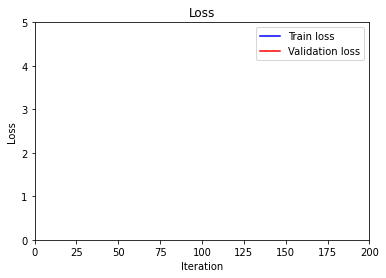

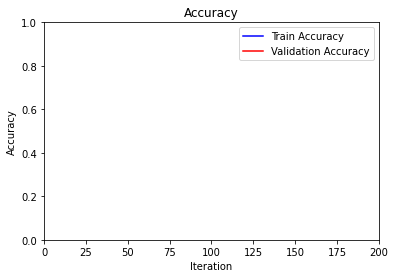

Iteration: 0, train loss: 2.5483, validation loss: 2.5480,train acc: 0.1320, validation acc: 0.1396
Step: 0 	Training Loss: 2.5035338 Training Acc: 0.14044331
Step: 1 	Training Loss: 2.5000446 Training Acc: 0.14098419
Step: 2 	Training Loss: 2.5754833 Training Acc: 0.140625
Step: 3 	Training Loss: 2.523934 Training Acc: 0.14088835
Step: 4 	Training Loss: 2.5114062 Training Acc: 0.14131944
Step: 5 	Training Loss: 2.5179133 Training Acc: 0.14165522
Step: 6 	Training Loss: 2.4936333 Training Acc: 0.14223845
Step: 7 	Training Loss: 2.4831314 Training Acc: 0.14289315
Step: 8 	Training Loss: 2.4859457 Training Acc: 0.14353392
Step: 9 	Training Loss: 2.5466871 Training Acc: 0.1435033
Step: 10 	Training Loss: 2.468748 Training Acc: 0.14428711
Step: 11 	Training Loss: 2.5242739 Training Acc: 0.14449097
Step: 12 	Training Loss: 2.5473697 Training Acc: 0.14445153
Step: 13 	Training Loss: 2.5007777 Training Acc: 0.14488636
Step: 14 	Training Loss: 2.4712193 Training Acc: 0.145625
Step: 15 	Trainin

Step: 54 	Training Loss: 2.4860482 Training Acc: 0.1561111
Step: 55 	Training Loss: 2.4507093 Training Acc: 0.15645741
Step: 56 	Training Loss: 2.4912524 Training Acc: 0.15662858
Step: 57 	Training Loss: 2.5018532 Training Acc: 0.15676399
Step: 58 	Training Loss: 2.5144079 Training Acc: 0.15682997
Step: 59 	Training Loss: 2.4716263 Training Acc: 0.15709919
Step: 60 	Training Loss: 2.538012 Training Acc: 0.15706168
Step: 61 	Training Loss: 2.4840517 Training Acc: 0.15726024
Step: 62 	Training Loss: 2.506433 Training Acc: 0.15735649
Step: 63 	Training Loss: 2.5290658 Training Acc: 0.15735176
Step: 64 	Training Loss: 2.4685402 Training Acc: 0.15761304
Step: 65 	Training Loss: 2.5082362 Training Acc: 0.15770657
Step: 66 	Training Loss: 2.4514894 Training Acc: 0.15803006
Step: 67 	Training Loss: 2.4827478 Training Acc: 0.15821953
Step: 0 	Validation Loss: 2.508902 Validation Acc: 0.15830936
Step: 1 	Validation Loss: 2.5069823 Validation Acc: 0.15839843
Step: 2 	Validation Loss: 2.476245 Val

Step: 21 	Training Loss: 2.4618373 Training Acc: 0.17487483
Step: 22 	Training Loss: 2.5147476 Training Acc: 0.17486656
Step: 23 	Training Loss: 2.406099 Training Acc: 0.17515883
Step: 24 	Training Loss: 2.5009866 Training Acc: 0.17519264
Step: 25 	Training Loss: 2.538145 Training Acc: 0.17511953
Step: 26 	Training Loss: 2.4948587 Training Acc: 0.17515327
Step: 27 	Training Loss: 2.4924984 Training Acc: 0.17520805
Step: 28 	Training Loss: 2.4835296 Training Acc: 0.17530487
Step: 29 	Training Loss: 2.4520764 Training Acc: 0.17546453
Step: 30 	Training Loss: 2.459477 Training Acc: 0.17560226
Step: 31 	Training Loss: 2.4444797 Training Acc: 0.17578125
Step: 32 	Training Loss: 2.444611 Training Acc: 0.17595929
Step: 33 	Training Loss: 2.4478688 Training Acc: 0.17613636
Step: 34 	Training Loss: 2.4933374 Training Acc: 0.1761875
Step: 35 	Training Loss: 2.5039406 Training Acc: 0.17619681
Step: 36 	Training Loss: 2.4266376 Training Acc: 0.17643403
Step: 37 	Training Loss: 2.436502 Training Ac

Step: 9 	Validation Loss: 2.4756646 Validation Acc: 0.19368166
Step: 10 	Validation Loss: 2.5107944 Validation Acc: 0.1936384
Step: 11 	Validation Loss: 2.420545 Validation Acc: 0.19379641
Step: 12 	Validation Loss: 2.398761 Validation Acc: 0.19398469
Step: 13 	Validation Loss: 2.4119973 Validation Acc: 0.1941414
Step: 14 	Validation Loss: 2.423356 Validation Acc: 0.19426674
Step: 15 	Validation Loss: 2.4143844 Validation Acc: 0.19442227
Step: 16 	Validation Loss: 2.415642 Validation Acc: 0.1945772


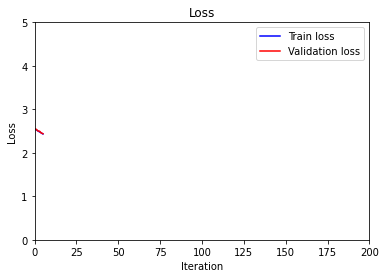

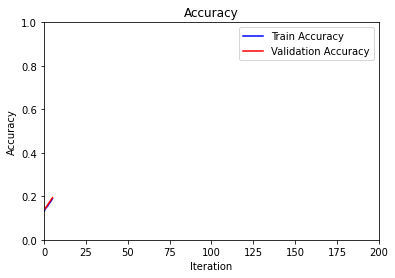

Iteration: 5, train loss: 2.4334, validation loss: 2.4405,train acc: 0.1884, validation acc: 0.1936
Step: 0 	Training Loss: 2.3977413 Training Acc: 0.19476211
Step: 1 	Training Loss: 2.3943443 Training Acc: 0.19494629
Step: 2 	Training Loss: 2.450947 Training Acc: 0.19502315
Step: 3 	Training Loss: 2.4499898 Training Acc: 0.19509971
Step: 4 	Training Loss: 2.388186 Training Acc: 0.1953125
Step: 5 	Training Loss: 2.4112058 Training Acc: 0.19546391
Step: 6 	Training Loss: 2.3722582 Training Acc: 0.19569027
Step: 7 	Training Loss: 2.377287 Training Acc: 0.1959007
Step: 8 	Training Loss: 2.4231331 Training Acc: 0.19603504
Step: 9 	Training Loss: 2.4584146 Training Acc: 0.19609375
Step: 10 	Training Loss: 2.35326 Training Acc: 0.19636217
Step: 11 	Training Loss: 2.3799582 Training Acc: 0.19658466
Step: 12 	Training Loss: 2.4268756 Training Acc: 0.19670172
Step: 13 	Training Loss: 2.4028106 Training Acc: 0.19686307
Step: 14 	Training Loss: 2.38488 Training Acc: 0.19705357
Step: 15 	Training 

Step: 53 	Training Loss: 2.4099617 Training Acc: 0.21350154
Step: 54 	Training Loss: 2.4279342 Training Acc: 0.21356972
Step: 55 	Training Loss: 2.3265507 Training Acc: 0.21380569
Step: 56 	Training Loss: 2.353513 Training Acc: 0.213993
Step: 57 	Training Loss: 2.3554418 Training Acc: 0.21417975
Step: 58 	Training Loss: 2.4423568 Training Acc: 0.21423452
Step: 59 	Training Loss: 2.412436 Training Acc: 0.2143249
Step: 60 	Training Loss: 2.3511581 Training Acc: 0.21451029
Step: 61 	Training Loss: 2.4222994 Training Acc: 0.2145762
Step: 62 	Training Loss: 2.412167 Training Acc: 0.21466565
Step: 63 	Training Loss: 2.4134612 Training Acc: 0.21474299
Step: 64 	Training Loss: 2.342165 Training Acc: 0.21493845
Step: 65 	Training Loss: 2.373888 Training Acc: 0.21507423
Step: 66 	Training Loss: 2.4038196 Training Acc: 0.21518598
Step: 67 	Training Loss: 2.3741653 Training Acc: 0.21533276
Step: 0 	Validation Loss: 2.3883538 Validation Acc: 0.21545558
Step: 1 	Validation Loss: 2.4088626 Validation

Step: 21 	Training Loss: 2.2839632 Training Acc: 0.2355563
Step: 22 	Training Loss: 2.35257 Training Acc: 0.2356837
Step: 23 	Training Loss: 2.2788146 Training Acc: 0.23588997
Step: 24 	Training Loss: 2.2635837 Training Acc: 0.23613529
Step: 25 	Training Loss: 2.3507705 Training Acc: 0.2362417
Step: 26 	Training Loss: 2.2852833 Training Acc: 0.2364465
Step: 27 	Training Loss: 2.280992 Training Acc: 0.23666063
Step: 28 	Training Loss: 2.2562938 Training Acc: 0.23690373
Step: 29 	Training Loss: 2.2814536 Training Acc: 0.23711674
Step: 30 	Training Loss: 2.293864 Training Acc: 0.23730959
Step: 31 	Training Loss: 2.2610607 Training Acc: 0.23755097
Step: 32 	Training Loss: 2.3021255 Training Acc: 0.237733
Step: 33 	Training Loss: 2.2617874 Training Acc: 0.23797324
Step: 34 	Training Loss: 2.3110018 Training Acc: 0.23814453
Step: 35 	Training Loss: 2.31914 Training Acc: 0.23830563
Step: 36 	Training Loss: 2.2790933 Training Acc: 0.2385053
Step: 37 	Training Loss: 2.2596998 Training Acc: 0.23

Step: 6 	Validation Loss: 2.252749 Validation Acc: 0.26829392
Step: 7 	Validation Loss: 2.1735904 Validation Acc: 0.268561
Step: 8 	Validation Loss: 2.147219 Validation Acc: 0.26886123
Step: 9 	Validation Loss: 2.2255154 Validation Acc: 0.2690682
Step: 10 	Validation Loss: 2.2034588 Validation Acc: 0.2693084
Step: 11 	Validation Loss: 2.1640542 Validation Acc: 0.26958165
Step: 12 	Validation Loss: 2.1892915 Validation Acc: 0.26982915
Step: 13 	Validation Loss: 2.1760745 Validation Acc: 0.2700845
Step: 14 	Validation Loss: 2.2207212 Validation Acc: 0.27028906
Step: 15 	Validation Loss: 2.1779418 Validation Acc: 0.270535
Step: 16 	Validation Loss: 2.148871 Validation Acc: 0.27081382


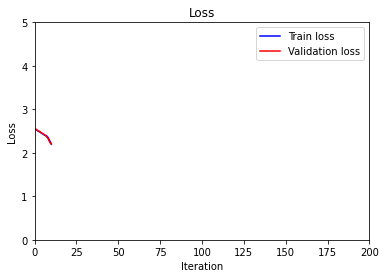

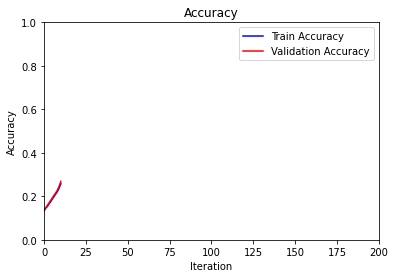

Iteration: 10, train loss: 2.2047, validation loss: 2.1952,train acc: 0.2579, validation acc: 0.2688
Step: 0 	Training Loss: 2.1168842 Training Acc: 0.2711338
Step: 1 	Training Loss: 2.2281466 Training Acc: 0.27133638
Step: 2 	Training Loss: 2.2080207 Training Acc: 0.27157182
Step: 3 	Training Loss: 2.213415 Training Acc: 0.2717818
Step: 4 	Training Loss: 2.2539756 Training Acc: 0.27194148
Step: 5 	Training Loss: 2.1937656 Training Acc: 0.27218384
Step: 6 	Training Loss: 2.1339905 Training Acc: 0.27247545
Step: 7 	Training Loss: 2.193304 Training Acc: 0.27270845
Step: 8 	Training Loss: 2.169065 Training Acc: 0.27297404
Step: 9 	Training Loss: 2.1964455 Training Acc: 0.27320603
Step: 10 	Training Loss: 2.1479053 Training Acc: 0.27348706
Step: 11 	Training Loss: 2.1634984 Training Acc: 0.27375925
Step: 12 	Training Loss: 2.222672 Training Acc: 0.2739567
Step: 13 	Training Loss: 2.210516 Training Acc: 0.27417842
Step: 14 	Training Loss: 2.1302104 Training Acc: 0.27448192
Step: 15 	Trainin

Step: 53 	Training Loss: 2.1688561 Training Acc: 0.30365455
Step: 54 	Training Loss: 2.1766381 Training Acc: 0.30385175
Step: 55 	Training Loss: 2.1701474 Training Acc: 0.30404857
Step: 56 	Training Loss: 2.1856213 Training Acc: 0.30423775
Step: 57 	Training Loss: 2.1324134 Training Acc: 0.3044701
Step: 58 	Training Loss: 2.1836977 Training Acc: 0.3046513
Step: 59 	Training Loss: 2.1452243 Training Acc: 0.30487558
Step: 60 	Training Loss: 2.1392908 Training Acc: 0.30510667
Step: 61 	Training Loss: 2.1989267 Training Acc: 0.30527958
Step: 62 	Training Loss: 2.1698332 Training Acc: 0.3054738
Step: 63 	Training Loss: 2.0929592 Training Acc: 0.30574694
Step: 64 	Training Loss: 2.130193 Training Acc: 0.30598357
Step: 65 	Training Loss: 2.1593778 Training Acc: 0.30618382
Step: 66 	Training Loss: 2.1953897 Training Acc: 0.30635494
Step: 67 	Training Loss: 2.167963 Training Acc: 0.30655447
Step: 0 	Validation Loss: 2.142591 Validation Acc: 0.30677512
Step: 1 	Validation Loss: 2.1841516 Validat

Step: 21 	Training Loss: 2.1352553 Training Acc: 0.33046487
Step: 22 	Training Loss: 2.2302017 Training Acc: 0.3305789
Step: 23 	Training Loss: 2.127061 Training Acc: 0.33076993
Step: 24 	Training Loss: 2.1391733 Training Acc: 0.33095422
Step: 25 	Training Loss: 2.1688976 Training Acc: 0.33111894
Step: 26 	Training Loss: 2.147892 Training Acc: 0.3312898
Step: 27 	Training Loss: 2.1698637 Training Acc: 0.33145398
Step: 28 	Training Loss: 2.1363559 Training Acc: 0.3316371
Step: 29 	Training Loss: 2.1199667 Training Acc: 0.33183914
Step: 30 	Training Loss: 2.1348758 Training Acc: 0.33202806
Step: 31 	Training Loss: 2.166965 Training Acc: 0.33219108
Step: 32 	Training Loss: 2.1868463 Training Acc: 0.33233467
Step: 33 	Training Loss: 2.162059 Training Acc: 0.33249718
Step: 34 	Training Loss: 2.1354604 Training Acc: 0.3326786
Step: 35 	Training Loss: 2.1945667 Training Acc: 0.33281505
Step: 36 	Training Loss: 2.1796756 Training Acc: 0.33297676
Step: 37 	Training Loss: 2.0801885 Training Acc:

Step: 6 	Validation Loss: 2.2252793 Validation Acc: 0.35326388
Step: 7 	Validation Loss: 2.1124647 Validation Acc: 0.35343033
Step: 8 	Validation Loss: 2.1169226 Validation Acc: 0.3536023
Step: 9 	Validation Loss: 2.166184 Validation Acc: 0.35372782
Step: 10 	Validation Loss: 2.1601636 Validation Acc: 0.3538647
Step: 11 	Validation Loss: 2.0865402 Validation Acc: 0.3540533
Step: 12 	Validation Loss: 2.159178 Validation Acc: 0.35418394
Step: 13 	Validation Loss: 2.09161 Validation Acc: 0.35436624
Step: 14 	Validation Loss: 2.1325338 Validation Acc: 0.35451952
Step: 15 	Validation Loss: 2.1028085 Validation Acc: 0.3546898
Step: 16 	Validation Loss: 2.1076765 Validation Acc: 0.35485983


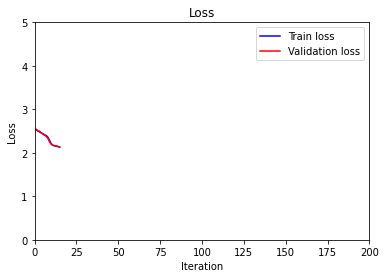

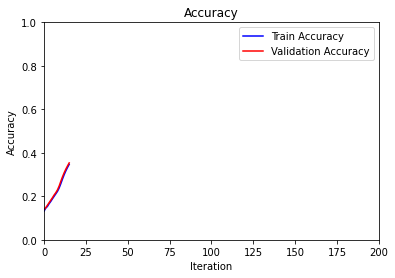

Iteration: 15, train loss: 2.1288, validation loss: 2.1363,train acc: 0.3468, validation acc: 0.3536
Step: 0 	Training Loss: 2.0634823 Training Acc: 0.35506406
Step: 1 	Training Loss: 2.1489015 Training Acc: 0.35519916
Step: 2 	Training Loss: 2.1291988 Training Acc: 0.355357
Step: 3 	Training Loss: 2.148189 Training Acc: 0.3554974
Step: 4 	Training Loss: 2.191931 Training Acc: 0.35560325
Step: 5 	Training Loss: 2.130878 Training Acc: 0.35576043
Step: 6 	Training Loss: 2.0692637 Training Acc: 0.3559574
Step: 7 	Training Loss: 2.1281118 Training Acc: 0.35610837
Step: 8 	Training Loss: 2.1603916 Training Acc: 0.3562363
Step: 9 	Training Loss: 2.1547828 Training Acc: 0.35636404
Step: 10 	Training Loss: 2.104011 Training Acc: 0.3565315
Step: 11 	Training Loss: 2.103305 Training Acc: 0.3566987
Step: 12 	Training Loss: 2.1397536 Training Acc: 0.3568372
Step: 13 	Training Loss: 2.106995 Training Acc: 0.35700965
Step: 14 	Training Loss: 2.04156 Training Acc: 0.35723296
Step: 15 	Training Loss: 

Step: 51 	Training Loss: 2.1334639 Training Acc: 0.3746608
Step: 52 	Training Loss: 2.0927024 Training Acc: 0.37481225
Step: 53 	Training Loss: 2.1328626 Training Acc: 0.37493226
Step: 54 	Training Loss: 2.1432629 Training Acc: 0.37504688
Step: 55 	Training Loss: 2.1002693 Training Acc: 0.37519258
Step: 56 	Training Loss: 2.1367567 Training Acc: 0.3753225
Step: 57 	Training Loss: 2.1030693 Training Acc: 0.3754678
Step: 58 	Training Loss: 2.1442838 Training Acc: 0.37558177
Step: 59 	Training Loss: 2.1194527 Training Acc: 0.37571117
Step: 60 	Training Loss: 2.105429 Training Acc: 0.37584558
Step: 61 	Training Loss: 2.147884 Training Acc: 0.37595907
Step: 62 	Training Loss: 2.1435132 Training Acc: 0.3760724
Step: 63 	Training Loss: 2.0313811 Training Acc: 0.37626842
Step: 64 	Training Loss: 2.0991268 Training Acc: 0.37641245
Step: 65 	Training Loss: 2.1220956 Training Acc: 0.37654078
Step: 66 	Training Loss: 2.1707087 Training Acc: 0.37663794
Step: 67 	Training Loss: 2.1273232 Training Ac

Step: 21 	Training Loss: 2.0769854 Training Acc: 0.39323077
Step: 22 	Training Loss: 2.137802 Training Acc: 0.39332932
Step: 23 	Training Loss: 2.060823 Training Acc: 0.39347544
Step: 24 	Training Loss: 2.0991397 Training Acc: 0.39359757
Step: 25 	Training Loss: 2.0854902 Training Acc: 0.39372906
Step: 26 	Training Loss: 2.0917082 Training Acc: 0.39385563
Step: 27 	Training Loss: 2.1179929 Training Acc: 0.39396304
Step: 28 	Training Loss: 2.0951343 Training Acc: 0.39408454
Step: 29 	Training Loss: 2.095662 Training Acc: 0.39420593
Step: 30 	Training Loss: 2.0549698 Training Acc: 0.39435562
Step: 31 	Training Loss: 2.102075 Training Acc: 0.39448145
Step: 32 	Training Loss: 2.0826747 Training Acc: 0.39461184
Step: 33 	Training Loss: 2.1227481 Training Acc: 0.39471364
Step: 34 	Training Loss: 2.0533185 Training Acc: 0.39486268
Step: 35 	Training Loss: 2.1093988 Training Acc: 0.39497843
Step: 36 	Training Loss: 2.0933762 Training Acc: 0.3951082
Step: 37 	Training Loss: 2.0337982 Training A

Step: 6 	Validation Loss: 2.1622026 Validation Acc: 0.41089788
Step: 7 	Validation Loss: 2.0477598 Validation Acc: 0.41102725
Step: 8 	Validation Loss: 2.0299764 Validation Acc: 0.41116962
Step: 9 	Validation Loss: 2.0891664 Validation Acc: 0.41127673
Step: 10 	Validation Loss: 2.067202 Validation Acc: 0.41139686
Step: 11 	Validation Loss: 2.0171852 Validation Acc: 0.41154757
Step: 12 	Validation Loss: 2.0684853 Validation Acc: 0.41166744
Step: 13 	Validation Loss: 2.0465539 Validation Acc: 0.4118003
Step: 14 	Validation Loss: 2.075923 Validation Acc: 0.41191548
Step: 15 	Validation Loss: 2.0526383 Validation Acc: 0.4120393
Step: 16 	Validation Loss: 2.0575163 Validation Acc: 0.412163


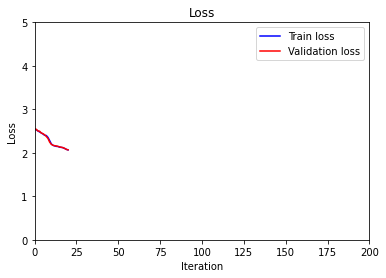

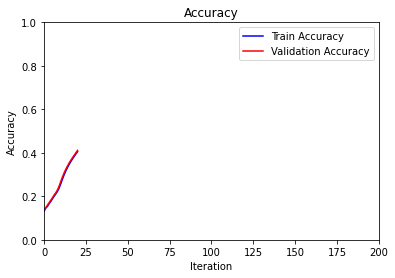

Iteration: 20, train loss: 2.0658, validation loss: 2.0686,train acc: 0.4059, validation acc: 0.4112
Step: 0 	Training Loss: 2.014792 Training Acc: 0.41231278
Step: 1 	Training Loss: 2.0812426 Training Acc: 0.41242304
Step: 2 	Training Loss: 2.097579 Training Acc: 0.41252884
Step: 3 	Training Loss: 2.0899978 Training Acc: 0.41263014
Step: 4 	Training Loss: 2.1038961 Training Acc: 0.41273567
Step: 5 	Training Loss: 2.073772 Training Acc: 0.41284984
Step: 6 	Training Loss: 1.9785593 Training Acc: 0.41302055
Step: 7 	Training Loss: 2.0078955 Training Acc: 0.41317362
Step: 8 	Training Loss: 2.049107 Training Acc: 0.41330042
Step: 9 	Training Loss: 2.0700097 Training Acc: 0.413414
Step: 10 	Training Loss: 2.0121095 Training Acc: 0.41356227
Step: 11 	Training Loss: 2.0320966 Training Acc: 0.4136973
Step: 12 	Training Loss: 2.0651011 Training Acc: 0.41382352
Step: 13 	Training Loss: 2.013341 Training Acc: 0.4139713
Step: 14 	Training Loss: 1.9746579 Training Acc: 0.41414496
Step: 15 	Training

Step: 53 	Training Loss: 2.0873466 Training Acc: 0.4284937
Step: 54 	Training Loss: 2.0688047 Training Acc: 0.42859983
Step: 55 	Training Loss: 2.0782726 Training Acc: 0.4286937
Step: 56 	Training Loss: 2.0923786 Training Acc: 0.42878747
Step: 57 	Training Loss: 2.007994 Training Acc: 0.42892164
Step: 58 	Training Loss: 2.0784953 Training Acc: 0.4290233
Step: 59 	Training Loss: 2.0709195 Training Acc: 0.42912483
Step: 60 	Training Loss: 2.0560184 Training Acc: 0.42923033
Step: 61 	Training Loss: 2.064818 Training Acc: 0.42933568
Step: 62 	Training Loss: 2.1020653 Training Acc: 0.42942074
Step: 63 	Training Loss: 2.009592 Training Acc: 0.42955014
Step: 64 	Training Loss: 2.0303943 Training Acc: 0.42967135
Step: 65 	Training Loss: 2.0120182 Training Acc: 0.42980453
Step: 66 	Training Loss: 2.1192937 Training Acc: 0.42987707
Step: 67 	Training Loss: 2.0673113 Training Acc: 0.42998177
Step: 0 	Validation Loss: 2.0524783 Validation Acc: 0.43009043
Step: 1 	Validation Loss: 2.08746 Validatio

Step: 20 	Training Loss: 2.0898232 Training Acc: 0.44309118
Step: 21 	Training Loss: 2.0370107 Training Acc: 0.44319457
Step: 22 	Training Loss: 2.108048 Training Acc: 0.44326374
Step: 23 	Training Loss: 2.0292387 Training Acc: 0.44337073
Step: 24 	Training Loss: 2.0826833 Training Acc: 0.4434511
Step: 25 	Training Loss: 2.0505939 Training Acc: 0.44354656
Step: 26 	Training Loss: 2.0594733 Training Acc: 0.44363812
Step: 27 	Training Loss: 2.0686705 Training Acc: 0.44372582
Step: 28 	Training Loss: 2.0696945 Training Acc: 0.44381344
Step: 29 	Training Loss: 2.0701003 Training Acc: 0.44390097
Step: 30 	Training Loss: 2.0461278 Training Acc: 0.4440035
Step: 31 	Training Loss: 2.067871 Training Acc: 0.44409084
Step: 32 	Training Loss: 2.0168495 Training Acc: 0.44420826
Step: 33 	Training Loss: 2.0766406 Training Acc: 0.44429168
Step: 34 	Training Loss: 2.0252585 Training Acc: 0.44440135
Step: 35 	Training Loss: 2.0778844 Training Acc: 0.4444921
Step: 36 	Training Loss: 2.0611992 Training A

Step: 4 	Validation Loss: 1.9988155 Validation Acc: 0.45717344
Step: 5 	Validation Loss: 2.0373409 Validation Acc: 0.45726395
Step: 6 	Validation Loss: 2.081231 Validation Acc: 0.45733663
Step: 7 	Validation Loss: 2.0245707 Validation Acc: 0.45743057
Step: 8 	Validation Loss: 1.9713256 Validation Acc: 0.4575528
Step: 9 	Validation Loss: 2.0427432 Validation Acc: 0.45764297
Step: 10 	Validation Loss: 2.001471 Validation Acc: 0.45775083
Step: 11 	Validation Loss: 1.971256 Validation Acc: 0.45787272
Step: 12 	Validation Loss: 2.0220346 Validation Acc: 0.45796975
Step: 13 	Validation Loss: 2.0272965 Validation Acc: 0.4580702
Step: 14 	Validation Loss: 2.0355706 Validation Acc: 0.45815995
Step: 15 	Validation Loss: 1.999037 Validation Acc: 0.45827085
Step: 16 	Validation Loss: 2.0239992 Validation Acc: 0.45836398


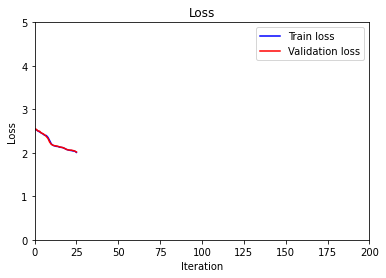

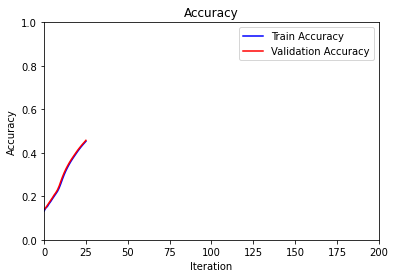

Iteration: 25, train loss: 2.0095, validation loss: 2.0194,train acc: 0.4531, validation acc: 0.4576
Step: 0 	Training Loss: 1.9680432 Training Acc: 0.45848528
Step: 1 	Training Loss: 2.041967 Training Acc: 0.45857114
Step: 2 	Training Loss: 2.019732 Training Acc: 0.45867813
Step: 3 	Training Loss: 2.0323682 Training Acc: 0.4587709
Step: 4 	Training Loss: 1.968138 Training Acc: 0.4589059
Step: 5 	Training Loss: 1.9892027 Training Acc: 0.45902315
Step: 6 	Training Loss: 1.9881426 Training Acc: 0.45913678
Step: 7 	Training Loss: 2.0305054 Training Acc: 0.45922214
Step: 8 	Training Loss: 1.9911478 Training Acc: 0.45933205
Step: 9 	Training Loss: 1.9775922 Training Acc: 0.4594454
Step: 10 	Training Loss: 2.010362 Training Acc: 0.45954806
Step: 11 	Training Loss: 1.9908388 Training Acc: 0.4596647
Step: 12 	Training Loss: 2.037276 Training Acc: 0.45975316
Step: 13 	Training Loss: 1.9504945 Training Acc: 0.45988718
Step: 14 	Training Loss: 1.9752965 Training Acc: 0.460007
Step: 15 	Training L

Step: 53 	Training Loss: 1.991989 Training Acc: 0.47294393
Step: 54 	Training Loss: 1.9937584 Training Acc: 0.4730419
Step: 55 	Training Loss: 1.982511 Training Acc: 0.47314307
Step: 56 	Training Loss: 1.9853292 Training Acc: 0.4732475
Step: 57 	Training Loss: 1.9177411 Training Acc: 0.4733784
Step: 58 	Training Loss: 2.02736 Training Acc: 0.4734594
Step: 59 	Training Loss: 1.9972386 Training Acc: 0.47355694
Step: 60 	Training Loss: 1.9944603 Training Acc: 0.47365105
Step: 61 	Training Loss: 1.9900198 Training Acc: 0.47374842
Step: 62 	Training Loss: 2.0013125 Training Acc: 0.47383904
Step: 63 	Training Loss: 1.9576771 Training Acc: 0.4739495
Step: 64 	Training Loss: 1.9658016 Training Acc: 0.47405654
Step: 65 	Training Loss: 1.9725957 Training Acc: 0.4741602
Step: 66 	Training Loss: 2.0732455 Training Acc: 0.47422072
Step: 67 	Training Loss: 2.0028791 Training Acc: 0.4743143
Step: 0 	Validation Loss: 1.9817743 Validation Acc: 0.47441438
Step: 1 	Validation Loss: 2.0074306 Validation A

Step: 21 	Training Loss: 1.961758 Training Acc: 0.4865017
Step: 22 	Training Loss: 2.0020952 Training Acc: 0.48658562
Step: 23 	Training Loss: 1.9484149 Training Acc: 0.48668832
Step: 24 	Training Loss: 1.9923462 Training Acc: 0.4867721
Step: 25 	Training Loss: 1.981928 Training Acc: 0.4868621
Step: 26 	Training Loss: 1.9919989 Training Acc: 0.48694572
Step: 27 	Training Loss: 1.9836094 Training Acc: 0.48703557
Step: 28 	Training Loss: 1.9932007 Training Acc: 0.48711908
Step: 29 	Training Loss: 1.991726 Training Acc: 0.48720565
Step: 30 	Training Loss: 1.9846689 Training Acc: 0.4872953
Step: 31 	Training Loss: 1.997179 Training Acc: 0.4873786
Step: 32 	Training Loss: 1.9392221 Training Acc: 0.48748687
Step: 33 	Training Loss: 2.0086017 Training Acc: 0.48757002
Step: 34 	Training Loss: 1.9467542 Training Acc: 0.487675
Step: 35 	Training Loss: 2.0255928 Training Acc: 0.48774865
Step: 36 	Training Loss: 2.0009713 Training Acc: 0.48783472
Step: 37 	Training Loss: 1.9432396 Training Acc: 0.

Step: 6 	Validation Loss: 2.0129554 Validation Acc: 0.49855953
Step: 7 	Validation Loss: 1.984412 Validation Acc: 0.4986404
Step: 8 	Validation Loss: 1.9474545 Validation Acc: 0.49873608
Step: 9 	Validation Loss: 2.0116258 Validation Acc: 0.49880493
Step: 10 	Validation Loss: 1.9838865 Validation Acc: 0.49888563
Step: 11 	Validation Loss: 1.9482863 Validation Acc: 0.49898112
Step: 12 	Validation Loss: 1.9712572 Validation Acc: 0.49906462
Step: 13 	Validation Loss: 1.9839494 Validation Acc: 0.4991481
Step: 14 	Validation Loss: 2.0107892 Validation Acc: 0.49921963
Step: 15 	Validation Loss: 1.961638 Validation Acc: 0.4993089
Step: 16 	Validation Loss: 1.9886366 Validation Acc: 0.49938628


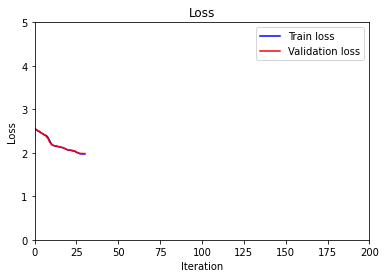

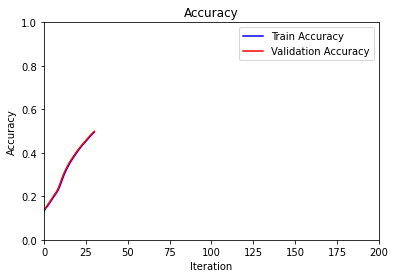

Iteration: 30, train loss: 1.9729, validation loss: 1.9834,train acc: 0.4952, validation acc: 0.4987
Step: 0 	Training Loss: 1.9347571 Training Acc: 0.4994843
Step: 1 	Training Loss: 2.0003958 Training Acc: 0.49955562
Step: 2 	Training Loss: 1.9722252 Training Acc: 0.4996387
Step: 3 	Training Loss: 2.010941 Training Acc: 0.49970692
Step: 4 	Training Loss: 1.9207813 Training Acc: 0.49981356
Step: 5 	Training Loss: 1.9471459 Training Acc: 0.4999083
Step: 6 	Training Loss: 1.9300565 Training Acc: 0.5000089
Step: 7 	Training Loss: 1.9384873 Training Acc: 0.5001064
Step: 8 	Training Loss: 1.9686408 Training Acc: 0.5001891
Step: 9 	Training Loss: 1.966986 Training Acc: 0.5002747
Step: 10 	Training Loss: 1.928039 Training Acc: 0.500375
Step: 11 	Training Loss: 1.9432518 Training Acc: 0.50046927
Step: 12 	Training Loss: 1.9738822 Training Acc: 0.5005517
Step: 13 	Training Loss: 1.9362099 Training Acc: 0.50064886
Step: 14 	Training Loss: 1.9533465 Training Acc: 0.50074
Step: 15 	Training Loss: 

Step: 53 	Training Loss: 1.970844 Training Acc: 0.51052743
Step: 54 	Training Loss: 1.9830537 Training Acc: 0.5105997
Step: 55 	Training Loss: 1.9830973 Training Acc: 0.51067185
Step: 56 	Training Loss: 1.9795263 Training Acc: 0.5107468
Step: 57 	Training Loss: 1.9065676 Training Acc: 0.510847
Step: 58 	Training Loss: 2.0260437 Training Acc: 0.5109021
Step: 59 	Training Loss: 1.9937187 Training Acc: 0.51097125
Step: 60 	Training Loss: 1.9845114 Training Acc: 0.51104033
Step: 61 	Training Loss: 1.9810423 Training Acc: 0.51111215
Step: 62 	Training Loss: 2.0012243 Training Acc: 0.5111756
Step: 63 	Training Loss: 1.9623688 Training Acc: 0.51125294
Step: 64 	Training Loss: 1.9636049 Training Acc: 0.51133025
Step: 65 	Training Loss: 1.9493456 Training Acc: 0.5114131
Step: 66 	Training Loss: 2.0649586 Training Acc: 0.51145387
Step: 67 	Training Loss: 1.9994673 Training Acc: 0.5115198
Step: 0 	Validation Loss: 1.973946 Validation Acc: 0.5115969
Step: 1 	Validation Loss: 2.0050163 Validation A

Step: 21 	Training Loss: 1.9521754 Training Acc: 0.52056414
Step: 22 	Training Loss: 1.9978838 Training Acc: 0.52062416
Step: 23 	Training Loss: 1.9463223 Training Acc: 0.52070284
Step: 24 	Training Loss: 1.9914753 Training Acc: 0.52076274
Step: 25 	Training Loss: 1.9753023 Training Acc: 0.52082527
Step: 26 	Training Loss: 1.9914873 Training Acc: 0.5208878
Step: 27 	Training Loss: 1.9747512 Training Acc: 0.5209556
Step: 28 	Training Loss: 1.9910115 Training Acc: 0.52101535
Step: 29 	Training Loss: 1.9820412 Training Acc: 0.52108306
Step: 30 	Training Loss: 1.9682566 Training Acc: 0.5211534
Step: 31 	Training Loss: 1.9968016 Training Acc: 0.521213
Step: 32 	Training Loss: 1.9397185 Training Acc: 0.52129394
Step: 33 	Training Loss: 2.0053253 Training Acc: 0.5213535
Step: 34 	Training Loss: 1.9461375 Training Acc: 0.5214316
Step: 35 	Training Loss: 2.02309 Training Acc: 0.52148306
Step: 36 	Training Loss: 1.9934142 Training Acc: 0.5215451
Step: 37 	Training Loss: 1.9375299 Training Acc: 0

Step: 7 	Validation Loss: 1.9823107 Validation Acc: 0.52976996
Step: 8 	Validation Loss: 1.9445345 Validation Acc: 0.52984214
Step: 9 	Validation Loss: 2.006192 Validation Acc: 0.52989376
Step: 10 	Validation Loss: 1.9804533 Validation Acc: 0.52995557
Step: 11 	Validation Loss: 1.9489834 Validation Acc: 0.5300276
Step: 12 	Validation Loss: 1.9627153 Validation Acc: 0.53009707
Step: 13 	Validation Loss: 1.9839201 Validation Acc: 0.53015876
Step: 14 	Validation Loss: 2.001998 Validation Acc: 0.53021276
Step: 15 	Validation Loss: 1.9581001 Validation Acc: 0.5302795
Step: 16 	Validation Loss: 1.9998713 Validation Acc: 0.53033346


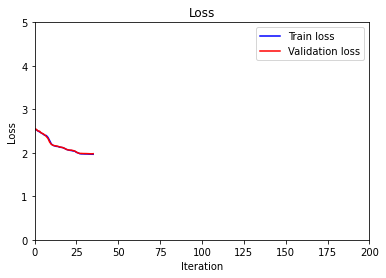

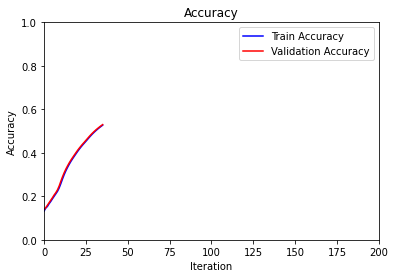

Iteration: 35, train loss: 1.9664, validation loss: 1.9800,train acc: 0.5271, validation acc: 0.5298
Step: 0 	Training Loss: 1.9364494 Training Acc: 0.5304077
Step: 1 	Training Loss: 1.9933121 Training Acc: 0.5304642
Step: 2 	Training Loss: 1.9711006 Training Acc: 0.53052306
Step: 3 	Training Loss: 2.012632 Training Acc: 0.53057176
Step: 4 	Training Loss: 1.9187021 Training Acc: 0.53065354
Step: 5 	Training Loss: 1.9491203 Training Acc: 0.53072506
Step: 6 	Training Loss: 1.9108024 Training Acc: 0.5308068
Step: 7 	Training Loss: 1.9208817 Training Acc: 0.5308859
Step: 8 	Training Loss: 1.9606776 Training Acc: 0.5309496
Step: 9 	Training Loss: 1.9554679 Training Acc: 0.53101844
Step: 10 	Training Loss: 1.9238477 Training Acc: 0.5310948
Step: 11 	Training Loss: 1.934334 Training Acc: 0.53116864
Step: 12 	Training Loss: 1.9601121 Training Acc: 0.5312373
Step: 13 	Training Loss: 1.9185469 Training Acc: 0.5313161
Step: 14 	Training Loss: 1.9458508 Training Acc: 0.5313872
Step: 15 	Training L

Step: 51 	Training Loss: 2.0077126 Training Acc: 0.53880346
Step: 52 	Training Loss: 1.9276078 Training Acc: 0.53887194
Step: 53 	Training Loss: 1.9682122 Training Acc: 0.5389306
Step: 54 	Training Loss: 1.9714835 Training Acc: 0.53898925
Step: 55 	Training Loss: 1.980885 Training Acc: 0.53904295
Step: 56 	Training Loss: 1.9787558 Training Acc: 0.5390991
Step: 57 	Training Loss: 1.9056485 Training Acc: 0.5391771
Step: 58 	Training Loss: 2.0207295 Training Acc: 0.53921854
Step: 59 	Training Loss: 1.9848495 Training Acc: 0.5392721
Step: 60 	Training Loss: 1.9784319 Training Acc: 0.53932565
Step: 61 	Training Loss: 1.9729787 Training Acc: 0.5393816
Step: 62 	Training Loss: 2.0007477 Training Acc: 0.5394278
Step: 63 	Training Loss: 1.9468204 Training Acc: 0.53949344
Step: 64 	Training Loss: 1.9624512 Training Acc: 0.5395517
Step: 65 	Training Loss: 1.9450576 Training Acc: 0.53961724
Step: 66 	Training Loss: 2.063724 Training Acc: 0.5396438
Step: 67 	Training Loss: 1.9945571 Training Acc: 0

Step: 18 	Training Loss: 1.9599621 Training Acc: 0.54655397
Step: 19 	Training Loss: 2.0109756 Training Acc: 0.5465939
Step: 20 	Training Loss: 1.9945114 Training Acc: 0.5466385
Step: 21 	Training Loss: 1.9359684 Training Acc: 0.5467017
Step: 22 	Training Loss: 1.9946792 Training Acc: 0.54674625
Step: 23 	Training Loss: 1.9333055 Training Acc: 0.5468118
Step: 24 	Training Loss: 1.9915512 Training Acc: 0.5468563
Step: 25 	Training Loss: 1.9652843 Training Acc: 0.54691243
Step: 26 	Training Loss: 1.9880232 Training Acc: 0.54695916
Step: 27 	Training Loss: 1.9707505 Training Acc: 0.54701287
Step: 28 	Training Loss: 1.991987 Training Acc: 0.5470572
Step: 29 	Training Loss: 1.9793345 Training Acc: 0.54710853
Step: 30 	Training Loss: 1.9675448 Training Acc: 0.5471622
Step: 31 	Training Loss: 1.9972191 Training Acc: 0.54720646
Step: 32 	Training Loss: 1.9376988 Training Acc: 0.54726934
Step: 33 	Training Loss: 1.9941598 Training Acc: 0.5473159
Step: 34 	Training Loss: 1.9437292 Training Acc: 

Step: 3 	Validation Loss: 2.0295517 Validation Acc: 0.5535782
Step: 4 	Validation Loss: 1.9342179 Validation Acc: 0.55363697
Step: 5 	Validation Loss: 2.0192661 Validation Acc: 0.5536688
Step: 6 	Validation Loss: 1.9926451 Validation Acc: 0.5537118
Step: 7 	Validation Loss: 1.9786897 Validation Acc: 0.553757
Step: 8 	Validation Loss: 1.9364634 Validation Acc: 0.5538157
Step: 9 	Validation Loss: 2.00788 Validation Acc: 0.5538519
Step: 10 	Validation Loss: 1.9802884 Validation Acc: 0.553897
Step: 11 	Validation Loss: 1.948852 Validation Acc: 0.55395114
Step: 12 	Validation Loss: 1.9559273 Validation Acc: 0.5540052
Step: 13 	Validation Loss: 1.977294 Validation Acc: 0.55405253
Step: 14 	Validation Loss: 1.9952506 Validation Acc: 0.5540931
Step: 15 	Validation Loss: 1.9590914 Validation Acc: 0.55414486
Step: 16 	Validation Loss: 1.9928336 Validation Acc: 0.55418533


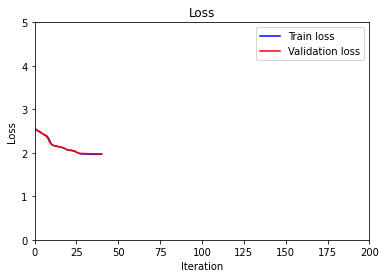

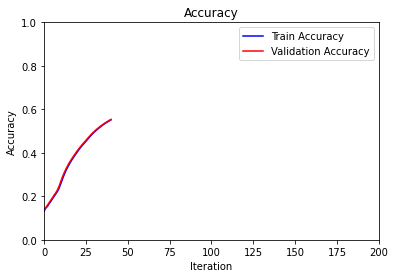

Iteration: 40, train loss: 1.9674, validation loss: 1.9765,train acc: 0.5518, validation acc: 0.5538
Step: 0 	Training Loss: 1.9305885 Training Acc: 0.554246
Step: 1 	Training Loss: 1.9946678 Training Acc: 0.5542887
Step: 2 	Training Loss: 1.9688799 Training Acc: 0.5543381
Step: 3 	Training Loss: 2.01192 Training Acc: 0.55437624
Step: 4 	Training Loss: 1.9190472 Training Acc: 0.5544413
Step: 5 	Training Loss: 1.9496478 Training Acc: 0.55449504
Step: 6 	Training Loss: 1.9133794 Training Acc: 0.55456
Step: 7 	Training Loss: 1.9225084 Training Acc: 0.5546204
Step: 8 	Training Loss: 1.9599533 Training Acc: 0.5546718
Step: 9 	Training Loss: 1.9535115 Training Acc: 0.5547255
Step: 10 	Training Loss: 1.9276831 Training Acc: 0.55478585
Step: 11 	Training Loss: 1.943244 Training Acc: 0.55484164
Step: 12 	Training Loss: 1.9508084 Training Acc: 0.5548974
Step: 13 	Training Loss: 1.919401 Training Acc: 0.5549599
Step: 14 	Training Loss: 1.9521842 Training Acc: 0.5550156
Step: 15 	Training Loss: 1.

Step: 52 	Training Loss: 1.9378356 Training Acc: 0.5608008
Step: 53 	Training Loss: 1.967006 Training Acc: 0.5608465
Step: 54 	Training Loss: 1.971787 Training Acc: 0.5608922
Step: 55 	Training Loss: 1.9866544 Training Acc: 0.56093365
Step: 56 	Training Loss: 1.9779073 Training Acc: 0.56097716
Step: 57 	Training Loss: 1.9143612 Training Acc: 0.56103784
Step: 58 	Training Loss: 2.0215538 Training Acc: 0.5610684
Step: 59 	Training Loss: 1.9874798 Training Acc: 0.56110966
Step: 60 	Training Loss: 1.9819508 Training Acc: 0.56115097
Step: 61 	Training Loss: 1.9726752 Training Acc: 0.56119436
Step: 62 	Training Loss: 1.9984007 Training Acc: 0.56123126
Step: 63 	Training Loss: 1.9425639 Training Acc: 0.5612832
Step: 64 	Training Loss: 1.9572344 Training Acc: 0.5613308
Step: 65 	Training Loss: 1.9487642 Training Acc: 0.5613827
Step: 66 	Training Loss: 2.066546 Training Acc: 0.561398
Step: 67 	Training Loss: 1.992501 Training Acc: 0.56143486
Step: 0 	Validation Loss: 1.9693513 Validation Acc: 0

Step: 20 	Training Loss: 1.9940369 Training Acc: 0.56683314
Step: 21 	Training Loss: 1.9396567 Training Acc: 0.56688184
Step: 22 	Training Loss: 1.9939339 Training Acc: 0.5669159
Step: 23 	Training Loss: 1.9305797 Training Acc: 0.56696874
Step: 24 	Training Loss: 1.9921577 Training Acc: 0.56700283
Step: 25 	Training Loss: 1.9687142 Training Acc: 0.5670431
Step: 26 	Training Loss: 1.9941148 Training Acc: 0.56707716
Step: 27 	Training Loss: 1.97448 Training Acc: 0.5671174
Step: 28 	Training Loss: 1.9911833 Training Acc: 0.5671514
Step: 29 	Training Loss: 1.9788074 Training Acc: 0.56719166
Step: 30 	Training Loss: 1.9606959 Training Acc: 0.567236
Step: 31 	Training Loss: 1.9944494 Training Acc: 0.5672699
Step: 32 	Training Loss: 1.9335165 Training Acc: 0.5673204
Step: 33 	Training Loss: 1.993875 Training Acc: 0.5673564
Step: 34 	Training Loss: 1.9435825 Training Acc: 0.5674048
Step: 35 	Training Loss: 2.012704 Training Acc: 0.56743455
Step: 36 	Training Loss: 1.9916328 Training Acc: 0.567

Step: 6 	Validation Loss: 1.9934598 Validation Acc: 0.57248396
Step: 7 	Validation Loss: 1.9790351 Validation Acc: 0.5725195
Step: 8 	Validation Loss: 1.9358876 Validation Acc: 0.5725669
Step: 9 	Validation Loss: 1.9942636 Validation Acc: 0.5725984
Step: 10 	Validation Loss: 1.9775794 Validation Acc: 0.57263386
Step: 11 	Validation Loss: 1.9437815 Validation Acc: 0.5726793
Step: 12 	Validation Loss: 1.9535986 Validation Acc: 0.5727227
Step: 13 	Validation Loss: 1.9768395 Validation Acc: 0.57276005
Step: 14 	Validation Loss: 1.9895644 Validation Acc: 0.57279336
Step: 15 	Validation Loss: 1.9564505 Validation Acc: 0.57283473
Step: 16 	Validation Loss: 1.9788142 Validation Acc: 0.57287


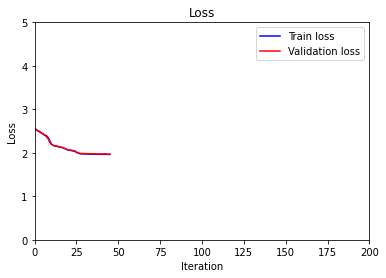

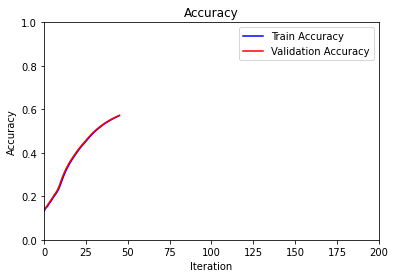

Iteration: 45, train loss: 1.9637, validation loss: 1.9714,train acc: 0.5709, validation acc: 0.5726
Step: 0 	Training Loss: 1.9262828 Training Acc: 0.5729193
Step: 1 	Training Loss: 1.9868096 Training Acc: 0.5729526
Step: 2 	Training Loss: 1.9646186 Training Acc: 0.57299185
Step: 3 	Training Loss: 2.013815 Training Acc: 0.57301915
Step: 4 	Training Loss: 1.9164006 Training Acc: 0.5730723
Step: 5 	Training Loss: 1.9427397 Training Acc: 0.5731175
Step: 6 	Training Loss: 1.9038112 Training Acc: 0.5731726
Step: 7 	Training Loss: 1.9213244 Training Acc: 0.57322174
Step: 8 	Training Loss: 1.9562885 Training Acc: 0.5732629
Step: 9 	Training Loss: 1.9514263 Training Acc: 0.57330596
Step: 10 	Training Loss: 1.9227235 Training Acc: 0.573355
Step: 11 	Training Loss: 1.9366279 Training Acc: 0.5734001
Step: 12 	Training Loss: 1.9511845 Training Acc: 0.5734451
Step: 13 	Training Loss: 1.914403 Training Acc: 0.57349604
Step: 14 	Training Loss: 1.9418224 Training Acc: 0.573541
Step: 15 	Training Loss

Step: 53 	Training Loss: 1.9655628 Training Acc: 0.57829094
Step: 54 	Training Loss: 1.9655693 Training Acc: 0.57832754
Step: 55 	Training Loss: 1.9782228 Training Acc: 0.57836026
Step: 56 	Training Loss: 1.9763172 Training Acc: 0.57839495
Step: 57 	Training Loss: 1.9195321 Training Acc: 0.57844114
Step: 58 	Training Loss: 2.0095935 Training Acc: 0.5784661
Step: 59 	Training Loss: 1.9823782 Training Acc: 0.5784988
Step: 60 	Training Loss: 1.9772753 Training Acc: 0.57853144
Step: 61 	Training Loss: 1.9673772 Training Acc: 0.5785679
Step: 62 	Training Loss: 1.997996 Training Acc: 0.57859665
Step: 63 	Training Loss: 1.9422312 Training Acc: 0.5786389
Step: 64 	Training Loss: 1.9592888 Training Acc: 0.5786753
Step: 65 	Training Loss: 1.9457328 Training Acc: 0.5787175
Step: 66 	Training Loss: 2.061997 Training Acc: 0.5787289
Step: 67 	Training Loss: 1.9924028 Training Acc: 0.57875764
Step: 0 	Validation Loss: 1.9623852 Validation Acc: 0.578794
Step: 1 	Validation Loss: 1.990232 Validation Ac

Step: 21 	Training Loss: 1.9314067 Training Acc: 0.5832469
Step: 22 	Training Loss: 1.9934454 Training Acc: 0.58327365
Step: 23 	Training Loss: 1.9305164 Training Acc: 0.58331716
Step: 24 	Training Loss: 1.990563 Training Acc: 0.5833439
Step: 25 	Training Loss: 1.9567068 Training Acc: 0.5833799
Step: 26 	Training Loss: 1.9864446 Training Acc: 0.5834085
Step: 27 	Training Loss: 1.9659096 Training Acc: 0.5834426
Step: 28 	Training Loss: 1.9913116 Training Acc: 0.58346933
Step: 29 	Training Loss: 1.9668701 Training Acc: 0.5835034
Step: 30 	Training Loss: 1.9568763 Training Acc: 0.58353937
Step: 31 	Training Loss: 1.9926103 Training Acc: 0.583566
Step: 32 	Training Loss: 1.9330997 Training Acc: 0.5836075
Step: 33 	Training Loss: 1.9848554 Training Acc: 0.58363783
Step: 34 	Training Loss: 1.9413917 Training Acc: 0.5836775
Step: 35 	Training Loss: 2.011994 Training Acc: 0.5837003
Step: 36 	Training Loss: 1.98914 Training Acc: 0.58372873
Step: 37 	Training Loss: 1.9277844 Training Acc: 0.5837

Step: 6 	Validation Loss: 1.991643 Validation Acc: 0.5878468
Step: 7 	Validation Loss: 1.9767174 Validation Acc: 0.58787525
Step: 8 	Validation Loss: 1.9334604 Validation Acc: 0.5879145
Step: 9 	Validation Loss: 1.989239 Validation Acc: 0.58794117
Step: 10 	Validation Loss: 1.9709508 Validation Acc: 0.5879714
Step: 11 	Validation Loss: 1.9407943 Validation Acc: 0.5880088
Step: 12 	Validation Loss: 1.9527447 Validation Acc: 0.5880444
Step: 13 	Validation Loss: 1.9763248 Validation Acc: 0.58807456
Step: 14 	Validation Loss: 1.9790698 Validation Acc: 0.58810294
Step: 15 	Validation Loss: 1.9547791 Validation Acc: 0.5881367
Step: 16 	Validation Loss: 1.9853301 Validation Acc: 0.5881632


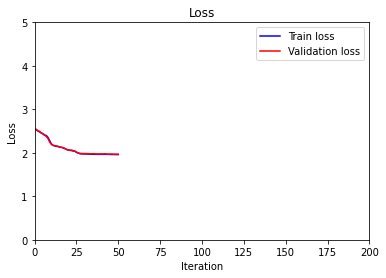

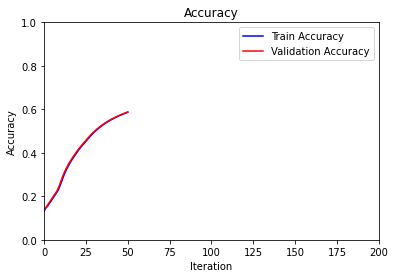

Iteration: 50, train loss: 1.9590, validation loss: 1.9691,train acc: 0.5865, validation acc: 0.5879
Step: 0 	Training Loss: 1.9241061 Training Acc: 0.58820415
Step: 1 	Training Loss: 1.9849229 Training Acc: 0.5882306
Step: 2 	Training Loss: 1.9617594 Training Acc: 0.5882625
Step: 3 	Training Loss: 2.005961 Training Acc: 0.5882854
Step: 4 	Training Loss: 1.9155773 Training Acc: 0.58832985
Step: 5 	Training Loss: 1.9431593 Training Acc: 0.5883671
Step: 6 	Training Loss: 1.9030137 Training Acc: 0.5884133
Step: 7 	Training Loss: 1.913118 Training Acc: 0.5884559
Step: 8 	Training Loss: 1.9476793 Training Acc: 0.5884913
Step: 9 	Training Loss: 1.9505248 Training Acc: 0.58852845
Step: 10 	Training Loss: 1.9222198 Training Acc: 0.5885692
Step: 11 	Training Loss: 1.9311018 Training Acc: 0.58860815
Step: 12 	Training Loss: 1.949343 Training Acc: 0.5886453
Step: 13 	Training Loss: 1.9129937 Training Acc: 0.58868957
Step: 14 	Training Loss: 1.9396325 Training Acc: 0.58872664
Step: 15 	Training Lo

Step: 54 	Training Loss: 1.9716315 Training Acc: 0.59266233
Step: 55 	Training Loss: 1.9757448 Training Acc: 0.5926905
Step: 56 	Training Loss: 1.993623 Training Acc: 0.5927152
Step: 57 	Training Loss: 1.9248581 Training Acc: 0.5927538
Step: 58 	Training Loss: 2.0113616 Training Acc: 0.5927732
Step: 59 	Training Loss: 1.9942418 Training Acc: 0.5927961
Step: 60 	Training Loss: 2.0638916 Training Acc: 0.5928033
Step: 61 	Training Loss: 2.0600965 Training Acc: 0.5928087
Step: 62 	Training Loss: 2.0766194 Training Acc: 0.5928124
Step: 63 	Training Loss: 1.9799445 Training Acc: 0.5928405
Step: 64 	Training Loss: 1.9601324 Training Acc: 0.59287035
Step: 65 	Training Loss: 1.9444679 Training Acc: 0.59290534
Step: 66 	Training Loss: 2.1080952 Training Acc: 0.59290206
Step: 67 	Training Loss: 2.0586507 Training Acc: 0.5929127
Step: 0 	Validation Loss: 2.0063245 Validation Acc: 0.59293205
Step: 1 	Validation Loss: 2.0557878 Validation Acc: 0.59294266
Step: 2 	Validation Loss: 2.0051394 Validatio

Step: 22 	Training Loss: 1.9936662 Training Acc: 0.59598213
Step: 23 	Training Loss: 1.9238048 Training Acc: 0.5960189
Step: 24 	Training Loss: 1.9892397 Training Acc: 0.5960421
Step: 25 	Training Loss: 1.9557843 Training Acc: 0.5960738
Step: 26 	Training Loss: 1.9859368 Training Acc: 0.596097
Step: 27 	Training Loss: 1.9671433 Training Acc: 0.59612525
Step: 28 	Training Loss: 1.9917231 Training Acc: 0.5961467
Step: 29 	Training Loss: 1.9665164 Training Acc: 0.5961749
Step: 30 	Training Loss: 1.9556291 Training Acc: 0.59620655
Step: 31 	Training Loss: 1.9916652 Training Acc: 0.59622794
Step: 32 	Training Loss: 1.9316885 Training Acc: 0.59626293
Step: 33 	Training Loss: 1.9821227 Training Acc: 0.5962877
Step: 34 	Training Loss: 1.9406356 Training Acc: 0.5963209
Step: 35 	Training Loss: 2.0103965 Training Acc: 0.596339
Step: 36 	Training Loss: 1.9880755 Training Acc: 0.59636205
Step: 37 	Training Loss: 1.923143 Training Acc: 0.5963986
Step: 38 	Training Loss: 1.9489355 Training Acc: 0.59

Step: 10 	Validation Loss: 1.965878 Validation Acc: 0.59984684
Step: 11 	Validation Loss: 1.9411297 Validation Acc: 0.59987843
Step: 12 	Validation Loss: 1.9552073 Validation Acc: 0.59990835
Step: 13 	Validation Loss: 1.9757631 Validation Acc: 0.5999333
Step: 14 	Validation Loss: 1.9782331 Validation Acc: 0.59995663
Step: 15 	Validation Loss: 1.955174 Validation Acc: 0.5999849
Step: 16 	Validation Loss: 1.9772248 Validation Acc: 0.6000082


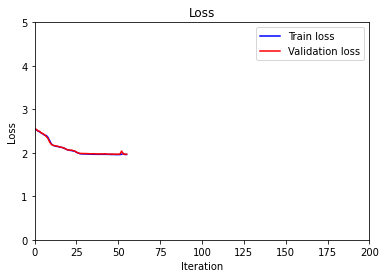

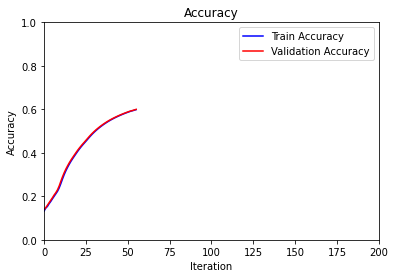

Iteration: 55, train loss: 1.9624, validation loss: 1.9682,train acc: 0.5987, validation acc: 0.5998
Step: 0 	Training Loss: 1.9238355 Training Acc: 0.600043
Step: 1 	Training Loss: 1.9854184 Training Acc: 0.60006464
Step: 2 	Training Loss: 1.9612772 Training Acc: 0.6000912
Step: 3 	Training Loss: 2.0066876 Training Acc: 0.6001079
Step: 4 	Training Loss: 1.9147497 Training Acc: 0.60014594
Step: 5 	Training Loss: 1.9400377 Training Acc: 0.600179
Step: 6 	Training Loss: 1.908188 Training Acc: 0.60021865
Step: 7 	Training Loss: 1.9104692 Training Acc: 0.60025495
Step: 8 	Training Loss: 1.9458634 Training Acc: 0.6002847
Step: 9 	Training Loss: 1.9465543 Training Acc: 0.6003161
Step: 10 	Training Loss: 1.923413 Training Acc: 0.60035074
Step: 11 	Training Loss: 1.9327381 Training Acc: 0.60038376
Step: 12 	Training Loss: 1.9509461 Training Acc: 0.60041344
Step: 13 	Training Loss: 1.913132 Training Acc: 0.6004497
Step: 14 	Training Loss: 1.9374087 Training Acc: 0.60048264
Step: 15 	Training Lo

Step: 53 	Training Loss: 1.9616379 Training Acc: 0.6037345
Step: 54 	Training Loss: 1.9854825 Training Acc: 0.60375476
Step: 55 	Training Loss: 1.9862294 Training Acc: 0.60377663
Step: 56 	Training Loss: 1.9752676 Training Acc: 0.6038001
Step: 57 	Training Loss: 1.9019575 Training Acc: 0.6038379
Step: 58 	Training Loss: 2.0275936 Training Acc: 0.6038502
Step: 59 	Training Loss: 2.0056927 Training Acc: 0.60386723
Step: 60 	Training Loss: 1.999377 Training Acc: 0.6038843
Step: 61 	Training Loss: 1.9899247 Training Acc: 0.60390294
Step: 62 	Training Loss: 2.0051236 Training Acc: 0.6039199
Step: 63 	Training Loss: 1.9503165 Training Acc: 0.6039481
Step: 64 	Training Loss: 1.952996 Training Acc: 0.60397464
Step: 65 	Training Loss: 1.941893 Training Acc: 0.6040044
Step: 66 	Training Loss: 2.0588522 Training Acc: 0.6040087
Step: 67 	Training Loss: 1.9910512 Training Acc: 0.6040273
Step: 0 	Validation Loss: 1.9595538 Validation Acc: 0.6040522
Step: 1 	Validation Loss: 1.9836208 Validation Acc:

Step: 20 	Training Loss: 1.9890406 Training Acc: 0.6070945
Step: 21 	Training Loss: 1.9335008 Training Acc: 0.60712445
Step: 22 	Training Loss: 1.9919436 Training Acc: 0.607142
Step: 23 	Training Loss: 1.9263997 Training Acc: 0.60717344
Step: 24 	Training Loss: 2.0017889 Training Acc: 0.60718936
Step: 25 	Training Loss: 1.9699135 Training Acc: 0.607213
Step: 26 	Training Loss: 2.0023344 Training Acc: 0.60722893
Step: 27 	Training Loss: 1.9647729 Training Acc: 0.6072526
Step: 28 	Training Loss: 1.9936363 Training Acc: 0.60727006
Step: 29 	Training Loss: 1.9640944 Training Acc: 0.6072937
Step: 30 	Training Loss: 1.9548165 Training Acc: 0.6073205
Step: 31 	Training Loss: 1.9965205 Training Acc: 0.60733634
Step: 32 	Training Loss: 1.9347653 Training Acc: 0.60736614
Step: 33 	Training Loss: 1.9917881 Training Acc: 0.6073851
Step: 34 	Training Loss: 1.9449761 Training Acc: 0.60741335
Step: 35 	Training Loss: 2.0118012 Training Acc: 0.60742766
Step: 36 	Training Loss: 1.9877574 Training Acc: 

Step: 9 	Validation Loss: 1.9851565 Validation Acc: 0.61041605
Step: 10 	Validation Loss: 1.9610499 Validation Acc: 0.61043847
Step: 11 	Validation Loss: 1.939406 Validation Acc: 0.6104654
Step: 12 	Validation Loss: 1.95165 Validation Acc: 0.61049086
Step: 13 	Validation Loss: 1.9764004 Validation Acc: 0.6105117
Step: 14 	Validation Loss: 1.9693615 Validation Acc: 0.61053264
Step: 15 	Validation Loss: 1.9614567 Validation Acc: 0.610555
Step: 16 	Validation Loss: 1.9763516 Validation Acc: 0.61057436


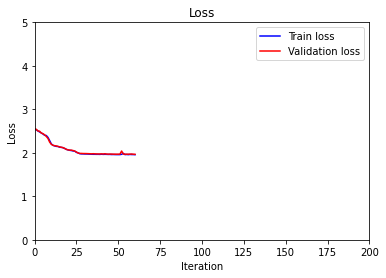

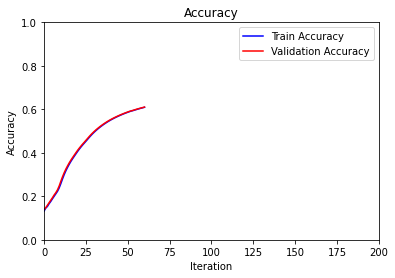

Iteration: 60, train loss: 1.9566, validation loss: 1.9665,train acc: 0.6094, validation acc: 0.6104
Step: 0 	Training Loss: 1.9229152 Training Acc: 0.6106043
Step: 1 	Training Loss: 1.9825845 Training Acc: 0.6106221
Step: 2 	Training Loss: 1.9612828 Training Acc: 0.61064446
Step: 3 	Training Loss: 2.0023432 Training Acc: 0.61065924
Step: 4 	Training Loss: 1.9126999 Training Acc: 0.61069214
Step: 5 	Training Loss: 1.9377394 Training Acc: 0.61072046
Step: 6 	Training Loss: 1.9020298 Training Acc: 0.61075485
Step: 7 	Training Loss: 1.9090434 Training Acc: 0.61078614
Step: 8 	Training Loss: 1.9466043 Training Acc: 0.6108115
Step: 9 	Training Loss: 1.9445907 Training Acc: 0.61083823
Step: 10 	Training Loss: 1.9229548 Training Acc: 0.61086804
Step: 11 	Training Loss: 1.9308833 Training Acc: 0.6108963
Step: 12 	Training Loss: 1.943568 Training Acc: 0.61092305
Step: 13 	Training Loss: 1.9089513 Training Acc: 0.61095583
Step: 14 	Training Loss: 1.9375942 Training Acc: 0.6109841
Step: 15 	Train

Step: 53 	Training Loss: 1.9542298 Training Acc: 0.61379486
Step: 54 	Training Loss: 1.9608059 Training Acc: 0.613816
Step: 55 	Training Loss: 1.9746493 Training Acc: 0.61383575
Step: 56 	Training Loss: 1.9729818 Training Acc: 0.6138554
Step: 57 	Training Loss: 1.9008976 Training Acc: 0.6138883
Step: 58 	Training Loss: 2.0072174 Training Acc: 0.61390066
Step: 59 	Training Loss: 1.9791772 Training Acc: 0.61391884
Step: 60 	Training Loss: 1.9765438 Training Acc: 0.6139371
Step: 61 	Training Loss: 1.9657875 Training Acc: 0.6139567
Step: 62 	Training Loss: 1.9962313 Training Acc: 0.61397195
Step: 63 	Training Loss: 1.9425161 Training Acc: 0.61399746
Step: 64 	Training Loss: 1.9516575 Training Acc: 0.61402005
Step: 65 	Training Loss: 1.9391661 Training Acc: 0.6140455
Step: 66 	Training Loss: 2.0576127 Training Acc: 0.6140476
Step: 67 	Training Loss: 1.9909067 Training Acc: 0.6140628
Step: 0 	Validation Loss: 1.9545119 Validation Acc: 0.6140853
Step: 1 	Validation Loss: 1.9812983 Validation 

Step: 20 	Training Loss: 1.9790921 Training Acc: 0.6167469
Step: 21 	Training Loss: 1.9495144 Training Acc: 0.6167684
Step: 22 	Training Loss: 1.9926395 Training Acc: 0.6167828
Step: 23 	Training Loss: 1.9233422 Training Acc: 0.61681
Step: 24 	Training Loss: 1.9769261 Training Acc: 0.61682725
Step: 25 	Training Loss: 1.9501257 Training Acc: 0.6168502
Step: 26 	Training Loss: 1.9849029 Training Acc: 0.616866
Step: 27 	Training Loss: 1.9644182 Training Acc: 0.616886
Step: 28 	Training Loss: 1.9911754 Training Acc: 0.6169004
Step: 29 	Training Loss: 1.9665757 Training Acc: 0.6169204
Step: 30 	Training Loss: 1.9512093 Training Acc: 0.6169433
Step: 31 	Training Loss: 1.9916401 Training Acc: 0.61695766
Step: 32 	Training Loss: 1.9337113 Training Acc: 0.61698335
Step: 33 	Training Loss: 1.9827375 Training Acc: 0.6170005
Step: 34 	Training Loss: 1.943567 Training Acc: 0.6170234
Step: 35 	Training Loss: 2.0108466 Training Acc: 0.61703485
Step: 36 	Training Loss: 1.987705 Training Acc: 0.6170506

Step: 7 	Validation Loss: 1.9761943 Validation Acc: 0.61949456
Step: 8 	Validation Loss: 1.9324403 Validation Acc: 0.61951923
Step: 9 	Validation Loss: 1.9892764 Validation Acc: 0.6195342
Step: 10 	Validation Loss: 1.9749904 Validation Acc: 0.6195491
Step: 11 	Validation Loss: 1.9397913 Validation Acc: 0.61957234
Step: 12 	Validation Loss: 1.9537449 Validation Acc: 0.61959285
Step: 13 	Validation Loss: 1.9756021 Validation Acc: 0.61961055
Step: 14 	Validation Loss: 1.9796878 Validation Acc: 0.61962545
Step: 15 	Validation Loss: 1.965781 Validation Acc: 0.6196431
Step: 16 	Validation Loss: 1.9952621 Validation Acc: 0.61965656


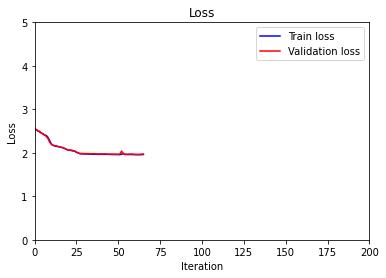

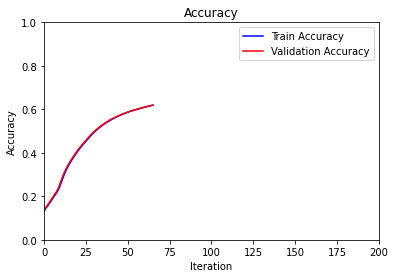

Iteration: 65, train loss: 1.9610, validation loss: 1.9707,train acc: 0.6187, validation acc: 0.6195
Step: 0 	Training Loss: 1.926119 Training Acc: 0.6196826
Step: 1 	Training Loss: 1.9868307 Training Acc: 0.61969745
Step: 2 	Training Loss: 1.9604208 Training Acc: 0.6197165
Step: 3 	Training Loss: 2.002438 Training Acc: 0.61972857
Step: 4 	Training Loss: 1.9145792 Training Acc: 0.61975735
Step: 5 	Training Loss: 1.9373415 Training Acc: 0.6197819
Step: 6 	Training Loss: 1.9013656 Training Acc: 0.6198121
Step: 7 	Training Loss: 1.9116309 Training Acc: 0.6198408
Step: 8 	Training Loss: 1.949511 Training Acc: 0.61986256
Step: 9 	Training Loss: 1.9507644 Training Acc: 0.6198843
Step: 10 	Training Loss: 1.9223691 Training Acc: 0.61991024
Step: 11 	Training Loss: 1.9343523 Training Acc: 0.6199348
Step: 12 	Training Loss: 1.9467514 Training Acc: 0.6199579
Step: 13 	Training Loss: 1.9094582 Training Acc: 0.6199866
Step: 14 	Training Loss: 1.9374127 Training Acc: 0.6200111
Step: 15 	Training Los

Step: 54 	Training Loss: 1.9605755 Training Acc: 0.62243617
Step: 55 	Training Loss: 1.973125 Training Acc: 0.6224529
Step: 56 	Training Loss: 1.973829 Training Acc: 0.6224696
Step: 57 	Training Loss: 1.9010224 Training Acc: 0.6224986
Step: 58 	Training Loss: 2.007375 Training Acc: 0.6225085
Step: 59 	Training Loss: 1.979183 Training Acc: 0.6225239
Step: 60 	Training Loss: 1.9766861 Training Acc: 0.6225393
Step: 61 	Training Loss: 1.9657762 Training Acc: 0.622556
Step: 62 	Training Loss: 1.9968368 Training Acc: 0.6225686
Step: 63 	Training Loss: 1.9403616 Training Acc: 0.6225907
Step: 64 	Training Loss: 1.9505881 Training Acc: 0.62261015
Step: 65 	Training Loss: 1.9392102 Training Acc: 0.62263227
Step: 66 	Training Loss: 2.057199 Training Acc: 0.6226327
Step: 67 	Training Loss: 1.9894351 Training Acc: 0.62264526
Step: 0 	Validation Loss: 1.9529316 Validation Acc: 0.622666
Step: 1 	Validation Loss: 1.9783612 Validation Acc: 0.6226813
Step: 2 	Validation Loss: 1.9230027 Validation Acc: 0

Step: 24 	Training Loss: 1.9819568 Training Acc: 0.6250398
Step: 25 	Training Loss: 1.9476861 Training Acc: 0.62505966
Step: 26 	Training Loss: 1.9863842 Training Acc: 0.62507296
Step: 27 	Training Loss: 1.9650124 Training Acc: 0.6250901
Step: 28 	Training Loss: 1.9917909 Training Acc: 0.62510204
Step: 29 	Training Loss: 1.9660225 Training Acc: 0.62511927
Step: 30 	Training Loss: 1.9481716 Training Acc: 0.6251391
Step: 31 	Training Loss: 1.9915137 Training Acc: 0.62515104
Step: 32 	Training Loss: 1.9309556 Training Acc: 0.6251735
Step: 33 	Training Loss: 1.9793564 Training Acc: 0.62518805
Step: 34 	Training Loss: 1.9406915 Training Acc: 0.6252092
Step: 35 	Training Loss: 2.0100558 Training Acc: 0.62521845
Step: 36 	Training Loss: 1.98693 Training Acc: 0.6252316
Step: 37 	Training Loss: 1.9203074 Training Acc: 0.6252554
Step: 38 	Training Loss: 1.9456975 Training Acc: 0.62527525
Step: 39 	Training Loss: 1.9633358 Training Acc: 0.62529236
Step: 40 	Training Loss: 2.0015771 Training Acc: 

Step: 10 	Validation Loss: 1.9613137 Validation Acc: 0.6274543
Step: 11 	Validation Loss: 1.9398693 Validation Acc: 0.6274746
Step: 12 	Validation Loss: 1.9529085 Validation Acc: 0.6274936
Step: 13 	Validation Loss: 1.9676067 Validation Acc: 0.62750876
Step: 14 	Validation Loss: 1.9762325 Validation Acc: 0.6275226
Step: 15 	Validation Loss: 1.9530613 Validation Acc: 0.6275403
Step: 16 	Validation Loss: 1.9851854 Validation Acc: 0.6275528


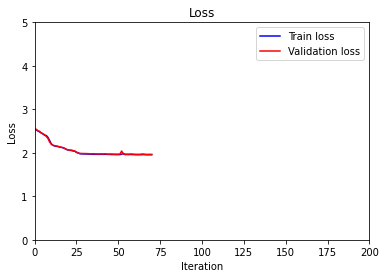

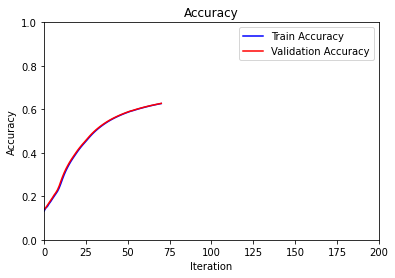

Iteration: 70, train loss: 1.9556, validation loss: 1.9653,train acc: 0.6267, validation acc: 0.6274
Step: 0 	Training Loss: 1.9232854 Training Acc: 0.6275757
Step: 1 	Training Loss: 1.9821836 Training Acc: 0.6275895
Step: 2 	Training Loss: 1.9582185 Training Acc: 0.62760717
Step: 3 	Training Loss: 2.0063705 Training Acc: 0.6276158
Step: 4 	Training Loss: 1.90977 Training Acc: 0.62764126
Step: 5 	Training Loss: 1.9356499 Training Acc: 0.6276628
Step: 6 	Training Loss: 1.9077318 Training Acc: 0.6276882
Step: 7 	Training Loss: 1.9074802 Training Acc: 0.62771493
Step: 8 	Training Loss: 1.9460046 Training Acc: 0.6277339
Step: 9 	Training Loss: 1.9432193 Training Acc: 0.6277541
Step: 10 	Training Loss: 1.9210727 Training Acc: 0.62777686
Step: 11 	Training Loss: 1.9305918 Training Acc: 0.6277984
Step: 12 	Training Loss: 1.9420192 Training Acc: 0.6278186
Step: 13 	Training Loss: 1.909385 Training Acc: 0.627844
Step: 14 	Training Loss: 1.9334958 Training Acc: 0.62786543
Step: 15 	Training Loss

Step: 53 	Training Loss: 1.9510752 Training Acc: 0.6299679
Step: 54 	Training Loss: 1.9602896 Training Acc: 0.62998354
Step: 55 	Training Loss: 1.9725013 Training Acc: 0.6299979
Step: 56 	Training Loss: 1.973638 Training Acc: 0.6300123
Step: 57 	Training Loss: 1.8995245 Training Acc: 0.630038
Step: 58 	Training Loss: 2.0063074 Training Acc: 0.63004607
Step: 59 	Training Loss: 1.9782529 Training Acc: 0.6300592
Step: 60 	Training Loss: 1.9765148 Training Acc: 0.63007224
Step: 61 	Training Loss: 1.9639139 Training Acc: 0.63008785
Step: 62 	Training Loss: 1.9941941 Training Acc: 0.6300984
Step: 63 	Training Loss: 1.9392387 Training Acc: 0.6301178
Step: 64 	Training Loss: 1.9497612 Training Acc: 0.6301359
Step: 65 	Training Loss: 1.938958 Training Acc: 0.63015527
Step: 66 	Training Loss: 2.0564346 Training Acc: 0.63015574
Step: 67 	Training Loss: 1.98915 Training Acc: 0.63016623
Step: 0 	Validation Loss: 1.9517025 Validation Acc: 0.63018435
Step: 1 	Validation Loss: 1.9805582 Validation Acc

Step: 21 	Training Loss: 1.9327655 Training Acc: 0.6321788
Step: 22 	Training Loss: 1.9941237 Training Acc: 0.63219005
Step: 23 	Training Loss: 1.9577719 Training Acc: 0.63220745
Step: 24 	Training Loss: 1.9892081 Training Acc: 0.63221747
Step: 25 	Training Loss: 1.9510964 Training Acc: 0.63223606
Step: 26 	Training Loss: 1.9965777 Training Acc: 0.6322461
Step: 27 	Training Loss: 1.97351 Training Acc: 0.6322598
Step: 28 	Training Loss: 2.0000882 Training Acc: 0.6322685
Step: 29 	Training Loss: 2.0006824 Training Acc: 0.63227725
Step: 30 	Training Loss: 1.9631786 Training Acc: 0.6322934
Step: 31 	Training Loss: 2.001038 Training Acc: 0.6323021
Step: 32 	Training Loss: 1.9423232 Training Acc: 0.63232076
Step: 33 	Training Loss: 1.9878557 Training Acc: 0.6323307
Step: 34 	Training Loss: 1.9427562 Training Acc: 0.6323493
Step: 35 	Training Loss: 2.0189483 Training Acc: 0.6323556
Step: 36 	Training Loss: 2.0147357 Training Acc: 0.632363
Step: 37 	Training Loss: 1.9228942 Training Acc: 0.632

Step: 9 	Validation Loss: 1.9838568 Validation Acc: 0.63418907
Step: 10 	Validation Loss: 1.9648013 Validation Acc: 0.6342034
Step: 11 	Validation Loss: 1.9392252 Validation Acc: 0.6342213
Step: 12 	Validation Loss: 1.948733 Validation Acc: 0.634238
Step: 13 	Validation Loss: 1.9623939 Validation Acc: 0.6342535
Step: 14 	Validation Loss: 1.9770263 Validation Acc: 0.6342654
Step: 15 	Validation Loss: 1.9531758 Validation Acc: 0.6342809
Step: 16 	Validation Loss: 1.9886289 Validation Acc: 0.6342915


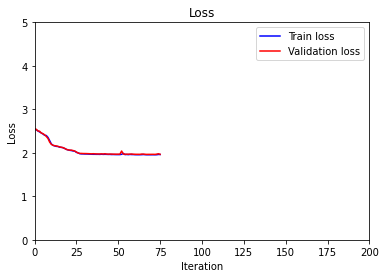

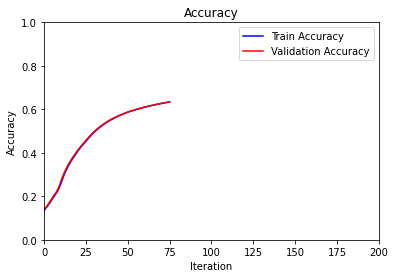

Iteration: 75, train loss: 1.9605, validation loss: 1.9664,train acc: 0.6336, validation acc: 0.6342
Step: 0 	Training Loss: 1.9254384 Training Acc: 0.63431185
Step: 1 	Training Loss: 1.9823294 Training Acc: 0.6343237
Step: 2 	Training Loss: 1.960405 Training Acc: 0.6343392
Step: 3 	Training Loss: 2.000264 Training Acc: 0.63434744
Step: 4 	Training Loss: 1.9099864 Training Acc: 0.63437015
Step: 5 	Training Loss: 1.9364007 Training Acc: 0.6343893
Step: 6 	Training Loss: 1.9026366 Training Acc: 0.6344132
Step: 7 	Training Loss: 1.9132533 Training Acc: 0.63443345
Step: 8 	Training Loss: 1.9546194 Training Acc: 0.6344489
Step: 9 	Training Loss: 1.9514699 Training Acc: 0.63446677
Step: 10 	Training Loss: 1.9214429 Training Acc: 0.63448703
Step: 11 	Training Loss: 1.934052 Training Acc: 0.6345061
Step: 12 	Training Loss: 1.9430971 Training Acc: 0.6345239
Step: 13 	Training Loss: 1.9103267 Training Acc: 0.6345466
Step: 14 	Training Loss: 1.9362555 Training Acc: 0.63456565
Step: 15 	Training L

Step: 52 	Training Loss: 1.9230007 Training Acc: 0.6364038
Step: 53 	Training Loss: 1.9522209 Training Acc: 0.63641864
Step: 54 	Training Loss: 1.9622176 Training Acc: 0.6364323
Step: 55 	Training Loss: 1.9748824 Training Acc: 0.63644475
Step: 56 	Training Loss: 1.9726875 Training Acc: 0.6364572
Step: 57 	Training Loss: 1.9017268 Training Acc: 0.63648033
Step: 58 	Training Loss: 2.0087914 Training Acc: 0.6364869
Step: 59 	Training Loss: 1.9787062 Training Acc: 0.63649815
Step: 60 	Training Loss: 1.9756553 Training Acc: 0.6365094
Step: 61 	Training Loss: 1.9651034 Training Acc: 0.63652307
Step: 62 	Training Loss: 1.9944184 Training Acc: 0.63653195
Step: 63 	Training Loss: 1.9405812 Training Acc: 0.6365491
Step: 64 	Training Loss: 1.9512993 Training Acc: 0.6365651
Step: 65 	Training Loss: 1.939342 Training Acc: 0.63658226
Step: 66 	Training Loss: 2.0575235 Training Acc: 0.63658166
Step: 67 	Training Loss: 1.9904579 Training Acc: 0.63659054
Step: 0 	Validation Loss: 1.9497674 Validation A

Step: 20 	Training Loss: 1.9727011 Training Acc: 0.63839465
Step: 21 	Training Loss: 1.9297639 Training Acc: 0.6384124
Step: 22 	Training Loss: 1.9890723 Training Acc: 0.638422
Step: 23 	Training Loss: 1.9232378 Training Acc: 0.6384409
Step: 24 	Training Loss: 1.9753792 Training Acc: 0.63845164
Step: 25 	Training Loss: 1.9439396 Training Acc: 0.6384682
Step: 26 	Training Loss: 1.9853381 Training Acc: 0.6384778
Step: 27 	Training Loss: 1.9632052 Training Acc: 0.63849086
Step: 28 	Training Loss: 1.9913597 Training Acc: 0.63849926
Step: 29 	Training Loss: 1.9645836 Training Acc: 0.6385123
Step: 30 	Training Loss: 1.9475507 Training Acc: 0.6385277
Step: 31 	Training Loss: 1.9913685 Training Acc: 0.6385361
Step: 32 	Training Loss: 1.9307435 Training Acc: 0.6385538
Step: 33 	Training Loss: 1.9806026 Training Acc: 0.6385645
Step: 34 	Training Loss: 1.938609 Training Acc: 0.63858104
Step: 35 	Training Loss: 2.007169 Training Acc: 0.6385871
Step: 36 	Training Loss: 1.9838909 Training Acc: 0.638

Step: 5 	Validation Loss: 1.9912807 Validation Acc: 0.6402693
Step: 6 	Validation Loss: 1.9844694 Validation Acc: 0.6402784
Step: 7 	Validation Loss: 1.975878 Validation Acc: 0.6402887
Step: 8 	Validation Loss: 1.9304283 Validation Acc: 0.64030576
Step: 9 	Validation Loss: 1.9827809 Validation Acc: 0.64031607
Step: 10 	Validation Loss: 1.9510403 Validation Acc: 0.64033085
Step: 11 	Validation Loss: 1.9385633 Validation Acc: 0.64034677
Step: 12 	Validation Loss: 1.946808 Validation Acc: 0.6403616
Step: 13 	Validation Loss: 1.9646182 Validation Acc: 0.6403741
Step: 14 	Validation Loss: 1.9695256 Validation Acc: 0.6403855
Step: 15 	Validation Loss: 1.9607053 Validation Acc: 0.640398
Step: 16 	Validation Loss: 1.9759793 Validation Acc: 0.6404083


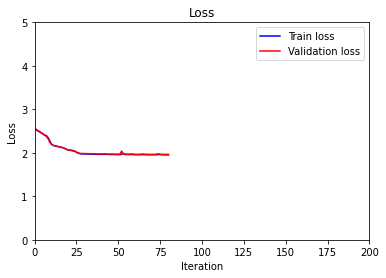

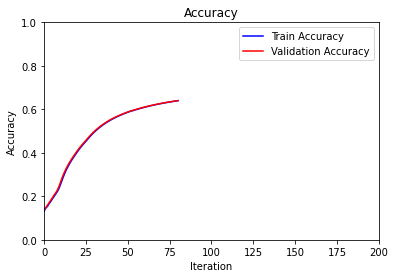

Iteration: 80, train loss: 1.9534, validation loss: 1.9626,train acc: 0.6397, validation acc: 0.6403
Step: 0 	Training Loss: 1.9233369 Training Acc: 0.64042646
Step: 1 	Training Loss: 1.9815412 Training Acc: 0.6404367
Step: 2 	Training Loss: 1.955651 Training Acc: 0.64045036
Step: 3 	Training Loss: 2.0005293 Training Acc: 0.64045715
Step: 4 	Training Loss: 1.9102864 Training Acc: 0.6404776
Step: 5 	Training Loss: 1.9358239 Training Acc: 0.64049464
Step: 6 	Training Loss: 1.8997793 Training Acc: 0.64051616
Step: 7 	Training Loss: 1.9004941 Training Acc: 0.64053774
Step: 8 	Training Loss: 1.9447194 Training Acc: 0.64055246
Step: 9 	Training Loss: 1.9418828 Training Acc: 0.6405684
Step: 10 	Training Loss: 1.9211686 Training Acc: 0.6405865
Step: 11 	Training Loss: 1.9308887 Training Acc: 0.6406035
Step: 12 	Training Loss: 1.9411235 Training Acc: 0.64061934
Step: 13 	Training Loss: 1.907583 Training Acc: 0.6406397
Step: 14 	Training Loss: 1.9337001 Training Acc: 0.6406567
Step: 15 	Training

Step: 51 	Training Loss: 2.0063252 Training Acc: 0.6422805
Step: 52 	Training Loss: 1.9246856 Training Acc: 0.64229697
Step: 53 	Training Loss: 1.9427344 Training Acc: 0.6423123
Step: 54 	Training Loss: 1.9517827 Training Acc: 0.6423254
Step: 55 	Training Loss: 1.9710798 Training Acc: 0.64233625
Step: 56 	Training Loss: 1.9711367 Training Acc: 0.64234716
Step: 57 	Training Loss: 1.8994398 Training Acc: 0.642368
Step: 58 	Training Loss: 2.0056024 Training Acc: 0.6423733
Step: 59 	Training Loss: 1.9695076 Training Acc: 0.64238423
Step: 60 	Training Loss: 1.9753847 Training Acc: 0.64239395
Step: 61 	Training Loss: 1.9636577 Training Acc: 0.6424059
Step: 62 	Training Loss: 1.9921784 Training Acc: 0.64241344
Step: 63 	Training Loss: 1.9397535 Training Acc: 0.64242876
Step: 64 	Training Loss: 1.949266 Training Acc: 0.64244294
Step: 65 	Training Loss: 1.938019 Training Acc: 0.6424582
Step: 66 	Training Loss: 2.0541449 Training Acc: 0.6424568
Step: 67 	Training Loss: 1.988282 Training Acc: 0.6

Step: 20 	Training Loss: 1.9735084 Training Acc: 0.6440703
Step: 21 	Training Loss: 1.929704 Training Acc: 0.6440862
Step: 22 	Training Loss: 1.9871695 Training Acc: 0.6440944
Step: 23 	Training Loss: 1.9229771 Training Acc: 0.6441114
Step: 24 	Training Loss: 1.9767426 Training Acc: 0.64412075
Step: 25 	Training Loss: 1.9490411 Training Acc: 0.6441344
Step: 26 	Training Loss: 1.984511 Training Acc: 0.6441426
Step: 27 	Training Loss: 1.9625185 Training Acc: 0.64415413
Step: 28 	Training Loss: 1.9919162 Training Acc: 0.6441613
Step: 29 	Training Loss: 1.9626601 Training Acc: 0.6441728
Step: 30 	Training Loss: 1.9484966 Training Acc: 0.64418644
Step: 31 	Training Loss: 1.991686 Training Acc: 0.6441936
Step: 32 	Training Loss: 1.9336905 Training Acc: 0.6442094
Step: 33 	Training Loss: 1.9813946 Training Acc: 0.6442187
Step: 34 	Training Loss: 1.9387115 Training Acc: 0.64423347
Step: 35 	Training Loss: 2.0076327 Training Acc: 0.6442384
Step: 36 	Training Loss: 1.9853168 Training Acc: 0.6442

Step: 8 	Validation Loss: 1.9306045 Validation Acc: 0.6457691
Step: 9 	Validation Loss: 1.9844712 Validation Acc: 0.64577806
Step: 10 	Validation Loss: 1.9499376 Validation Acc: 0.64579123
Step: 11 	Validation Loss: 1.9384328 Validation Acc: 0.64580554
Step: 12 	Validation Loss: 1.9491687 Validation Acc: 0.6458187
Step: 13 	Validation Loss: 1.9625251 Validation Acc: 0.6458308
Step: 14 	Validation Loss: 1.9696087 Validation Acc: 0.6458408
Step: 15 	Validation Loss: 1.9580193 Validation Acc: 0.64585185
Step: 16 	Validation Loss: 1.9793122 Validation Acc: 0.6458608


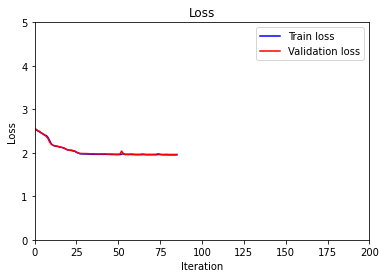

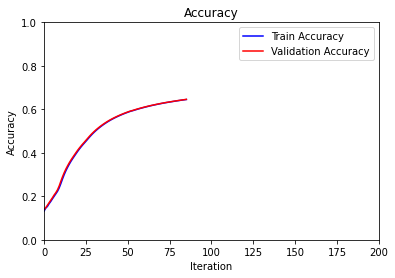

Iteration: 85, train loss: 1.9537, validation loss: 1.9629,train acc: 0.6453, validation acc: 0.6458
Step: 0 	Training Loss: 1.9239877 Training Acc: 0.6458771
Step: 1 	Training Loss: 1.9817269 Training Acc: 0.64588606
Step: 2 	Training Loss: 1.9553854 Training Acc: 0.64589816
Step: 3 	Training Loss: 2.0006309 Training Acc: 0.6459038
Step: 4 	Training Loss: 1.9098662 Training Acc: 0.64592236
Step: 5 	Training Loss: 1.9352337 Training Acc: 0.6459376
Step: 6 	Training Loss: 1.9012531 Training Acc: 0.6459572
Step: 7 	Training Loss: 1.903214 Training Acc: 0.6459767
Step: 8 	Training Loss: 1.94663 Training Acc: 0.6459899
Step: 9 	Training Loss: 1.9424369 Training Acc: 0.6460041
Step: 10 	Training Loss: 1.9213984 Training Acc: 0.6460204
Step: 11 	Training Loss: 1.9303875 Training Acc: 0.64603573
Step: 12 	Training Loss: 1.9415976 Training Acc: 0.6460499
Step: 13 	Training Loss: 1.9071519 Training Acc: 0.64606833
Step: 14 	Training Loss: 1.9269943 Training Acc: 0.64608467
Step: 15 	Training Lo

Step: 53 	Training Loss: 1.9420962 Training Acc: 0.64754814
Step: 54 	Training Loss: 1.9520977 Training Acc: 0.64755976
Step: 55 	Training Loss: 1.9707644 Training Acc: 0.6475693
Step: 56 	Training Loss: 1.9714905 Training Acc: 0.6475789
Step: 57 	Training Loss: 1.8993161 Training Acc: 0.64759785
Step: 58 	Training Loss: 2.0061357 Training Acc: 0.64760214
Step: 59 	Training Loss: 1.9694164 Training Acc: 0.64761174
Step: 60 	Training Loss: 1.9759959 Training Acc: 0.6476202
Step: 61 	Training Loss: 1.9644635 Training Acc: 0.6476308
Step: 62 	Training Loss: 1.993819 Training Acc: 0.6476372
Step: 63 	Training Loss: 1.9399487 Training Acc: 0.6476509
Step: 64 	Training Loss: 1.9493783 Training Acc: 0.6476636
Step: 65 	Training Loss: 1.9388037 Training Acc: 0.6476773
Step: 66 	Training Loss: 2.054865 Training Acc: 0.6476753
Step: 67 	Training Loss: 1.9881821 Training Acc: 0.6476827
Step: 0 	Validation Loss: 1.9490609 Validation Acc: 0.6476954
Step: 1 	Validation Loss: 1.974438 Validation Acc:

Step: 20 	Training Loss: 1.975646 Training Acc: 0.64910173
Step: 21 	Training Loss: 1.9292151 Training Acc: 0.6491161
Step: 22 	Training Loss: 1.9856567 Training Acc: 0.6491232
Step: 23 	Training Loss: 1.9225268 Training Acc: 0.64913857
Step: 24 	Training Loss: 1.9787948 Training Acc: 0.6491467
Step: 25 	Training Loss: 1.9477575 Training Acc: 0.64915895
Step: 26 	Training Loss: 1.9835572 Training Acc: 0.64916605
Step: 27 	Training Loss: 1.9617381 Training Acc: 0.64917624
Step: 28 	Training Loss: 1.9910765 Training Acc: 0.6491823
Step: 29 	Training Loss: 1.9614258 Training Acc: 0.6491925
Step: 30 	Training Loss: 1.9467452 Training Acc: 0.6492048
Step: 31 	Training Loss: 1.9888827 Training Acc: 0.6492108
Step: 32 	Training Loss: 1.9296348 Training Acc: 0.6492251
Step: 33 	Training Loss: 1.9779376 Training Acc: 0.6492332
Step: 34 	Training Loss: 1.9377811 Training Acc: 0.6492465
Step: 35 	Training Loss: 2.0066857 Training Acc: 0.6492505
Step: 36 	Training Loss: 1.9854873 Training Acc: 0.6

Step: 9 	Validation Loss: 1.9834201 Validation Acc: 0.6506181
Step: 10 	Validation Loss: 1.948673 Validation Acc: 0.65062994
Step: 11 	Validation Loss: 1.9380219 Validation Acc: 0.6506428
Step: 12 	Validation Loss: 1.9475951 Validation Acc: 0.6506546
Step: 13 	Validation Loss: 1.9625552 Validation Acc: 0.65066445
Step: 14 	Validation Loss: 1.9714392 Validation Acc: 0.6506733
Step: 15 	Validation Loss: 1.958879 Validation Acc: 0.65068305
Step: 16 	Validation Loss: 1.975851 Validation Acc: 0.65069085


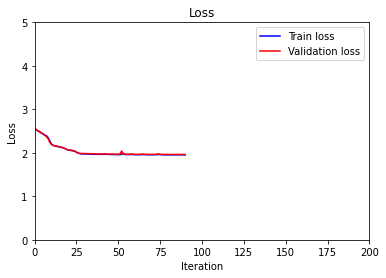

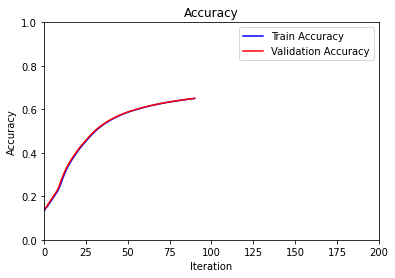

Iteration: 90, train loss: 1.9531, validation loss: 1.9623,train acc: 0.6502, validation acc: 0.6506
Step: 0 	Training Loss: 1.9225683 Training Acc: 0.6507057
Step: 1 	Training Loss: 1.9814025 Training Acc: 0.6507135
Step: 2 	Training Loss: 1.9559715 Training Acc: 0.6507243
Step: 3 	Training Loss: 1.9996824 Training Acc: 0.65072906
Step: 4 	Training Loss: 1.9083976 Training Acc: 0.6507459
Step: 5 	Training Loss: 1.9319468 Training Acc: 0.65075976
Step: 6 	Training Loss: 1.9000195 Training Acc: 0.65077764
Step: 7 	Training Loss: 1.9003382 Training Acc: 0.65079546
Step: 8 	Training Loss: 1.9532512 Training Acc: 0.65080625
Step: 9 	Training Loss: 1.9400204 Training Acc: 0.65081906
Step: 10 	Training Loss: 1.9218881 Training Acc: 0.6508339
Step: 11 	Training Loss: 1.9315307 Training Acc: 0.65084773
Step: 12 	Training Loss: 1.9399335 Training Acc: 0.6508605
Step: 13 	Training Loss: 1.8997132 Training Acc: 0.6508783
Step: 14 	Training Loss: 1.9243677 Training Acc: 0.65089315
Step: 15 	Traini

Step: 52 	Training Loss: 1.9326518 Training Acc: 0.6521964
Step: 53 	Training Loss: 1.9422555 Training Acc: 0.6522078
Step: 54 	Training Loss: 1.9530466 Training Acc: 0.6522183
Step: 55 	Training Loss: 1.9728079 Training Acc: 0.6522267
Step: 56 	Training Loss: 1.9711542 Training Acc: 0.65223515
Step: 57 	Training Loss: 1.8995795 Training Acc: 0.6522525
Step: 58 	Training Loss: 2.0073574 Training Acc: 0.652256
Step: 59 	Training Loss: 1.9699814 Training Acc: 0.6522644
Step: 60 	Training Loss: 1.9751968 Training Acc: 0.65227187
Step: 61 	Training Loss: 1.9618695 Training Acc: 0.6522813
Step: 62 	Training Loss: 1.990536 Training Acc: 0.65228677
Step: 63 	Training Loss: 1.9400778 Training Acc: 0.65229917
Step: 64 	Training Loss: 1.9488242 Training Acc: 0.65231055
Step: 65 	Training Loss: 1.9378874 Training Acc: 0.65232295
Step: 66 	Training Loss: 2.0530372 Training Acc: 0.65232044
Step: 67 	Training Loss: 1.9880698 Training Acc: 0.65232694
Step: 0 	Validation Loss: 1.9461766 Validation Acc

Step: 21 	Training Loss: 1.9294348 Training Acc: 0.65363574
Step: 22 	Training Loss: 1.9888813 Training Acc: 0.65364194
Step: 23 	Training Loss: 1.9219129 Training Acc: 0.6536559
Step: 24 	Training Loss: 1.9762529 Training Acc: 0.65366304
Step: 25 	Training Loss: 1.9439427 Training Acc: 0.6536751
Step: 26 	Training Loss: 1.9832819 Training Acc: 0.6536812
Step: 27 	Training Loss: 1.9610903 Training Acc: 0.65369034
Step: 28 	Training Loss: 1.9914043 Training Acc: 0.6536955
Step: 29 	Training Loss: 1.9681792 Training Acc: 0.65370363
Step: 30 	Training Loss: 1.9463744 Training Acc: 0.65371466
Step: 31 	Training Loss: 1.9912249 Training Acc: 0.65371984
Step: 32 	Training Loss: 1.930114 Training Acc: 0.65373284
Step: 33 	Training Loss: 1.9844469 Training Acc: 0.653739
Step: 34 	Training Loss: 1.9371809 Training Acc: 0.65375096
Step: 35 	Training Loss: 2.0066228 Training Acc: 0.65375423
Step: 36 	Training Loss: 1.9842887 Training Acc: 0.6537604
Step: 37 	Training Loss: 1.9098083 Training Acc:

Step: 9 	Validation Loss: 1.9793591 Validation Acc: 0.6549938
Step: 10 	Validation Loss: 1.9477453 Validation Acc: 0.65500444
Step: 11 	Validation Loss: 1.9379973 Validation Acc: 0.65501606
Step: 12 	Validation Loss: 1.9480367 Validation Acc: 0.6550268
Step: 13 	Validation Loss: 1.9573184 Validation Acc: 0.6550365
Step: 14 	Validation Loss: 1.9686946 Validation Acc: 0.6550443
Step: 15 	Validation Loss: 1.9591882 Validation Acc: 0.6550531
Step: 16 	Validation Loss: 1.9755569 Validation Acc: 0.65505993


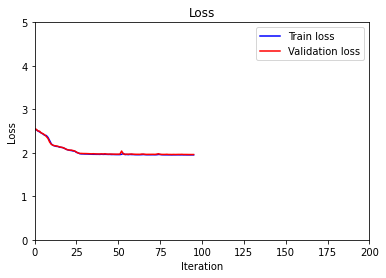

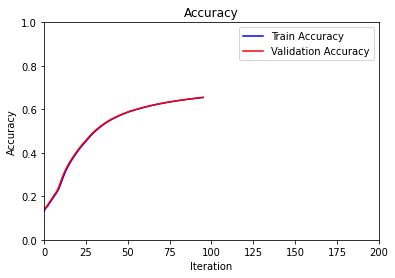

Iteration: 95, train loss: 1.9517, validation loss: 1.9610,train acc: 0.6546, validation acc: 0.6550
Step: 0 	Training Loss: 1.922255 Training Acc: 0.65507346
Step: 1 	Training Loss: 1.9793602 Training Acc: 0.6550803
Step: 2 	Training Loss: 1.9533578 Training Acc: 0.65509003
Step: 3 	Training Loss: 2.0000405 Training Acc: 0.655094
Step: 4 	Training Loss: 1.9078867 Training Acc: 0.65510947
Step: 5 	Training Loss: 1.9309814 Training Acc: 0.65512204
Step: 6 	Training Loss: 1.8986261 Training Acc: 0.65513843
Step: 7 	Training Loss: 1.9007064 Training Acc: 0.6551548
Step: 8 	Training Loss: 1.9448295 Training Acc: 0.6551655
Step: 9 	Training Loss: 1.9402969 Training Acc: 0.6551771
Step: 10 	Training Loss: 1.9208912 Training Acc: 0.6551906
Step: 11 	Training Loss: 1.9300132 Training Acc: 0.65520316
Step: 12 	Training Loss: 1.9384972 Training Acc: 0.6552148
Step: 13 	Training Loss: 1.8992287 Training Acc: 0.6552311
Step: 14 	Training Loss: 1.9277742 Training Acc: 0.6552437
Step: 15 	Training L

Step: 54 	Training Loss: 1.953134 Training Acc: 0.65644205
Step: 55 	Training Loss: 1.971278 Training Acc: 0.6564495
Step: 56 	Training Loss: 1.9719764 Training Acc: 0.656457
Step: 57 	Training Loss: 1.8999245 Training Acc: 0.656473
Step: 58 	Training Loss: 2.0063977 Training Acc: 0.6564758
Step: 59 	Training Loss: 1.9705858 Training Acc: 0.6564833
Step: 60 	Training Loss: 1.975387 Training Acc: 0.65648985
Step: 61 	Training Loss: 1.961677 Training Acc: 0.6564983
Step: 62 	Training Loss: 1.99227 Training Acc: 0.65650296
Step: 63 	Training Loss: 1.9255648 Training Acc: 0.6565161
Step: 64 	Training Loss: 1.9485738 Training Acc: 0.6565264
Step: 65 	Training Loss: 1.9372662 Training Acc: 0.65653765
Step: 66 	Training Loss: 2.0543795 Training Acc: 0.6565348
Step: 67 	Training Loss: 1.9881735 Training Acc: 0.6565404
Step: 0 	Validation Loss: 1.9394968 Validation Acc: 0.65655166
Step: 1 	Validation Loss: 1.9728589 Validation Acc: 0.6565591
Step: 2 	Validation Loss: 1.9194598 Validation Acc: 0

Step: 23 	Training Loss: 1.9226243 Training Acc: 0.65772474
Step: 24 	Training Loss: 1.9799534 Training Acc: 0.65773106
Step: 25 	Training Loss: 1.9432876 Training Acc: 0.65774196
Step: 26 	Training Loss: 1.983208 Training Acc: 0.6577473
Step: 27 	Training Loss: 1.9713342 Training Acc: 0.6577546
Step: 28 	Training Loss: 2.004235 Training Acc: 0.6577581
Step: 29 	Training Loss: 1.9626842 Training Acc: 0.6577662
Step: 30 	Training Loss: 1.9570882 Training Acc: 0.65777534
Step: 31 	Training Loss: 1.9892663 Training Acc: 0.6577807
Step: 32 	Training Loss: 1.9325457 Training Acc: 0.6577925
Step: 33 	Training Loss: 1.9978278 Training Acc: 0.6577979
Step: 34 	Training Loss: 1.9563966 Training Acc: 0.65780693
Step: 35 	Training Loss: 2.0227265 Training Acc: 0.6578077
Step: 36 	Training Loss: 1.9835169 Training Acc: 0.6578131
Step: 37 	Training Loss: 1.9055405 Training Acc: 0.6578277
Step: 38 	Training Loss: 1.9464817 Training Acc: 0.6578376
Step: 39 	Training Loss: 1.971556 Training Acc: 0.657

Step: 8 	Validation Loss: 1.9290092 Validation Acc: 0.65890336
Step: 9 	Validation Loss: 1.963621 Validation Acc: 0.6589112
Step: 10 	Validation Loss: 1.9544694 Validation Acc: 0.65892094
Step: 11 	Validation Loss: 1.9377129 Validation Acc: 0.65893155
Step: 12 	Validation Loss: 1.9482977 Validation Acc: 0.65894127
Step: 13 	Validation Loss: 1.9642894 Validation Acc: 0.65894914
Step: 14 	Validation Loss: 1.9730115 Validation Acc: 0.6589561
Step: 15 	Validation Loss: 1.9506395 Validation Acc: 0.6589658
Step: 16 	Validation Loss: 1.9828137 Validation Acc: 0.65897095


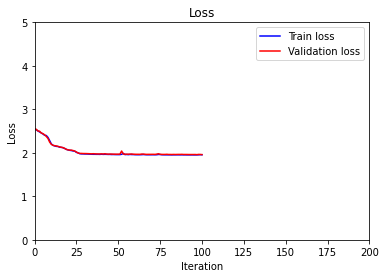

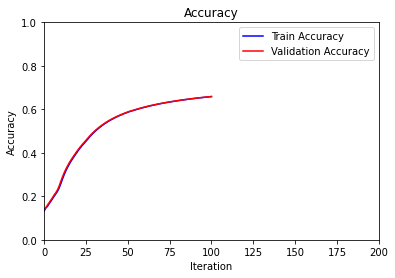

Iteration: 100, train loss: 1.9542, validation loss: 1.9595,train acc: 0.6585, validation acc: 0.6589
Step: 0 	Training Loss: 1.9263065 Training Acc: 0.65898246
Step: 1 	Training Loss: 1.9776046 Training Acc: 0.6589894
Step: 2 	Training Loss: 1.9714186 Training Acc: 0.6589964
Step: 3 	Training Loss: 1.9926331 Training Acc: 0.65900064
Step: 4 	Training Loss: 1.9119558 Training Acc: 0.6590148
Step: 5 	Training Loss: 1.9283992 Training Acc: 0.6590273
Step: 6 	Training Loss: 1.9004862 Training Acc: 0.6590433
Step: 7 	Training Loss: 1.9100685 Training Acc: 0.6590575
Step: 8 	Training Loss: 1.9416063 Training Acc: 0.6590681
Step: 9 	Training Loss: 1.9432764 Training Acc: 0.65907866
Step: 10 	Training Loss: 1.9273219 Training Acc: 0.65909106
Step: 11 	Training Loss: 1.9308664 Training Acc: 0.65910256
Step: 12 	Training Loss: 1.9446448 Training Acc: 0.6591131
Step: 13 	Training Loss: 1.9099398 Training Acc: 0.65912735
Step: 14 	Training Loss: 1.9265281 Training Acc: 0.6591397
Step: 15 	Trainin

Step: 51 	Training Loss: 1.9994388 Training Acc: 0.66023594
Step: 52 	Training Loss: 1.918356 Training Acc: 0.66024894
Step: 53 	Training Loss: 1.94244 Training Acc: 0.66025925
Step: 54 	Training Loss: 1.9599108 Training Acc: 0.6602668
Step: 55 	Training Loss: 1.9651881 Training Acc: 0.66027445
Step: 56 	Training Loss: 1.9734076 Training Acc: 0.6602811
Step: 57 	Training Loss: 1.8967619 Training Acc: 0.6602968
Step: 58 	Training Loss: 1.9999952 Training Acc: 0.6602999
Step: 59 	Training Loss: 1.9713314 Training Acc: 0.6603066
Step: 60 	Training Loss: 1.9835563 Training Acc: 0.6603115
Step: 61 	Training Loss: 1.9628438 Training Acc: 0.6603191
Step: 62 	Training Loss: 1.9950962 Training Acc: 0.6603231
Step: 63 	Training Loss: 1.9163624 Training Acc: 0.660336
Step: 64 	Training Loss: 1.9482435 Training Acc: 0.66034544
Step: 65 	Training Loss: 1.9335322 Training Acc: 0.6603575
Step: 66 	Training Loss: 2.0508978 Training Acc: 0.6603552
Step: 67 	Training Loss: 1.9869165 Training Acc: 0.6603

Step: 20 	Training Loss: 1.9884467 Training Acc: 0.66144043
Step: 21 	Training Loss: 1.9382755 Training Acc: 0.6614504
Step: 22 	Training Loss: 1.9841317 Training Acc: 0.6614569
Step: 23 	Training Loss: 1.9242005 Training Acc: 0.6614686
Step: 24 	Training Loss: 1.973068 Training Acc: 0.66147506
Step: 25 	Training Loss: 1.9379168 Training Acc: 0.66148597
Step: 26 	Training Loss: 1.9965866 Training Acc: 0.6614898
Step: 27 	Training Loss: 2.0127947 Training Acc: 0.6614918
Step: 28 	Training Loss: 2.0110483 Training Acc: 0.66149384
Step: 29 	Training Loss: 1.9899509 Training Acc: 0.66149765
Step: 30 	Training Loss: 1.9520234 Training Acc: 0.6615068
Step: 31 	Training Loss: 1.9830332 Training Acc: 0.6615115
Step: 32 	Training Loss: 1.9532688 Training Acc: 0.66152054
Step: 33 	Training Loss: 1.9916973 Training Acc: 0.66152436
Step: 34 	Training Loss: 1.9445597 Training Acc: 0.6615343
Step: 35 	Training Loss: 2.0168948 Training Acc: 0.6615355
Step: 36 	Training Loss: 1.9909585 Training Acc: 0

Step: 10 	Validation Loss: 1.9415045 Validation Acc: 0.66260916
Step: 11 	Validation Loss: 1.9326808 Validation Acc: 0.6626197
Step: 12 	Validation Loss: 1.9528449 Validation Acc: 0.6626277
Step: 13 	Validation Loss: 1.9613163 Validation Acc: 0.6626348
Step: 14 	Validation Loss: 1.9698014 Validation Acc: 0.66264105
Step: 15 	Validation Loss: 1.9532012 Validation Acc: 0.662649
Step: 16 	Validation Loss: 1.9756715 Validation Acc: 0.66265434


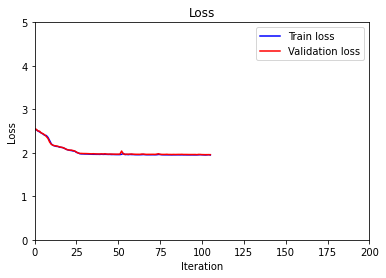

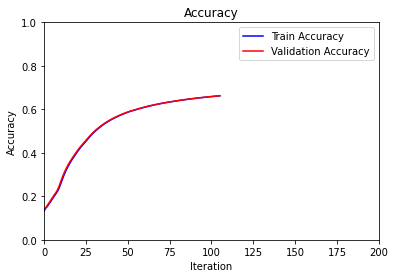

Iteration: 105, train loss: 1.9495, validation loss: 1.9576,train acc: 0.6622, validation acc: 0.6626
Step: 0 	Training Loss: 1.9213157 Training Acc: 0.6626666
Step: 1 	Training Loss: 1.9748664 Training Acc: 0.6626729
Step: 2 	Training Loss: 1.9550608 Training Acc: 0.6626808
Step: 3 	Training Loss: 2.0002398 Training Acc: 0.66268355
Step: 4 	Training Loss: 1.9105508 Training Acc: 0.6626967
Step: 5 	Training Loss: 1.9281137 Training Acc: 0.66270816
Step: 6 	Training Loss: 1.8943102 Training Acc: 0.662723
Step: 7 	Training Loss: 1.9016836 Training Acc: 0.6627379
Step: 8 	Training Loss: 1.9393853 Training Acc: 0.66274756
Step: 9 	Training Loss: 1.9403069 Training Acc: 0.6627572
Step: 10 	Training Loss: 1.9166536 Training Acc: 0.6627695
Step: 11 	Training Loss: 1.93023 Training Acc: 0.66278005
Step: 12 	Training Loss: 1.9409629 Training Acc: 0.6627897
Step: 13 	Training Loss: 1.9009823 Training Acc: 0.6628037
Step: 14 	Training Loss: 1.9246361 Training Acc: 0.6628151
Step: 15 	Training Los

Step: 54 	Training Loss: 1.9527965 Training Acc: 0.6638516
Step: 55 	Training Loss: 1.963723 Training Acc: 0.6638585
Step: 56 	Training Loss: 1.971788 Training Acc: 0.66386443
Step: 57 	Training Loss: 1.8938969 Training Acc: 0.663879
Step: 58 	Training Loss: 1.9990395 Training Acc: 0.66388154
Step: 59 	Training Loss: 1.9701142 Training Acc: 0.66388756
Step: 60 	Training Loss: 1.9766053 Training Acc: 0.6638927
Step: 61 	Training Loss: 1.9626414 Training Acc: 0.66389954
Step: 62 	Training Loss: 1.992943 Training Acc: 0.663903
Step: 63 	Training Loss: 1.9147508 Training Acc: 0.6639149
Step: 64 	Training Loss: 1.9474401 Training Acc: 0.6639235
Step: 65 	Training Loss: 1.9263805 Training Acc: 0.6639346
Step: 66 	Training Loss: 2.0496767 Training Acc: 0.663932
Step: 67 	Training Loss: 1.9847289 Training Acc: 0.66393715
Step: 0 	Validation Loss: 1.9413593 Validation Acc: 0.66394657
Step: 1 	Validation Loss: 1.9669454 Validation Acc: 0.66395336
Step: 2 	Validation Loss: 1.920584 Validation Acc

Step: 23 	Training Loss: 1.9209301 Training Acc: 0.66499186
Step: 24 	Training Loss: 1.9673886 Training Acc: 0.66499764
Step: 25 	Training Loss: 1.932146 Training Acc: 0.66500765
Step: 26 	Training Loss: 1.9832739 Training Acc: 0.66501176
Step: 27 	Training Loss: 1.9612539 Training Acc: 0.6650184
Step: 28 	Training Loss: 1.9840736 Training Acc: 0.66502243
Step: 29 	Training Loss: 1.9676151 Training Acc: 0.6650282
Step: 30 	Training Loss: 1.9475503 Training Acc: 0.66503656
Step: 31 	Training Loss: 1.9776278 Training Acc: 0.6650415
Step: 32 	Training Loss: 1.9313024 Training Acc: 0.66505146
Step: 33 	Training Loss: 1.9789672 Training Acc: 0.6650564
Step: 34 	Training Loss: 1.9374726 Training Acc: 0.6650655
Step: 35 	Training Loss: 1.9998982 Training Acc: 0.6650688
Step: 36 	Training Loss: 1.9798859 Training Acc: 0.6650737
Step: 37 	Training Loss: 1.899797 Training Acc: 0.66508704
Step: 38 	Training Loss: 1.9379091 Training Acc: 0.66509616
Step: 39 	Training Loss: 1.955663 Training Acc: 0

Step: 11 	Validation Loss: 1.9320467 Validation Acc: 0.666079
Step: 12 	Validation Loss: 1.9460182 Validation Acc: 0.6660871
Step: 13 	Validation Loss: 1.955881 Validation Acc: 0.6660943
Step: 14 	Validation Loss: 1.9692074 Validation Acc: 0.6660999
Step: 15 	Validation Loss: 1.9489101 Validation Acc: 0.66610795
Step: 16 	Validation Loss: 1.9789641 Validation Acc: 0.6661119


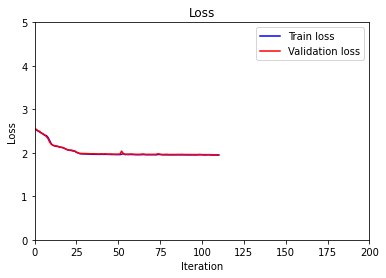

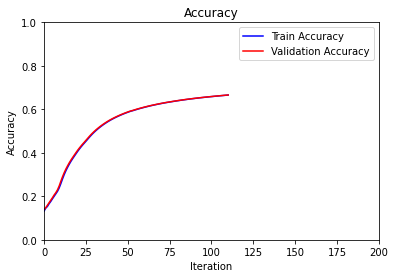

Iteration: 110, train loss: 1.9482, validation loss: 1.9551,train acc: 0.6657, validation acc: 0.6661
Step: 0 	Training Loss: 1.917666 Training Acc: 0.6661233
Step: 1 	Training Loss: 1.9713874 Training Acc: 0.6661288
Step: 2 	Training Loss: 1.9538908 Training Acc: 0.6661361
Step: 3 	Training Loss: 1.9999113 Training Acc: 0.66613835
Step: 4 	Training Loss: 1.9088421 Training Acc: 0.6661505
Step: 5 	Training Loss: 1.9255543 Training Acc: 0.66616106
Step: 6 	Training Loss: 1.8915915 Training Acc: 0.6661749
Step: 7 	Training Loss: 1.9014356 Training Acc: 0.6661887
Step: 8 	Training Loss: 1.9356592 Training Acc: 0.6661976
Step: 9 	Training Loss: 1.9425385 Training Acc: 0.6662065
Step: 10 	Training Loss: 1.914297 Training Acc: 0.66621786
Step: 11 	Training Loss: 1.9303691 Training Acc: 0.6662275
Step: 12 	Training Loss: 1.9391472 Training Acc: 0.6662364
Step: 13 	Training Loss: 1.899761 Training Acc: 0.6662494
Step: 14 	Training Loss: 1.9235029 Training Acc: 0.66625994
Step: 15 	Training Los

Step: 55 	Training Loss: 1.9620256 Training Acc: 0.6672198
Step: 56 	Training Loss: 1.9721851 Training Acc: 0.6672252
Step: 57 	Training Loss: 1.89271 Training Acc: 0.6672387
Step: 58 	Training Loss: 1.9982407 Training Acc: 0.66724086
Step: 59 	Training Loss: 1.9700181 Training Acc: 0.6672462
Step: 60 	Training Loss: 1.9771379 Training Acc: 0.66725075
Step: 61 	Training Loss: 1.9628661 Training Acc: 0.66725695
Step: 62 	Training Loss: 1.9992156 Training Acc: 0.6672591
Step: 63 	Training Loss: 1.9373497 Training Acc: 0.66726774
Step: 64 	Training Loss: 1.9510694 Training Acc: 0.66727555
Step: 65 	Training Loss: 1.9270501 Training Acc: 0.6672858
Step: 66 	Training Loss: 2.0509703 Training Acc: 0.667283
Step: 67 	Training Loss: 1.9870796 Training Acc: 0.66728675
Step: 0 	Validation Loss: 1.9562432 Validation Acc: 0.66729456
Step: 1 	Validation Loss: 1.9760783 Validation Acc: 0.6672999
Step: 2 	Validation Loss: 1.9261065 Validation Acc: 0.6673102
Step: 3 	Validation Loss: 2.022014 Validati

Step: 24 	Training Loss: 1.9679587 Training Acc: 0.6682225
Step: 25 	Training Loss: 1.9333522 Training Acc: 0.66823167
Step: 26 	Training Loss: 1.9836457 Training Acc: 0.6682353
Step: 27 	Training Loss: 1.9688215 Training Acc: 0.6682405
Step: 28 	Training Loss: 1.9843384 Training Acc: 0.66824406
Step: 29 	Training Loss: 1.9598348 Training Acc: 0.6682501
Step: 30 	Training Loss: 1.946194 Training Acc: 0.66825765
Step: 31 	Training Loss: 1.9768004 Training Acc: 0.66826206
Step: 32 	Training Loss: 1.9324491 Training Acc: 0.66827124
Step: 33 	Training Loss: 1.978415 Training Acc: 0.66827565
Step: 34 	Training Loss: 1.9376084 Training Acc: 0.66828406
Step: 35 	Training Loss: 1.9980677 Training Acc: 0.66828686
Step: 36 	Training Loss: 1.9871445 Training Acc: 0.66829044
Step: 37 	Training Loss: 1.9031234 Training Acc: 0.66830283
Step: 38 	Training Loss: 1.9412186 Training Acc: 0.6683104
Step: 39 	Training Loss: 1.9578432 Training Acc: 0.6683172
Step: 40 	Training Loss: 1.9929373 Training Acc:

Step: 9 	Validation Loss: 1.9713175 Validation Acc: 0.6691244
Step: 10 	Validation Loss: 1.9504936 Validation Acc: 0.6691318
Step: 11 	Validation Loss: 1.9339168 Validation Acc: 0.6691408
Step: 12 	Validation Loss: 1.9482656 Validation Acc: 0.6691482
Step: 13 	Validation Loss: 1.9643286 Validation Acc: 0.66915405
Step: 14 	Validation Loss: 1.9710138 Validation Acc: 0.6691591
Step: 15 	Validation Loss: 1.959425 Validation Acc: 0.6691649
Step: 16 	Validation Loss: 1.9908018 Validation Acc: 0.6691676


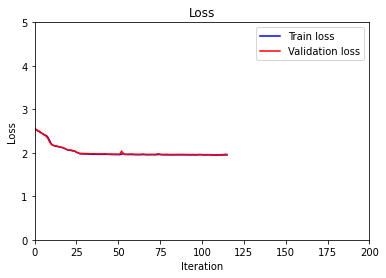

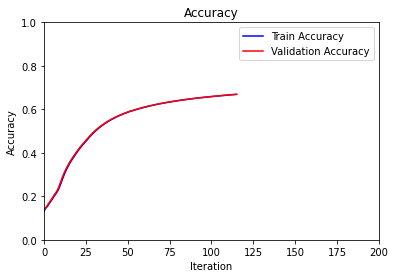

Iteration: 115, train loss: 1.9532, validation loss: 1.9597,train acc: 0.6689, validation acc: 0.6691
Step: 0 	Training Loss: 1.9294014 Training Acc: 0.66917735
Step: 1 	Training Loss: 1.9717827 Training Acc: 0.66918236
Step: 2 	Training Loss: 1.9670827 Training Acc: 0.669189
Step: 3 	Training Loss: 1.9991579 Training Acc: 0.6691908
Step: 4 	Training Loss: 1.9107491 Training Acc: 0.6692022
Step: 5 	Training Loss: 1.9282491 Training Acc: 0.669212
Step: 6 	Training Loss: 1.8953705 Training Acc: 0.6692249
Step: 7 	Training Loss: 1.8995488 Training Acc: 0.66923785
Step: 8 	Training Loss: 1.942261 Training Acc: 0.669246
Step: 9 	Training Loss: 1.9455628 Training Acc: 0.6692542
Step: 10 	Training Loss: 1.9181483 Training Acc: 0.6692648
Step: 11 	Training Loss: 1.9307613 Training Acc: 0.66927373
Step: 12 	Training Loss: 1.9467169 Training Acc: 0.6692811
Step: 13 	Training Loss: 1.8985357 Training Acc: 0.6692932
Step: 14 	Training Loss: 1.9299289 Training Acc: 0.669303
Step: 15 	Training Loss:

Step: 55 	Training Loss: 1.9637945 Training Acc: 0.67017597
Step: 56 	Training Loss: 1.9751862 Training Acc: 0.6701808
Step: 57 	Training Loss: 1.8999691 Training Acc: 0.6701927
Step: 58 	Training Loss: 2.0007873 Training Acc: 0.67019445
Step: 59 	Training Loss: 1.9701319 Training Acc: 0.6701993
Step: 60 	Training Loss: 1.9781357 Training Acc: 0.6702033
Step: 61 	Training Loss: 1.9621719 Training Acc: 0.670209
Step: 62 	Training Loss: 1.9932382 Training Acc: 0.6702115
Step: 63 	Training Loss: 1.9165928 Training Acc: 0.6702218
Step: 64 	Training Loss: 1.9517274 Training Acc: 0.6702282
Step: 65 	Training Loss: 1.9249833 Training Acc: 0.6702377
Step: 66 	Training Loss: 2.0505154 Training Acc: 0.6702348
Step: 67 	Training Loss: 1.9837422 Training Acc: 0.6702381
Step: 0 	Validation Loss: 1.9423534 Validation Acc: 0.670246
Step: 1 	Validation Loss: 1.9736674 Validation Acc: 0.6702509
Step: 2 	Validation Loss: 1.9211159 Validation Acc: 0.67026037
Step: 3 	Validation Loss: 2.020317 Validation 

Step: 22 	Training Loss: 1.8842331 Training Acc: 0.671445
Step: 23 	Training Loss: 1.8637649 Training Acc: 0.67146045
Step: 24 	Training Loss: 1.9102008 Training Acc: 0.6714713
Step: 25 	Training Loss: 1.92016 Training Acc: 0.6714813
Step: 26 	Training Loss: 1.9641906 Training Acc: 0.67148674
Step: 27 	Training Loss: 1.9325712 Training Acc: 0.67149526
Step: 28 	Training Loss: 1.9090326 Training Acc: 0.6715061
Step: 29 	Training Loss: 1.9476155 Training Acc: 0.6715131
Step: 30 	Training Loss: 1.9052991 Training Acc: 0.67152464
Step: 31 	Training Loss: 1.9256124 Training Acc: 0.67153394
Step: 32 	Training Loss: 1.8556731 Training Acc: 0.6715501
Step: 33 	Training Loss: 1.9212961 Training Acc: 0.67156017
Step: 34 	Training Loss: 1.8775475 Training Acc: 0.67157406
Step: 35 	Training Loss: 1.9440925 Training Acc: 0.67158175
Step: 36 	Training Loss: 1.8961945 Training Acc: 0.67159414
Step: 37 	Training Loss: 1.855679 Training Acc: 0.6716103
Step: 38 	Training Loss: 1.9230893 Training Acc: 0.

Step: 7 	Validation Loss: 1.9249778 Validation Acc: 0.6731074
Step: 8 	Validation Loss: 1.8810325 Validation Acc: 0.6731217
Step: 9 	Validation Loss: 1.8909304 Validation Acc: 0.6731345
Step: 10 	Validation Loss: 1.9054909 Validation Acc: 0.6731458
Step: 11 	Validation Loss: 1.8864179 Validation Acc: 0.67315936
Step: 12 	Validation Loss: 1.9038434 Validation Acc: 0.6731706
Step: 13 	Validation Loss: 1.9303392 Validation Acc: 0.6731796
Step: 14 	Validation Loss: 1.9233723 Validation Acc: 0.67318934
Step: 15 	Validation Loss: 1.9151096 Validation Acc: 0.6731991
Step: 16 	Validation Loss: 1.9545143 Validation Acc: 0.6732058


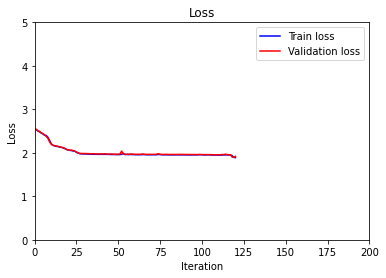

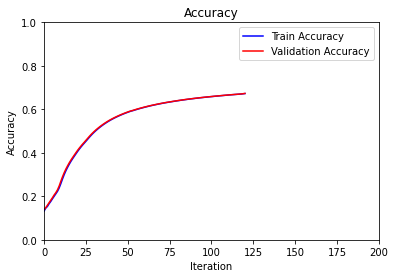

Iteration: 120, train loss: 1.8895, validation loss: 1.9182,train acc: 0.6726, validation acc: 0.6731
Step: 0 	Training Loss: 1.8529428 Training Acc: 0.6732224
Step: 1 	Training Loss: 1.8891101 Training Acc: 0.6732352
Step: 2 	Training Loss: 1.8983464 Training Acc: 0.6732472
Step: 3 	Training Loss: 1.9276145 Training Acc: 0.67325616
Step: 4 	Training Loss: 1.8254795 Training Acc: 0.67327505
Step: 5 	Training Loss: 1.8880281 Training Acc: 0.6732878
Step: 6 	Training Loss: 1.861578 Training Acc: 0.6733028
Step: 7 	Training Loss: 1.8788776 Training Acc: 0.67331713
Step: 8 	Training Loss: 1.8924646 Training Acc: 0.6733291
Step: 9 	Training Loss: 1.871262 Training Acc: 0.6733434
Step: 10 	Training Loss: 1.8605008 Training Acc: 0.67335844
Step: 11 	Training Loss: 1.8419867 Training Acc: 0.6733757
Step: 12 	Training Loss: 1.8790839 Training Acc: 0.67338926
Step: 13 	Training Loss: 1.8388524 Training Acc: 0.67340654
Step: 14 	Training Loss: 1.8605211 Training Acc: 0.67342234
Step: 15 	Training

Step: 51 	Training Loss: 1.8601286 Training Acc: 0.67497015
Step: 52 	Training Loss: 1.8622617 Training Acc: 0.6749849
Step: 53 	Training Loss: 1.9042318 Training Acc: 0.6749958
Step: 54 	Training Loss: 1.8689163 Training Acc: 0.6750097
Step: 55 	Training Loss: 1.9331611 Training Acc: 0.67501765
Step: 56 	Training Loss: 1.9167323 Training Acc: 0.67502713
Step: 57 	Training Loss: 1.8458769 Training Acc: 0.6750433
Step: 58 	Training Loss: 1.9151634 Training Acc: 0.67505276
Step: 59 	Training Loss: 1.8764694 Training Acc: 0.67506593
Step: 60 	Training Loss: 1.9149946 Training Acc: 0.67507535
Step: 61 	Training Loss: 1.9240893 Training Acc: 0.67508405
Step: 62 	Training Loss: 1.8922597 Training Acc: 0.6750957
Step: 63 	Training Loss: 1.8541946 Training Acc: 0.6751111
Step: 64 	Training Loss: 1.8854082 Training Acc: 0.6751235
Step: 65 	Training Loss: 1.8769051 Training Acc: 0.6751367
Step: 66 	Training Loss: 1.9394124 Training Acc: 0.6751439
Step: 67 	Training Loss: 1.9141066 Training Acc: 

Step: 21 	Training Loss: 1.8602805 Training Acc: 0.67670804
Step: 22 	Training Loss: 1.8714917 Training Acc: 0.6767217
Step: 23 	Training Loss: 1.861086 Training Acc: 0.676736
Step: 24 	Training Loss: 1.8913412 Training Acc: 0.6767474
Step: 25 	Training Loss: 1.8872757 Training Acc: 0.6767595
Step: 26 	Training Loss: 1.9162095 Training Acc: 0.6767686
Step: 27 	Training Loss: 1.8995202 Training Acc: 0.67677927
Step: 28 	Training Loss: 1.908996 Training Acc: 0.67678916
Step: 29 	Training Loss: 1.9282712 Training Acc: 0.67679757
Step: 30 	Training Loss: 1.9001582 Training Acc: 0.6768082
Step: 31 	Training Loss: 1.9138567 Training Acc: 0.6768173
Step: 32 	Training Loss: 1.8531318 Training Acc: 0.6768324
Step: 33 	Training Loss: 1.9167653 Training Acc: 0.6768415
Step: 34 	Training Loss: 1.8758026 Training Acc: 0.6768543
Step: 35 	Training Loss: 1.9096212 Training Acc: 0.6768642
Step: 36 	Training Loss: 1.892801 Training Acc: 0.67687553
Step: 37 	Training Loss: 1.8529656 Training Acc: 0.6768

Step: 8 	Validation Loss: 1.862741 Validation Acc: 0.6783808
Step: 9 	Validation Loss: 1.8652292 Validation Acc: 0.6783948
Step: 10 	Validation Loss: 1.885798 Validation Acc: 0.6784066
Step: 11 	Validation Loss: 1.8697577 Validation Acc: 0.6784198
Step: 12 	Validation Loss: 1.8685906 Validation Acc: 0.6784331
Step: 13 	Validation Loss: 1.9027727 Validation Acc: 0.67844343
Step: 14 	Validation Loss: 1.9072454 Validation Acc: 0.678453
Step: 15 	Validation Loss: 1.8904607 Validation Acc: 0.67846406
Step: 16 	Validation Loss: 1.9218688 Validation Acc: 0.6784722


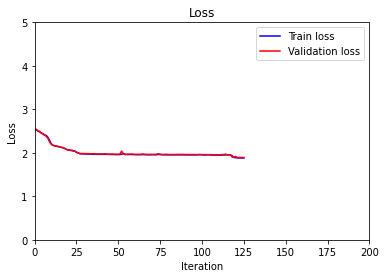

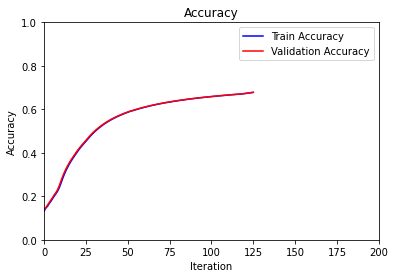

Iteration: 125, train loss: 1.8806, validation loss: 1.8936,train acc: 0.6779, validation acc: 0.6784
Step: 0 	Training Loss: 1.8244791 Training Acc: 0.67848986
Step: 1 	Training Loss: 1.879679 Training Acc: 0.6785024
Step: 2 	Training Loss: 1.8921657 Training Acc: 0.6785134
Step: 3 	Training Loss: 1.921978 Training Acc: 0.6785215
Step: 4 	Training Loss: 1.8228457 Training Acc: 0.67853916
Step: 5 	Training Loss: 1.877591 Training Acc: 0.6785516
Step: 6 	Training Loss: 1.8525177 Training Acc: 0.67856634
Step: 7 	Training Loss: 1.860848 Training Acc: 0.678581
Step: 8 	Training Loss: 1.8845887 Training Acc: 0.6785928
Step: 9 	Training Loss: 1.85475 Training Acc: 0.67860746
Step: 10 	Training Loss: 1.8523335 Training Acc: 0.6786221
Step: 11 	Training Loss: 1.8371385 Training Acc: 0.6786383
Step: 12 	Training Loss: 1.877363 Training Acc: 0.67865074
Step: 13 	Training Loss: 1.8296793 Training Acc: 0.6786676
Step: 14 	Training Loss: 1.8553691 Training Acc: 0.67868227
Step: 15 	Training Loss: 

Step: 54 	Training Loss: 1.8687067 Training Acc: 0.68017644
Step: 55 	Training Loss: 1.9125055 Training Acc: 0.68018574
Step: 56 	Training Loss: 1.9163152 Training Acc: 0.6801943
Step: 57 	Training Loss: 1.8369782 Training Acc: 0.6802101
Step: 58 	Training Loss: 1.9072663 Training Acc: 0.6802194
Step: 59 	Training Loss: 1.8752837 Training Acc: 0.68023163
Step: 60 	Training Loss: 1.9005849 Training Acc: 0.68024164
Step: 61 	Training Loss: 1.9229481 Training Acc: 0.6802495
Step: 62 	Training Loss: 1.893234 Training Acc: 0.68026024
Step: 63 	Training Loss: 1.8479824 Training Acc: 0.68027526
Step: 64 	Training Loss: 1.8859363 Training Acc: 0.68028677
Step: 65 	Training Loss: 1.8818519 Training Acc: 0.6802989
Step: 66 	Training Loss: 1.9404612 Training Acc: 0.68030536
Step: 67 	Training Loss: 1.905082 Training Acc: 0.6803154
Step: 0 	Validation Loss: 1.8739479 Validation Acc: 0.68032753
Step: 1 	Validation Loss: 1.9228612 Validation Acc: 0.68033606
Step: 2 	Validation Loss: 1.8675809 Valida

Step: 21 	Training Loss: 1.8597672 Training Acc: 0.6817396
Step: 22 	Training Loss: 1.8725117 Training Acc: 0.68175226
Step: 23 	Training Loss: 1.8624711 Training Acc: 0.68176556
Step: 24 	Training Loss: 1.9074502 Training Acc: 0.6817746
Step: 25 	Training Loss: 1.8901634 Training Acc: 0.6817858
Step: 26 	Training Loss: 1.9182737 Training Acc: 0.68179417
Step: 27 	Training Loss: 1.9012045 Training Acc: 0.6818039
Step: 28 	Training Loss: 1.9082285 Training Acc: 0.68181294
Step: 29 	Training Loss: 1.9303219 Training Acc: 0.68181986
Step: 30 	Training Loss: 1.9054544 Training Acc: 0.6818289
Step: 31 	Training Loss: 1.9154059 Training Acc: 0.68183726
Step: 32 	Training Loss: 1.854037 Training Acc: 0.68185127
Step: 33 	Training Loss: 1.9108726 Training Acc: 0.68186027
Step: 34 	Training Loss: 1.8758857 Training Acc: 0.6818721
Step: 35 	Training Loss: 1.9140539 Training Acc: 0.6818812
Step: 36 	Training Loss: 1.8865265 Training Acc: 0.68189234
Step: 37 	Training Loss: 1.8503196 Training Acc:

Step: 9 	Validation Loss: 1.8666828 Validation Acc: 0.68338174
Step: 10 	Validation Loss: 1.8841866 Validation Acc: 0.68339264
Step: 11 	Validation Loss: 1.8680015 Validation Acc: 0.6834049
Step: 12 	Validation Loss: 1.8592715 Validation Acc: 0.6834179
Step: 13 	Validation Loss: 1.8950162 Validation Acc: 0.6834281
Step: 14 	Validation Loss: 1.89956 Validation Acc: 0.6834376
Step: 15 	Validation Loss: 1.8831072 Validation Acc: 0.6834485
Step: 16 	Validation Loss: 1.9074237 Validation Acc: 0.6834573


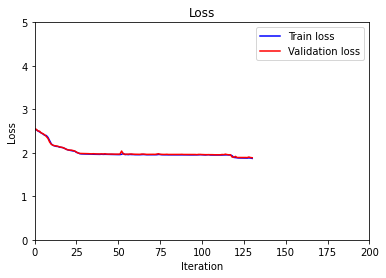

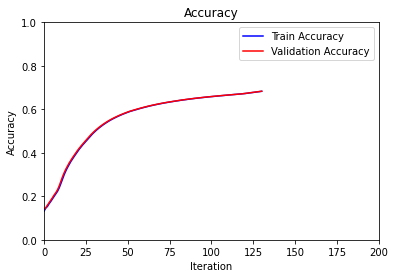

Iteration: 130, train loss: 1.8716, validation loss: 1.8875,train acc: 0.6829, validation acc: 0.6834
Step: 0 	Training Loss: 1.823997 Training Acc: 0.68347377
Step: 1 	Training Loss: 1.8776116 Training Acc: 0.6834854
Step: 2 	Training Loss: 1.8926635 Training Acc: 0.6834955
Step: 3 	Training Loss: 1.914974 Training Acc: 0.6835036
Step: 4 	Training Loss: 1.8147786 Training Acc: 0.6835208
Step: 5 	Training Loss: 1.8627639 Training Acc: 0.6835338
Step: 6 	Training Loss: 1.8532171 Training Acc: 0.6835475
Step: 7 	Training Loss: 1.8639536 Training Acc: 0.68356043
Step: 8 	Training Loss: 1.8871603 Training Acc: 0.68357134
Step: 9 	Training Loss: 1.8394393 Training Acc: 0.6835864
Step: 10 	Training Loss: 1.8375236 Training Acc: 0.68360144
Step: 11 	Training Loss: 1.82301 Training Acc: 0.68361795
Step: 12 	Training Loss: 1.863739 Training Acc: 0.6836309
Step: 13 	Training Loss: 1.8297372 Training Acc: 0.6836467
Step: 14 	Training Loss: 1.8480538 Training Acc: 0.68366104
Step: 15 	Training Los

Step: 52 	Training Loss: 1.8628452 Training Acc: 0.68509245
Step: 53 	Training Loss: 1.9157848 Training Acc: 0.68510026
Step: 54 	Training Loss: 1.8693147 Training Acc: 0.68511224
Step: 55 	Training Loss: 1.9317925 Training Acc: 0.6851187
Step: 56 	Training Loss: 1.9198871 Training Acc: 0.68512654
Step: 57 	Training Loss: 1.8329318 Training Acc: 0.685142
Step: 58 	Training Loss: 1.9153905 Training Acc: 0.6851498
Step: 59 	Training Loss: 1.8692732 Training Acc: 0.68516177
Step: 60 	Training Loss: 1.900717 Training Acc: 0.685171
Step: 61 	Training Loss: 1.9150443 Training Acc: 0.6851788
Step: 62 	Training Loss: 1.8767972 Training Acc: 0.6851901
Step: 63 	Training Loss: 1.8464926 Training Acc: 0.68520415
Step: 64 	Training Loss: 1.885954 Training Acc: 0.68521476
Step: 65 	Training Loss: 1.8778627 Training Acc: 0.685226
Step: 66 	Training Loss: 1.9287744 Training Acc: 0.6852332
Step: 67 	Training Loss: 1.9043356 Training Acc: 0.68524235
Step: 0 	Validation Loss: 1.8921168 Validation Acc: 0

Step: 20 	Training Loss: 1.862506 Training Acc: 0.6866312
Step: 21 	Training Loss: 1.8689065 Training Acc: 0.6866429
Step: 22 	Training Loss: 1.855876 Training Acc: 0.686656
Step: 23 	Training Loss: 1.8541197 Training Acc: 0.68666905
Step: 24 	Training Loss: 1.8777428 Training Acc: 0.6866801
Step: 25 	Training Loss: 1.8913478 Training Acc: 0.6866904
Step: 26 	Training Loss: 1.9082437 Training Acc: 0.6866987
Step: 27 	Training Loss: 1.853822 Training Acc: 0.6867118
Step: 28 	Training Loss: 1.8916805 Training Acc: 0.68672144
Step: 29 	Training Loss: 1.9156439 Training Acc: 0.686729
Step: 30 	Training Loss: 1.8800557 Training Acc: 0.68674004
Step: 31 	Training Loss: 1.9071823 Training Acc: 0.6867483
Step: 32 	Training Loss: 1.8534145 Training Acc: 0.6867614
Step: 33 	Training Loss: 1.9119445 Training Acc: 0.68676895
Step: 34 	Training Loss: 1.8768487 Training Acc: 0.68678
Step: 35 	Training Loss: 1.9037502 Training Acc: 0.6867889
Step: 36 	Training Loss: 1.8993123 Training Acc: 0.6867985


Step: 8 	Validation Loss: 1.8629675 Validation Acc: 0.6881837
Step: 9 	Validation Loss: 1.8646077 Validation Acc: 0.6881958
Step: 10 	Validation Loss: 1.8797284 Validation Acc: 0.6882066
Step: 11 	Validation Loss: 1.8618832 Validation Acc: 0.6882187
Step: 12 	Validation Loss: 1.8535151 Validation Acc: 0.68823147
Step: 13 	Validation Loss: 1.8942533 Validation Acc: 0.6882409
Step: 14 	Validation Loss: 1.8993722 Validation Acc: 0.6882496
Step: 15 	Validation Loss: 1.8843904 Validation Acc: 0.68825966
Step: 16 	Validation Loss: 1.9072151 Validation Acc: 0.6882677


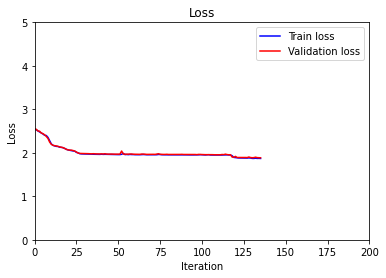

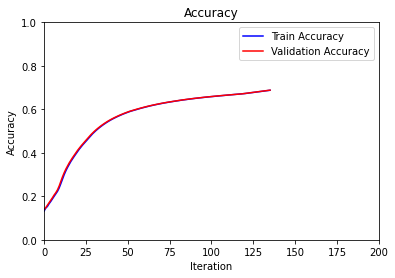

Iteration: 135, train loss: 1.8704, validation loss: 1.8861,train acc: 0.6877, validation acc: 0.6882
Step: 0 	Training Loss: 1.8234252 Training Acc: 0.6882832
Step: 1 	Training Loss: 1.8702438 Training Acc: 0.68829465
Step: 2 	Training Loss: 1.8922032 Training Acc: 0.688304
Step: 3 	Training Loss: 1.9149094 Training Acc: 0.6883114
Step: 4 	Training Loss: 1.8150332 Training Acc: 0.68832755
Step: 5 	Training Loss: 1.8619883 Training Acc: 0.6883396
Step: 6 	Training Loss: 1.8522488 Training Acc: 0.68835235
Step: 7 	Training Loss: 1.8575522 Training Acc: 0.6883651
Step: 8 	Training Loss: 1.8842463 Training Acc: 0.6883752
Step: 9 	Training Loss: 1.8367909 Training Acc: 0.68838996
Step: 10 	Training Loss: 1.8376807 Training Acc: 0.6884041
Step: 11 	Training Loss: 1.8226217 Training Acc: 0.6884195
Step: 12 	Training Loss: 1.8615861 Training Acc: 0.68843156
Step: 13 	Training Loss: 1.8297269 Training Acc: 0.68844634
Step: 14 	Training Loss: 1.8476202 Training Acc: 0.68845975
Step: 15 	Trainin

Step: 52 	Training Loss: 1.845291 Training Acc: 0.6898114
Step: 53 	Training Loss: 1.8927137 Training Acc: 0.6898206
Step: 54 	Training Loss: 1.8608835 Training Acc: 0.6898324
Step: 55 	Training Loss: 1.9036267 Training Acc: 0.68984085
Step: 56 	Training Loss: 1.9161137 Training Acc: 0.689848
Step: 57 	Training Loss: 1.8232834 Training Acc: 0.6898632
Step: 58 	Training Loss: 1.899248 Training Acc: 0.68987167
Step: 59 	Training Loss: 1.86993 Training Acc: 0.6898828
Step: 60 	Training Loss: 1.9008918 Training Acc: 0.6898913
Step: 61 	Training Loss: 1.9152412 Training Acc: 0.68989843
Step: 62 	Training Loss: 1.8774071 Training Acc: 0.68990886
Step: 63 	Training Loss: 1.8323052 Training Acc: 0.68992335
Step: 64 	Training Loss: 1.8858087 Training Acc: 0.6899331
Step: 65 	Training Loss: 1.8694855 Training Acc: 0.68994427
Step: 66 	Training Loss: 1.9237428 Training Acc: 0.68995076
Step: 67 	Training Loss: 1.90569 Training Acc: 0.6899585
Step: 0 	Validation Loss: 1.8668723 Validation Acc: 0.68

Step: 20 	Training Loss: 1.8609943 Training Acc: 0.69127756
Step: 21 	Training Loss: 1.8604293 Training Acc: 0.6912891
Step: 22 	Training Loss: 1.855802 Training Acc: 0.69130135
Step: 23 	Training Loss: 1.8526969 Training Acc: 0.6913135
Step: 24 	Training Loss: 1.8751101 Training Acc: 0.69132376
Step: 25 	Training Loss: 1.8859242 Training Acc: 0.69133335
Step: 26 	Training Loss: 1.9077543 Training Acc: 0.6913409
Step: 27 	Training Loss: 1.8534125 Training Acc: 0.69135314
Step: 28 	Training Loss: 1.8915648 Training Acc: 0.6913621
Step: 29 	Training Loss: 1.9104849 Training Acc: 0.69136965
Step: 30 	Training Loss: 1.8772755 Training Acc: 0.69137985
Step: 31 	Training Loss: 1.9068172 Training Acc: 0.6913875
Step: 32 	Training Loss: 1.8535274 Training Acc: 0.69139963
Step: 33 	Training Loss: 1.9152894 Training Acc: 0.6914066
Step: 34 	Training Loss: 1.8756317 Training Acc: 0.6914168
Step: 35 	Training Loss: 1.9023275 Training Acc: 0.691425
Step: 36 	Training Loss: 1.8851955 Training Acc: 0

Step: 7 	Validation Loss: 1.9071269 Validation Acc: 0.69271874
Step: 8 	Validation Loss: 1.862445 Validation Acc: 0.69273007
Step: 9 	Validation Loss: 1.86392 Validation Acc: 0.6927414
Step: 10 	Validation Loss: 1.8809078 Validation Acc: 0.69275135
Step: 11 	Validation Loss: 1.8623121 Validation Acc: 0.6927627
Step: 12 	Validation Loss: 1.8538443 Validation Acc: 0.69277465
Step: 13 	Validation Loss: 1.8934622 Validation Acc: 0.6927833
Step: 14 	Validation Loss: 1.8995512 Validation Acc: 0.69279134
Step: 15 	Validation Loss: 1.8833253 Validation Acc: 0.6928007
Step: 16 	Validation Loss: 1.907472 Validation Acc: 0.6928081


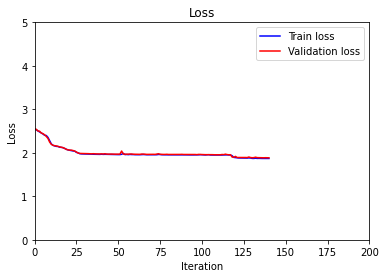

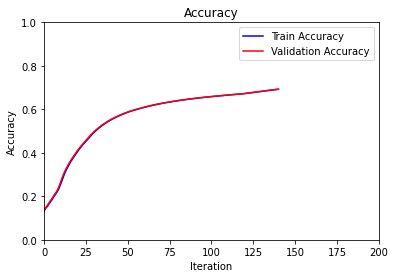

Iteration: 140, train loss: 1.8701, validation loss: 1.8858,train acc: 0.6923, validation acc: 0.6927
Step: 0 	Training Loss: 1.8228846 Training Acc: 0.69282264
Step: 1 	Training Loss: 1.8707598 Training Acc: 0.69283324
Step: 2 	Training Loss: 1.8925073 Training Acc: 0.69284195
Step: 3 	Training Loss: 1.9144375 Training Acc: 0.6928487
Step: 4 	Training Loss: 1.8147718 Training Acc: 0.6928638
Step: 5 	Training Loss: 1.8617862 Training Acc: 0.69287515
Step: 6 	Training Loss: 1.8526642 Training Acc: 0.69288707
Step: 7 	Training Loss: 1.8564247 Training Acc: 0.692899
Step: 8 	Training Loss: 1.8840083 Training Acc: 0.6929083
Step: 9 	Training Loss: 1.8326616 Training Acc: 0.6929222
Step: 10 	Training Loss: 1.8379799 Training Acc: 0.6929354
Step: 11 	Training Loss: 1.8224947 Training Acc: 0.69294995
Step: 12 	Training Loss: 1.8617976 Training Acc: 0.6929612
Step: 13 	Training Loss: 1.8293979 Training Acc: 0.69297504
Step: 14 	Training Loss: 1.8466926 Training Acc: 0.6929876
Step: 15 	Trainin

Step: 52 	Training Loss: 1.8690764 Training Acc: 0.6942408
Step: 53 	Training Loss: 1.9192741 Training Acc: 0.6942473
Step: 54 	Training Loss: 1.8666706 Training Acc: 0.69425774
Step: 55 	Training Loss: 1.901629 Training Acc: 0.69426554
Step: 56 	Training Loss: 1.9157641 Training Acc: 0.6942721
Step: 57 	Training Loss: 1.8224577 Training Acc: 0.69428635
Step: 58 	Training Loss: 1.912187 Training Acc: 0.69429284
Step: 59 	Training Loss: 1.8827854 Training Acc: 0.69430196
Step: 60 	Training Loss: 1.9022633 Training Acc: 0.6943098
Step: 61 	Training Loss: 1.9146552 Training Acc: 0.69431627
Step: 62 	Training Loss: 1.8766444 Training Acc: 0.69432604
Step: 63 	Training Loss: 1.8414862 Training Acc: 0.6943384
Step: 64 	Training Loss: 1.8886385 Training Acc: 0.69434744
Step: 65 	Training Loss: 1.8760619 Training Acc: 0.6943578
Step: 66 	Training Loss: 1.9242613 Training Acc: 0.6943637
Step: 67 	Training Loss: 1.9103947 Training Acc: 0.69437087
Step: 0 	Validation Loss: 1.87304 Validation Acc:

Step: 22 	Training Loss: 1.8543112 Training Acc: 0.69561386
Step: 23 	Training Loss: 1.8527213 Training Acc: 0.6956253
Step: 24 	Training Loss: 1.8762116 Training Acc: 0.6956348
Step: 25 	Training Loss: 1.8858616 Training Acc: 0.6956437
Step: 26 	Training Loss: 1.9072278 Training Acc: 0.6956507
Step: 27 	Training Loss: 1.859932 Training Acc: 0.6956615
Step: 28 	Training Loss: 1.8913839 Training Acc: 0.6956697
Step: 29 	Training Loss: 1.912714 Training Acc: 0.6956761
Step: 30 	Training Loss: 1.8762486 Training Acc: 0.69568557
Step: 31 	Training Loss: 1.907244 Training Acc: 0.69569254
Step: 32 	Training Loss: 1.8535194 Training Acc: 0.695704
Step: 33 	Training Loss: 1.9084442 Training Acc: 0.69571096
Step: 34 	Training Loss: 1.875744 Training Acc: 0.6957205
Step: 35 	Training Loss: 1.9078429 Training Acc: 0.69572806
Step: 36 	Training Loss: 1.8846114 Training Acc: 0.69573694
Step: 37 	Training Loss: 1.8454688 Training Acc: 0.695749
Step: 38 	Training Loss: 1.8840556 Training Acc: 0.69575

Step: 9 	Validation Loss: 1.8642666 Validation Acc: 0.69693637
Step: 10 	Validation Loss: 1.8828194 Validation Acc: 0.696945
Step: 11 	Validation Loss: 1.8633159 Validation Acc: 0.6969556
Step: 12 	Validation Loss: 1.8562396 Validation Acc: 0.6969668
Step: 13 	Validation Loss: 1.8933276 Validation Acc: 0.6969749
Step: 14 	Validation Loss: 1.90007 Validation Acc: 0.69698226
Step: 15 	Validation Loss: 1.8904939 Validation Acc: 0.6969903
Step: 16 	Validation Loss: 1.9171964 Validation Acc: 0.6969965


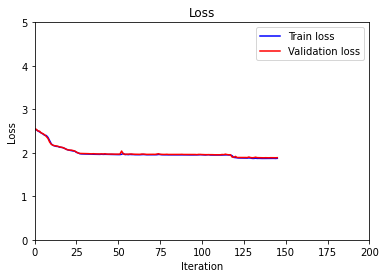

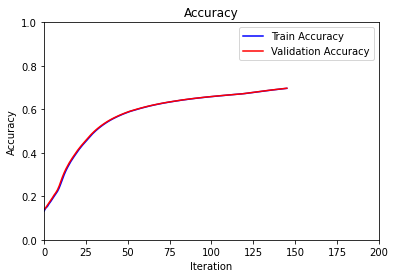

Iteration: 145, train loss: 1.8735, validation loss: 1.8883,train acc: 0.6965, validation acc: 0.6969
Step: 0 	Training Loss: 1.8320284 Training Acc: 0.69700956
Step: 1 	Training Loss: 1.8700807 Training Acc: 0.6970195
Step: 2 	Training Loss: 1.8925217 Training Acc: 0.69702756
Step: 3 	Training Loss: 1.9140805 Training Acc: 0.6970337
Step: 4 	Training Loss: 1.8139853 Training Acc: 0.69704807
Step: 5 	Training Loss: 1.862753 Training Acc: 0.6970586
Step: 6 	Training Loss: 1.8540108 Training Acc: 0.69706976
Step: 7 	Training Loss: 1.8623465 Training Acc: 0.69708097
Step: 8 	Training Loss: 1.8870819 Training Acc: 0.6970896
Step: 9 	Training Loss: 1.8566203 Training Acc: 0.6971008
Step: 10 	Training Loss: 1.8378541 Training Acc: 0.6971133
Step: 11 	Training Loss: 1.8228111 Training Acc: 0.6971269
Step: 12 	Training Loss: 1.8613204 Training Acc: 0.6971375
Step: 13 	Training Loss: 1.8303216 Training Acc: 0.6971505
Step: 14 	Training Loss: 1.8464029 Training Acc: 0.69716233
Step: 15 	Training

Step: 52 	Training Loss: 1.8470447 Training Acc: 0.6983334
Step: 53 	Training Loss: 1.8935843 Training Acc: 0.69834125
Step: 54 	Training Loss: 1.8604667 Training Acc: 0.6983516
Step: 55 	Training Loss: 1.9014187 Training Acc: 0.69835883
Step: 56 	Training Loss: 1.9156349 Training Acc: 0.6983648
Step: 57 	Training Loss: 1.8243419 Training Acc: 0.69837826
Step: 58 	Training Loss: 1.8991845 Training Acc: 0.6983855
Step: 59 	Training Loss: 1.8694587 Training Acc: 0.6983952
Step: 60 	Training Loss: 1.8994888 Training Acc: 0.6984024
Step: 61 	Training Loss: 1.9138231 Training Acc: 0.69840837
Step: 62 	Training Loss: 1.8766747 Training Acc: 0.6984175
Step: 63 	Training Loss: 1.8305095 Training Acc: 0.6984303
Step: 64 	Training Loss: 1.8847566 Training Acc: 0.69843876
Step: 65 	Training Loss: 1.8705146 Training Acc: 0.6984484
Step: 66 	Training Loss: 1.9231943 Training Acc: 0.6984538
Step: 67 	Training Loss: 1.9036871 Training Acc: 0.698461
Step: 0 	Validation Loss: 1.8661783 Validation Acc: 

Step: 20 	Training Loss: 1.8614295 Training Acc: 0.69961965
Step: 21 	Training Loss: 1.860466 Training Acc: 0.6996298
Step: 22 	Training Loss: 1.8533623 Training Acc: 0.6996405
Step: 23 	Training Loss: 1.8523176 Training Acc: 0.6996513
Step: 24 	Training Loss: 1.8756412 Training Acc: 0.6996602
Step: 25 	Training Loss: 1.8848963 Training Acc: 0.69966847
Step: 26 	Training Loss: 1.9067986 Training Acc: 0.69967484
Step: 27 	Training Loss: 1.8718674 Training Acc: 0.6996838
Step: 28 	Training Loss: 1.8910329 Training Acc: 0.6996914
Step: 29 	Training Loss: 1.9092875 Training Acc: 0.69969785
Step: 30 	Training Loss: 1.885577 Training Acc: 0.69970614
Step: 31 	Training Loss: 1.9290285 Training Acc: 0.69971067
Step: 32 	Training Loss: 1.8610557 Training Acc: 0.6997214
Step: 33 	Training Loss: 1.9098167 Training Acc: 0.69972783
Step: 34 	Training Loss: 1.8757901 Training Acc: 0.6997367
Step: 35 	Training Loss: 1.9022932 Training Acc: 0.69974375
Step: 36 	Training Loss: 1.8925997 Training Acc: 0

Step: 4 	Validation Loss: 1.8461382 Validation Acc: 0.70085
Step: 5 	Validation Loss: 1.9017079 Validation Acc: 0.7008569
Step: 6 	Validation Loss: 1.929791 Validation Acc: 0.70086133
Step: 7 	Validation Loss: 1.9071854 Validation Acc: 0.7008676
Step: 8 	Validation Loss: 1.861737 Validation Acc: 0.70087755
Step: 9 	Validation Loss: 1.867682 Validation Acc: 0.70088744
Step: 10 	Validation Loss: 1.8768755 Validation Acc: 0.70089614
Step: 11 	Validation Loss: 1.8617907 Validation Acc: 0.7009061
Step: 12 	Validation Loss: 1.8584096 Validation Acc: 0.700916
Step: 13 	Validation Loss: 1.8940439 Validation Acc: 0.70092344
Step: 14 	Validation Loss: 1.9000387 Validation Acc: 0.70093036
Step: 15 	Validation Loss: 1.8912976 Validation Acc: 0.7009378
Step: 16 	Validation Loss: 1.9059986 Validation Acc: 0.70094407


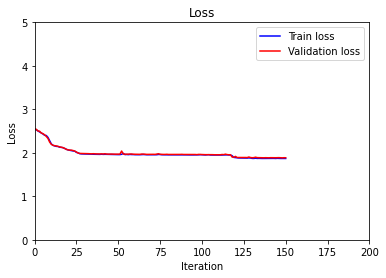

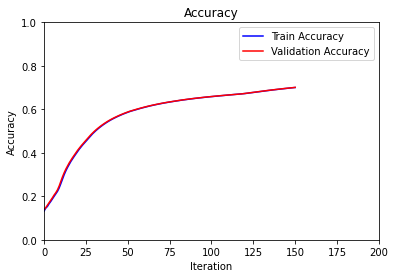

Iteration: 150, train loss: 1.8703, validation loss: 1.8868,train acc: 0.7005, validation acc: 0.7009
Step: 0 	Training Loss: 1.8237286 Training Acc: 0.700957
Step: 1 	Training Loss: 1.8716948 Training Acc: 0.7009663
Step: 2 	Training Loss: 1.893136 Training Acc: 0.7009738
Step: 3 	Training Loss: 1.9135057 Training Acc: 0.7009794
Step: 4 	Training Loss: 1.8179138 Training Acc: 0.700993
Step: 5 	Training Loss: 1.861527 Training Acc: 0.7010029
Step: 6 	Training Loss: 1.852773 Training Acc: 0.7010134
Step: 7 	Training Loss: 1.8557811 Training Acc: 0.7010239
Step: 8 	Training Loss: 1.8838243 Training Acc: 0.701032
Step: 9 	Training Loss: 1.8333354 Training Acc: 0.7010443
Step: 10 	Training Loss: 1.8374352 Training Acc: 0.701056
Step: 11 	Training Loss: 1.8226353 Training Acc: 0.70106894
Step: 12 	Training Loss: 1.8609393 Training Acc: 0.70107883
Step: 13 	Training Loss: 1.8290706 Training Acc: 0.7010912
Step: 14 	Training Loss: 1.8460187 Training Acc: 0.70110226
Step: 15 	Training Loss: 1.

Step: 53 	Training Loss: 1.8928461 Training Acc: 0.7022109
Step: 54 	Training Loss: 1.8602145 Training Acc: 0.7022206
Step: 55 	Training Loss: 1.9020264 Training Acc: 0.7022273
Step: 56 	Training Loss: 1.9157906 Training Acc: 0.7022328
Step: 57 	Training Loss: 1.8237164 Training Acc: 0.70224553
Step: 58 	Training Loss: 1.8986242 Training Acc: 0.7022522
Step: 59 	Training Loss: 1.8691332 Training Acc: 0.70226127
Step: 60 	Training Loss: 1.8985043 Training Acc: 0.702268
Step: 61 	Training Loss: 1.9143943 Training Acc: 0.7022735
Step: 62 	Training Loss: 1.876463 Training Acc: 0.70228195
Step: 63 	Training Loss: 1.8314569 Training Acc: 0.70229405
Step: 64 	Training Loss: 1.884633 Training Acc: 0.7023019
Step: 65 	Training Loss: 1.8698719 Training Acc: 0.70231104
Step: 66 	Training Loss: 1.9223621 Training Acc: 0.7023159
Step: 67 	Training Loss: 1.9036049 Training Acc: 0.7023226
Step: 0 	Validation Loss: 1.8635104 Validation Acc: 0.70233226
Step: 1 	Validation Loss: 1.9127262 Validation Acc

Step: 20 	Training Loss: 1.8620095 Training Acc: 0.70339614
Step: 21 	Training Loss: 1.8598019 Training Acc: 0.7034056
Step: 22 	Training Loss: 1.8541462 Training Acc: 0.70341575
Step: 23 	Training Loss: 1.8606454 Training Acc: 0.7034252
Step: 24 	Training Loss: 1.8767514 Training Acc: 0.7034336
Step: 25 	Training Loss: 1.8931587 Training Acc: 0.70344126
Step: 26 	Training Loss: 1.9071212 Training Acc: 0.7034472
Step: 27 	Training Loss: 1.8524997 Training Acc: 0.7034573
Step: 28 	Training Loss: 1.8915186 Training Acc: 0.70346445
Step: 29 	Training Loss: 1.9100666 Training Acc: 0.70347035
Step: 30 	Training Loss: 1.877604 Training Acc: 0.7034787
Step: 31 	Training Loss: 1.9070681 Training Acc: 0.7034846
Step: 32 	Training Loss: 1.8572936 Training Acc: 0.70349413
Step: 33 	Training Loss: 1.9089494 Training Acc: 0.70350003
Step: 34 	Training Loss: 1.8765032 Training Acc: 0.7035083
Step: 35 	Training Loss: 1.9157847 Training Acc: 0.7035137
Step: 36 	Training Loss: 1.9003181 Training Acc: 0

Step: 9 	Validation Loss: 1.8655496 Validation Acc: 0.7045846
Step: 10 	Validation Loss: 1.881394 Validation Acc: 0.7045921
Step: 11 	Validation Loss: 1.8614864 Validation Acc: 0.70460147
Step: 12 	Validation Loss: 1.8569412 Validation Acc: 0.70461136
Step: 13 	Validation Loss: 1.8939767 Validation Acc: 0.70461833
Step: 14 	Validation Loss: 1.8994073 Validation Acc: 0.7046247
Step: 15 	Validation Loss: 1.8829159 Validation Acc: 0.7046322
Step: 16 	Validation Loss: 1.9065592 Validation Acc: 0.704638


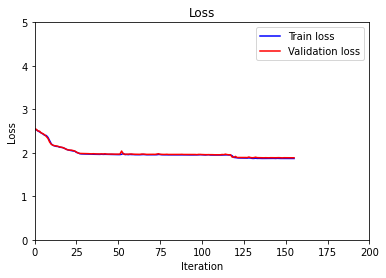

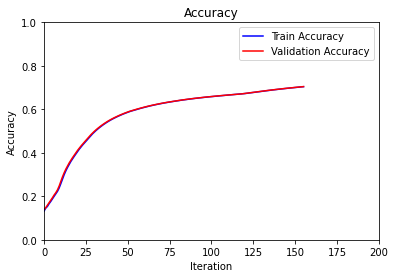

Iteration: 155, train loss: 1.8696, validation loss: 1.8865,train acc: 0.7042, validation acc: 0.7046
Step: 0 	Training Loss: 1.8238242 Training Acc: 0.7046503
Step: 1 	Training Loss: 1.8705957 Training Acc: 0.704659
Step: 2 	Training Loss: 1.892367 Training Acc: 0.70466596
Step: 3 	Training Loss: 1.9146649 Training Acc: 0.70467114
Step: 4 	Training Loss: 1.8139327 Training Acc: 0.70468396
Step: 5 	Training Loss: 1.8609118 Training Acc: 0.70469326
Step: 6 	Training Loss: 1.8525715 Training Acc: 0.70470315
Step: 7 	Training Loss: 1.8569218 Training Acc: 0.70471305
Step: 8 	Training Loss: 1.8836993 Training Acc: 0.7047206
Step: 9 	Training Loss: 1.8356385 Training Acc: 0.70473164
Step: 10 	Training Loss: 1.8372328 Training Acc: 0.7047427
Step: 11 	Training Loss: 1.8224461 Training Acc: 0.70475495
Step: 12 	Training Loss: 1.8617339 Training Acc: 0.70476425
Step: 13 	Training Loss: 1.8295599 Training Acc: 0.7047759
Step: 14 	Training Loss: 1.8472071 Training Acc: 0.70478636
Step: 15 	Train

Step: 52 	Training Loss: 1.8450211 Training Acc: 0.70582306
Step: 53 	Training Loss: 1.8926919 Training Acc: 0.70582986
Step: 54 	Training Loss: 1.8600698 Training Acc: 0.705839
Step: 55 	Training Loss: 1.8999398 Training Acc: 0.7058452
Step: 56 	Training Loss: 1.9156038 Training Acc: 0.70585024
Step: 57 	Training Loss: 1.82253 Training Acc: 0.7058623
Step: 58 	Training Loss: 1.8990331 Training Acc: 0.7058685
Step: 59 	Training Loss: 1.8687823 Training Acc: 0.705877
Step: 60 	Training Loss: 1.8986115 Training Acc: 0.7058832
Step: 61 	Training Loss: 1.9143162 Training Acc: 0.7058883
Step: 62 	Training Loss: 1.8764701 Training Acc: 0.7058962
Step: 63 	Training Loss: 1.8309027 Training Acc: 0.70590764
Step: 64 	Training Loss: 1.8839357 Training Acc: 0.70591503
Step: 65 	Training Loss: 1.8657634 Training Acc: 0.70592356
Step: 66 	Training Loss: 1.9230855 Training Acc: 0.70592797
Step: 67 	Training Loss: 1.904382 Training Acc: 0.70593417
Step: 0 	Validation Loss: 1.8639982 Validation Acc: 0

Step: 21 	Training Loss: 1.8600106 Training Acc: 0.7069634
Step: 22 	Training Loss: 1.8540785 Training Acc: 0.70697296
Step: 23 	Training Loss: 1.8524474 Training Acc: 0.7069825
Step: 24 	Training Loss: 1.875448 Training Acc: 0.7069903
Step: 25 	Training Loss: 1.8849103 Training Acc: 0.7069975
Step: 26 	Training Loss: 1.9072912 Training Acc: 0.707003
Step: 27 	Training Loss: 1.8521603 Training Acc: 0.7070125
Step: 28 	Training Loss: 1.8910478 Training Acc: 0.70701915
Step: 29 	Training Loss: 1.9104567 Training Acc: 0.70702463
Step: 30 	Training Loss: 1.8763093 Training Acc: 0.7070324
Step: 31 	Training Loss: 1.9056244 Training Acc: 0.70703787
Step: 32 	Training Loss: 1.852545 Training Acc: 0.7070474
Step: 33 	Training Loss: 1.9079273 Training Acc: 0.7070529
Step: 34 	Training Loss: 1.8735025 Training Acc: 0.70706064
Step: 35 	Training Loss: 1.9006484 Training Acc: 0.7070667
Step: 36 	Training Loss: 1.8837979 Training Acc: 0.7070739
Step: 37 	Training Loss: 1.844885 Training Acc: 0.7070

Step: 6 	Validation Loss: 2.0537157 Validation Acc: 0.7079456
Step: 7 	Validation Loss: 1.9602246 Validation Acc: 0.70794755
Step: 8 	Validation Loss: 1.9263904 Validation Acc: 0.7079518
Step: 9 	Validation Loss: 1.9376142 Validation Acc: 0.7079554
Step: 10 	Validation Loss: 1.9411931 Validation Acc: 0.70795846
Step: 11 	Validation Loss: 1.9164207 Validation Acc: 0.7079633
Step: 12 	Validation Loss: 1.9232461 Validation Acc: 0.70796746
Step: 13 	Validation Loss: 1.9317663 Validation Acc: 0.7079711
Step: 14 	Validation Loss: 1.9473972 Validation Acc: 0.7079742
Step: 15 	Validation Loss: 1.9521985 Validation Acc: 0.7079761
Step: 16 	Validation Loss: 1.9457622 Validation Acc: 0.7079786


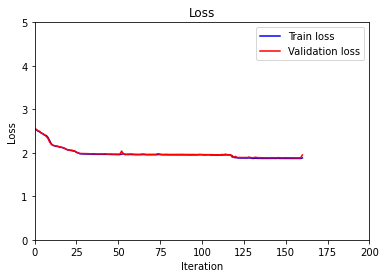

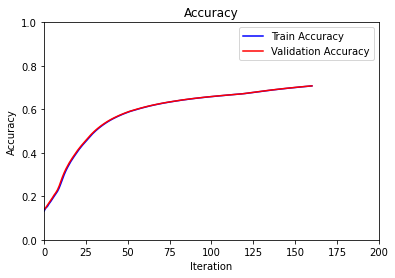

Iteration: 160, train loss: 1.8832, validation loss: 1.9509,train acc: 0.7077, validation acc: 0.7080
Step: 0 	Training Loss: 1.8795455 Training Acc: 0.70798624
Step: 1 	Training Loss: 1.9298247 Training Acc: 0.70798993
Step: 2 	Training Loss: 2.0102596 Training Acc: 0.70798784
Step: 3 	Training Loss: 1.9523479 Training Acc: 0.70799035
Step: 4 	Training Loss: 1.9709022 Training Acc: 0.7079911
Step: 5 	Training Loss: 1.9293745 Training Acc: 0.70799536
Step: 6 	Training Loss: 1.8814604 Training Acc: 0.7080024
Step: 7 	Training Loss: 1.8870616 Training Acc: 0.7080095
Step: 8 	Training Loss: 1.938971 Training Acc: 0.7080125
Step: 9 	Training Loss: 1.873968 Training Acc: 0.70802075
Step: 10 	Training Loss: 1.8422974 Training Acc: 0.7080312
Step: 11 	Training Loss: 1.8296287 Training Acc: 0.70804226
Step: 12 	Training Loss: 1.8756717 Training Acc: 0.708051
Step: 13 	Training Loss: 1.8403555 Training Acc: 0.7080615
Step: 14 	Training Loss: 1.8708494 Training Acc: 0.7080703
Step: 15 	Training 

Step: 53 	Training Loss: 1.8930321 Training Acc: 0.7090183
Step: 54 	Training Loss: 1.8595946 Training Acc: 0.7090269
Step: 55 	Training Loss: 1.9010023 Training Acc: 0.7090327
Step: 56 	Training Loss: 1.9150535 Training Acc: 0.70903736
Step: 57 	Training Loss: 1.8216417 Training Acc: 0.7090488
Step: 58 	Training Loss: 1.898725 Training Acc: 0.7090546
Step: 59 	Training Loss: 1.868871 Training Acc: 0.70906264
Step: 60 	Training Loss: 1.8997793 Training Acc: 0.7090684
Step: 61 	Training Loss: 1.9146973 Training Acc: 0.70907307
Step: 62 	Training Loss: 1.8763778 Training Acc: 0.7090805
Step: 63 	Training Loss: 1.8310169 Training Acc: 0.70909137
Step: 64 	Training Loss: 1.8862636 Training Acc: 0.7090983
Step: 65 	Training Loss: 1.8639843 Training Acc: 0.7091069
Step: 66 	Training Loss: 1.9241424 Training Acc: 0.709111
Step: 67 	Training Loss: 1.9045206 Training Acc: 0.70911676
Step: 0 	Validation Loss: 1.86341 Validation Acc: 0.70912534
Step: 1 	Validation Loss: 1.9171808 Validation Acc: 

Step: 20 	Training Loss: 1.8610388 Training Acc: 0.71007794
Step: 21 	Training Loss: 1.85958 Training Acc: 0.7100864
Step: 22 	Training Loss: 1.8530004 Training Acc: 0.7100954
Step: 23 	Training Loss: 1.8521297 Training Acc: 0.71010447
Step: 24 	Training Loss: 1.8759968 Training Acc: 0.7101118
Step: 25 	Training Loss: 1.8843346 Training Acc: 0.71011853
Step: 26 	Training Loss: 1.9065484 Training Acc: 0.71012366
Step: 27 	Training Loss: 1.8524917 Training Acc: 0.71013266
Step: 28 	Training Loss: 1.8909559 Training Acc: 0.71013886
Step: 29 	Training Loss: 1.9098631 Training Acc: 0.7101439
Step: 30 	Training Loss: 1.8765266 Training Acc: 0.71015126
Step: 31 	Training Loss: 1.9060999 Training Acc: 0.7101564
Step: 32 	Training Loss: 1.8525441 Training Acc: 0.7101654
Step: 33 	Training Loss: 1.9074686 Training Acc: 0.71017045
Step: 34 	Training Loss: 1.8681107 Training Acc: 0.7101783
Step: 35 	Training Loss: 1.9019673 Training Acc: 0.710184
Step: 36 	Training Loss: 1.8840439 Training Acc: 0.

Step: 6 	Validation Loss: 1.9326872 Validation Acc: 0.7110843
Step: 7 	Validation Loss: 1.9093637 Validation Acc: 0.7110893
Step: 8 	Validation Loss: 1.864958 Validation Acc: 0.7110976
Step: 9 	Validation Loss: 1.8662252 Validation Acc: 0.7111059
Step: 10 	Validation Loss: 1.8849669 Validation Acc: 0.71111256
Step: 11 	Validation Loss: 1.8696014 Validation Acc: 0.7111203
Step: 12 	Validation Loss: 1.8591521 Validation Acc: 0.7111286
Step: 13 	Validation Loss: 1.8942571 Validation Acc: 0.7111347
Step: 14 	Validation Loss: 1.9011043 Validation Acc: 0.71114016
Step: 15 	Validation Loss: 1.8873086 Validation Acc: 0.71114683
Step: 16 	Validation Loss: 1.908499 Validation Acc: 0.7111518


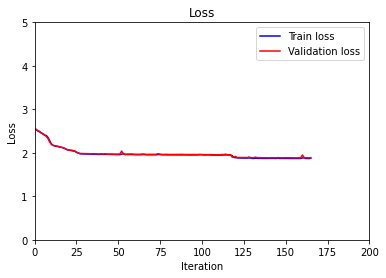

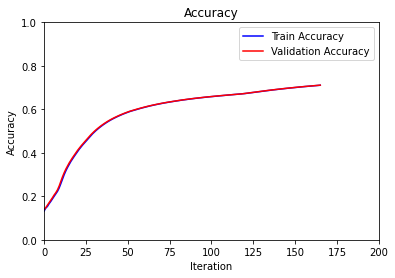

Iteration: 165, train loss: 1.8760, validation loss: 1.8886,train acc: 0.7108, validation acc: 0.7111
Step: 0 	Training Loss: 1.8242226 Training Acc: 0.7111628
Step: 1 	Training Loss: 1.8799963 Training Acc: 0.71117
Step: 2 	Training Loss: 1.9012341 Training Acc: 0.71117556
Step: 3 	Training Loss: 1.9362252 Training Acc: 0.7111783
Step: 4 	Training Loss: 1.8231723 Training Acc: 0.7111893
Step: 5 	Training Loss: 1.8652114 Training Acc: 0.7111971
Step: 6 	Training Loss: 1.8535049 Training Acc: 0.7112059
Step: 7 	Training Loss: 1.8591338 Training Acc: 0.7112147
Step: 8 	Training Loss: 1.8894112 Training Acc: 0.7112208
Step: 9 	Training Loss: 1.8444428 Training Acc: 0.7112302
Step: 10 	Training Loss: 1.8488865 Training Acc: 0.7112396
Step: 11 	Training Loss: 1.8223937 Training Acc: 0.7112506
Step: 12 	Training Loss: 1.8704126 Training Acc: 0.71125835
Step: 13 	Training Loss: 1.8321036 Training Acc: 0.71126884
Step: 14 	Training Loss: 1.8558301 Training Acc: 0.71127766
Step: 15 	Training Lo

Step: 51 	Training Loss: 1.8528254 Training Acc: 0.7121768
Step: 52 	Training Loss: 1.8455868 Training Acc: 0.71218604
Step: 53 	Training Loss: 1.8915871 Training Acc: 0.712192
Step: 54 	Training Loss: 1.8597343 Training Acc: 0.7122001
Step: 55 	Training Loss: 1.9006112 Training Acc: 0.7122055
Step: 56 	Training Loss: 1.9156151 Training Acc: 0.7122098
Step: 57 	Training Loss: 1.8224722 Training Acc: 0.71222067
Step: 58 	Training Loss: 1.8992834 Training Acc: 0.7122261
Step: 59 	Training Loss: 1.8686641 Training Acc: 0.71223366
Step: 60 	Training Loss: 1.8991209 Training Acc: 0.712239
Step: 61 	Training Loss: 1.9139693 Training Acc: 0.7122433
Step: 62 	Training Loss: 1.8762474 Training Acc: 0.71225035
Step: 63 	Training Loss: 1.8310404 Training Acc: 0.71226066
Step: 64 	Training Loss: 1.8845944 Training Acc: 0.71226716
Step: 65 	Training Loss: 1.8624207 Training Acc: 0.71227527
Step: 66 	Training Loss: 1.9223897 Training Acc: 0.712279
Step: 67 	Training Loss: 1.904403 Training Acc: 0.71

Step: 19 	Training Loss: 1.9298661 Training Acc: 0.7131832
Step: 20 	Training Loss: 1.861817 Training Acc: 0.7131912
Step: 21 	Training Loss: 1.8612792 Training Acc: 0.7131992
Step: 22 	Training Loss: 1.8539642 Training Acc: 0.7132077
Step: 23 	Training Loss: 1.8528969 Training Acc: 0.71321625
Step: 24 	Training Loss: 1.8770794 Training Acc: 0.71322316
Step: 25 	Training Loss: 1.8852427 Training Acc: 0.71322954
Step: 26 	Training Loss: 1.9073273 Training Acc: 0.71323425
Step: 27 	Training Loss: 1.85154 Training Acc: 0.71324277
Step: 28 	Training Loss: 1.8911932 Training Acc: 0.71324855
Step: 29 	Training Loss: 1.9093858 Training Acc: 0.7132533
Step: 30 	Training Loss: 1.8761921 Training Acc: 0.7132602
Step: 31 	Training Loss: 1.9060974 Training Acc: 0.71326494
Step: 32 	Training Loss: 1.8533989 Training Acc: 0.71327347
Step: 33 	Training Loss: 1.9086325 Training Acc: 0.7132782
Step: 34 	Training Loss: 1.875541 Training Acc: 0.713285
Step: 35 	Training Loss: 1.9008865 Training Acc: 0.71

Step: 4 	Validation Loss: 1.8378601 Validation Acc: 0.71414685
Step: 5 	Validation Loss: 1.9012011 Validation Acc: 0.714152
Step: 6 	Validation Loss: 1.9294586 Validation Acc: 0.714155
Step: 7 	Validation Loss: 1.906992 Validation Acc: 0.7141596
Step: 8 	Validation Loss: 1.8624072 Validation Acc: 0.7141675
Step: 9 	Validation Loss: 1.861566 Validation Acc: 0.71417534
Step: 10 	Validation Loss: 1.8783712 Validation Acc: 0.7141821
Step: 11 	Validation Loss: 1.8603861 Validation Acc: 0.71418995
Step: 12 	Validation Loss: 1.8527193 Validation Acc: 0.7141983
Step: 13 	Validation Loss: 1.8917639 Validation Acc: 0.714204
Step: 14 	Validation Loss: 1.8994353 Validation Acc: 0.71420914
Step: 15 	Validation Loss: 1.897804 Validation Acc: 0.7142143
Step: 16 	Validation Loss: 1.906959 Validation Acc: 0.7142189


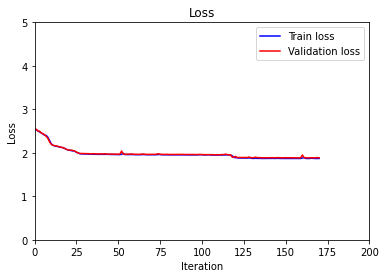

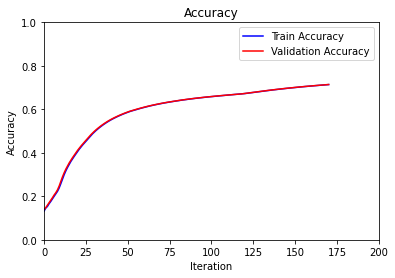

Iteration: 170, train loss: 1.8709, validation loss: 1.8856,train acc: 0.7139, validation acc: 0.7142
Step: 0 	Training Loss: 1.8226577 Training Acc: 0.7142294
Step: 1 	Training Loss: 1.8699973 Training Acc: 0.71423674
Step: 2 	Training Loss: 1.8934805 Training Acc: 0.7142424
Step: 3 	Training Loss: 1.9065989 Training Acc: 0.71424705
Step: 4 	Training Loss: 1.8152041 Training Acc: 0.7142581
Step: 5 	Training Loss: 1.8618319 Training Acc: 0.7142659
Step: 6 	Training Loss: 1.8602219 Training Acc: 0.71427375
Step: 7 	Training Loss: 1.860446 Training Acc: 0.7142821
Step: 8 	Training Loss: 1.8788788 Training Acc: 0.71428883
Step: 9 	Training Loss: 1.8390198 Training Acc: 0.7142983
Step: 10 	Training Loss: 1.8385718 Training Acc: 0.7143077
Step: 11 	Training Loss: 1.8214957 Training Acc: 0.7143182
Step: 12 	Training Loss: 1.8680849 Training Acc: 0.71432555
Step: 13 	Training Loss: 1.8365593 Training Acc: 0.71433496
Step: 14 	Training Loss: 1.8455229 Training Acc: 0.71434385
Step: 15 	Trainin

Step: 53 	Training Loss: 1.8929268 Training Acc: 0.7152196
Step: 54 	Training Loss: 1.8524473 Training Acc: 0.71522784
Step: 55 	Training Loss: 1.8946788 Training Acc: 0.71523345
Step: 56 	Training Loss: 1.9141399 Training Acc: 0.7152374
Step: 57 	Training Loss: 1.8216372 Training Acc: 0.71524775
Step: 58 	Training Loss: 1.8991793 Training Acc: 0.71525276
Step: 59 	Training Loss: 1.8687036 Training Acc: 0.7152599
Step: 60 	Training Loss: 1.8988059 Training Acc: 0.715265
Step: 61 	Training Loss: 1.913686 Training Acc: 0.7152689
Step: 62 	Training Loss: 1.8764067 Training Acc: 0.7152755
Step: 63 	Training Loss: 1.8306829 Training Acc: 0.71528536
Step: 64 	Training Loss: 1.8846797 Training Acc: 0.71529144
Step: 65 	Training Loss: 1.8616731 Training Acc: 0.7152991
Step: 66 	Training Loss: 1.9233212 Training Acc: 0.7153025
Step: 67 	Training Loss: 1.9052224 Training Acc: 0.71530706
Step: 0 	Validation Loss: 1.8628547 Validation Acc: 0.7153147
Step: 1 	Validation Loss: 1.9110053 Validation A

Step: 23 	Training Loss: 1.8555946 Training Acc: 0.7161806
Step: 24 	Training Loss: 1.8771981 Training Acc: 0.7161871
Step: 25 	Training Loss: 1.8861527 Training Acc: 0.71619314
Step: 26 	Training Loss: 1.9076563 Training Acc: 0.7161975
Step: 27 	Training Loss: 1.8523109 Training Acc: 0.7162056
Step: 28 	Training Loss: 1.891639 Training Acc: 0.716211
Step: 29 	Training Loss: 1.9099021 Training Acc: 0.71621543
Step: 30 	Training Loss: 1.8760531 Training Acc: 0.7162219
Step: 31 	Training Loss: 1.9065628 Training Acc: 0.7162263
Step: 32 	Training Loss: 1.8525604 Training Acc: 0.7162344
Step: 33 	Training Loss: 1.9087352 Training Acc: 0.71623874
Step: 34 	Training Loss: 1.8765891 Training Acc: 0.71624523
Step: 35 	Training Loss: 1.9046116 Training Acc: 0.71624964
Step: 36 	Training Loss: 1.8849367 Training Acc: 0.7162556
Step: 37 	Training Loss: 1.8461832 Training Acc: 0.7162642
Step: 38 	Training Loss: 1.88296 Training Acc: 0.71627015
Step: 39 	Training Loss: 1.8693184 Training Acc: 0.716

Step: 11 	Validation Loss: 1.8601933 Validation Acc: 0.71711487
Step: 12 	Validation Loss: 1.8538983 Validation Acc: 0.71712285
Step: 13 	Validation Loss: 1.8939545 Validation Acc: 0.71712816
Step: 14 	Validation Loss: 1.899816 Validation Acc: 0.717133
Step: 15 	Validation Loss: 1.8908894 Validation Acc: 0.7171383
Step: 16 	Validation Loss: 1.9061322 Validation Acc: 0.7171426


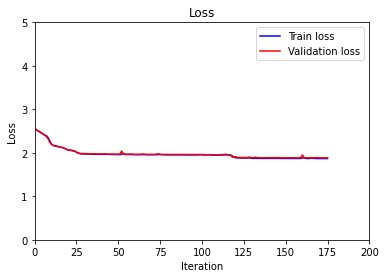

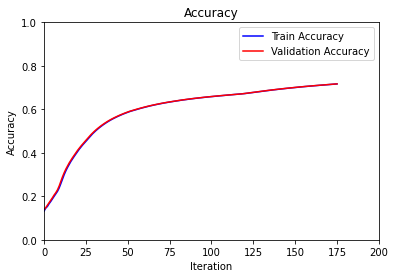

Iteration: 175, train loss: 1.8682, validation loss: 1.8860,train acc: 0.7168, validation acc: 0.7171
Step: 0 	Training Loss: 1.822717 Training Acc: 0.7171526
Step: 1 	Training Loss: 1.8693739 Training Acc: 0.7171595
Step: 2 	Training Loss: 1.8870473 Training Acc: 0.71716535
Step: 3 	Training Loss: 1.9061613 Training Acc: 0.71716964
Step: 4 	Training Loss: 1.8142091 Training Acc: 0.7171802
Step: 5 	Training Loss: 1.861465 Training Acc: 0.7171876
Step: 6 	Training Loss: 1.8526888 Training Acc: 0.7171955
Step: 7 	Training Loss: 1.8558416 Training Acc: 0.7172035
Step: 8 	Training Loss: 1.879497 Training Acc: 0.7172098
Step: 9 	Training Loss: 1.8339673 Training Acc: 0.71721935
Step: 10 	Training Loss: 1.8369486 Training Acc: 0.7172283
Step: 11 	Training Loss: 1.8221499 Training Acc: 0.7172383
Step: 12 	Training Loss: 1.8605404 Training Acc: 0.71724576
Step: 13 	Training Loss: 1.8292677 Training Acc: 0.71725523
Step: 14 	Training Loss: 1.8455176 Training Acc: 0.71726364
Step: 15 	Training L

Step: 55 	Training Loss: 1.8925917 Training Acc: 0.71810746
Step: 56 	Training Loss: 1.9157608 Training Acc: 0.7181111
Step: 57 	Training Loss: 1.8221025 Training Acc: 0.718121
Step: 58 	Training Loss: 1.8991792 Training Acc: 0.7181257
Step: 59 	Training Loss: 1.8687313 Training Acc: 0.71813244
Step: 60 	Training Loss: 1.8989251 Training Acc: 0.71813715
Step: 61 	Training Loss: 1.9141263 Training Acc: 0.7181408
Step: 62 	Training Loss: 1.8762608 Training Acc: 0.71814704
Step: 63 	Training Loss: 1.8324519 Training Acc: 0.7181564
Step: 64 	Training Loss: 1.8843044 Training Acc: 0.7181621
Step: 65 	Training Loss: 1.8552635 Training Acc: 0.7181699
Step: 66 	Training Loss: 1.923326 Training Acc: 0.7181731
Step: 67 	Training Loss: 1.9028203 Training Acc: 0.71817774
Step: 0 	Validation Loss: 1.8623269 Validation Acc: 0.718185
Step: 1 	Validation Loss: 1.9111657 Validation Acc: 0.7181892
Step: 2 	Validation Loss: 1.8633318 Validation Acc: 0.71819645
Step: 3 	Validation Loss: 1.9275373 Validati

Step: 22 	Training Loss: 1.853324 Training Acc: 0.7190048
Step: 23 	Training Loss: 1.8523011 Training Acc: 0.7190125
Step: 24 	Training Loss: 1.8770379 Training Acc: 0.71901864
Step: 25 	Training Loss: 1.8840269 Training Acc: 0.71902424
Step: 26 	Training Loss: 1.907131 Training Acc: 0.7190283
Step: 27 	Training Loss: 1.8524348 Training Acc: 0.719036
Step: 28 	Training Loss: 1.8915542 Training Acc: 0.7190411
Step: 29 	Training Loss: 1.9088718 Training Acc: 0.71904516
Step: 30 	Training Loss: 1.8771262 Training Acc: 0.7190513
Step: 31 	Training Loss: 1.906641 Training Acc: 0.7190554
Step: 32 	Training Loss: 1.8528397 Training Acc: 0.71906304
Step: 33 	Training Loss: 1.907923 Training Acc: 0.71906716
Step: 34 	Training Loss: 1.8694888 Training Acc: 0.7190738
Step: 35 	Training Loss: 1.9004135 Training Acc: 0.71907836
Step: 36 	Training Loss: 1.8841631 Training Acc: 0.71908396
Step: 37 	Training Loss: 1.8443462 Training Acc: 0.71909213
Step: 38 	Training Loss: 1.8839185 Training Acc: 0.71

Step: 9 	Validation Loss: 1.8621264 Validation Acc: 0.71988547
Step: 10 	Validation Loss: 1.8769941 Validation Acc: 0.7198915
Step: 11 	Validation Loss: 1.8599172 Validation Acc: 0.7198985
Step: 12 	Validation Loss: 1.8527219 Validation Acc: 0.71990603
Step: 13 	Validation Loss: 1.892381 Validation Acc: 0.71991104
Step: 14 	Validation Loss: 1.8993058 Validation Acc: 0.71991557
Step: 15 	Validation Loss: 1.8845261 Validation Acc: 0.71992105
Step: 16 	Validation Loss: 1.9064907 Validation Acc: 0.71992505


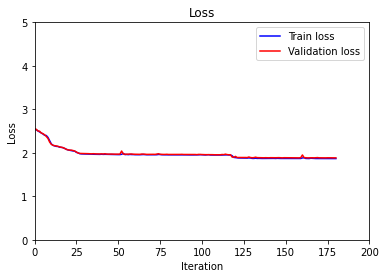

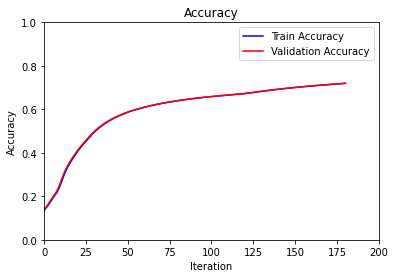

Iteration: 180, train loss: 1.8678, validation loss: 1.8839,train acc: 0.7196, validation acc: 0.7199
Step: 0 	Training Loss: 1.821756 Training Acc: 0.71993464
Step: 1 	Training Loss: 1.869014 Training Acc: 0.71994114
Step: 2 	Training Loss: 1.8921753 Training Acc: 0.71994615
Step: 3 	Training Loss: 1.9060886 Training Acc: 0.71995014
Step: 4 	Training Loss: 1.8137811 Training Acc: 0.7199602
Step: 5 	Training Loss: 1.8606042 Training Acc: 0.71996725
Step: 6 	Training Loss: 1.8517295 Training Acc: 0.71997476
Step: 7 	Training Loss: 1.8560878 Training Acc: 0.7199823
Step: 8 	Training Loss: 1.8756683 Training Acc: 0.7199883
Step: 9 	Training Loss: 1.8310237 Training Acc: 0.71999735
Step: 10 	Training Loss: 1.8371556 Training Acc: 0.7200059
Step: 11 	Training Loss: 1.8223127 Training Acc: 0.72001547
Step: 12 	Training Loss: 1.8602333 Training Acc: 0.7200225
Step: 13 	Training Loss: 1.829209 Training Acc: 0.72003156
Step: 14 	Training Loss: 1.8458854 Training Acc: 0.72003955
Step: 15 	Traini

Step: 51 	Training Loss: 1.852955 Training Acc: 0.72080505
Step: 52 	Training Loss: 1.8468745 Training Acc: 0.720813
Step: 53 	Training Loss: 1.8924445 Training Acc: 0.72081786
Step: 54 	Training Loss: 1.8603168 Training Acc: 0.7208248
Step: 55 	Training Loss: 1.9055701 Training Acc: 0.72082865
Step: 56 	Training Loss: 1.9149387 Training Acc: 0.72083205
Step: 57 	Training Loss: 1.8220136 Training Acc: 0.72084147
Step: 58 	Training Loss: 1.8986356 Training Acc: 0.7208459
Step: 59 	Training Loss: 1.868655 Training Acc: 0.72085226
Step: 60 	Training Loss: 1.8997569 Training Acc: 0.72085667
Step: 61 	Training Loss: 1.9143542 Training Acc: 0.72086006
Step: 62 	Training Loss: 1.876991 Training Acc: 0.72086596
Step: 63 	Training Loss: 1.8305752 Training Acc: 0.72087485
Step: 64 	Training Loss: 1.8871244 Training Acc: 0.72088027
Step: 65 	Training Loss: 1.8699137 Training Acc: 0.72088665
Step: 66 	Training Loss: 1.9231348 Training Acc: 0.72088957
Step: 67 	Training Loss: 1.9047518 Training Acc

Step: 19 	Training Loss: 1.925184 Training Acc: 0.721651
Step: 20 	Training Loss: 1.861578 Training Acc: 0.7216578
Step: 21 	Training Loss: 1.8669717 Training Acc: 0.7216641
Step: 22 	Training Loss: 1.845922 Training Acc: 0.7216719
Step: 23 	Training Loss: 1.852503 Training Acc: 0.7216792
Step: 24 	Training Loss: 1.8819132 Training Acc: 0.7216845
Step: 25 	Training Loss: 1.8914211 Training Acc: 0.7216893
Step: 26 	Training Loss: 1.9071956 Training Acc: 0.7216931
Step: 27 	Training Loss: 1.8521898 Training Acc: 0.7217004
Step: 28 	Training Loss: 1.8912925 Training Acc: 0.7217052
Step: 29 	Training Loss: 1.9091935 Training Acc: 0.72170895
Step: 30 	Training Loss: 1.8752904 Training Acc: 0.7217148
Step: 31 	Training Loss: 1.9065046 Training Acc: 0.72171855
Step: 32 	Training Loss: 1.8529851 Training Acc: 0.7217259
Step: 33 	Training Loss: 1.909787 Training Acc: 0.72172964
Step: 34 	Training Loss: 1.8680527 Training Acc: 0.72173595
Step: 35 	Training Loss: 1.9002448 Training Acc: 0.7217402

Step: 6 	Validation Loss: 1.9301579 Validation Acc: 0.72247773
Step: 7 	Validation Loss: 1.9003018 Validation Acc: 0.72248197
Step: 8 	Validation Loss: 1.8619306 Validation Acc: 0.72248864
Step: 9 	Validation Loss: 1.8649894 Validation Acc: 0.7224953
Step: 10 	Validation Loss: 1.87647 Validation Acc: 0.72250104
Step: 11 	Validation Loss: 1.8612213 Validation Acc: 0.7225077
Step: 12 	Validation Loss: 1.8532243 Validation Acc: 0.72251487
Step: 13 	Validation Loss: 1.894059 Validation Acc: 0.7225196
Step: 14 	Validation Loss: 1.8993266 Validation Acc: 0.7225238
Step: 15 	Validation Loss: 1.8832808 Validation Acc: 0.722529
Step: 16 	Validation Loss: 1.9070975 Validation Acc: 0.7225327


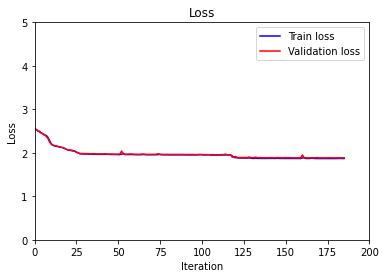

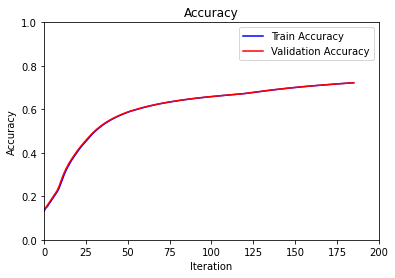

Iteration: 185, train loss: 1.8701, validation loss: 1.8842,train acc: 0.7222, validation acc: 0.7225
Step: 0 	Training Loss: 1.8230691 Training Acc: 0.72254187
Step: 1 	Training Loss: 1.869894 Training Acc: 0.72254807
Step: 2 	Training Loss: 1.8854996 Training Acc: 0.72255325
Step: 3 	Training Loss: 1.9055443 Training Acc: 0.72255695
Step: 4 	Training Loss: 1.8138247 Training Acc: 0.7225666
Step: 5 	Training Loss: 1.8618524 Training Acc: 0.7225733
Step: 6 	Training Loss: 1.852566 Training Acc: 0.72258043
Step: 7 	Training Loss: 1.8560741 Training Acc: 0.7225876
Step: 8 	Training Loss: 1.8824134 Training Acc: 0.7225928
Step: 9 	Training Loss: 1.830183 Training Acc: 0.7226014
Step: 10 	Training Loss: 1.8375585 Training Acc: 0.7226096
Step: 11 	Training Loss: 1.8225012 Training Acc: 0.7226187
Step: 12 	Training Loss: 1.8610437 Training Acc: 0.7226254
Step: 13 	Training Loss: 1.8290942 Training Acc: 0.722634
Step: 14 	Training Loss: 1.8459423 Training Acc: 0.7226417
Step: 15 	Training Los

Step: 53 	Training Loss: 1.8933023 Training Acc: 0.7233854
Step: 54 	Training Loss: 1.8525084 Training Acc: 0.7233924
Step: 55 	Training Loss: 1.8924007 Training Acc: 0.723397
Step: 56 	Training Loss: 1.9152454 Training Acc: 0.7234002
Step: 57 	Training Loss: 1.8233895 Training Acc: 0.7234092
Step: 58 	Training Loss: 1.8991628 Training Acc: 0.7234133
Step: 59 	Training Loss: 1.8682749 Training Acc: 0.72341937
Step: 60 	Training Loss: 1.8993499 Training Acc: 0.7234235
Step: 61 	Training Loss: 1.9139885 Training Acc: 0.72342664
Step: 62 	Training Loss: 1.876328 Training Acc: 0.7234322
Step: 63 	Training Loss: 1.8304095 Training Acc: 0.7234407
Step: 64 	Training Loss: 1.8845985 Training Acc: 0.72344583
Step: 65 	Training Loss: 1.8613129 Training Acc: 0.7234524
Step: 66 	Training Loss: 1.9229143 Training Acc: 0.723455
Step: 67 	Training Loss: 1.9028634 Training Acc: 0.7234591
Step: 0 	Validation Loss: 1.8622868 Validation Acc: 0.7234657
Step: 1 	Validation Loss: 1.9094442 Validation Acc: 0

Step: 22 	Training Loss: 1.8540154 Training Acc: 0.7242034
Step: 23 	Training Loss: 1.8526499 Training Acc: 0.7242103
Step: 24 	Training Loss: 1.8781571 Training Acc: 0.72421587
Step: 25 	Training Loss: 1.8905591 Training Acc: 0.72422034
Step: 26 	Training Loss: 1.9077537 Training Acc: 0.7242239
Step: 27 	Training Loss: 1.8520064 Training Acc: 0.7242308
Step: 28 	Training Loss: 1.8916972 Training Acc: 0.72423536
Step: 29 	Training Loss: 1.9138018 Training Acc: 0.7242384
Step: 30 	Training Loss: 1.8764074 Training Acc: 0.7242439
Step: 31 	Training Loss: 1.9073203 Training Acc: 0.72424746
Step: 32 	Training Loss: 1.8568459 Training Acc: 0.72425437
Step: 33 	Training Loss: 1.9088646 Training Acc: 0.7242579
Step: 34 	Training Loss: 1.8761017 Training Acc: 0.72426337
Step: 35 	Training Loss: 1.9013467 Training Acc: 0.7242674
Step: 36 	Training Loss: 1.883966 Training Acc: 0.72427243
Step: 37 	Training Loss: 1.8441218 Training Acc: 0.7242798
Step: 38 	Training Loss: 1.8913991 Training Acc: 0

Step: 8 	Validation Loss: 1.8666725 Validation Acc: 0.7249785
Step: 9 	Validation Loss: 1.8629901 Validation Acc: 0.7249849
Step: 10 	Validation Loss: 1.8769134 Validation Acc: 0.72499025
Step: 11 	Validation Loss: 1.8685169 Validation Acc: 0.72499615
Step: 12 	Validation Loss: 1.8534118 Validation Acc: 0.725003
Step: 13 	Validation Loss: 1.8917676 Validation Acc: 0.7250074
Step: 14 	Validation Loss: 1.90084 Validation Acc: 0.72501135
Step: 15 	Validation Loss: 1.8986155 Validation Acc: 0.7250153
Step: 16 	Validation Loss: 1.9146572 Validation Acc: 0.72501826


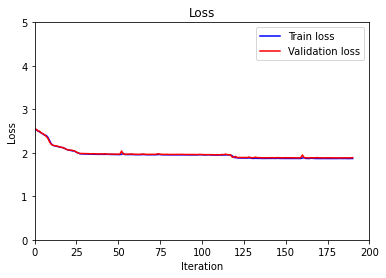

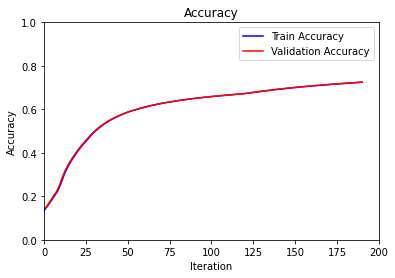

Iteration: 190, train loss: 1.8687, validation loss: 1.8893,train acc: 0.7248, validation acc: 0.7250
Step: 0 	Training Loss: 1.8261425 Training Acc: 0.725027
Step: 1 	Training Loss: 1.8697591 Training Acc: 0.7250329
Step: 2 	Training Loss: 1.8845422 Training Acc: 0.7250378
Step: 3 	Training Loss: 1.9065979 Training Acc: 0.7250413
Step: 4 	Training Loss: 1.8139069 Training Acc: 0.7250505
Step: 5 	Training Loss: 1.8609496 Training Acc: 0.7250569
Step: 6 	Training Loss: 1.852561 Training Acc: 0.7250637
Step: 7 	Training Loss: 1.8568656 Training Acc: 0.72507054
Step: 8 	Training Loss: 1.8755645 Training Acc: 0.7250759
Step: 9 	Training Loss: 1.8245101 Training Acc: 0.72508466
Step: 10 	Training Loss: 1.8373058 Training Acc: 0.7250924
Step: 11 	Training Loss: 1.8227706 Training Acc: 0.7251012
Step: 12 	Training Loss: 1.8607316 Training Acc: 0.7251075
Step: 13 	Training Loss: 1.8297428 Training Acc: 0.7251158
Step: 14 	Training Loss: 1.8455594 Training Acc: 0.72512305
Step: 15 	Training Los

Step: 52 	Training Loss: 1.8418794 Training Acc: 0.72580814
Step: 53 	Training Loss: 1.8956258 Training Acc: 0.72581244
Step: 54 	Training Loss: 1.8599304 Training Acc: 0.7258187
Step: 55 	Training Loss: 1.8955014 Training Acc: 0.72582304
Step: 56 	Training Loss: 1.9154553 Training Acc: 0.72582597
Step: 57 	Training Loss: 1.8216851 Training Acc: 0.7258346
Step: 58 	Training Loss: 1.899382 Training Acc: 0.7258384
Step: 59 	Training Loss: 1.8691682 Training Acc: 0.7258442
Step: 60 	Training Loss: 1.9060521 Training Acc: 0.7258481
Step: 61 	Training Loss: 1.9140804 Training Acc: 0.725851
Step: 62 	Training Loss: 1.8764749 Training Acc: 0.72585624
Step: 63 	Training Loss: 1.8315122 Training Acc: 0.7258644
Step: 64 	Training Loss: 1.8843141 Training Acc: 0.72586924
Step: 65 	Training Loss: 1.8576384 Training Acc: 0.72587544
Step: 66 	Training Loss: 1.9239514 Training Acc: 0.7258779
Step: 67 	Training Loss: 1.9033165 Training Acc: 0.72588176
Step: 0 	Validation Loss: 1.8709327 Validation Acc

Step: 19 	Training Loss: 1.9290605 Training Acc: 0.7265502
Step: 20 	Training Loss: 1.8639923 Training Acc: 0.72655636
Step: 21 	Training Loss: 1.8607486 Training Acc: 0.7265625
Step: 22 	Training Loss: 1.8570346 Training Acc: 0.7265691
Step: 23 	Training Loss: 1.8608115 Training Acc: 0.72657526
Step: 24 	Training Loss: 1.8785677 Training Acc: 0.7265805
Step: 25 	Training Loss: 1.8868134 Training Acc: 0.7265852
Step: 26 	Training Loss: 1.9079471 Training Acc: 0.7265885
Step: 27 	Training Loss: 1.8539687 Training Acc: 0.72659516
Step: 28 	Training Loss: 1.8933178 Training Acc: 0.7265994
Step: 29 	Training Loss: 1.909086 Training Acc: 0.7266027
Step: 30 	Training Loss: 1.8760291 Training Acc: 0.7266079
Step: 31 	Training Loss: 1.9066643 Training Acc: 0.7266112
Step: 32 	Training Loss: 1.8534375 Training Acc: 0.7266178
Step: 33 	Training Loss: 1.9090633 Training Acc: 0.72662115
Step: 34 	Training Loss: 1.875937 Training Acc: 0.72662634
Step: 35 	Training Loss: 1.8999653 Training Acc: 0.72

Step: 6 	Validation Loss: 1.9297469 Validation Acc: 0.7273001
Step: 7 	Validation Loss: 1.9071565 Validation Acc: 0.7273033
Step: 8 	Validation Loss: 1.8624685 Validation Acc: 0.7273094
Step: 9 	Validation Loss: 1.8626958 Validation Acc: 0.7273155
Step: 10 	Validation Loss: 1.8769888 Validation Acc: 0.72732055
Step: 11 	Validation Loss: 1.8609536 Validation Acc: 0.72732663
Step: 12 	Validation Loss: 1.8559083 Validation Acc: 0.7273331
Step: 13 	Validation Loss: 1.895659 Validation Acc: 0.7273373
Step: 14 	Validation Loss: 1.8998454 Validation Acc: 0.72734106
Step: 15 	Validation Loss: 1.8836144 Validation Acc: 0.72734565
Step: 16 	Validation Loss: 1.9065154 Validation Acc: 0.7273489


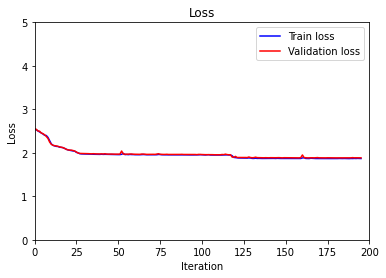

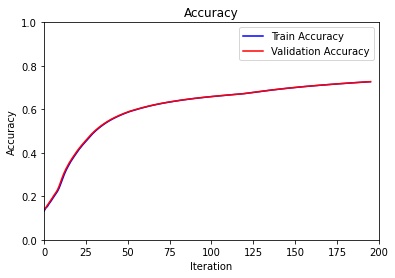

Iteration: 195, train loss: 1.8686, validation loss: 1.8847,train acc: 0.7271, validation acc: 0.7273
Step: 0 	Training Loss: 1.8222148 Training Acc: 0.7273573
Step: 1 	Training Loss: 1.870686 Training Acc: 0.7273629
Step: 2 	Training Loss: 1.8923075 Training Acc: 0.72736704
Step: 3 	Training Loss: 1.9066942 Training Acc: 0.72737026
Step: 4 	Training Loss: 1.8136346 Training Acc: 0.72737914
Step: 5 	Training Loss: 1.8611985 Training Acc: 0.72738516
Step: 6 	Training Loss: 1.8526099 Training Acc: 0.7273917
Step: 7 	Training Loss: 1.8536491 Training Acc: 0.7273982
Step: 8 	Training Loss: 1.8758571 Training Acc: 0.72740334
Step: 9 	Training Loss: 1.8309587 Training Acc: 0.7274112
Step: 10 	Training Loss: 1.837235 Training Acc: 0.72741866
Step: 11 	Training Loss: 1.8218949 Training Acc: 0.72742707
Step: 12 	Training Loss: 1.8611442 Training Acc: 0.7274331
Step: 13 	Training Loss: 1.8287213 Training Acc: 0.727441
Step: 14 	Training Loss: 1.8454918 Training Acc: 0.727448
Step: 15 	Training L

Step: 54 	Training Loss: 1.8527722 Training Acc: 0.7281241
Step: 55 	Training Loss: 1.8921783 Training Acc: 0.72812814
Step: 56 	Training Loss: 1.9164519 Training Acc: 0.7281309
Step: 57 	Training Loss: 1.8225796 Training Acc: 0.72813916
Step: 58 	Training Loss: 1.8996874 Training Acc: 0.72814274
Step: 59 	Training Loss: 1.8690851 Training Acc: 0.7281482
Step: 60 	Training Loss: 1.9000919 Training Acc: 0.72815186
Step: 61 	Training Loss: 1.9148302 Training Acc: 0.72815454
Step: 62 	Training Loss: 1.8767135 Training Acc: 0.7281596
Step: 63 	Training Loss: 1.8326437 Training Acc: 0.7281674
Step: 64 	Training Loss: 1.8847628 Training Acc: 0.72817194
Step: 65 	Training Loss: 1.8611753 Training Acc: 0.7281779
Step: 66 	Training Loss: 1.923037 Training Acc: 0.7281801
Step: 67 	Training Loss: 1.9046514 Training Acc: 0.72818327
Step: 0 	Validation Loss: 1.8649616 Validation Acc: 0.72818923
Step: 1 	Validation Loss: 1.9101653 Validation Acc: 0.7281924
Step: 2 	Validation Loss: 1.8633256 Validat

Step: 21 	Training Loss: 1.8596946 Training Acc: 0.7288384
Step: 22 	Training Loss: 1.8449159 Training Acc: 0.7288452
Step: 23 	Training Loss: 1.8455491 Training Acc: 0.728852
Step: 24 	Training Loss: 1.8779105 Training Acc: 0.7288569
Step: 25 	Training Loss: 1.8834107 Training Acc: 0.7288614
Step: 26 	Training Loss: 1.9074097 Training Acc: 0.7288645
Step: 27 	Training Loss: 1.8537697 Training Acc: 0.7288708
Step: 28 	Training Loss: 1.8913678 Training Acc: 0.7288748
Step: 29 	Training Loss: 1.9142189 Training Acc: 0.7288774
Step: 30 	Training Loss: 1.8763659 Training Acc: 0.7288824
Step: 31 	Training Loss: 1.9069215 Training Acc: 0.7288855
Step: 32 	Training Loss: 1.8531629 Training Acc: 0.7288918
Step: 33 	Training Loss: 1.9106655 Training Acc: 0.7288949
Step: 34 	Training Loss: 1.8760394 Training Acc: 0.7288998
Step: 35 	Training Loss: 1.9014524 Training Acc: 0.72890335
Step: 36 	Training Loss: 1.8903565 Training Acc: 0.72890735
Step: 37 	Training Loss: 1.8459696 Training Acc: 0.7289

In [30]:

#%% (3) Initialize and train the model.
import tensorflow.compat.v1 as tf

session = tf.Session()

# The input has 2 dimensions: dimension 0 is reserved for the first term and dimension 1 is reverved for the second term
input_dimensions = 1662 #features
classes=13
batch_size =128
hidden_size = 128
time_size = 30 #window size
lr = 1e-4
epochs = 200
# Initialize a session

# Create a new instance of the GRU model
gru = GRU(input_dimensions, hidden_size)

# Add an additional layer on top of each of the hidden state outputs
W_output = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(hidden_size*time_size, classes), mean=0, stddev=1.0))
b_output = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(classes,), mean=0, stddev=1.0))
output = tf.map_fn(lambda h_t: tf.nn.softmax(tf.matmul(tf.reshape(h_t,(1,hidden_size*time_size)), W_output) + b_output), gru.h_t)
output = tf.reshape(output,((batch_size, classes)))
# Create a placeholder for the expected output
expected_output = tf.placeholder(dtype=tf.float32, shape=(batch_size, classes), name='expected_output')

# Just use quadratic loss
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(expected_output,output))/float(batch_size)
print(expected_output,W_output,b_output,output,loss)
accs = tf.metrics.accuracy(labels=tf.argmax(expected_output, axis=1), predictions=tf.argmax(output,axis=1))[1]
# loss = tf.reduce_sum(0.5 * tf.pow(output - expected_output, 2)) / float(batch_size)

# Use the Adam optimizer for training
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

# Initialize all the variables
init_variables = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()

session.run(init_variables)
session.run(init_l)

# saved_path = 'drive/MyDrive/GRU/gru/gru-9'
# saver.restore(session, saved_path)

# Initialize the losses
train_losses = []
validation_losses = []

train_accs = []
validation_accs = []

for epoch in range(epochs):
    train_acc = 0
    train_loss=0
    validation_loss = 0
    validation_acc = 0

    for i in range(len(X_)):
        _, train_loss_, train_acc_ = session.run([train_step, loss, accs], feed_dict={gru.input_layer: X_[i], expected_output: Y_[i]})
        train_loss += train_loss_
        train_acc += train_acc_
        print("Step:",i,"\tTraining Loss:",train_loss_, "Training Acc:",train_acc_)

    train_loss = train_loss/len(X_)
    train_losses += [train_loss]
    train_acc = train_acc/len(X_)
    train_accs += [train_acc]

    for j in range(len(X_val_)):
        validation_loss_, validation_acc_= session.run([loss,accs], feed_dict={gru.input_layer: X_val_[j], expected_output: Y_val_[j]})
        validation_loss += validation_loss_
        validation_acc += validation_acc_
        print("Step:",j,"\tValidation Loss:",validation_loss_, "Validation Acc:",validation_acc_)

    validation_loss = validation_loss/len(X_val_)
    validation_losses += [validation_loss]
    validation_acc = validation_acc/len(X_val_)
    validation_accs += [validation_acc]
    # Display an update every 5 iterations
    if epoch % 5 == 0:
        plt.plot(train_losses, '-b', label='Train loss')
        plt.plot(validation_losses, '-r', label='Validation loss')
        plt.legend(loc=0)
        plt.title('Loss')
        plt.xlim([0, epochs])
        plt.ylim([0, 5])

        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()

        plt.plot(train_accs, '-b', label='Train Accuracy')
        plt.plot(validation_accs, '-r', label='Validation Accuracy')
        plt.legend(loc=0)
        plt.title('Accuracy')
        plt.xlim([0, epochs])
        plt.ylim([0, 1])

        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.show()
        print('Iteration: %d, train loss: %.4f, validation loss: %.4f,train acc: %.4f, validation acc: %.4f' % (epoch, train_loss,validation_loss,train_acc,validation_acc))

In [32]:
session.graph

# Save Weights

In [31]:
saver = tf.compat.v1.train.Saver()


In [33]:
saved_path = saver.save(session, 'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru', global_step=epoch)

In [34]:
import tensorflow.compat.v1 as tf

with tf.compat.v1.Session() as sess:
    saver.restore(sess, saved_path)


INFO:tensorflow:Restoring parameters from C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru-199


In [35]:
saved_path

'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru-199'

# Manual Evaluation

In [39]:
#%% (4) Manually evaluate the model.

# Make a prediction by using the model
y_predicted = session.run(output, feed_dict={gru.input_layer: X_val_[0]})
y_predicted = np.argmax(y_predicted,axis=-1)
print(y_predicted)

y_actual = Y_val_[0]
y_actual = np.argmax(y_actual,axis=-1)
print(y_actual)

print('\nPredictions: \n',le.inverse_transform(y_predicted))
print('\nActual: \n',le.inverse_transform(y_actual))

[12  0 10  1  2  0 11 12  9  7  2  7  9 11 11  9  6 10 10  6  2 11  9 10
 10  5  0 12  0 12  6 12  8  7  6  7 10  9 12 10  6  0  7 11  7  2  6  7
  5  9  5 10 11  9  6  0  7  1  1 12 11  7  8 12  9  5  6  2  5  6  9  5
 10  9 11  5  7  0  5  7  5  6  9 11  6  7  2  6  5 12  8  9 10  8  0  0
  1  9 11  9 12 12  5 12 12  8  6  0 12  7 11  2 12  2  9 10  6  0 12  8
  1  7 10 10 12 11  1 10]
[12  0 10  1  2  0 11 12  4  4  2  7  9 11 11  9  6 10 10  6  2 11  9 10
  3  5  2 12  0 12  6  3  8  7  2  7 10  9  4  3  2  0  3 11  7  2  6  7
  5  9  5 10 11  9  6  0  7  1  1 12 11  7  8  4  9  5  6  2  5  6  9  5
  3  2 11  5  7  2  5  7  5  6  9  3  6  7  2  6  5 12  8  4 10  8  0  0
  1  9 11  9  4 12  5 12 12  8  6  2 12  7 11  2 12  2  3  3  6  4 12  8
  1  7 10 10  3 11  1 10]

Predictions: 
 ['you' 'fail' 'thanks' 'friend' 'good' 'fail' 'think' 'you' 'takecare'
 'meet' 'good' 'meet' 'takecare' 'think' 'think' 'takecare' 'location'
 'thanks' 'thanks' 'location' 'good' 'think' 'takecare' 'tha

# Classification Report

In [40]:
from sklearn.metrics import classification_report,accuracy_score

In [41]:
from sklearn import metrics

In [42]:
print(f"Classification report for Sign Gestures \n"
      f"{metrics.classification_report(y_actual, y_predicted)}\n")

Classification report for Sign Gestures 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      1.00      1.00         6
           2       1.00      0.57      0.73        14
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         7
           5       1.00      1.00      1.00        11
           6       0.86      1.00      0.92        12
           7       0.86      1.00      0.92        12
           8       1.00      1.00      1.00         6
           9       0.73      1.00      0.85        11
          10       0.71      1.00      0.83        10
          11       0.92      1.00      0.96        11
          12       0.71      1.00      0.83        12

    accuracy                           0.83       128
   macro avg       0.72      0.81      0.75       128
weighted avg       0.75      0.83      0.77       128




C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy Score

In [43]:
accuracy_score(y_actual,y_predicted)

0.828125

# Mean absolute error


In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(y_actual,y_predicted)

0.984375

# Mean squared error

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_actual,y_predicted)

6.515625

# R² score, the coefficient of determination

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_actual,y_predicted)

0.5187188920147154

# Evaluation using Confusion Matrix 

In [54]:
from sklearn.metrics import multilabel_confusion_matrix

In [55]:
multilabel_confusion_matrix(y_actual,y_predicted)

array([[[117,   4],
        [  0,   7]],

       [[122,   0],
        [  0,   6]],

       [[114,   0],
        [  6,   8]],

       [[119,   0],
        [  9,   0]],

       [[121,   0],
        [  7,   0]],

       [[117,   0],
        [  0,  11]],

       [[114,   2],
        [  0,  12]],

       [[114,   2],
        [  0,  12]],

       [[122,   0],
        [  0,   6]],

       [[113,   4],
        [  0,  11]],

       [[114,   4],
        [  0,  10]],

       [[116,   1],
        [  0,  11]],

       [[111,   5],
        [  0,  12]]], dtype=int64)

Confusion matrix:
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  8  0  0  0  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  4  1  2]
 [ 1  0  0  0  0  0  0  1  0  2  0  0  3]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12]]


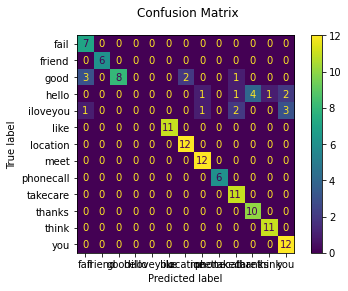

In [50]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(le.inverse_transform(y_actual), le.inverse_transform(y_predicted))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# MY GRU MODEL

In [56]:
X_[0].shape

(128, 30, 1662)

In [57]:
#%% (2) Model definition.
class MYGRU:
    """Implementation of a Gated Recurrent Unit (GRU) as described in [1].
    
    [1] Chung, J., Gulcehre, C., Cho, K., & Bengio, Y. (2014). Empirical evaluation of gated recurrent neural networks on sequence modeling. arXiv preprint arXiv:1412.3555.
    
    Arguments
    ---------
    input_dimensions: int
        The size of the input vectors (x_t).
    hidden_size: int
        The size of the hidden layer vectors (h_t).
    dtype: obj
        The datatype used for the variables and constants (optional).
    """
    
    def __init__(self, input_dimensions, hidden_size, dtype=tf.float32):
        self.input_dimensions = input_dimensions
        self.hidden_size = hidden_size
        
        # Weights for input vectors of shape (input_dimensions, hidden_size)
        self.Wr = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wr')
        self.Wz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wz')
        self.Wh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.1), name='Wh')
        
        # Weights for hidden vectors of shape (hidden_size, hidden_size)
        self.Ur = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Ur')
        self.Uz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Uz')
        self.Uh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.1), name='Uh')
        
        # Biases for hidden vectors of shape (hidden_size,)
        self.br = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='br')
        self.bz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='bz')
        self.bh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.1), name='bh')
        
        # Define the input layer placeholder
        self.input_layer = tf.placeholder(dtype=dtype, shape=(None, None, input_dimensions), name='input')
        
        # Put the time-dimension upfront for the scan operator
        self.x_t = tf.transpose(self.input_layer, [1, 0, 2], name='x_t')
        
        # A little hack (to obtain the same shape as the input matrix) to define the initial hidden state h_0
        self.h_0 = tf.matmul(self.x_t[0, :, :], tf.zeros(dtype=dtype, shape=(input_dimensions, hidden_size)), name='h_0')
        
        # Perform the scan operator
        self.h_t_transposed = tf.scan(self.forward_pass, self.x_t, initializer=self.h_0, name='h_t_transposed')
        
        # Transpose the result back
        self.h_t = tf.transpose(self.h_t_transposed, [1, 0, 2], name='h_t')

    def forward_pass(self, h_tm1, x_t):
        """Perform a forward pass.
        
        Arguments
        ---------
        h_tm1: np.matrix
            The hidden state at the previous timestep (h_{t-1}).
        x_t: np.matrix
            The input vector.
        """
        # Definitions of z_t and r_t
        
        r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(h_tm1, self.Ur) + self.br)
        z_t = tf.sigmoid((tf.matmul(x_t, self.Wz) + tf.matmul(h_tm1, self.Uz))*r_t + self.bz)
        
        # Definition of h~_t
        h_proposal = tf.nn.elu(tf.matmul(x_t, self.Wh) + tf.matmul(tf.multiply(r_t, h_tm1), self.Uh) + self.bh)
        
        # Compute the next hidden state
        h_t = tf.multiply(1 - z_t, h_tm1) + tf.multiply(z_t, h_proposal)
        
        return h_t

Tensor("expected_output_3:0", shape=(128, 13), dtype=float32) <tf.Variable 'Variable_6:0' shape=(3840, 13) dtype=float32_ref> <tf.Variable 'Variable_7:0' shape=(13,) dtype=float32_ref> Tensor("Reshape_3:0", shape=(128, 13), dtype=float32) Tensor("truediv_3:0", shape=(), dtype=float32)
Step: 0 	Training Loss: 2.9314523 Training Acc: 0.078125
Step: 1 	Training Loss: 2.7102108 Training Acc: 0.0859375
Step: 2 	Training Loss: 2.929691 Training Acc: 0.078125
Step: 3 	Training Loss: 2.9813907 Training Acc: 0.078125
Step: 4 	Training Loss: 3.073166 Training Acc: 0.0703125
Step: 5 	Training Loss: 2.8913648 Training Acc: 0.0703125
Step: 6 	Training Loss: 2.7534924 Training Acc: 0.07254464
Step: 7 	Training Loss: 2.811528 Training Acc: 0.07519531
Step: 8 	Training Loss: 2.8969498 Training Acc: 0.074652776
Step: 9 	Training Loss: 2.7271245 Training Acc: 0.07421875
Step: 10 	Training Loss: 2.770422 Training Acc: 0.07741477
Step: 11 	Training Loss: 2.785303 Training Acc: 0.08203125
Step: 12 	Trainin

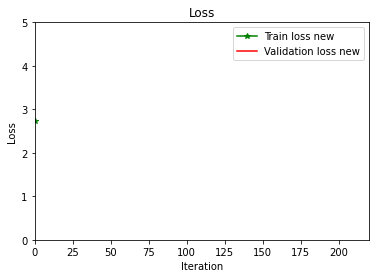

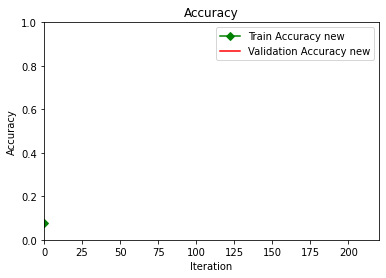

Iteration: 0, train loss: 2.7387, validation loss: 2.5941, train acc: 0.0774, validation acc: 0.0758
Step: 0 	Training Loss: 2.531557 Training Acc: 0.07630814
Step: 1 	Training Loss: 2.455977 Training Acc: 0.07659842
Step: 2 	Training Loss: 2.568835 Training Acc: 0.07670455
Step: 3 	Training Loss: 2.644446 Training Acc: 0.07698385
Step: 4 	Training Loss: 2.7453384 Training Acc: 0.07638889
Step: 5 	Training Loss: 2.5898376 Training Acc: 0.07640797
Step: 6 	Training Loss: 2.4812043 Training Acc: 0.07651155
Step: 7 	Training Loss: 2.4962711 Training Acc: 0.07669691
Step: 8 	Training Loss: 2.5983815 Training Acc: 0.076296546
Step: 9 	Training Loss: 2.5431304 Training Acc: 0.07615132
Step: 10 	Training Loss: 2.5541592 Training Acc: 0.07633463
Step: 11 	Training Loss: 2.5937455 Training Acc: 0.077319585
Step: 12 	Training Loss: 2.556755 Training Acc: 0.07756697
Step: 13 	Training Loss: 2.516138 Training Acc: 0.07788826
Step: 14 	Training Loss: 2.4428644 Training Acc: 0.078125
Step: 15 	Train

Step: 50 	Training Loss: 2.210104 Training Acc: 0.08470023
Step: 51 	Training Loss: 2.1943069 Training Acc: 0.0847058
Step: 52 	Training Loss: 2.242741 Training Acc: 0.08499159
Step: 53 	Training Loss: 2.3401642 Training Acc: 0.08503069
Step: 54 	Training Loss: 2.257821 Training Acc: 0.085486114
Step: 55 	Training Loss: 2.2544243 Training Acc: 0.085557245
Step: 56 	Training Loss: 2.315629 Training Acc: 0.085696585
Step: 57 	Training Loss: 2.2418783 Training Acc: 0.08586897
Step: 58 	Training Loss: 2.2639222 Training Acc: 0.08641512
Step: 59 	Training Loss: 2.2481792 Training Acc: 0.08665082
Step: 60 	Training Loss: 2.250318 Training Acc: 0.087053575
Step: 61 	Training Loss: 2.304131 Training Acc: 0.08748653
Step: 62 	Training Loss: 2.264504 Training Acc: 0.08778165
Step: 63 	Training Loss: 2.2300599 Training Acc: 0.088141024
Step: 64 	Training Loss: 2.1890738 Training Acc: 0.08833112
Step: 65 	Training Loss: 2.297133 Training Acc: 0.088519596
Step: 66 	Training Loss: 2.1662831 Training

Step: 16 	Training Loss: 2.018302 Training Acc: 0.12650998
Step: 17 	Training Loss: 1.960177 Training Acc: 0.12702951
Step: 18 	Training Loss: 1.8805457 Training Acc: 0.12769847
Step: 19 	Training Loss: 2.0434499 Training Acc: 0.1282552
Step: 20 	Training Loss: 1.9589746 Training Acc: 0.12891707
Step: 21 	Training Loss: 1.9723766 Training Acc: 0.12957528
Step: 22 	Training Loss: 2.0277438 Training Acc: 0.13018681
Step: 23 	Training Loss: 1.9146883 Training Acc: 0.1309023
Step: 24 	Training Loss: 1.8966835 Training Acc: 0.1317637
Step: 25 	Training Loss: 2.0023715 Training Acc: 0.13244963
Step: 26 	Training Loss: 1.9467815 Training Acc: 0.13328083
Step: 27 	Training Loss: 2.022952 Training Acc: 0.13385275
Step: 28 	Training Loss: 1.8831363 Training Acc: 0.13480267
Step: 29 	Training Loss: 1.9671774 Training Acc: 0.1353674
Step: 30 	Training Loss: 1.9713999 Training Acc: 0.13624495
Step: 31 	Training Loss: 1.9206467 Training Acc: 0.13684475
Step: 32 	Training Loss: 1.9881809 Training Acc

Step: 4 	Validation Loss: 1.6746883 Validation Acc: 0.23031187
Step: 5 	Validation Loss: 1.7738647 Validation Acc: 0.23093061
Step: 6 	Validation Loss: 1.7964203 Validation Acc: 0.23154688
Step: 7 	Validation Loss: 1.7501669 Validation Acc: 0.23205152
Step: 8 	Validation Loss: 1.6951079 Validation Acc: 0.2326631
Step: 9 	Validation Loss: 1.6350775 Validation Acc: 0.23342755
Step: 10 	Validation Loss: 1.7353095 Validation Acc: 0.23398748
Step: 11 	Validation Loss: 1.6379449 Validation Acc: 0.23456064
Step: 12 	Validation Loss: 1.6882246 Validation Acc: 0.23514698
Step: 13 	Validation Loss: 1.6072392 Validation Acc: 0.23590052
Step: 14 	Validation Loss: 1.6555018 Validation Acc: 0.23669723
Step: 15 	Validation Loss: 1.6170824 Validation Acc: 0.23749079
Step: 16 	Validation Loss: 1.6180385 Validation Acc: 0.23828125


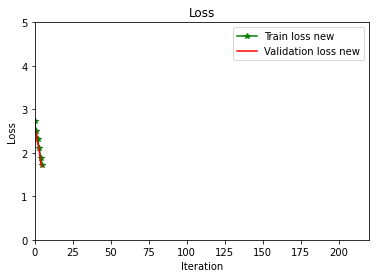

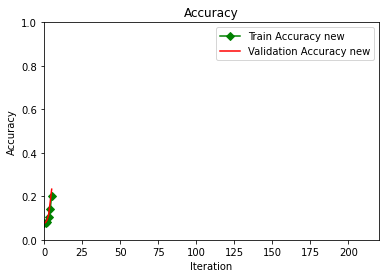

Iteration: 5, train loss: 1.7243, validation loss: 1.6822, train acc: 0.2036, validation acc: 0.2328
Step: 0 	Training Loss: 1.5523521 Training Acc: 0.23899217
Step: 1 	Training Loss: 1.6174989 Training Acc: 0.23971558
Step: 2 	Training Loss: 1.6563706 Training Acc: 0.2403448
Step: 3 	Training Loss: 1.6379347 Training Acc: 0.24104755
Step: 4 	Training Loss: 1.7720964 Training Acc: 0.24161105
Step: 5 	Training Loss: 1.6840429 Training Acc: 0.24215722
Step: 6 	Training Loss: 1.6081537 Training Acc: 0.24280706
Step: 7 	Training Loss: 1.6499249 Training Acc: 0.24351472
Step: 8 	Training Loss: 1.7284458 Training Acc: 0.24412933
Step: 9 	Training Loss: 1.7384175 Training Acc: 0.24466647
Step: 10 	Training Loss: 1.617326 Training Acc: 0.24538147
Step: 11 	Training Loss: 1.6658063 Training Acc: 0.24607879
Step: 12 	Training Loss: 1.7806123 Training Acc: 0.24651948
Step: 13 	Training Loss: 1.6538208 Training Acc: 0.24724177
Step: 14 	Training Loss: 1.6048034 Training Acc: 0.24788691
Step: 15 	T

Step: 53 	Training Loss: 1.6730704 Training Acc: 0.31857908
Step: 54 	Training Loss: 1.5607462 Training Acc: 0.31913462
Step: 55 	Training Loss: 1.6598376 Training Acc: 0.31965247
Step: 56 	Training Loss: 1.5832354 Training Acc: 0.32012078
Step: 57 	Training Loss: 1.5703562 Training Acc: 0.32055178
Step: 58 	Training Loss: 1.5569851 Training Acc: 0.32107702
Step: 59 	Training Loss: 1.5679895 Training Acc: 0.32163644
Step: 60 	Training Loss: 1.5196404 Training Acc: 0.322218
Step: 61 	Training Loss: 1.5394533 Training Acc: 0.32276207
Step: 62 	Training Loss: 1.5604839 Training Acc: 0.32330453
Step: 63 	Training Loss: 1.5764861 Training Acc: 0.3237742
Step: 64 	Training Loss: 1.6019503 Training Acc: 0.32427794
Step: 65 	Training Loss: 1.6463566 Training Acc: 0.32457924
Step: 66 	Training Loss: 1.4921575 Training Acc: 0.32516286
Step: 67 	Training Loss: 1.5419266 Training Acc: 0.32567403
Step: 0 	Validation Loss: 1.6543355 Validation Acc: 0.32610127
Step: 1 	Validation Loss: 1.5305296 Vali

Step: 20 	Training Loss: 1.4726439 Training Acc: 0.37917462
Step: 21 	Training Loss: 1.4830831 Training Acc: 0.37952667
Step: 22 	Training Loss: 1.5984647 Training Acc: 0.3799175
Step: 23 	Training Loss: 1.4788282 Training Acc: 0.38038656
Step: 24 	Training Loss: 1.4537036 Training Acc: 0.38083464
Step: 25 	Training Loss: 1.5534365 Training Acc: 0.38118285
Step: 26 	Training Loss: 1.4834406 Training Acc: 0.3816485
Step: 27 	Training Loss: 1.5874577 Training Acc: 0.38192582
Step: 28 	Training Loss: 1.4897711 Training Acc: 0.38230085
Step: 29 	Training Loss: 1.5376387 Training Acc: 0.38265526
Step: 30 	Training Loss: 1.5295168 Training Acc: 0.38304806
Step: 31 	Training Loss: 1.5017058 Training Acc: 0.38338104
Step: 32 	Training Loss: 1.5924045 Training Acc: 0.38363487
Step: 33 	Training Loss: 1.56321 Training Acc: 0.38397607
Step: 34 	Training Loss: 1.5268204 Training Acc: 0.38433594
Step: 35 	Training Loss: 1.5106826 Training Acc: 0.3846754
Step: 36 	Training Loss: 1.5447357 Training A

Step: 6 	Validation Loss: 1.643562 Validation Acc: 0.43235642
Step: 7 	Validation Loss: 1.5439558 Validation Acc: 0.432691
Step: 8 	Validation Loss: 1.4811409 Validation Acc: 0.43300802
Step: 9 	Validation Loss: 1.5257232 Validation Acc: 0.43333277
Step: 10 	Validation Loss: 1.5510939 Validation Acc: 0.4336316
Step: 11 	Validation Loss: 1.5017729 Validation Acc: 0.43395498
Step: 12 	Validation Loss: 1.554749 Validation Acc: 0.43426087
Step: 13 	Validation Loss: 1.4793428 Validation Acc: 0.43465832
Step: 14 	Validation Loss: 1.496254 Validation Acc: 0.4349628
Step: 15 	Validation Loss: 1.4719381 Validation Acc: 0.43535867
Step: 16 	Validation Loss: 1.4662013 Validation Acc: 0.4357119


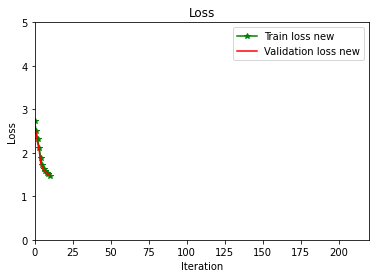

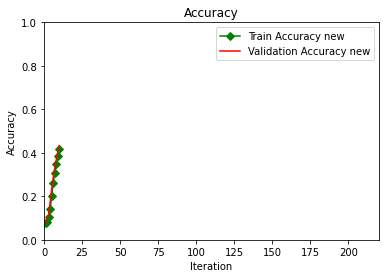

Iteration: 10, train loss: 1.4753, validation loss: 1.5195, train acc: 0.4177, validation acc: 0.4330
Step: 0 	Training Loss: 1.437444 Training Acc: 0.43605602
Step: 1 	Training Loss: 1.4548264 Training Acc: 0.43642443
Step: 2 	Training Loss: 1.46627 Training Acc: 0.43675873
Step: 3 	Training Loss: 1.4082556 Training Acc: 0.4371339
Step: 4 	Training Loss: 1.5835742 Training Acc: 0.43741688
Step: 5 	Training Loss: 1.5225753 Training Acc: 0.43764943
Step: 6 	Training Loss: 1.4619852 Training Acc: 0.43797272
Step: 7 	Training Loss: 1.4462167 Training Acc: 0.43832847
Step: 8 	Training Loss: 1.5437905 Training Acc: 0.4385676
Step: 9 	Training Loss: 1.5497985 Training Acc: 0.43885583
Step: 10 	Training Loss: 1.412548 Training Acc: 0.43925905
Step: 11 	Training Loss: 1.5324383 Training Acc: 0.43951294
Step: 12 	Training Loss: 1.5869265 Training Acc: 0.4397086
Step: 13 	Training Loss: 1.506222 Training Acc: 0.44002733
Step: 14 	Training Loss: 1.3940198 Training Acc: 0.44039473
Step: 15 	Traini

Step: 53 	Training Loss: 1.4852309 Training Acc: 0.4801196
Step: 54 	Training Loss: 1.4025948 Training Acc: 0.48042879
Step: 55 	Training Loss: 1.4945639 Training Acc: 0.48068658
Step: 56 	Training Loss: 1.4290862 Training Acc: 0.4810019
Step: 57 	Training Loss: 1.4350014 Training Acc: 0.4812152
Step: 58 	Training Loss: 1.393718 Training Acc: 0.481515
Step: 59 	Training Loss: 1.3852669 Training Acc: 0.48185763
Step: 60 	Training Loss: 1.3539307 Training Acc: 0.48219964
Step: 61 	Training Loss: 1.3686658 Training Acc: 0.48251212
Step: 62 	Training Loss: 1.3569465 Training Acc: 0.48281682
Step: 63 	Training Loss: 1.4142661 Training Acc: 0.48311377
Step: 64 	Training Loss: 1.3843979 Training Acc: 0.48341733
Step: 65 	Training Loss: 1.4592152 Training Acc: 0.4836988
Step: 66 	Training Loss: 1.3136436 Training Acc: 0.48405877
Step: 67 	Training Loss: 1.3470055 Training Acc: 0.48438218
Step: 0 	Validation Loss: 1.4656974 Validation Acc: 0.48465478
Step: 1 	Validation Loss: 1.4188163 Validati

Step: 22 	Training Loss: 1.4483979 Training Acc: 0.5180209
Step: 23 	Training Loss: 1.3326905 Training Acc: 0.5182892
Step: 24 	Training Loss: 1.3266113 Training Acc: 0.5185378
Step: 25 	Training Loss: 1.378856 Training Acc: 0.51877314
Step: 26 	Training Loss: 1.3472252 Training Acc: 0.51900804
Step: 27 	Training Loss: 1.4193182 Training Acc: 0.51926184
Step: 28 	Training Loss: 1.3525038 Training Acc: 0.5195024
Step: 29 	Training Loss: 1.4843454 Training Acc: 0.51969135
Step: 30 	Training Loss: 1.3981199 Training Acc: 0.51992476
Step: 31 	Training Loss: 1.3246229 Training Acc: 0.52017057
Step: 32 	Training Loss: 1.362237 Training Acc: 0.52041596
Step: 33 	Training Loss: 1.4158931 Training Acc: 0.5206546
Step: 34 	Training Loss: 1.3405439 Training Acc: 0.5208865
Step: 35 	Training Loss: 1.3553545 Training Acc: 0.52114344
Step: 36 	Training Loss: 1.4067023 Training Acc: 0.5213618
Step: 37 	Training Loss: 1.4378544 Training Acc: 0.521548
Step: 38 	Training Loss: 1.3386337 Training Acc: 0.

Step: 7 	Validation Loss: 1.3746505 Validation Acc: 0.55065113
Step: 8 	Validation Loss: 1.3198287 Validation Acc: 0.5508968
Step: 9 	Validation Loss: 1.3364412 Validation Acc: 0.55110174
Step: 10 	Validation Loss: 1.3919504 Validation Acc: 0.5513121
Step: 11 	Validation Loss: 1.3342006 Validation Acc: 0.551551
Step: 12 	Validation Loss: 1.2978504 Validation Acc: 0.551801
Step: 13 	Validation Loss: 1.3498443 Validation Acc: 0.55200464
Step: 14 	Validation Loss: 1.3737109 Validation Acc: 0.552231
Step: 15 	Validation Loss: 1.3254348 Validation Acc: 0.55243975
Step: 16 	Validation Loss: 1.3077881 Validation Acc: 0.55262524


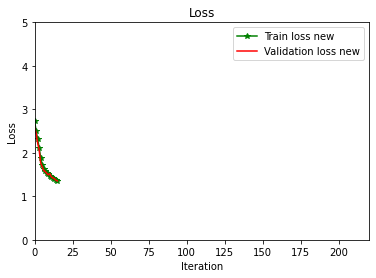

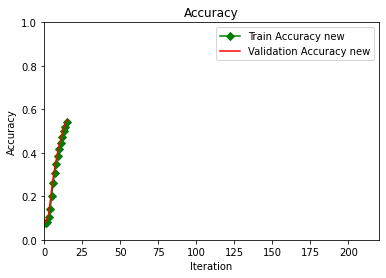

Iteration: 15, train loss: 1.3486, validation loss: 1.3532, train acc: 0.5410, validation acc: 0.5509
Step: 0 	Training Loss: 1.268531 Training Acc: 0.55287355
Step: 1 	Training Loss: 1.3392808 Training Acc: 0.55311006
Step: 2 	Training Loss: 1.3313715 Training Acc: 0.553352
Step: 3 	Training Loss: 1.3294991 Training Acc: 0.5535534
Step: 4 	Training Loss: 1.3250906 Training Acc: 0.5537889
Step: 5 	Training Loss: 1.4296398 Training Acc: 0.55398405
Step: 6 	Training Loss: 1.3133786 Training Acc: 0.55421317
Step: 7 	Training Loss: 1.2930348 Training Acc: 0.5544534
Step: 8 	Training Loss: 1.4067934 Training Acc: 0.5546704
Step: 9 	Training Loss: 1.3547769 Training Acc: 0.5548814
Step: 10 	Training Loss: 1.3397536 Training Acc: 0.55512625
Step: 11 	Training Loss: 1.298473 Training Acc: 0.5553594
Step: 12 	Training Loss: 1.3730488 Training Acc: 0.55556947
Step: 13 	Training Loss: 1.2784375 Training Acc: 0.555819
Step: 14 	Training Loss: 1.2790444 Training Acc: 0.55607384
Step: 15 	Training L

Step: 53 	Training Loss: 1.3123614 Training Acc: 0.5827114
Step: 54 	Training Loss: 1.2846627 Training Acc: 0.5829375
Step: 55 	Training Loss: 1.3409672 Training Acc: 0.5831269
Step: 56 	Training Loss: 1.2274455 Training Acc: 0.5833524
Step: 57 	Training Loss: 1.2807522 Training Acc: 0.583536
Step: 58 	Training Loss: 1.2640051 Training Acc: 0.5837454
Step: 59 	Training Loss: 1.2462487 Training Acc: 0.5839649
Step: 60 	Training Loss: 1.2668803 Training Acc: 0.5841789
Step: 61 	Training Loss: 1.2249384 Training Acc: 0.58437705
Step: 62 	Training Loss: 1.238338 Training Acc: 0.5845905
Step: 63 	Training Loss: 1.36442 Training Acc: 0.5847571
Step: 64 	Training Loss: 1.2740748 Training Acc: 0.5849441
Step: 65 	Training Loss: 1.2809792 Training Acc: 0.58514124
Step: 66 	Training Loss: 1.2282377 Training Acc: 0.5853588
Step: 67 	Training Loss: 1.2396257 Training Acc: 0.58558637
Step: 0 	Validation Loss: 1.324753 Validation Acc: 0.5857775
Step: 1 	Validation Loss: 1.2968194 Validation Acc: 0.5

Step: 20 	Training Loss: 1.2299505 Training Acc: 0.6083769
Step: 21 	Training Loss: 1.2921695 Training Acc: 0.6084873
Step: 22 	Training Loss: 1.3829265 Training Acc: 0.60857373
Step: 23 	Training Loss: 1.3105066 Training Acc: 0.60869336
Step: 24 	Training Loss: 1.2915438 Training Acc: 0.6088415
Step: 25 	Training Loss: 1.2579532 Training Acc: 0.60901797
Step: 26 	Training Loss: 1.2228953 Training Acc: 0.6092037
Step: 27 	Training Loss: 1.3440259 Training Acc: 0.60937023
Step: 28 	Training Loss: 1.2403548 Training Acc: 0.60955083
Step: 29 	Training Loss: 1.3314486 Training Acc: 0.60968846
Step: 30 	Training Loss: 1.343314 Training Acc: 0.60981166
Step: 31 	Training Loss: 1.2237935 Training Acc: 0.6099869
Step: 32 	Training Loss: 1.2279198 Training Acc: 0.6101904
Step: 33 	Training Loss: 1.25706 Training Acc: 0.6103699
Step: 34 	Training Loss: 1.2253618 Training Acc: 0.6105398
Step: 35 	Training Loss: 1.2156622 Training Acc: 0.6107378
Step: 36 	Training Loss: 1.2975 Training Acc: 0.6108

Step: 6 	Validation Loss: 1.27437 Validation Acc: 0.6308803
Step: 7 	Validation Loss: 1.2408128 Validation Acc: 0.6310309
Step: 8 	Validation Loss: 1.220238 Validation Acc: 0.6311902
Step: 9 	Validation Loss: 1.1942997 Validation Acc: 0.6313493
Step: 10 	Validation Loss: 1.2866707 Validation Acc: 0.6314819
Step: 11 	Validation Loss: 1.219177 Validation Acc: 0.6316406
Step: 12 	Validation Loss: 1.2035496 Validation Acc: 0.631808
Step: 13 	Validation Loss: 1.2608371 Validation Acc: 0.63196635
Step: 14 	Validation Loss: 1.2710655 Validation Acc: 0.63211143
Step: 15 	Validation Loss: 1.2092588 Validation Acc: 0.6322695
Step: 16 	Validation Loss: 1.2271428 Validation Acc: 0.6324142


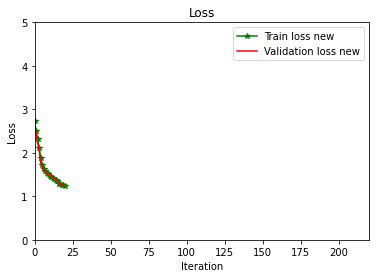

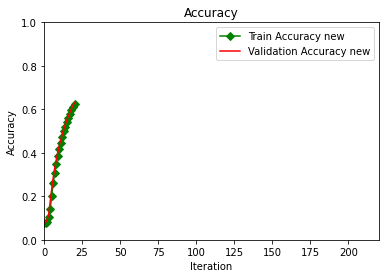

Iteration: 20, train loss: 1.2365, validation loss: 1.2377, train acc: 0.6246, validation acc: 0.6312
Step: 0 	Training Loss: 1.1621008 Training Acc: 0.63258064
Step: 1 	Training Loss: 1.2115117 Training Acc: 0.6327338
Step: 2 	Training Loss: 1.1902242 Training Acc: 0.63290423
Step: 3 	Training Loss: 1.2678164 Training Acc: 0.6330527
Step: 4 	Training Loss: 1.1709278 Training Acc: 0.6332359
Step: 5 	Training Loss: 1.2451675 Training Acc: 0.6333709
Step: 6 	Training Loss: 1.1761994 Training Acc: 0.6335406
Step: 7 	Training Loss: 1.2299571 Training Acc: 0.63369703
Step: 8 	Training Loss: 1.3050354 Training Acc: 0.6338446
Step: 9 	Training Loss: 1.2602689 Training Acc: 0.63397896
Step: 10 	Training Loss: 1.2135332 Training Acc: 0.63413924
Step: 11 	Training Loss: 1.2345564 Training Acc: 0.63428193
Step: 12 	Training Loss: 1.2810117 Training Acc: 0.6344245
Step: 13 	Training Loss: 1.2117059 Training Acc: 0.634593
Step: 14 	Training Loss: 1.228023 Training Acc: 0.6347483
Step: 15 	Training 

Step: 53 	Training Loss: 1.2486453 Training Acc: 0.65200675
Step: 54 	Training Loss: 1.213479 Training Acc: 0.65214694
Step: 55 	Training Loss: 1.287451 Training Acc: 0.6522626
Step: 56 	Training Loss: 1.1835686 Training Acc: 0.6524309
Step: 57 	Training Loss: 1.220818 Training Acc: 0.65255445
Step: 58 	Training Loss: 1.2093213 Training Acc: 0.65269005
Step: 59 	Training Loss: 1.2079904 Training Acc: 0.6528335
Step: 60 	Training Loss: 1.2135983 Training Acc: 0.6529729
Step: 61 	Training Loss: 1.2010366 Training Acc: 0.65310395
Step: 62 	Training Loss: 1.1532815 Training Acc: 0.65325516
Step: 63 	Training Loss: 1.2589613 Training Acc: 0.6533698
Step: 64 	Training Loss: 1.2275646 Training Acc: 0.6534803
Step: 65 	Training Loss: 1.2431545 Training Acc: 0.65359473
Step: 66 	Training Loss: 1.2009573 Training Acc: 0.6537292
Step: 67 	Training Loss: 1.1910695 Training Acc: 0.65386754
Step: 0 	Validation Loss: 1.2653207 Validation Acc: 0.6539897
Step: 1 	Validation Loss: 1.235246 Validation Ac

Step: 20 	Training Loss: 1.1771796 Training Acc: 0.66886145
Step: 21 	Training Loss: 1.2328782 Training Acc: 0.6689728
Step: 22 	Training Loss: 1.2397925 Training Acc: 0.66907644
Step: 23 	Training Loss: 1.1793213 Training Acc: 0.66921407
Step: 24 	Training Loss: 1.198627 Training Acc: 0.66934395
Step: 25 	Training Loss: 1.2288588 Training Acc: 0.66946244
Step: 26 	Training Loss: 1.1919951 Training Acc: 0.669577
Step: 27 	Training Loss: 1.290457 Training Acc: 0.6696801
Step: 28 	Training Loss: 1.1816874 Training Acc: 0.66980577
Step: 29 	Training Loss: 1.2511959 Training Acc: 0.66990864
Step: 30 	Training Loss: 1.2744415 Training Acc: 0.66998506
Step: 31 	Training Loss: 1.1642845 Training Acc: 0.6701104
Step: 32 	Training Loss: 1.1608391 Training Acc: 0.6702319
Step: 33 	Training Loss: 1.1983132 Training Acc: 0.6703569
Step: 34 	Training Loss: 1.1900119 Training Acc: 0.6704631
Step: 35 	Training Loss: 1.1828035 Training Acc: 0.67058045
Step: 36 	Training Loss: 1.2220043 Training Acc: 0

Step: 6 	Validation Loss: 1.2483485 Validation Acc: 0.68405896
Step: 7 	Validation Loss: 1.2167895 Validation Acc: 0.68414927
Step: 8 	Validation Loss: 1.1912673 Validation Acc: 0.6842679
Step: 9 	Validation Loss: 1.1733226 Validation Acc: 0.6843722
Step: 10 	Validation Loss: 1.2646908 Validation Acc: 0.6844516
Step: 11 	Validation Loss: 1.2006449 Validation Acc: 0.6845592
Step: 12 	Validation Loss: 1.1726224 Validation Acc: 0.684681
Step: 13 	Validation Loss: 1.2423927 Validation Acc: 0.68477076
Step: 14 	Validation Loss: 1.246741 Validation Acc: 0.68486047
Step: 15 	Validation Loss: 1.1925561 Validation Acc: 0.68496066
Step: 16 	Validation Loss: 1.2021165 Validation Acc: 0.6850467


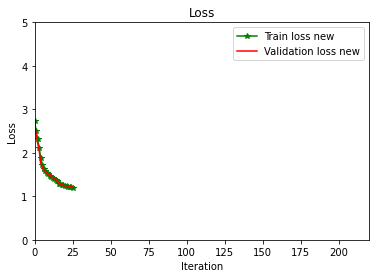

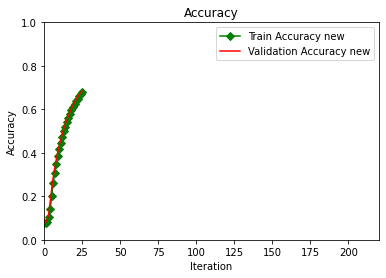

Iteration: 25, train loss: 1.1981, validation loss: 1.2152, train acc: 0.6798, validation acc: 0.6843
Step: 0 	Training Loss: 1.1456376 Training Acc: 0.6851608
Step: 1 	Training Loss: 1.1948129 Training Acc: 0.68526435
Step: 2 	Training Loss: 1.1732345 Training Acc: 0.6853712
Step: 3 	Training Loss: 1.2356329 Training Acc: 0.68546396
Step: 4 	Training Loss: 1.1523278 Training Acc: 0.6855883
Step: 5 	Training Loss: 1.2068416 Training Acc: 0.68568087
Step: 6 	Training Loss: 1.1462233 Training Acc: 0.6857979
Step: 7 	Training Loss: 1.2137187 Training Acc: 0.68589735
Step: 8 	Training Loss: 1.2643054 Training Acc: 0.68600017
Step: 9 	Training Loss: 1.2239053 Training Acc: 0.6860888
Step: 10 	Training Loss: 1.1852226 Training Acc: 0.68620205
Step: 11 	Training Loss: 1.2064358 Training Acc: 0.68630457
Step: 12 	Training Loss: 1.2268562 Training Acc: 0.6864035
Step: 13 	Training Loss: 1.1918147 Training Acc: 0.68650585
Step: 14 	Training Loss: 1.1906195 Training Acc: 0.68661165
Step: 15 	Trai

Step: 51 	Training Loss: 1.1491339 Training Acc: 0.69828504
Step: 52 	Training Loss: 1.2467132 Training Acc: 0.698357
Step: 53 	Training Loss: 1.227613 Training Acc: 0.69844216
Step: 54 	Training Loss: 1.1851177 Training Acc: 0.69854057
Step: 55 	Training Loss: 1.2735373 Training Acc: 0.6986156
Step: 56 	Training Loss: 1.2073065 Training Acc: 0.6987205
Step: 57 	Training Loss: 1.2890129 Training Acc: 0.69880205
Step: 58 	Training Loss: 1.2114344 Training Acc: 0.6988935
Step: 59 	Training Loss: 1.1907824 Training Acc: 0.69899815
Step: 60 	Training Loss: 1.1826671 Training Acc: 0.6990961
Step: 61 	Training Loss: 1.1595632 Training Acc: 0.69920385
Step: 62 	Training Loss: 1.150408 Training Acc: 0.6993049
Step: 63 	Training Loss: 1.2639883 Training Acc: 0.69937605
Step: 64 	Training Loss: 1.2819629 Training Acc: 0.6994505
Step: 65 	Training Loss: 1.2393696 Training Acc: 0.69952816
Step: 66 	Training Loss: 1.1779473 Training Acc: 0.699619
Step: 67 	Training Loss: 1.1809204 Training Acc: 0.6

Step: 19 	Training Loss: 1.1949995 Training Acc: 0.7104282
Step: 20 	Training Loss: 1.1592942 Training Acc: 0.7105164
Step: 21 	Training Loss: 1.1890455 Training Acc: 0.7106045
Step: 22 	Training Loss: 1.2209355 Training Acc: 0.71068317
Step: 23 	Training Loss: 1.1561017 Training Acc: 0.71078056
Step: 24 	Training Loss: 1.1643794 Training Acc: 0.71087164
Step: 25 	Training Loss: 1.1844466 Training Acc: 0.71095943
Step: 26 	Training Loss: 1.150886 Training Acc: 0.7110378
Step: 27 	Training Loss: 1.2730654 Training Acc: 0.7111067
Step: 28 	Training Loss: 1.1666784 Training Acc: 0.7111975
Step: 29 	Training Loss: 1.2208252 Training Acc: 0.71127254
Step: 30 	Training Loss: 1.249439 Training Acc: 0.71133816
Step: 31 	Training Loss: 1.1348084 Training Acc: 0.71143186
Step: 32 	Training Loss: 1.1404432 Training Acc: 0.71151924
Step: 33 	Training Loss: 1.1969173 Training Acc: 0.7116034
Step: 34 	Training Loss: 1.178292 Training Acc: 0.7116906
Step: 35 	Training Loss: 1.1481645 Training Acc: 0.

Step: 6 	Validation Loss: 1.2142452 Validation Acc: 0.721756
Step: 7 	Validation Loss: 1.2016076 Validation Acc: 0.7218262
Step: 8 	Validation Loss: 1.1836455 Validation Acc: 0.72190833
Step: 9 	Validation Loss: 1.133986 Validation Acc: 0.7219933
Step: 10 	Validation Loss: 1.2385678 Validation Acc: 0.7220693
Step: 11 	Validation Loss: 1.1582196 Validation Acc: 0.72215426
Step: 12 	Validation Loss: 1.1368372 Validation Acc: 0.722242
Step: 13 	Validation Loss: 1.211639 Validation Acc: 0.7223149
Step: 14 	Validation Loss: 1.2021313 Validation Acc: 0.7223818
Step: 15 	Validation Loss: 1.15646 Validation Acc: 0.7224605
Step: 16 	Validation Loss: 1.1868253 Validation Acc: 0.72253025


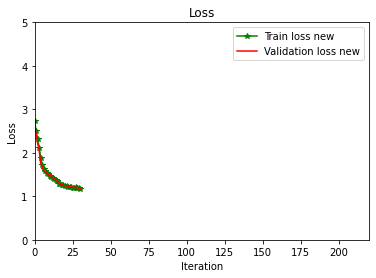

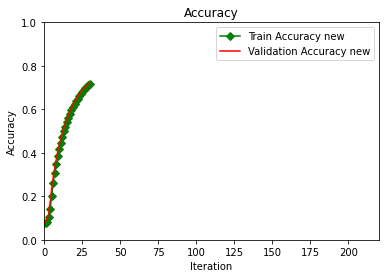

Iteration: 30, train loss: 1.1792, validation loss: 1.1836, train acc: 0.7186, validation acc: 0.7219
Step: 0 	Training Loss: 1.109328 Training Acc: 0.72261477
Step: 1 	Training Loss: 1.1403203 Training Acc: 0.72269624
Step: 2 	Training Loss: 1.1296933 Training Acc: 0.72278064
Step: 3 	Training Loss: 1.220151 Training Acc: 0.72284126
Step: 4 	Training Loss: 1.1217356 Training Acc: 0.72292554
Step: 5 	Training Loss: 1.1729927 Training Acc: 0.722995
Step: 6 	Training Loss: 1.1352673 Training Acc: 0.72308207
Step: 7 	Training Loss: 1.1822152 Training Acc: 0.7231543
Step: 8 	Training Loss: 1.2285061 Training Acc: 0.72322065
Step: 9 	Training Loss: 1.2069906 Training Acc: 0.7232898
Step: 10 	Training Loss: 1.1650558 Training Acc: 0.7233737
Step: 11 	Training Loss: 1.1805663 Training Acc: 0.7234487
Step: 12 	Training Loss: 1.2140398 Training Acc: 0.7235178
Step: 13 	Training Loss: 1.1696417 Training Acc: 0.72359556
Step: 14 	Training Loss: 1.1771996 Training Acc: 0.7236704
Step: 15 	Training

Step: 51 	Training Loss: 1.1177254 Training Acc: 0.7320132
Step: 52 	Training Loss: 1.206989 Training Acc: 0.73207605
Step: 53 	Training Loss: 1.2112935 Training Acc: 0.7321417
Step: 54 	Training Loss: 1.1937046 Training Acc: 0.73221284
Step: 55 	Training Loss: 1.25158 Training Acc: 0.7322671
Step: 56 	Training Loss: 1.1391548 Training Acc: 0.73235226
Step: 57 	Training Loss: 1.1787775 Training Acc: 0.73242044
Step: 58 	Training Loss: 1.1871943 Training Acc: 0.73248583
Step: 59 	Training Loss: 1.1729152 Training Acc: 0.73256236
Step: 60 	Training Loss: 1.1712573 Training Acc: 0.7326389
Step: 61 	Training Loss: 1.1545994 Training Acc: 0.7327153
Step: 62 	Training Loss: 1.1507256 Training Acc: 0.7327889
Step: 63 	Training Loss: 1.2233021 Training Acc: 0.7328428
Step: 64 	Training Loss: 1.1838422 Training Acc: 0.7329023
Step: 65 	Training Loss: 1.2060862 Training Acc: 0.73295885
Step: 66 	Training Loss: 1.1721652 Training Acc: 0.7330295
Step: 67 	Training Loss: 1.1601193 Training Acc: 0.7

Step: 18 	Training Loss: 1.1484847 Training Acc: 0.74120456
Step: 19 	Training Loss: 1.1566167 Training Acc: 0.74126935
Step: 20 	Training Loss: 1.1506736 Training Acc: 0.74133945
Step: 21 	Training Loss: 1.164109 Training Acc: 0.74139875
Step: 22 	Training Loss: 1.2134328 Training Acc: 0.7414607
Step: 23 	Training Loss: 1.1311159 Training Acc: 0.741536
Step: 24 	Training Loss: 1.1440685 Training Acc: 0.74160594
Step: 25 	Training Loss: 1.1744647 Training Acc: 0.7416731
Step: 26 	Training Loss: 1.1682184 Training Acc: 0.7417322
Step: 27 	Training Loss: 1.2653136 Training Acc: 0.7417832
Step: 28 	Training Loss: 1.1457539 Training Acc: 0.7418556
Step: 29 	Training Loss: 1.213553 Training Acc: 0.74191725
Step: 30 	Training Loss: 1.2332853 Training Acc: 0.74196815
Step: 31 	Training Loss: 1.1155438 Training Acc: 0.7420324
Step: 32 	Training Loss: 1.1382766 Training Acc: 0.742094
Step: 33 	Training Loss: 1.1749951 Training Acc: 0.74215543
Step: 34 	Training Loss: 1.1492941 Training Acc: 0.7

Step: 7 	Validation Loss: 1.1849701 Validation Acc: 0.74999744
Step: 8 	Validation Loss: 1.1683517 Validation Acc: 0.7500589
Step: 9 	Validation Loss: 1.1061025 Validation Acc: 0.75013304
Step: 10 	Validation Loss: 1.2167566 Validation Acc: 0.7501816
Step: 11 	Validation Loss: 1.1522977 Validation Acc: 0.7502455
Step: 12 	Validation Loss: 1.1323588 Validation Acc: 0.750317
Step: 13 	Validation Loss: 1.1920507 Validation Acc: 0.7503731
Step: 14 	Validation Loss: 1.1910357 Validation Acc: 0.7504241
Step: 15 	Validation Loss: 1.1432505 Validation Acc: 0.75049037
Step: 16 	Validation Loss: 1.1646383 Validation Acc: 0.75055146


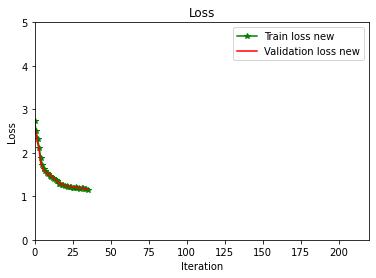

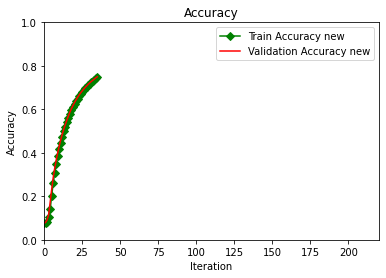

Iteration: 35, train loss: 1.1561, validation loss: 1.1688, train acc: 0.7475, validation acc: 0.7501
Step: 0 	Training Loss: 1.1092407 Training Acc: 0.7506176
Step: 1 	Training Loss: 1.1427395 Training Acc: 0.7506838
Step: 2 	Training Loss: 1.1279922 Training Acc: 0.75075245
Step: 3 	Training Loss: 1.1918588 Training Acc: 0.75079554
Step: 4 	Training Loss: 1.1044387 Training Acc: 0.7508692
Step: 5 	Training Loss: 1.1460354 Training Acc: 0.75092244
Step: 6 	Training Loss: 1.1070948 Training Acc: 0.75098836
Step: 7 	Training Loss: 1.1579837 Training Acc: 0.75104403
Step: 8 	Training Loss: 1.2028399 Training Acc: 0.7510895
Step: 9 	Training Loss: 1.1955019 Training Acc: 0.7511324
Step: 10 	Training Loss: 1.1473622 Training Acc: 0.75119567
Step: 11 	Training Loss: 1.1701258 Training Acc: 0.7512436
Step: 12 	Training Loss: 1.1902534 Training Acc: 0.751294
Step: 13 	Training Loss: 1.1449726 Training Acc: 0.7513521
Step: 14 	Training Loss: 1.1246586 Training Acc: 0.75141007
Step: 15 	Trainin

Step: 51 	Training Loss: 1.0852754 Training Acc: 0.7581693
Step: 52 	Training Loss: 1.167875 Training Acc: 0.75821316
Step: 53 	Training Loss: 1.1637743 Training Acc: 0.75826186
Step: 54 	Training Loss: 1.1589546 Training Acc: 0.758313
Step: 55 	Training Loss: 1.2104996 Training Acc: 0.7583543
Step: 56 	Training Loss: 1.1271893 Training Acc: 0.75842005
Step: 57 	Training Loss: 1.1466733 Training Acc: 0.7584784
Step: 58 	Training Loss: 1.1545143 Training Acc: 0.75853425
Step: 59 	Training Loss: 1.1467266 Training Acc: 0.75859255
Step: 60 	Training Loss: 1.1710929 Training Acc: 0.7586508
Step: 61 	Training Loss: 1.1401916 Training Acc: 0.75871384
Step: 62 	Training Loss: 1.1129321 Training Acc: 0.75877446
Step: 63 	Training Loss: 1.1813054 Training Acc: 0.7588155
Step: 64 	Training Loss: 1.1627457 Training Acc: 0.75885904
Step: 65 	Training Loss: 1.1844816 Training Acc: 0.7589025
Step: 66 	Training Loss: 1.1318756 Training Acc: 0.758963
Step: 67 	Training Loss: 1.1187671 Training Acc: 0.

Step: 20 	Training Loss: 1.1259899 Training Acc: 0.76544
Step: 21 	Training Loss: 1.1387545 Training Acc: 0.7654892
Step: 22 	Training Loss: 1.2054722 Training Acc: 0.76553607
Step: 23 	Training Loss: 1.1285505 Training Acc: 0.7655946
Step: 24 	Training Loss: 1.1308424 Training Acc: 0.76564604
Step: 25 	Training Loss: 1.1456362 Training Acc: 0.76569515
Step: 26 	Training Loss: 1.1517161 Training Acc: 0.7657419
Step: 27 	Training Loss: 1.2398099 Training Acc: 0.76577693
Step: 28 	Training Loss: 1.1100343 Training Acc: 0.7658329
Step: 29 	Training Loss: 1.1938112 Training Acc: 0.76587725
Step: 30 	Training Loss: 1.2436867 Training Acc: 0.7659122
Step: 31 	Training Loss: 1.1724772 Training Acc: 0.76595646
Step: 32 	Training Loss: 1.1367097 Training Acc: 0.7660007
Step: 33 	Training Loss: 1.1387405 Training Acc: 0.76604956
Step: 34 	Training Loss: 1.1578469 Training Acc: 0.76610076
Step: 35 	Training Loss: 1.1587183 Training Acc: 0.76615655
Step: 36 	Training Loss: 1.1481887 Training Acc: 

Step: 9 	Validation Loss: 1.3124466 Validation Acc: 0.77135074
Step: 10 	Validation Loss: 1.4224507 Validation Acc: 0.77136254
Step: 11 	Validation Loss: 1.3998303 Validation Acc: 0.77137214
Step: 12 	Validation Loss: 1.344036 Validation Acc: 0.7713907
Step: 13 	Validation Loss: 1.413543 Validation Acc: 0.7713935
Step: 14 	Validation Loss: 1.3963146 Validation Acc: 0.7713941
Step: 15 	Validation Loss: 1.3357506 Validation Acc: 0.7714171
Step: 16 	Validation Loss: 1.3360804 Validation Acc: 0.7714379


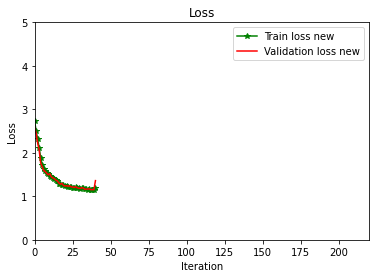

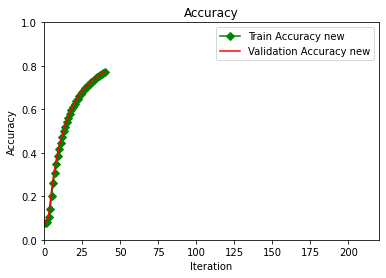

Iteration: 40, train loss: 1.1953, validation loss: 1.3611, train acc: 0.7701, validation acc: 0.7713
Step: 0 	Training Loss: 1.248293 Training Acc: 0.77146757
Step: 1 	Training Loss: 1.3621184 Training Acc: 0.7714928
Step: 2 	Training Loss: 1.3376703 Training Acc: 0.771509
Step: 3 	Training Loss: 1.3832003 Training Acc: 0.7715185
Step: 4 	Training Loss: 1.2733223 Training Acc: 0.77152133
Step: 5 	Training Loss: 1.2710712 Training Acc: 0.7715196
Step: 6 	Training Loss: 1.3043532 Training Acc: 0.77151793
Step: 7 	Training Loss: 1.344445 Training Acc: 0.7715095
Step: 8 	Training Loss: 1.3444077 Training Acc: 0.7715056
Step: 9 	Training Loss: 1.3150046 Training Acc: 0.771533
Step: 10 	Training Loss: 1.1906841 Training Acc: 0.77157825
Step: 11 	Training Loss: 1.2508879 Training Acc: 0.77161
Step: 12 	Training Loss: 1.2750547 Training Acc: 0.77164185
Step: 13 	Training Loss: 1.219139 Training Acc: 0.77169144
Step: 14 	Training Loss: 1.1870131 Training Acc: 0.7717388
Step: 15 	Training Loss:

Step: 52 	Training Loss: 1.1933261 Training Acc: 0.77702135
Step: 53 	Training Loss: 1.1841699 Training Acc: 0.77706134
Step: 54 	Training Loss: 1.1677035 Training Acc: 0.7771056
Step: 55 	Training Loss: 1.2326906 Training Acc: 0.77713263
Step: 56 	Training Loss: 1.1213989 Training Acc: 0.77718115
Step: 57 	Training Loss: 1.1942729 Training Acc: 0.7772253
Step: 58 	Training Loss: 1.146249 Training Acc: 0.7772695
Step: 59 	Training Loss: 1.1286423 Training Acc: 0.77731794
Step: 60 	Training Loss: 1.1458436 Training Acc: 0.7773599
Step: 61 	Training Loss: 1.1146252 Training Acc: 0.7774083
Step: 62 	Training Loss: 1.0978689 Training Acc: 0.77746093
Step: 63 	Training Loss: 1.1980959 Training Acc: 0.7774964
Step: 64 	Training Loss: 1.1742791 Training Acc: 0.77752537
Step: 65 	Training Loss: 1.1833705 Training Acc: 0.7775629
Step: 66 	Training Loss: 1.1264019 Training Acc: 0.77760905
Step: 67 	Training Loss: 1.1226909 Training Acc: 0.7776573
Step: 0 	Validation Loss: 1.1590698 Validation Ac

Step: 19 	Training Loss: 1.163517 Training Acc: 0.78276885
Step: 20 	Training Loss: 1.1295689 Training Acc: 0.78281206
Step: 21 	Training Loss: 1.1245227 Training Acc: 0.7828553
Step: 22 	Training Loss: 1.1640441 Training Acc: 0.7828922
Step: 23 	Training Loss: 1.1151214 Training Acc: 0.78293955
Step: 24 	Training Loss: 1.1246629 Training Acc: 0.78298473
Step: 25 	Training Loss: 1.1299399 Training Acc: 0.7830299
Step: 26 	Training Loss: 1.1284268 Training Acc: 0.78306466
Step: 27 	Training Loss: 1.2653184 Training Acc: 0.7830912
Step: 28 	Training Loss: 1.1309094 Training Acc: 0.7831342
Step: 29 	Training Loss: 1.1812901 Training Acc: 0.783171
Step: 30 	Training Loss: 1.202481 Training Acc: 0.7832016
Step: 31 	Training Loss: 1.1209326 Training Acc: 0.78324664
Step: 32 	Training Loss: 1.1466343 Training Acc: 0.78328127
Step: 33 	Training Loss: 1.1888667 Training Acc: 0.78331804
Step: 34 	Training Loss: 1.1444392 Training Acc: 0.7833568
Step: 35 	Training Loss: 1.1281433 Training Acc: 0.

Step: 4 	Validation Loss: 1.1031258 Validation Acc: 0.7882267
Step: 5 	Validation Loss: 1.1538908 Validation Acc: 0.78826505
Step: 6 	Validation Loss: 1.1488448 Validation Acc: 0.7883053
Step: 7 	Validation Loss: 1.1748459 Validation Acc: 0.78833956
Step: 8 	Validation Loss: 1.1496427 Validation Acc: 0.7883797
Step: 9 	Validation Loss: 1.0709548 Validation Acc: 0.78843
Step: 10 	Validation Loss: 1.1852576 Validation Acc: 0.78846616
Step: 11 	Validation Loss: 1.1398752 Validation Acc: 0.7885043
Step: 12 	Validation Loss: 1.0996821 Validation Acc: 0.7885545
Step: 13 	Validation Loss: 1.163965 Validation Acc: 0.7885906
Step: 14 	Validation Loss: 1.1657505 Validation Acc: 0.7886247
Step: 15 	Validation Loss: 1.1014061 Validation Acc: 0.78866875
Step: 16 	Validation Loss: 1.120629 Validation Acc: 0.7887148


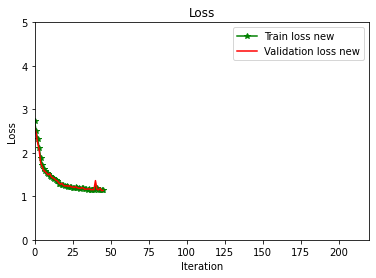

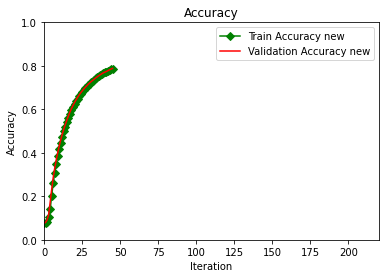

Iteration: 45, train loss: 1.1384, validation loss: 1.1364, train acc: 0.7867, validation acc: 0.7884
Step: 0 	Training Loss: 1.0692073 Training Acc: 0.78876084
Step: 1 	Training Loss: 1.1105645 Training Acc: 0.7888049
Step: 2 	Training Loss: 1.1063514 Training Acc: 0.78884685
Step: 3 	Training Loss: 1.1697145 Training Acc: 0.78887886
Step: 4 	Training Loss: 1.0845864 Training Acc: 0.7889288
Step: 5 	Training Loss: 1.1288188 Training Acc: 0.78896475
Step: 6 	Training Loss: 1.0872788 Training Acc: 0.7890126
Step: 7 	Training Loss: 1.1108853 Training Acc: 0.7890505
Step: 8 	Training Loss: 1.1762818 Training Acc: 0.78908044
Step: 9 	Training Loss: 1.1676197 Training Acc: 0.7891123
Step: 10 	Training Loss: 1.1395351 Training Acc: 0.7891542
Step: 11 	Training Loss: 1.1252215 Training Acc: 0.78918797
Step: 12 	Training Loss: 1.1787426 Training Acc: 0.7892238
Step: 13 	Training Loss: 1.1398766 Training Acc: 0.7892596
Step: 14 	Training Loss: 1.1280496 Training Acc: 0.7892974
Step: 15 	Trainin

Step: 54 	Training Loss: 1.1450601 Training Acc: 0.7938503
Step: 55 	Training Loss: 1.208749 Training Acc: 0.7938761
Step: 56 	Training Loss: 1.1020536 Training Acc: 0.79391736
Step: 57 	Training Loss: 1.1446589 Training Acc: 0.79395276
Step: 58 	Training Loss: 1.1449108 Training Acc: 0.79398817
Step: 59 	Training Loss: 1.1108773 Training Acc: 0.79402745
Step: 60 	Training Loss: 1.1250072 Training Acc: 0.79406667
Step: 61 	Training Loss: 1.1011891 Training Acc: 0.7941078
Step: 62 	Training Loss: 1.087611 Training Acc: 0.7941489
Step: 63 	Training Loss: 1.1632879 Training Acc: 0.7941765
Step: 64 	Training Loss: 1.1490219 Training Acc: 0.7942041
Step: 65 	Training Loss: 1.1633669 Training Acc: 0.7942336
Step: 66 	Training Loss: 1.1124876 Training Acc: 0.7942728
Step: 67 	Training Loss: 1.1099033 Training Acc: 0.7943157
Step: 0 	Validation Loss: 1.1576912 Validation Acc: 0.7943509
Step: 1 	Validation Loss: 1.1766782 Validation Acc: 0.79437655
Step: 2 	Validation Loss: 1.1746671 Validation

Step: 21 	Training Loss: 1.2279539 Training Acc: 0.7982315
Step: 22 	Training Loss: 1.2330546 Training Acc: 0.79825914
Step: 23 	Training Loss: 1.2034998 Training Acc: 0.798298
Step: 24 	Training Loss: 1.1780092 Training Acc: 0.79832935
Step: 25 	Training Loss: 1.2023598 Training Acc: 0.79835886
Step: 26 	Training Loss: 1.1467074 Training Acc: 0.7983883
Step: 27 	Training Loss: 1.2019337 Training Acc: 0.7984103
Step: 28 	Training Loss: 1.1322963 Training Acc: 0.79844534
Step: 29 	Training Loss: 1.1809257 Training Acc: 0.79847664
Step: 30 	Training Loss: 1.215794 Training Acc: 0.7985004
Step: 31 	Training Loss: 1.1211188 Training Acc: 0.79853916
Step: 32 	Training Loss: 1.1233406 Training Acc: 0.7985741
Step: 33 	Training Loss: 1.1725757 Training Acc: 0.7986053
Step: 34 	Training Loss: 1.1608126 Training Acc: 0.79863095
Step: 35 	Training Loss: 1.1500155 Training Acc: 0.7986696
Step: 36 	Training Loss: 1.1508782 Training Acc: 0.79869336
Step: 37 	Training Loss: 1.2193438 Training Acc: 0

Step: 7 	Validation Loss: 1.1588469 Validation Acc: 0.8026956
Step: 8 	Validation Loss: 1.1275367 Validation Acc: 0.8027303
Step: 9 	Validation Loss: 1.0497322 Validation Acc: 0.8027741
Step: 10 	Validation Loss: 1.1626234 Validation Acc: 0.8028052
Step: 11 	Validation Loss: 1.1033158 Validation Acc: 0.8028417
Step: 12 	Validation Loss: 1.0818995 Validation Acc: 0.80288184
Step: 13 	Validation Loss: 1.1373514 Validation Acc: 0.8029129
Step: 14 	Validation Loss: 1.1462213 Validation Acc: 0.802944
Step: 15 	Validation Loss: 1.0994942 Validation Acc: 0.80297863
Step: 16 	Validation Loss: 1.1069925 Validation Acc: 0.80301684


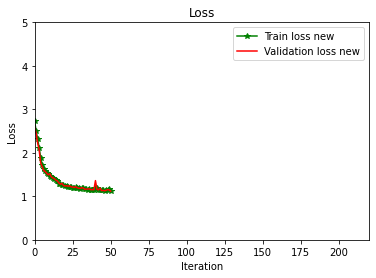

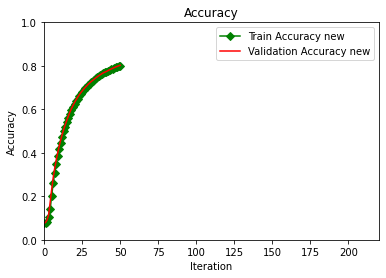

Iteration: 50, train loss: 1.1267, validation loss: 1.1181, train acc: 0.8014, validation acc: 0.8027
Step: 0 	Training Loss: 1.0606337 Training Acc: 0.8030569
Step: 1 	Training Loss: 1.1020672 Training Acc: 0.8030951
Step: 2 	Training Loss: 1.0845077 Training Acc: 0.80313146
Step: 3 	Training Loss: 1.1580024 Training Acc: 0.80315524
Step: 4 	Training Loss: 1.0733004 Training Acc: 0.803197
Step: 5 	Training Loss: 1.1102954 Training Acc: 0.80322796
Step: 6 	Training Loss: 1.0673938 Training Acc: 0.80326784
Step: 7 	Training Loss: 1.1026425 Training Acc: 0.8033042
Step: 8 	Training Loss: 1.1661997 Training Acc: 0.80332965
Step: 9 	Training Loss: 1.1567378 Training Acc: 0.80335695
Step: 10 	Training Loss: 1.1188264 Training Acc: 0.8033914
Step: 11 	Training Loss: 1.1078026 Training Acc: 0.8034223
Step: 12 	Training Loss: 1.1536927 Training Acc: 0.8034513
Step: 13 	Training Loss: 1.1107733 Training Acc: 0.8034803
Step: 14 	Training Loss: 1.1038626 Training Acc: 0.80350935
Step: 15 	Trainin

Step: 54 	Training Loss: 1.1297382 Training Acc: 0.80734986
Step: 55 	Training Loss: 1.1996932 Training Acc: 0.807372
Step: 56 	Training Loss: 1.0804254 Training Acc: 0.807408
Step: 57 	Training Loss: 1.129209 Training Acc: 0.80743533
Step: 58 	Training Loss: 1.1077818 Training Acc: 0.8074661
Step: 59 	Training Loss: 1.1066613 Training Acc: 0.80749863
Step: 60 	Training Loss: 1.1084247 Training Acc: 0.8075311
Step: 61 	Training Loss: 1.0808852 Training Acc: 0.80756706
Step: 62 	Training Loss: 1.0707631 Training Acc: 0.8076048
Step: 63 	Training Loss: 1.1379323 Training Acc: 0.80763197
Step: 64 	Training Loss: 1.1133194 Training Acc: 0.80765575
Step: 65 	Training Loss: 1.1452384 Training Acc: 0.8076864
Step: 66 	Training Loss: 1.0998049 Training Acc: 0.80772233
Step: 67 	Training Loss: 1.079922 Training Acc: 0.8077582
Step: 0 	Validation Loss: 1.1322448 Validation Acc: 0.8077906
Step: 1 	Validation Loss: 1.159867 Validation Acc: 0.8078108
Step: 2 	Validation Loss: 1.1402166 Validation A

Step: 22 	Training Loss: 1.1288865 Training Acc: 0.8115533
Step: 23 	Training Loss: 1.1054581 Training Acc: 0.81158566
Step: 24 	Training Loss: 1.1067643 Training Acc: 0.81161803
Step: 25 	Training Loss: 1.1166329 Training Acc: 0.811647
Step: 26 	Training Loss: 1.0989137 Training Acc: 0.81167424
Step: 27 	Training Loss: 1.2019722 Training Acc: 0.811693
Step: 28 	Training Loss: 1.0858753 Training Acc: 0.81172705
Step: 29 	Training Loss: 1.1476722 Training Acc: 0.81175596
Step: 30 	Training Loss: 1.1805488 Training Acc: 0.81177807
Step: 31 	Training Loss: 1.0646164 Training Acc: 0.81181544
Step: 32 	Training Loss: 1.1066465 Training Acc: 0.811846
Step: 33 	Training Loss: 1.1448231 Training Acc: 0.81187147
Step: 34 	Training Loss: 1.1043844 Training Acc: 0.811897
Step: 35 	Training Loss: 1.1002762 Training Acc: 0.81192917
Step: 36 	Training Loss: 1.101398 Training Acc: 0.81196135
Step: 37 	Training Loss: 1.1565979 Training Acc: 0.81198174
Step: 38 	Training Loss: 1.1226772 Training Acc: 0

Step: 7 	Validation Loss: 1.125015 Validation Acc: 0.8154155
Step: 8 	Validation Loss: 1.1119275 Validation Acc: 0.81544614
Step: 9 	Validation Loss: 1.0483463 Validation Acc: 0.81548333
Step: 10 	Validation Loss: 1.1670171 Validation Acc: 0.81551063
Step: 11 	Validation Loss: 1.0871199 Validation Acc: 0.8155429
Step: 12 	Validation Loss: 1.0751245 Validation Acc: 0.81557673
Step: 13 	Validation Loss: 1.1297259 Validation Acc: 0.815604
Step: 14 	Validation Loss: 1.1411806 Validation Acc: 0.81562793
Step: 15 	Validation Loss: 1.0906526 Validation Acc: 0.8156618
Step: 16 	Validation Loss: 1.1100919 Validation Acc: 0.8156939


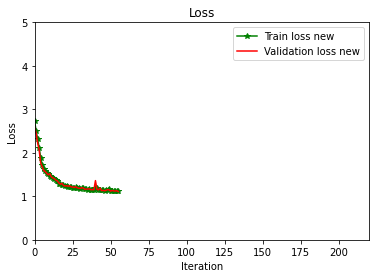

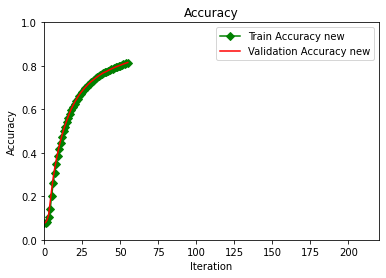

Iteration: 55, train loss: 1.1204, validation loss: 1.1091, train acc: 0.8142, validation acc: 0.8155
Step: 0 	Training Loss: 1.0534428 Training Acc: 0.815731
Step: 1 	Training Loss: 1.1111755 Training Acc: 0.8157615
Step: 2 	Training Loss: 1.0776281 Training Acc: 0.81579196
Step: 3 	Training Loss: 1.1503851 Training Acc: 0.81581426
Step: 4 	Training Loss: 1.0662574 Training Acc: 0.8158496
Step: 5 	Training Loss: 1.1093366 Training Acc: 0.81588006
Step: 6 	Training Loss: 1.0672431 Training Acc: 0.8159138
Step: 7 	Training Loss: 1.0946426 Training Acc: 0.8159442
Step: 8 	Training Loss: 1.1603442 Training Acc: 0.8159664
Step: 9 	Training Loss: 1.1495558 Training Acc: 0.8159902
Step: 10 	Training Loss: 1.1133698 Training Acc: 0.816019
Step: 11 	Training Loss: 1.1029605 Training Acc: 0.81604606
Step: 12 	Training Loss: 1.1470857 Training Acc: 0.8160715
Step: 13 	Training Loss: 1.1216643 Training Acc: 0.8160953
Step: 14 	Training Loss: 1.106538 Training Acc: 0.81612074
Step: 15 	Training Lo

Step: 52 	Training Loss: 1.155657 Training Acc: 0.819322
Step: 53 	Training Loss: 1.1390064 Training Acc: 0.8193429
Step: 54 	Training Loss: 1.1340396 Training Acc: 0.81936705
Step: 55 	Training Loss: 1.2023265 Training Acc: 0.81938475
Step: 56 	Training Loss: 1.0785205 Training Acc: 0.8194168
Step: 57 	Training Loss: 1.1291424 Training Acc: 0.8194409
Step: 58 	Training Loss: 1.1361501 Training Acc: 0.8194634
Step: 59 	Training Loss: 1.0971422 Training Acc: 0.8194906
Step: 60 	Training Loss: 1.106884 Training Acc: 0.81951785
Step: 61 	Training Loss: 1.0862775 Training Acc: 0.8195451
Step: 62 	Training Loss: 1.0682888 Training Acc: 0.8195771
Step: 63 	Training Loss: 1.1459382 Training Acc: 0.8196011
Step: 64 	Training Loss: 1.1182678 Training Acc: 0.81961876
Step: 65 	Training Loss: 1.1358068 Training Acc: 0.81964433
Step: 66 	Training Loss: 1.0918217 Training Acc: 0.81967473
Step: 67 	Training Loss: 1.0721195 Training Acc: 0.81970507
Step: 0 	Validation Loss: 1.1291885 Validation Acc: 

Step: 21 	Training Loss: 1.0848725 Training Acc: 0.8229322
Step: 22 	Training Loss: 1.1159548 Training Acc: 0.822958
Step: 23 	Training Loss: 1.099444 Training Acc: 0.8229854
Step: 24 	Training Loss: 1.0872526 Training Acc: 0.82301277
Step: 25 	Training Loss: 1.120077 Training Acc: 0.8230355
Step: 26 	Training Loss: 1.129349 Training Acc: 0.82305664
Step: 27 	Training Loss: 1.1832254 Training Acc: 0.82307315
Step: 28 	Training Loss: 1.0825236 Training Acc: 0.823102
Step: 29 	Training Loss: 1.1771721 Training Acc: 0.82312316
Step: 30 	Training Loss: 1.2167064 Training Acc: 0.82313496
Step: 31 	Training Loss: 1.1404555 Training Acc: 0.82315296
Step: 32 	Training Loss: 1.1967975 Training Acc: 0.8231602
Step: 33 	Training Loss: 1.1488295 Training Acc: 0.8231751
Step: 34 	Training Loss: 1.09973 Training Acc: 0.8231993
Step: 35 	Training Loss: 1.1018804 Training Acc: 0.8232265
Step: 36 	Training Loss: 1.0820566 Training Acc: 0.8232538
Step: 37 	Training Loss: 1.1292558 Training Acc: 0.823270

Step: 6 	Validation Loss: 1.1306777 Validation Acc: 0.8262002
Step: 7 	Validation Loss: 1.1130755 Validation Acc: 0.8262232
Step: 8 	Validation Loss: 1.1111624 Validation Acc: 0.82624924
Step: 9 	Validation Loss: 1.0558836 Validation Acc: 0.82628125
Step: 10 	Validation Loss: 1.1620355 Validation Acc: 0.82630277
Step: 11 	Validation Loss: 1.0904382 Validation Acc: 0.82633024
Step: 12 	Validation Loss: 1.0818679 Validation Acc: 0.82636076
Step: 13 	Validation Loss: 1.1225346 Validation Acc: 0.8263867
Step: 14 	Validation Loss: 1.1367241 Validation Acc: 0.82640815
Step: 15 	Validation Loss: 1.0820584 Validation Acc: 0.8264341
Step: 16 	Validation Loss: 1.0950297 Validation Acc: 0.82646006


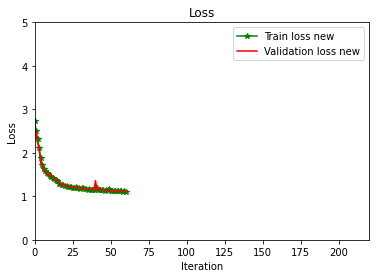

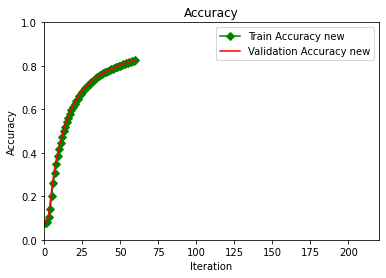

Iteration: 60, train loss: 1.1097, validation loss: 1.1066, train acc: 0.8252, validation acc: 0.8263
Step: 0 	Training Loss: 1.0609783 Training Acc: 0.82649046
Step: 1 	Training Loss: 1.1018856 Training Acc: 0.8265164
Step: 2 	Training Loss: 1.0696592 Training Acc: 0.8265438
Step: 3 	Training Loss: 1.1615372 Training Acc: 0.8265592
Step: 4 	Training Loss: 1.0818901 Training Acc: 0.8265881
Step: 5 	Training Loss: 1.1293771 Training Acc: 0.82661545
Step: 6 	Training Loss: 1.0696762 Training Acc: 0.82664436
Step: 7 	Training Loss: 1.1031737 Training Acc: 0.8266702
Step: 8 	Training Loss: 1.1561108 Training Acc: 0.8266885
Step: 9 	Training Loss: 1.1503551 Training Acc: 0.8267069
Step: 10 	Training Loss: 1.1097066 Training Acc: 0.8267312
Step: 11 	Training Loss: 1.1054974 Training Acc: 0.826757
Step: 12 	Training Loss: 1.13857 Training Acc: 0.82677835
Step: 13 	Training Loss: 1.1004214 Training Acc: 0.8268011
Step: 14 	Training Loss: 1.102958 Training Acc: 0.82682544
Step: 15 	Training Los

Step: 53 	Training Loss: 1.124789 Training Acc: 0.8297597
Step: 54 	Training Loss: 1.1186252 Training Acc: 0.8297814
Step: 55 	Training Loss: 1.1902766 Training Acc: 0.8297958
Step: 56 	Training Loss: 1.0740247 Training Acc: 0.8298233
Step: 57 	Training Loss: 1.1107798 Training Acc: 0.82984644
Step: 58 	Training Loss: 1.113718 Training Acc: 0.82986957
Step: 59 	Training Loss: 1.0863638 Training Acc: 0.8298927
Step: 60 	Training Loss: 1.1002622 Training Acc: 0.8299173
Step: 61 	Training Loss: 1.0674685 Training Acc: 0.8299448
Step: 62 	Training Loss: 1.0581591 Training Acc: 0.82997084
Step: 63 	Training Loss: 1.1176498 Training Acc: 0.8299939
Step: 64 	Training Loss: 1.1094576 Training Acc: 0.8300126
Step: 65 	Training Loss: 1.1498072 Training Acc: 0.8300342
Step: 66 	Training Loss: 1.0997097 Training Acc: 0.8300602
Step: 67 	Training Loss: 1.1000736 Training Acc: 0.8300847
Step: 0 	Validation Loss: 1.2086731 Validation Acc: 0.83009607
Step: 1 	Validation Loss: 1.2356002 Validation Acc:

Step: 21 	Training Loss: 1.0805423 Training Acc: 0.8325977
Step: 22 	Training Loss: 1.1132888 Training Acc: 0.8326197
Step: 23 	Training Loss: 1.1020517 Training Acc: 0.8326432
Step: 24 	Training Loss: 1.0672243 Training Acc: 0.8326681
Step: 25 	Training Loss: 1.1097901 Training Acc: 0.83268875
Step: 26 	Training Loss: 1.0911629 Training Acc: 0.8327079
Step: 27 	Training Loss: 1.1822226 Training Acc: 0.8327199
Step: 28 	Training Loss: 1.0756505 Training Acc: 0.8327448
Step: 29 	Training Loss: 1.12828 Training Acc: 0.83276534
Step: 30 	Training Loss: 1.1716832 Training Acc: 0.8327817
Step: 31 	Training Loss: 1.055924 Training Acc: 0.83281076
Step: 32 	Training Loss: 1.0759103 Training Acc: 0.8328356
Step: 33 	Training Loss: 1.1026098 Training Acc: 0.83285475
Step: 34 	Training Loss: 1.077579 Training Acc: 0.83287674
Step: 35 	Training Loss: 1.0916044 Training Acc: 0.83290154
Step: 36 	Training Loss: 1.0757363 Training Acc: 0.8329249
Step: 37 	Training Loss: 1.114976 Training Acc: 0.8329

Step: 7 	Validation Loss: 1.1098273 Validation Acc: 0.8355651
Step: 8 	Validation Loss: 1.0912399 Validation Acc: 0.83558744
Step: 9 	Validation Loss: 1.02952 Validation Acc: 0.835614
Step: 10 	Validation Loss: 1.1497474 Validation Acc: 0.8356336
Step: 11 	Validation Loss: 1.0838283 Validation Acc: 0.8356587
Step: 12 	Validation Loss: 1.0638235 Validation Acc: 0.83568525
Step: 13 	Validation Loss: 1.1144736 Validation Acc: 0.83570623
Step: 14 	Validation Loss: 1.1268599 Validation Acc: 0.8357257
Step: 15 	Validation Loss: 1.0646167 Validation Acc: 0.83575225
Step: 16 	Validation Loss: 1.0937755 Validation Acc: 0.835776


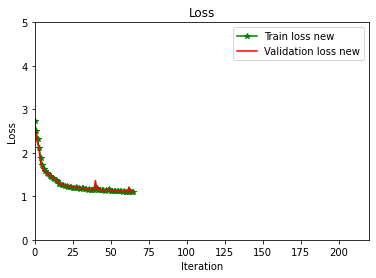

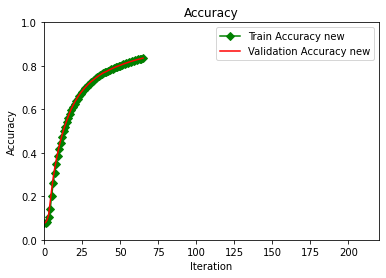

Iteration: 65, train loss: 1.1078, validation loss: 1.0934, train acc: 0.8347, validation acc: 0.8356
Step: 0 	Training Loss: 1.0429702 Training Acc: 0.8358038
Step: 1 	Training Loss: 1.0901269 Training Acc: 0.83582616
Step: 2 	Training Loss: 1.0556992 Training Acc: 0.83584845
Step: 3 	Training Loss: 1.13829 Training Acc: 0.83586514
Step: 4 	Training Loss: 1.0577763 Training Acc: 0.8358916
Step: 5 	Training Loss: 1.0881357 Training Acc: 0.83591384
Step: 6 	Training Loss: 1.0608213 Training Acc: 0.8359403
Step: 7 	Training Loss: 1.0777421 Training Acc: 0.83596253
Step: 8 	Training Loss: 1.1362262 Training Acc: 0.8359778
Step: 9 	Training Loss: 1.142597 Training Acc: 0.8359945
Step: 10 	Training Loss: 1.1101066 Training Acc: 0.8360167
Step: 11 	Training Loss: 1.0949824 Training Acc: 0.83603895
Step: 12 	Training Loss: 1.1313467 Training Acc: 0.8360556
Step: 13 	Training Loss: 1.0938947 Training Acc: 0.83607644
Step: 14 	Training Loss: 1.0779238 Training Acc: 0.83609724
Step: 15 	Training

Step: 51 	Training Loss: 1.054863 Training Acc: 0.8381261
Step: 52 	Training Loss: 1.1373664 Training Acc: 0.8381421
Step: 53 	Training Loss: 1.1356261 Training Acc: 0.838158
Step: 54 	Training Loss: 1.144498 Training Acc: 0.838178
Step: 55 	Training Loss: 1.196445 Training Acc: 0.83818984
Step: 56 	Training Loss: 1.0800686 Training Acc: 0.83821386
Step: 57 	Training Loss: 1.121232 Training Acc: 0.8382298
Step: 58 	Training Loss: 1.105181 Training Acc: 0.83824974
Step: 59 	Training Loss: 1.089333 Training Acc: 0.8382697
Step: 60 	Training Loss: 1.0954859 Training Acc: 0.8382897
Step: 61 	Training Loss: 1.0919486 Training Acc: 0.83831096
Step: 62 	Training Loss: 1.0709763 Training Acc: 0.8383309
Step: 63 	Training Loss: 1.1333293 Training Acc: 0.83834815
Step: 64 	Training Loss: 1.1231723 Training Acc: 0.83836126
Step: 65 	Training Loss: 1.1318529 Training Acc: 0.83838254
Step: 66 	Training Loss: 1.0782938 Training Acc: 0.8384052
Step: 67 	Training Loss: 1.0649178 Training Acc: 0.838427

Step: 18 	Training Loss: 1.138504 Training Acc: 0.84075063
Step: 19 	Training Loss: 1.140291 Training Acc: 0.8407631
Step: 20 	Training Loss: 1.1156845 Training Acc: 0.84078085
Step: 21 	Training Loss: 1.0992017 Training Acc: 0.84080124
Step: 22 	Training Loss: 1.1104507 Training Acc: 0.840819
Step: 23 	Training Loss: 1.0861473 Training Acc: 0.8408394
Step: 24 	Training Loss: 1.066192 Training Acc: 0.8408611
Step: 25 	Training Loss: 1.125911 Training Acc: 0.84087753
Step: 26 	Training Loss: 1.1307434 Training Acc: 0.84089524
Step: 27 	Training Loss: 1.1793556 Training Acc: 0.840905
Step: 28 	Training Loss: 1.0948311 Training Acc: 0.8409267
Step: 29 	Training Loss: 1.1394658 Training Acc: 0.84094304
Step: 30 	Training Loss: 1.1713227 Training Acc: 0.8409541
Step: 31 	Training Loss: 1.0633448 Training Acc: 0.84097844
Step: 32 	Training Loss: 1.0778974 Training Acc: 0.84099746
Step: 33 	Training Loss: 1.118412 Training Acc: 0.84101516
Step: 34 	Training Loss: 1.0894791 Training Acc: 0.841

Step: 4 	Validation Loss: 1.0614667 Validation Acc: 0.84323245
Step: 5 	Validation Loss: 1.1144564 Validation Acc: 0.8432507
Step: 6 	Validation Loss: 1.1339263 Validation Acc: 0.8432676
Step: 7 	Validation Loss: 1.1494513 Validation Acc: 0.843282
Step: 8 	Validation Loss: 1.1275116 Validation Acc: 0.8432976
Step: 9 	Validation Loss: 1.0727664 Validation Acc: 0.8433184
Step: 10 	Validation Loss: 1.146141 Validation Acc: 0.84333533
Step: 11 	Validation Loss: 1.099931 Validation Acc: 0.8433548
Step: 12 	Validation Loss: 1.0804048 Validation Acc: 0.8433756
Step: 13 	Validation Loss: 1.1402073 Validation Acc: 0.84339124
Step: 14 	Validation Loss: 1.1261839 Validation Acc: 0.84340686
Step: 15 	Validation Loss: 1.0731124 Validation Acc: 0.8434263
Step: 16 	Validation Loss: 1.1254742 Validation Acc: 0.84344447


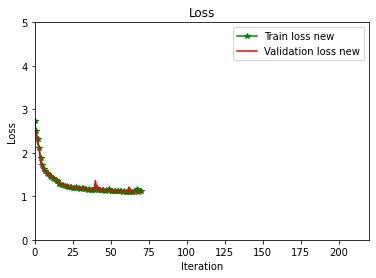

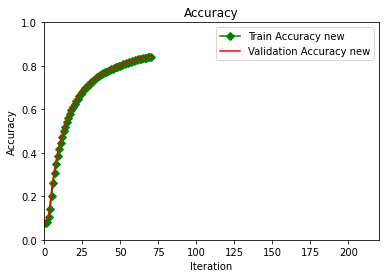

Iteration: 70, train loss: 1.1107, validation loss: 1.1124, train acc: 0.8426, validation acc: 0.8433
Step: 0 	Training Loss: 1.054843 Training Acc: 0.84346914
Step: 1 	Training Loss: 1.0702116 Training Acc: 0.8434899
Step: 2 	Training Loss: 1.0725915 Training Acc: 0.84350806
Step: 3 	Training Loss: 1.146272 Training Acc: 0.843521
Step: 4 	Training Loss: 1.0784776 Training Acc: 0.84354436
Step: 5 	Training Loss: 1.1041391 Training Acc: 0.8435599
Step: 6 	Training Loss: 1.1163576 Training Acc: 0.84357804
Step: 7 	Training Loss: 1.0949166 Training Acc: 0.84359616
Step: 8 	Training Loss: 1.1517379 Training Acc: 0.8436091
Step: 9 	Training Loss: 1.2165072 Training Acc: 0.84361815
Step: 10 	Training Loss: 1.2048619 Training Acc: 0.84362984
Step: 11 	Training Loss: 1.1740347 Training Acc: 0.84364146
Step: 12 	Training Loss: 1.1671472 Training Acc: 0.84365183
Step: 13 	Training Loss: 1.1143807 Training Acc: 0.84366995
Step: 14 	Training Loss: 1.1101224 Training Acc: 0.843688
Step: 15 	Trainin

Step: 52 	Training Loss: 1.1338506 Training Acc: 0.8440183
Step: 53 	Training Loss: 1.1317976 Training Acc: 0.8440334
Step: 54 	Training Loss: 1.1299102 Training Acc: 0.8440511
Step: 55 	Training Loss: 1.191762 Training Acc: 0.8440612
Step: 56 	Training Loss: 1.0733771 Training Acc: 0.8440839
Step: 57 	Training Loss: 1.1093711 Training Acc: 0.8441003
Step: 58 	Training Loss: 1.1033514 Training Acc: 0.84411794
Step: 59 	Training Loss: 1.0979667 Training Acc: 0.8441356
Step: 60 	Training Loss: 1.1003454 Training Acc: 0.8441532
Step: 61 	Training Loss: 1.0697396 Training Acc: 0.8441746
Step: 62 	Training Loss: 1.0507135 Training Acc: 0.844196
Step: 63 	Training Loss: 1.103071 Training Acc: 0.8442111
Step: 64 	Training Loss: 1.0908476 Training Acc: 0.84422493
Step: 65 	Training Loss: 1.1061941 Training Acc: 0.8442438
Step: 66 	Training Loss: 1.0855063 Training Acc: 0.8442639
Step: 67 	Training Loss: 1.060452 Training Acc: 0.84428406
Step: 0 	Validation Loss: 1.1191823 Validation Acc: 0.844

Step: 20 	Training Loss: 1.0910754 Training Acc: 0.84631866
Step: 21 	Training Loss: 1.061777 Training Acc: 0.84634054
Step: 22 	Training Loss: 1.1018893 Training Acc: 0.84635746
Step: 23 	Training Loss: 1.080478 Training Acc: 0.8463756
Step: 24 	Training Loss: 1.0614886 Training Acc: 0.84639376
Step: 25 	Training Loss: 1.1039596 Training Acc: 0.84641063
Step: 26 	Training Loss: 1.1050348 Training Acc: 0.8464263
Step: 27 	Training Loss: 1.1911998 Training Acc: 0.84643704
Step: 28 	Training Loss: 1.0830562 Training Acc: 0.8464502
Step: 29 	Training Loss: 1.1623615 Training Acc: 0.84646213
Step: 30 	Training Loss: 1.2731622 Training Acc: 0.8464592
Step: 31 	Training Loss: 1.09853 Training Acc: 0.8464773
Step: 32 	Training Loss: 1.0963109 Training Acc: 0.84649295
Step: 33 	Training Loss: 1.1122973 Training Acc: 0.84650856
Step: 34 	Training Loss: 1.1347066 Training Acc: 0.84652174
Step: 35 	Training Loss: 1.1271753 Training Acc: 0.84653986
Step: 36 	Training Loss: 1.1078706 Training Acc: 

Step: 5 	Validation Loss: 1.0973928 Validation Acc: 0.84861386
Step: 6 	Validation Loss: 1.1329308 Validation Acc: 0.8486277
Step: 7 	Validation Loss: 1.1237042 Validation Acc: 0.84864384
Step: 8 	Validation Loss: 1.1046875 Validation Acc: 0.84866005
Step: 9 	Validation Loss: 1.0721815 Validation Acc: 0.84867746
Step: 10 	Validation Loss: 1.139241 Validation Acc: 0.8486924
Step: 11 	Validation Loss: 1.0916418 Validation Acc: 0.848711
Step: 12 	Validation Loss: 1.0810959 Validation Acc: 0.8487308
Step: 13 	Validation Loss: 1.1238964 Validation Acc: 0.8487446
Step: 14 	Validation Loss: 1.1012652 Validation Acc: 0.84875953
Step: 15 	Validation Loss: 1.0638742 Validation Acc: 0.8487781
Step: 16 	Validation Loss: 1.1211597 Validation Acc: 0.8487955


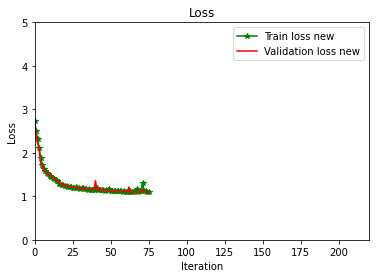

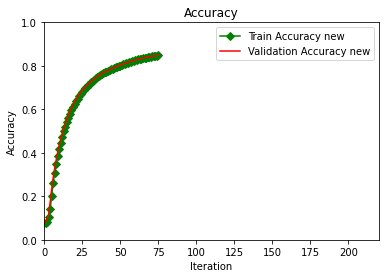

Iteration: 75, train loss: 1.0914, validation loss: 1.1054, train acc: 0.8480, validation acc: 0.8487
Step: 0 	Training Loss: 1.0404106 Training Acc: 0.84881765
Step: 1 	Training Loss: 1.0785267 Training Acc: 0.84883624
Step: 2 	Training Loss: 1.070965 Training Acc: 0.84885234
Step: 3 	Training Loss: 1.1548277 Training Acc: 0.84886366
Step: 4 	Training Loss: 1.0726813 Training Acc: 0.84888464
Step: 5 	Training Loss: 1.0895873 Training Acc: 0.84889954
Step: 6 	Training Loss: 1.0593259 Training Acc: 0.8489193
Step: 7 	Training Loss: 1.0919156 Training Acc: 0.8489342
Step: 8 	Training Loss: 1.1820521 Training Acc: 0.8489406
Step: 9 	Training Loss: 1.1833196 Training Acc: 0.8489434
Step: 10 	Training Loss: 1.1464876 Training Acc: 0.8489523
Step: 11 	Training Loss: 1.1087976 Training Acc: 0.84896475
Step: 12 	Training Loss: 1.1494846 Training Acc: 0.8489712
Step: 13 	Training Loss: 1.0903357 Training Acc: 0.8489861
Step: 14 	Training Loss: 1.0909026 Training Acc: 0.8490022
Step: 15 	Trainin

Step: 54 	Training Loss: 1.1606541 Training Acc: 0.85073036
Step: 55 	Training Loss: 1.224799 Training Acc: 0.8507376
Step: 56 	Training Loss: 1.1198215 Training Acc: 0.85075307
Step: 57 	Training Loss: 1.1836171 Training Acc: 0.85076267
Step: 58 	Training Loss: 1.1237608 Training Acc: 0.85077584
Step: 59 	Training Loss: 1.1035028 Training Acc: 0.85079014
Step: 60 	Training Loss: 1.1255833 Training Acc: 0.85080445
Step: 61 	Training Loss: 1.0799655 Training Acc: 0.85081995
Step: 62 	Training Loss: 1.0782673 Training Acc: 0.8508342
Step: 63 	Training Loss: 1.1294508 Training Acc: 0.8508438
Step: 64 	Training Loss: 1.1144052 Training Acc: 0.8508498
Step: 65 	Training Loss: 1.146281 Training Acc: 0.85085934
Step: 66 	Training Loss: 1.0794994 Training Acc: 0.85087717
Step: 67 	Training Loss: 1.0879557 Training Acc: 0.85089266
Step: 0 	Validation Loss: 1.1060913 Validation Acc: 0.8509058
Step: 1 	Validation Loss: 1.1478819 Validation Acc: 0.8509129
Step: 2 	Validation Loss: 1.1132264 Valida

Step: 23 	Training Loss: 1.0681247 Training Acc: 0.8527925
Step: 24 	Training Loss: 1.0549147 Training Acc: 0.8528097
Step: 25 	Training Loss: 1.0866187 Training Acc: 0.8528246
Step: 26 	Training Loss: 1.0805129 Training Acc: 0.85283834
Step: 27 	Training Loss: 1.1604097 Training Acc: 0.85284626
Step: 28 	Training Loss: 1.0647109 Training Acc: 0.85286343
Step: 29 	Training Loss: 1.1115925 Training Acc: 0.8528783
Step: 30 	Training Loss: 1.1518235 Training Acc: 0.8528885
Step: 31 	Training Loss: 1.046365 Training Acc: 0.85290915
Step: 32 	Training Loss: 1.0674808 Training Acc: 0.8529252
Step: 33 	Training Loss: 1.0979441 Training Acc: 0.85294
Step: 34 	Training Loss: 1.0657637 Training Acc: 0.852956
Step: 35 	Training Loss: 1.0809319 Training Acc: 0.85297316
Step: 36 	Training Loss: 1.0553985 Training Acc: 0.85298914
Step: 37 	Training Loss: 1.1018722 Training Acc: 0.85300165
Step: 38 	Training Loss: 1.0716698 Training Acc: 0.8530176
Step: 39 	Training Loss: 1.0427693 Training Acc: 0.85

Step: 11 	Validation Loss: 1.0738943 Validation Acc: 0.8548658
Step: 12 	Validation Loss: 1.0573761 Validation Acc: 0.8548846
Step: 13 	Validation Loss: 1.1132214 Validation Acc: 0.8549
Step: 14 	Validation Loss: 1.0980172 Validation Acc: 0.8549143
Step: 15 	Validation Loss: 1.0547472 Validation Acc: 0.8549331
Step: 16 	Validation Loss: 1.0768957 Validation Acc: 0.8549496


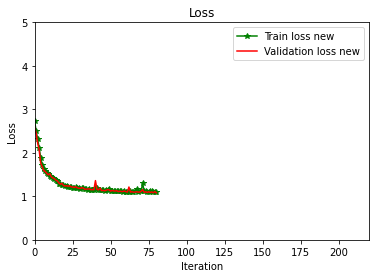

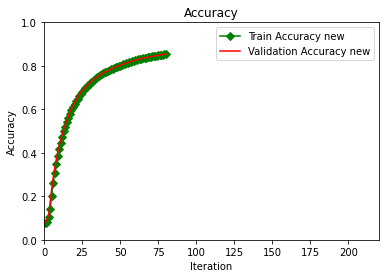

Iteration: 80, train loss: 1.0940, validation loss: 1.0800, train acc: 0.8542, validation acc: 0.8548
Step: 0 	Training Loss: 1.0340723 Training Acc: 0.85496956
Step: 1 	Training Loss: 1.0540944 Training Acc: 0.8549861
Step: 2 	Training Loss: 1.0461675 Training Acc: 0.8550026
Step: 3 	Training Loss: 1.1176964 Training Acc: 0.85501456
Step: 4 	Training Loss: 1.0507855 Training Acc: 0.8550345
Step: 5 	Training Loss: 1.0818651 Training Acc: 0.85504985
Step: 6 	Training Loss: 1.0607811 Training Acc: 0.8550686
Step: 7 	Training Loss: 1.0792964 Training Acc: 0.8550851
Step: 8 	Training Loss: 1.1117909 Training Acc: 0.85509706
Step: 9 	Training Loss: 1.142982 Training Acc: 0.85510784
Step: 10 	Training Loss: 1.0916955 Training Acc: 0.8551232
Step: 11 	Training Loss: 1.07826 Training Acc: 0.85513854
Step: 12 	Training Loss: 1.1256644 Training Acc: 0.8551505
Step: 13 	Training Loss: 1.0806756 Training Acc: 0.8551647
Step: 14 	Training Loss: 1.0722843 Training Acc: 0.8551789
Step: 15 	Training L

Step: 53 	Training Loss: 1.086126 Training Acc: 0.8569714
Step: 54 	Training Loss: 1.1058594 Training Acc: 0.8569851
Step: 55 	Training Loss: 1.1801803 Training Acc: 0.8569921
Step: 56 	Training Loss: 1.0559763 Training Acc: 0.85701025
Step: 57 	Training Loss: 1.1052067 Training Acc: 0.8570217
Step: 58 	Training Loss: 1.0664561 Training Acc: 0.8570365
Step: 59 	Training Loss: 1.0934241 Training Acc: 0.8570501
Step: 60 	Training Loss: 1.0878525 Training Acc: 0.8570649
Step: 61 	Training Loss: 1.0529765 Training Acc: 0.8570819
Step: 62 	Training Loss: 1.0414784 Training Acc: 0.8570989
Step: 63 	Training Loss: 1.0891385 Training Acc: 0.8571125
Step: 64 	Training Loss: 1.089029 Training Acc: 0.85712284
Step: 65 	Training Loss: 1.0938106 Training Acc: 0.8571376
Step: 66 	Training Loss: 1.064825 Training Acc: 0.8571535
Step: 67 	Training Loss: 1.0510099 Training Acc: 0.85717046
Step: 0 	Validation Loss: 1.085388 Validation Acc: 0.8571852
Step: 1 	Validation Loss: 1.1153609 Validation Acc: 0.

Step: 20 	Training Loss: 1.105936 Training Acc: 0.8588546
Step: 21 	Training Loss: 1.0898452 Training Acc: 0.85886884
Step: 22 	Training Loss: 1.1262097 Training Acc: 0.85888094
Step: 23 	Training Loss: 1.0765762 Training Acc: 0.8588952
Step: 24 	Training Loss: 1.0763637 Training Acc: 0.8589094
Step: 25 	Training Loss: 1.0912573 Training Acc: 0.85892147
Step: 26 	Training Loss: 1.0799006 Training Acc: 0.85893464
Step: 27 	Training Loss: 1.1614995 Training Acc: 0.85894233
Step: 28 	Training Loss: 1.0708131 Training Acc: 0.85895765
Step: 29 	Training Loss: 1.1095448 Training Acc: 0.85897076
Step: 30 	Training Loss: 1.1489935 Training Acc: 0.85897845
Step: 31 	Training Loss: 1.0528574 Training Acc: 0.858997
Step: 32 	Training Loss: 1.0712562 Training Acc: 0.85901016
Step: 33 	Training Loss: 1.1177485 Training Acc: 0.85902
Step: 34 	Training Loss: 1.0785509 Training Acc: 0.8590342
Step: 35 	Training Loss: 1.0767345 Training Acc: 0.8590495
Step: 36 	Training Loss: 1.0551422 Training Acc: 0.

Step: 9 	Validation Loss: 1.0217564 Validation Acc: 0.8607336
Step: 10 	Validation Loss: 1.102309 Validation Acc: 0.86074626
Step: 11 	Validation Loss: 1.079756 Validation Acc: 0.86076105
Step: 12 	Validation Loss: 1.0527093 Validation Acc: 0.860778
Step: 13 	Validation Loss: 1.0992107 Validation Acc: 0.86079276
Step: 14 	Validation Loss: 1.0957205 Validation Acc: 0.8608043
Step: 15 	Validation Loss: 1.0471303 Validation Acc: 0.8608212
Step: 16 	Validation Loss: 1.0624022 Validation Acc: 0.86083597


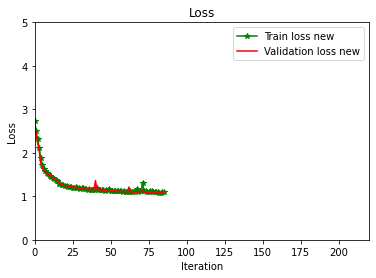

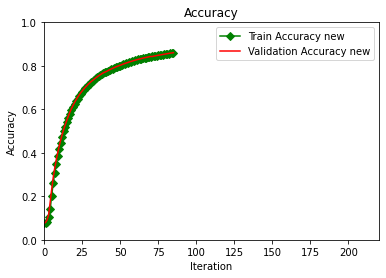

Iteration: 85, train loss: 1.0878, validation loss: 1.0713, train acc: 0.8602, validation acc: 0.8607
Step: 0 	Training Loss: 1.0302316 Training Acc: 0.8608539
Step: 1 	Training Loss: 1.0518416 Training Acc: 0.8608687
Step: 2 	Training Loss: 1.0386705 Training Acc: 0.8608834
Step: 3 	Training Loss: 1.1106731 Training Acc: 0.8608939
Step: 4 	Training Loss: 1.0452433 Training Acc: 0.86091185
Step: 5 	Training Loss: 1.069913 Training Acc: 0.86092556
Step: 6 	Training Loss: 1.0352329 Training Acc: 0.8609424
Step: 7 	Training Loss: 1.0650843 Training Acc: 0.86095715
Step: 8 	Training Loss: 1.1001711 Training Acc: 0.86096656
Step: 9 	Training Loss: 1.131504 Training Acc: 0.8609759
Step: 10 	Training Loss: 1.0822978 Training Acc: 0.8609896
Step: 11 	Training Loss: 1.0721602 Training Acc: 0.8610032
Step: 12 	Training Loss: 1.1132724 Training Acc: 0.86101365
Step: 13 	Training Loss: 1.0732759 Training Acc: 0.8610262
Step: 14 	Training Loss: 1.0700903 Training Acc: 0.8610388
Step: 15 	Training L

Step: 53 	Training Loss: 1.1251862 Training Acc: 0.86213017
Step: 54 	Training Loss: 1.1150346 Training Acc: 0.8621424
Step: 55 	Training Loss: 1.1635681 Training Acc: 0.8621473
Step: 56 	Training Loss: 1.0616012 Training Acc: 0.86216366
Step: 57 	Training Loss: 1.1143295 Training Acc: 0.8621727
Step: 58 	Training Loss: 1.089534 Training Acc: 0.86218286
Step: 59 	Training Loss: 1.0855045 Training Acc: 0.8621951
Step: 60 	Training Loss: 1.0990171 Training Acc: 0.86220723
Step: 61 	Training Loss: 1.0631031 Training Acc: 0.86221945
Step: 62 	Training Loss: 1.0657967 Training Acc: 0.8622337
Step: 63 	Training Loss: 1.1090013 Training Acc: 0.86224276
Step: 64 	Training Loss: 1.08831 Training Acc: 0.86224973
Step: 65 	Training Loss: 1.1108774 Training Acc: 0.8622598
Step: 66 	Training Loss: 1.0693489 Training Acc: 0.86227304
Step: 67 	Training Loss: 1.0761585 Training Acc: 0.8622873
Step: 0 	Validation Loss: 1.0935576 Validation Acc: 0.86229944
Step: 1 	Validation Loss: 1.1407312 Validation 

Step: 20 	Training Loss: 1.081257 Training Acc: 0.8637694
Step: 21 	Training Loss: 1.0791068 Training Acc: 0.8637822
Step: 22 	Training Loss: 1.1007831 Training Acc: 0.86379087
Step: 23 	Training Loss: 1.0692697 Training Acc: 0.8638047
Step: 24 	Training Loss: 1.062896 Training Acc: 0.8638185
Step: 25 	Training Loss: 1.0884521 Training Acc: 0.8638303
Step: 26 	Training Loss: 1.0768559 Training Acc: 0.86384106
Step: 27 	Training Loss: 1.1726124 Training Acc: 0.86384666
Step: 28 	Training Loss: 1.0747671 Training Acc: 0.8638604
Step: 29 	Training Loss: 1.1120812 Training Acc: 0.86387223
Step: 30 	Training Loss: 1.1594856 Training Acc: 0.8638778
Step: 31 	Training Loss: 1.0716219 Training Acc: 0.86389464
Step: 32 	Training Loss: 1.0760026 Training Acc: 0.86390644
Step: 33 	Training Loss: 1.0825726 Training Acc: 0.8639171
Step: 34 	Training Loss: 1.080859 Training Acc: 0.86392987
Step: 35 	Training Loss: 1.0835185 Training Acc: 0.8639437
Step: 36 	Training Loss: 1.068478 Training Acc: 0.86

Step: 6 	Validation Loss: 1.1107911 Validation Acc: 0.86536914
Step: 7 	Validation Loss: 1.0674601 Validation Acc: 0.86538047
Step: 8 	Validation Loss: 1.0746567 Validation Acc: 0.86539286
Step: 9 	Validation Loss: 1.0262527 Validation Acc: 0.86540824
Step: 10 	Validation Loss: 1.1041119 Validation Acc: 0.86542064
Step: 11 	Validation Loss: 1.0664504 Validation Acc: 0.865435
Step: 12 	Validation Loss: 1.0439677 Validation Acc: 0.8654504
Step: 13 	Validation Loss: 1.1052959 Validation Acc: 0.8654617
Step: 14 	Validation Loss: 1.0960603 Validation Acc: 0.86547303
Step: 15 	Validation Loss: 1.0522587 Validation Acc: 0.8654884
Step: 16 	Validation Loss: 1.0667351 Validation Acc: 0.86550176


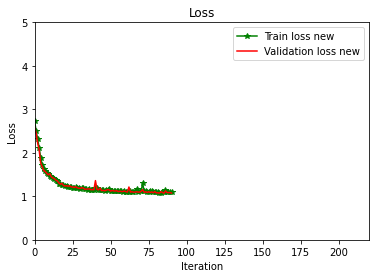

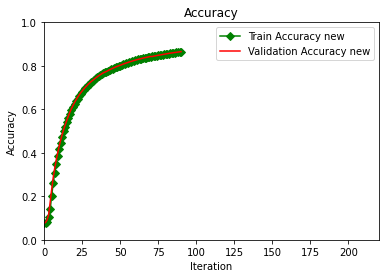

Iteration: 90, train loss: 1.0892, validation loss: 1.0734, train acc: 0.8649, validation acc: 0.8654
Step: 0 	Training Loss: 1.039362 Training Acc: 0.86551815
Step: 1 	Training Loss: 1.0527596 Training Acc: 0.8655315
Step: 2 	Training Loss: 1.0516291 Training Acc: 0.86554384
Step: 3 	Training Loss: 1.1149559 Training Acc: 0.86555415
Step: 4 	Training Loss: 1.0434794 Training Acc: 0.8655705
Step: 5 	Training Loss: 1.0879505 Training Acc: 0.8655828
Step: 6 	Training Loss: 1.0376422 Training Acc: 0.86559814
Step: 7 	Training Loss: 1.0623758 Training Acc: 0.8656135
Step: 8 	Training Loss: 1.0960921 Training Acc: 0.86562276
Step: 9 	Training Loss: 1.1405337 Training Acc: 0.86563206
Step: 10 	Training Loss: 1.0903952 Training Acc: 0.86564434
Step: 11 	Training Loss: 1.0734255 Training Acc: 0.8656567
Step: 12 	Training Loss: 1.1136932 Training Acc: 0.8656659
Step: 13 	Training Loss: 1.0721948 Training Acc: 0.8656762
Step: 14 	Training Loss: 1.0720469 Training Acc: 0.8656875
Step: 15 	Trainin

Step: 52 	Training Loss: 1.1149983 Training Acc: 0.8671329
Step: 53 	Training Loss: 1.0853908 Training Acc: 0.8671399
Step: 54 	Training Loss: 1.0979269 Training Acc: 0.8671508
Step: 55 	Training Loss: 1.1748881 Training Acc: 0.86715573
Step: 56 	Training Loss: 1.0485761 Training Acc: 0.86717063
Step: 57 	Training Loss: 1.0971619 Training Acc: 0.8671806
Step: 58 	Training Loss: 1.0659913 Training Acc: 0.86719245
Step: 59 	Training Loss: 1.0777315 Training Acc: 0.86720335
Step: 60 	Training Loss: 1.0825436 Training Acc: 0.86721426
Step: 61 	Training Loss: 1.0530447 Training Acc: 0.8672291
Step: 62 	Training Loss: 1.03597 Training Acc: 0.867243
Step: 63 	Training Loss: 1.081011 Training Acc: 0.8672539
Step: 64 	Training Loss: 1.0796665 Training Acc: 0.8672608
Step: 65 	Training Loss: 1.089985 Training Acc: 0.8672727
Step: 66 	Training Loss: 1.0634171 Training Acc: 0.86728555
Step: 67 	Training Loss: 1.0481882 Training Acc: 0.8672984
Step: 0 	Validation Loss: 1.0841035 Validation Acc: 0.8

Step: 19 	Training Loss: 1.0924654 Training Acc: 0.868711
Step: 20 	Training Loss: 1.0604507 Training Acc: 0.8687225
Step: 21 	Training Loss: 1.0478106 Training Acc: 0.86873597
Step: 22 	Training Loss: 1.0887246 Training Acc: 0.8687475
Step: 23 	Training Loss: 1.0600045 Training Acc: 0.868759
Step: 24 	Training Loss: 1.0506916 Training Acc: 0.86877143
Step: 25 	Training Loss: 1.0801313 Training Acc: 0.868781
Step: 26 	Training Loss: 1.0728331 Training Acc: 0.8687915
Step: 27 	Training Loss: 1.1520498 Training Acc: 0.86879814
Step: 28 	Training Loss: 1.059253 Training Acc: 0.8688106
Step: 29 	Training Loss: 1.0932006 Training Acc: 0.8688211
Step: 30 	Training Loss: 1.1441813 Training Acc: 0.8688277
Step: 31 	Training Loss: 1.0387126 Training Acc: 0.8688431
Step: 32 	Training Loss: 1.0558436 Training Acc: 0.8688546
Step: 33 	Training Loss: 1.0731988 Training Acc: 0.8688651
Step: 34 	Training Loss: 1.0566367 Training Acc: 0.86887556
Step: 35 	Training Loss: 1.0718627 Training Acc: 0.86888

Step: 5 	Validation Loss: 1.0563643 Validation Acc: 0.8702544
Step: 6 	Validation Loss: 1.1086888 Validation Acc: 0.8702646
Step: 7 	Validation Loss: 1.0709044 Validation Acc: 0.8702747
Step: 8 	Validation Loss: 1.0797522 Validation Acc: 0.8702849
Step: 9 	Validation Loss: 1.021124 Validation Acc: 0.8702989
Step: 10 	Validation Loss: 1.1036811 Validation Acc: 0.87030905
Step: 11 	Validation Loss: 1.0667216 Validation Acc: 0.8703221
Step: 12 	Validation Loss: 1.0594933 Validation Acc: 0.8703351
Step: 13 	Validation Loss: 1.1144079 Validation Acc: 0.87034714
Step: 14 	Validation Loss: 1.0858054 Validation Acc: 0.8703564
Step: 15 	Validation Loss: 1.0461895 Validation Acc: 0.8703703
Step: 16 	Validation Loss: 1.0709906 Validation Acc: 0.87038237


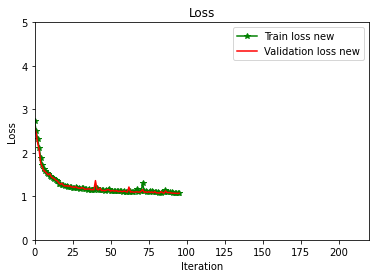

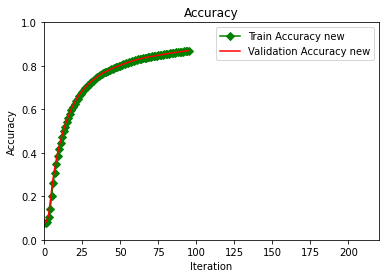

Iteration: 95, train loss: 1.0773, validation loss: 1.0719, train acc: 0.8698, validation acc: 0.8703
Step: 0 	Training Loss: 1.0310551 Training Acc: 0.8703973
Step: 1 	Training Loss: 1.04736 Training Acc: 0.87040937
Step: 2 	Training Loss: 1.0338855 Training Acc: 0.8704214
Step: 3 	Training Loss: 1.1100764 Training Acc: 0.87042964
Step: 4 	Training Loss: 1.0358162 Training Acc: 0.87044454
Step: 5 	Training Loss: 1.0790181 Training Acc: 0.87045467
Step: 6 	Training Loss: 1.0388892 Training Acc: 0.8704686
Step: 7 	Training Loss: 1.066981 Training Acc: 0.87048066
Step: 8 	Training Loss: 1.1079276 Training Acc: 0.87048787
Step: 9 	Training Loss: 1.1330571 Training Acc: 0.87049514
Step: 10 	Training Loss: 1.0932 Training Acc: 0.8705062
Step: 11 	Training Loss: 1.0743518 Training Acc: 0.87051725
Step: 12 	Training Loss: 1.1154039 Training Acc: 0.8705255
Step: 13 	Training Loss: 1.0683721 Training Acc: 0.87053555
Step: 14 	Training Loss: 1.0691162 Training Acc: 0.87054664
Step: 15 	Training 

Step: 51 	Training Loss: 1.1623781 Training Acc: 0.8713117
Step: 52 	Training Loss: 1.2488084 Training Acc: 0.8713075
Step: 53 	Training Loss: 1.3329616 Training Acc: 0.8712881
Step: 54 	Training Loss: 1.3497355 Training Acc: 0.87126034
Step: 55 	Training Loss: 1.4150163 Training Acc: 0.8712335
Step: 56 	Training Loss: 1.2715449 Training Acc: 0.8712189
Step: 57 	Training Loss: 1.410391 Training Acc: 0.87119395
Step: 58 	Training Loss: 1.3495924 Training Acc: 0.8711831
Step: 59 	Training Loss: 1.3623977 Training Acc: 0.8711723
Step: 60 	Training Loss: 1.2213731 Training Acc: 0.8711737
Step: 61 	Training Loss: 1.1609328 Training Acc: 0.8711845
Step: 62 	Training Loss: 1.148515 Training Acc: 0.8711906
Step: 63 	Training Loss: 1.1419265 Training Acc: 0.8711967
Step: 64 	Training Loss: 1.1492907 Training Acc: 0.8712019
Step: 65 	Training Loss: 1.1928065 Training Acc: 0.8712042
Step: 66 	Training Loss: 1.1862121 Training Acc: 0.8712094
Step: 67 	Training Loss: 1.1668653 Training Acc: 0.87121

Step: 20 	Training Loss: 1.0647054 Training Acc: 0.87237823
Step: 21 	Training Loss: 1.0638094 Training Acc: 0.8723915
Step: 22 	Training Loss: 1.0993937 Training Acc: 0.87240106
Step: 23 	Training Loss: 1.076262 Training Acc: 0.87241155
Step: 24 	Training Loss: 1.0600506 Training Acc: 0.872423
Step: 25 	Training Loss: 1.0902715 Training Acc: 0.87243164
Step: 26 	Training Loss: 1.0767684 Training Acc: 0.8724393
Step: 27 	Training Loss: 1.15433 Training Acc: 0.8724443
Step: 28 	Training Loss: 1.0646741 Training Acc: 0.87245476
Step: 29 	Training Loss: 1.1162002 Training Acc: 0.8724643
Step: 30 	Training Loss: 1.1564962 Training Acc: 0.87247014
Step: 31 	Training Loss: 1.0596585 Training Acc: 0.8724834
Step: 32 	Training Loss: 1.0643914 Training Acc: 0.87249386
Step: 33 	Training Loss: 1.0866156 Training Acc: 0.8725034
Step: 34 	Training Loss: 1.0655084 Training Acc: 0.8725139
Step: 35 	Training Loss: 1.0791297 Training Acc: 0.8725253
Step: 36 	Training Loss: 1.0668976 Training Acc: 0.87

Step: 9 	Validation Loss: 1.023987 Validation Acc: 0.87381786
Step: 10 	Validation Loss: 1.113268 Validation Acc: 0.8738271
Step: 11 	Validation Loss: 1.0765724 Validation Acc: 0.8738381
Step: 12 	Validation Loss: 1.0590798 Validation Acc: 0.873851
Step: 13 	Validation Loss: 1.1174753 Validation Acc: 0.8738612
Step: 14 	Validation Loss: 1.0895686 Validation Acc: 0.87387043
Step: 15 	Validation Loss: 1.0516481 Validation Acc: 0.87388235
Step: 16 	Validation Loss: 1.0679064 Validation Acc: 0.87389344


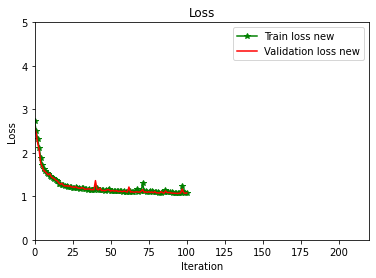

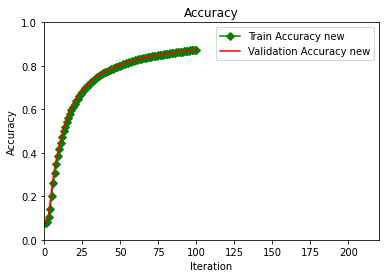

Iteration: 100, train loss: 1.0754, validation loss: 1.0775, train acc: 0.8734, validation acc: 0.8738
Step: 0 	Training Loss: 1.0390062 Training Acc: 0.8739063
Step: 1 	Training Loss: 1.0487664 Training Acc: 0.87391734
Step: 2 	Training Loss: 1.0435275 Training Acc: 0.8739302
Step: 3 	Training Loss: 1.1089345 Training Acc: 0.8739376
Step: 4 	Training Loss: 1.0465839 Training Acc: 0.8739504
Step: 5 	Training Loss: 1.0806341 Training Acc: 0.87396055
Step: 6 	Training Loss: 1.0538685 Training Acc: 0.8739734
Step: 7 	Training Loss: 1.06919 Training Acc: 0.87398535
Step: 8 	Training Loss: 1.1044762 Training Acc: 0.87399274
Step: 9 	Training Loss: 1.1475793 Training Acc: 0.87399834
Step: 10 	Training Loss: 1.118858 Training Acc: 0.8740066
Step: 11 	Training Loss: 1.071305 Training Acc: 0.87401676
Step: 12 	Training Loss: 1.1329149 Training Acc: 0.87402046
Step: 13 	Training Loss: 1.1345302 Training Acc: 0.87402785
Step: 14 	Training Loss: 1.1761322 Training Acc: 0.8740325
Step: 15 	Training

Step: 53 	Training Loss: 1.094906 Training Acc: 0.87500983
Step: 54 	Training Loss: 1.1035457 Training Acc: 0.87501967
Step: 55 	Training Loss: 1.1497107 Training Acc: 0.8750242
Step: 56 	Training Loss: 1.048013 Training Acc: 0.8750358
Step: 57 	Training Loss: 1.0959072 Training Acc: 0.87504476
Step: 58 	Training Loss: 1.0646 Training Acc: 0.8750546
Step: 59 	Training Loss: 1.0757926 Training Acc: 0.87506354
Step: 60 	Training Loss: 1.0932109 Training Acc: 0.8750725
Step: 61 	Training Loss: 1.0512085 Training Acc: 0.8750841
Step: 62 	Training Loss: 1.0439539 Training Acc: 0.87509483
Step: 63 	Training Loss: 1.0914519 Training Acc: 0.8751029
Step: 64 	Training Loss: 1.0718638 Training Acc: 0.87510914
Step: 65 	Training Loss: 1.091069 Training Acc: 0.8751189
Step: 66 	Training Loss: 1.0643653 Training Acc: 0.87512964
Step: 67 	Training Loss: 1.0482203 Training Acc: 0.87514126
Step: 0 	Validation Loss: 1.0913346 Validation Acc: 0.8751529
Step: 1 	Validation Loss: 1.1187229 Validation Acc:

Step: 20 	Training Loss: 1.0611391 Training Acc: 0.87631196
Step: 21 	Training Loss: 1.046324 Training Acc: 0.8763232
Step: 22 	Training Loss: 1.0853527 Training Acc: 0.8763319
Step: 23 	Training Loss: 1.0575294 Training Acc: 0.87634146
Step: 24 	Training Loss: 1.052838 Training Acc: 0.8763519
Step: 25 	Training Loss: 1.0808222 Training Acc: 0.87635964
Step: 26 	Training Loss: 1.0712523 Training Acc: 0.8763692
Step: 27 	Training Loss: 1.149837 Training Acc: 0.87637347
Step: 28 	Training Loss: 1.0596913 Training Acc: 0.87638384
Step: 29 	Training Loss: 1.0966742 Training Acc: 0.8763925
Step: 30 	Training Loss: 1.1469182 Training Acc: 0.8763985
Step: 31 	Training Loss: 1.0392983 Training Acc: 0.87641156
Step: 32 	Training Loss: 1.055613 Training Acc: 0.8764229
Step: 33 	Training Loss: 1.0797275 Training Acc: 0.8764315
Step: 34 	Training Loss: 1.0492607 Training Acc: 0.876441
Step: 35 	Training Loss: 1.0739874 Training Acc: 0.87645143
Step: 36 	Training Loss: 1.0653136 Training Acc: 0.876

Step: 6 	Validation Loss: 1.1049489 Validation Acc: 0.8775816
Step: 7 	Validation Loss: 1.0646852 Validation Acc: 0.87759084
Step: 8 	Validation Loss: 1.07139 Validation Acc: 0.87759924
Step: 9 	Validation Loss: 1.0287822 Validation Acc: 0.8776111
Step: 10 	Validation Loss: 1.1072643 Validation Acc: 0.87762034
Step: 11 	Validation Loss: 1.0704815 Validation Acc: 0.87763137
Step: 12 	Validation Loss: 1.0404935 Validation Acc: 0.8776432
Step: 13 	Validation Loss: 1.0985551 Validation Acc: 0.87765247
Step: 14 	Validation Loss: 1.0865877 Validation Acc: 0.8776608
Step: 15 	Validation Loss: 1.0454111 Validation Acc: 0.8776727
Step: 16 	Validation Loss: 1.0633316 Validation Acc: 0.87768364


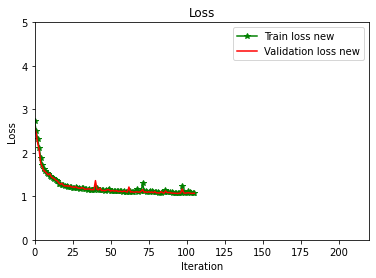

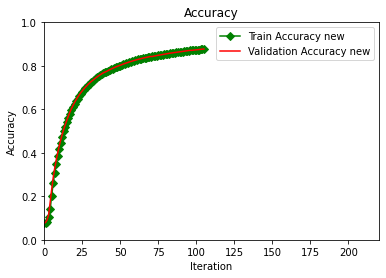

Iteration: 105, train loss: 1.0731, validation loss: 1.0697, train acc: 0.8772, validation acc: 0.8776
Step: 0 	Training Loss: 1.0271652 Training Acc: 0.87769634
Step: 1 	Training Loss: 1.0531533 Training Acc: 0.87770647
Step: 2 	Training Loss: 1.0470018 Training Acc: 0.877714
Step: 3 	Training Loss: 1.115142 Training Acc: 0.8777215
Step: 4 	Training Loss: 1.0451319 Training Acc: 0.8777342
Step: 5 	Training Loss: 1.0760446 Training Acc: 0.87774336
Step: 6 	Training Loss: 1.0495815 Training Acc: 0.8777552
Step: 7 	Training Loss: 1.0600051 Training Acc: 0.877767
Step: 8 	Training Loss: 1.0952206 Training Acc: 0.87777454
Step: 9 	Training Loss: 1.1279569 Training Acc: 0.87778026
Step: 10 	Training Loss: 1.0773149 Training Acc: 0.8777895
Step: 11 	Training Loss: 1.0659232 Training Acc: 0.87779784
Step: 12 	Training Loss: 1.1058333 Training Acc: 0.87780446
Step: 13 	Training Loss: 1.0671601 Training Acc: 0.8778128
Step: 14 	Training Loss: 1.0725867 Training Acc: 0.87782115
Step: 15 	Trainin

Step: 53 	Training Loss: 1.083324 Training Acc: 0.8789366
Step: 54 	Training Loss: 1.0904312 Training Acc: 0.8789455
Step: 55 	Training Loss: 1.1698357 Training Acc: 0.8789485
Step: 56 	Training Loss: 1.0409904 Training Acc: 0.8789592
Step: 57 	Training Loss: 1.0889295 Training Acc: 0.8789673
Step: 58 	Training Loss: 1.0543326 Training Acc: 0.8789762
Step: 59 	Training Loss: 1.0876338 Training Acc: 0.87898433
Step: 60 	Training Loss: 1.0801513 Training Acc: 0.87899244
Step: 61 	Training Loss: 1.0460525 Training Acc: 0.87900394
Step: 62 	Training Loss: 1.0354111 Training Acc: 0.8790146
Step: 63 	Training Loss: 1.0714462 Training Acc: 0.87902266
Step: 64 	Training Loss: 1.0614738 Training Acc: 0.8790291
Step: 65 	Training Loss: 1.0877365 Training Acc: 0.87903804
Step: 66 	Training Loss: 1.0669303 Training Acc: 0.8790478
Step: 67 	Training Loss: 1.0413436 Training Acc: 0.8790584
Step: 0 	Validation Loss: 1.0727923 Validation Acc: 0.87906826
Step: 1 	Validation Loss: 1.1130383 Validation A

Step: 22 	Training Loss: 1.0847814 Training Acc: 0.88014275
Step: 23 	Training Loss: 1.0689464 Training Acc: 0.88015145
Step: 24 	Training Loss: 1.0621016 Training Acc: 0.880161
Step: 25 	Training Loss: 1.0933284 Training Acc: 0.88016963
Step: 26 	Training Loss: 1.0767298 Training Acc: 0.88017833
Step: 27 	Training Loss: 1.1491835 Training Acc: 0.88018197
Step: 28 	Training Loss: 1.066014 Training Acc: 0.8801915
Step: 29 	Training Loss: 1.0903542 Training Acc: 0.8801994
Step: 30 	Training Loss: 1.1340947 Training Acc: 0.8802055
Step: 31 	Training Loss: 1.0347215 Training Acc: 0.88021755
Step: 32 	Training Loss: 1.0523736 Training Acc: 0.8802271
Step: 33 	Training Loss: 1.0655435 Training Acc: 0.88023496
Step: 34 	Training Loss: 1.0470785 Training Acc: 0.88024443
Step: 35 	Training Loss: 1.0663649 Training Acc: 0.880254
Step: 36 	Training Loss: 1.0448391 Training Acc: 0.8802627
Step: 37 	Training Loss: 1.0804887 Training Acc: 0.880268
Step: 38 	Training Loss: 1.0751059 Training Acc: 0.8

Step: 11 	Validation Loss: 1.0739222 Validation Acc: 0.8812964
Step: 12 	Validation Loss: 1.062171 Validation Acc: 0.8813073
Step: 13 	Validation Loss: 1.1034851 Validation Acc: 0.88131577
Step: 14 	Validation Loss: 1.098027 Validation Acc: 0.88132256
Step: 15 	Validation Loss: 1.0644515 Validation Acc: 0.8813335
Step: 16 	Validation Loss: 1.0808692 Validation Acc: 0.88134354


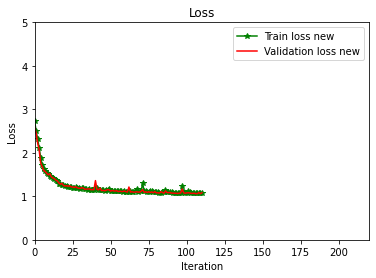

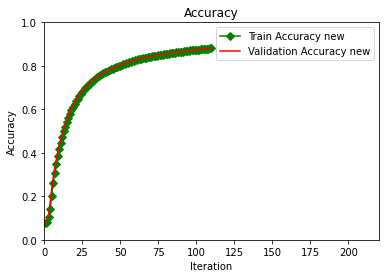

Iteration: 110, train loss: 1.0816, validation loss: 1.0834, train acc: 0.8809, validation acc: 0.8813
Step: 0 	Training Loss: 1.045749 Training Acc: 0.8813553
Step: 1 	Training Loss: 1.0615776 Training Acc: 0.8813646
Step: 2 	Training Loss: 1.0450985 Training Acc: 0.88137466
Step: 3 	Training Loss: 1.1192576 Training Acc: 0.88137895
Step: 4 	Training Loss: 1.054437 Training Acc: 0.88138986
Step: 5 	Training Loss: 1.0846703 Training Acc: 0.8813975
Step: 6 	Training Loss: 1.0383354 Training Acc: 0.88140756
Step: 7 	Training Loss: 1.0442288 Training Acc: 0.88141847
Step: 8 	Training Loss: 1.1140255 Training Acc: 0.88142437
Step: 9 	Training Loss: 1.1338695 Training Acc: 0.8814295
Step: 10 	Training Loss: 1.0881836 Training Acc: 0.88143706
Step: 11 	Training Loss: 1.0810854 Training Acc: 0.8814447
Step: 12 	Training Loss: 1.1263294 Training Acc: 0.8814489
Step: 13 	Training Loss: 1.0676472 Training Acc: 0.8814557
Step: 14 	Training Loss: 1.0933006 Training Acc: 0.88146245
Step: 15 	Traini

Step: 53 	Training Loss: 1.0786974 Training Acc: 0.8824738
Step: 54 	Training Loss: 1.0900064 Training Acc: 0.8824812
Step: 55 	Training Loss: 1.1492546 Training Acc: 0.8824837
Step: 56 	Training Loss: 1.042239 Training Acc: 0.88249356
Step: 57 	Training Loss: 1.0907243 Training Acc: 0.8825009
Step: 58 	Training Loss: 1.0558928 Training Acc: 0.8825091
Step: 59 	Training Loss: 1.0617678 Training Acc: 0.88251644
Step: 60 	Training Loss: 1.0795324 Training Acc: 0.88252383
Step: 61 	Training Loss: 1.0487645 Training Acc: 0.88253367
Step: 62 	Training Loss: 1.0351527 Training Acc: 0.88254344
Step: 63 	Training Loss: 1.0722367 Training Acc: 0.88255084
Step: 64 	Training Loss: 1.0642184 Training Acc: 0.8825557
Step: 65 	Training Loss: 1.0863068 Training Acc: 0.8825631
Step: 66 	Training Loss: 1.0525415 Training Acc: 0.8825721
Step: 67 	Training Loss: 1.0373503 Training Acc: 0.8825819
Step: 0 	Validation Loss: 1.0721607 Validation Acc: 0.8825909
Step: 1 	Validation Loss: 1.1002355 Validation A

Step: 20 	Training Loss: 1.1541432 Training Acc: 0.88217133
Step: 21 	Training Loss: 1.1393008 Training Acc: 0.8821786
Step: 22 	Training Loss: 1.1988066 Training Acc: 0.8821803
Step: 23 	Training Loss: 1.176451 Training Acc: 0.88218355
Step: 24 	Training Loss: 1.1754637 Training Acc: 0.88218683
Step: 25 	Training Loss: 1.1879799 Training Acc: 0.88218933
Step: 26 	Training Loss: 1.208799 Training Acc: 0.882191
Step: 27 	Training Loss: 1.2617335 Training Acc: 0.8821903
Step: 28 	Training Loss: 1.1559596 Training Acc: 0.88219595
Step: 29 	Training Loss: 1.2048006 Training Acc: 0.8821976
Step: 30 	Training Loss: 1.2294605 Training Acc: 0.8821977
Step: 31 	Training Loss: 1.1098771 Training Acc: 0.8822058
Step: 32 	Training Loss: 1.1443759 Training Acc: 0.8822115
Step: 33 	Training Loss: 1.1332567 Training Acc: 0.88221633
Step: 34 	Training Loss: 1.0877178 Training Acc: 0.88222444
Step: 35 	Training Loss: 1.1172409 Training Acc: 0.88223255
Step: 36 	Training Loss: 1.1066229 Training Acc: 0.

Step: 6 	Validation Loss: 1.1143308 Validation Acc: 0.8828506
Step: 7 	Validation Loss: 1.07526 Validation Acc: 0.8828569
Step: 8 	Validation Loss: 1.0758135 Validation Acc: 0.8828656
Step: 9 	Validation Loss: 1.0272971 Validation Acc: 0.8828759
Step: 10 	Validation Loss: 1.1087482 Validation Acc: 0.8828823
Step: 11 	Validation Loss: 1.076643 Validation Acc: 0.88289016
Step: 12 	Validation Loss: 1.0507514 Validation Acc: 0.8829005
Step: 13 	Validation Loss: 1.0899944 Validation Acc: 0.8829076
Step: 14 	Validation Loss: 1.1051261 Validation Acc: 0.8829147
Step: 15 	Validation Loss: 1.0526053 Validation Acc: 0.88292426
Step: 16 	Validation Loss: 1.0613298 Validation Acc: 0.88293296


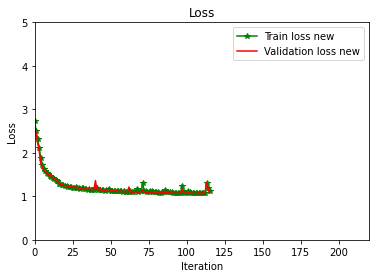

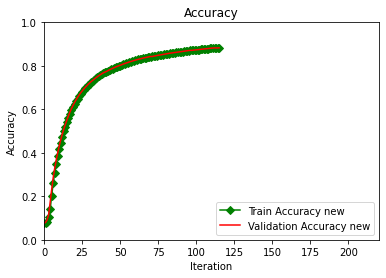

Iteration: 115, train loss: 1.1208, validation loss: 1.0730, train acc: 0.8826, validation acc: 0.8829
Step: 0 	Training Loss: 1.0394211 Training Acc: 0.882944
Step: 1 	Training Loss: 1.0518496 Training Acc: 0.8829527
Step: 2 	Training Loss: 1.0381211 Training Acc: 0.8829614
Step: 3 	Training Loss: 1.1138957 Training Acc: 0.88296694
Step: 4 	Training Loss: 1.0387692 Training Acc: 0.88297725
Step: 5 	Training Loss: 1.0639906 Training Acc: 0.8829851
Step: 6 	Training Loss: 1.0333463 Training Acc: 0.8829954
Step: 7 	Training Loss: 1.0494063 Training Acc: 0.8830049
Step: 8 	Training Loss: 1.1087048 Training Acc: 0.8830096
Step: 9 	Training Loss: 1.1310236 Training Acc: 0.8830143
Step: 10 	Training Loss: 1.0784636 Training Acc: 0.88302225
Step: 11 	Training Loss: 1.078037 Training Acc: 0.88302857
Step: 12 	Training Loss: 1.1070348 Training Acc: 0.8830333
Step: 13 	Training Loss: 1.068058 Training Acc: 0.883042
Step: 14 	Training Loss: 1.0877993 Training Acc: 0.8830491
Step: 15 	Training Los

Step: 52 	Training Loss: 1.1068869 Training Acc: 0.883933
Step: 53 	Training Loss: 1.0817583 Training Acc: 0.8839376
Step: 54 	Training Loss: 1.084838 Training Acc: 0.8839453
Step: 55 	Training Loss: 1.1537187 Training Acc: 0.88394755
Step: 56 	Training Loss: 1.0414152 Training Acc: 0.8839568
Step: 57 	Training Loss: 1.0896049 Training Acc: 0.8839637
Step: 58 	Training Loss: 1.0546856 Training Acc: 0.8839714
Step: 59 	Training Loss: 1.063169 Training Acc: 0.8839783
Step: 60 	Training Loss: 1.0781403 Training Acc: 0.8839852
Step: 61 	Training Loss: 1.0544322 Training Acc: 0.88399446
Step: 62 	Training Loss: 1.0350252 Training Acc: 0.88400376
Step: 63 	Training Loss: 1.0738486 Training Acc: 0.8840106
Step: 64 	Training Loss: 1.0639551 Training Acc: 0.88401675
Step: 65 	Training Loss: 1.0826724 Training Acc: 0.88402444
Step: 66 	Training Loss: 1.0651158 Training Acc: 0.8840329
Step: 67 	Training Loss: 1.0415931 Training Acc: 0.88404214
Step: 0 	Validation Loss: 1.0828325 Validation Acc: 0

Step: 19 	Training Loss: 1.0931909 Training Acc: 0.8849624
Step: 20 	Training Loss: 1.0683354 Training Acc: 0.8849699
Step: 21 	Training Loss: 1.0530996 Training Acc: 0.88497967
Step: 22 	Training Loss: 1.0804639 Training Acc: 0.8849872
Step: 23 	Training Loss: 1.0592041 Training Acc: 0.8849947
Step: 24 	Training Loss: 1.0537847 Training Acc: 0.8850029
Step: 25 	Training Loss: 1.0732713 Training Acc: 0.88500965
Step: 26 	Training Loss: 1.0597013 Training Acc: 0.8850156
Step: 27 	Training Loss: 1.1451973 Training Acc: 0.88501847
Step: 28 	Training Loss: 1.0570554 Training Acc: 0.8850267
Step: 29 	Training Loss: 1.0859556 Training Acc: 0.8850334
Step: 30 	Training Loss: 1.119096 Training Acc: 0.88503784
Step: 31 	Training Loss: 1.032227 Training Acc: 0.8850484
Step: 32 	Training Loss: 1.0513618 Training Acc: 0.88505584
Step: 33 	Training Loss: 1.0829229 Training Acc: 0.8850626
Step: 34 	Training Loss: 1.0587618 Training Acc: 0.88507
Step: 35 	Training Loss: 1.0672371 Training Acc: 0.8850

Step: 6 	Validation Loss: 1.1026251 Validation Acc: 0.88600594
Step: 7 	Validation Loss: 1.062621 Validation Acc: 0.8860132
Step: 8 	Validation Loss: 1.0605371 Validation Acc: 0.88602054
Step: 9 	Validation Loss: 1.0230789 Validation Acc: 0.8860301
Step: 10 	Validation Loss: 1.1015759 Validation Acc: 0.88603735
Step: 11 	Validation Loss: 1.0647465 Validation Acc: 0.8860462
Step: 12 	Validation Loss: 1.030607 Validation Acc: 0.88605577
Step: 13 	Validation Loss: 1.086441 Validation Acc: 0.88606375
Step: 14 	Validation Loss: 1.0809962 Validation Acc: 0.8860703
Step: 15 	Validation Loss: 1.0406876 Validation Acc: 0.88607985
Step: 16 	Validation Loss: 1.0528922 Validation Acc: 0.88608867


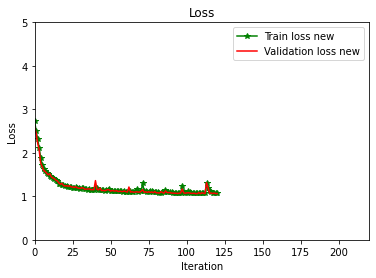

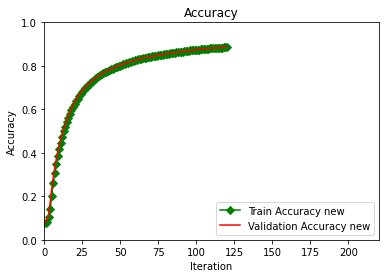

Iteration: 120, train loss: 1.0687, validation loss: 1.0635, train acc: 0.8857, validation acc: 0.8860
Step: 0 	Training Loss: 1.0236058 Training Acc: 0.886099
Step: 1 	Training Loss: 1.0449691 Training Acc: 0.886107
Step: 2 	Training Loss: 1.0330007 Training Acc: 0.8861158
Step: 3 	Training Loss: 1.0989424 Training Acc: 0.8861223
Step: 4 	Training Loss: 1.0317256 Training Acc: 0.8861326
Step: 5 	Training Loss: 1.0610887 Training Acc: 0.88613987
Step: 6 	Training Loss: 1.035327 Training Acc: 0.88614947
Step: 7 	Training Loss: 1.0414 Training Acc: 0.886159
Step: 8 	Training Loss: 1.0884576 Training Acc: 0.88616395
Step: 9 	Training Loss: 1.1272783 Training Acc: 0.8861682
Step: 10 	Training Loss: 1.074819 Training Acc: 0.88617545
Step: 11 	Training Loss: 1.0612894 Training Acc: 0.8861827
Step: 12 	Training Loss: 1.1001754 Training Acc: 0.8861877
Step: 13 	Training Loss: 1.0729413 Training Acc: 0.88619494
Step: 14 	Training Loss: 1.0811081 Training Acc: 0.8862022
Step: 15 	Training Loss: 

Step: 54 	Training Loss: 1.0896327 Training Acc: 0.88707507
Step: 55 	Training Loss: 1.1754152 Training Acc: 0.8870769
Step: 56 	Training Loss: 1.0571489 Training Acc: 0.8870848
Step: 57 	Training Loss: 1.1095524 Training Acc: 0.8870896
Step: 58 	Training Loss: 1.0508002 Training Acc: 0.8870974
Step: 59 	Training Loss: 1.0807991 Training Acc: 0.88710374
Step: 60 	Training Loss: 1.0898504 Training Acc: 0.8871101
Step: 61 	Training Loss: 1.0469869 Training Acc: 0.8871194
Step: 62 	Training Loss: 1.031022 Training Acc: 0.887128
Step: 63 	Training Loss: 1.0690913 Training Acc: 0.8871343
Step: 64 	Training Loss: 1.0761762 Training Acc: 0.88713914
Step: 65 	Training Loss: 1.1061525 Training Acc: 0.88714546
Step: 66 	Training Loss: 1.067802 Training Acc: 0.88715327
Step: 67 	Training Loss: 1.0671142 Training Acc: 0.8871611
Step: 0 	Validation Loss: 1.0757484 Validation Acc: 0.8871689
Step: 1 	Validation Loss: 1.1465673 Validation Acc: 0.8871722
Step: 2 	Validation Loss: 1.1174983 Validation A

Step: 21 	Training Loss: 1.0858963 Training Acc: 0.88802356
Step: 22 	Training Loss: 1.1095101 Training Acc: 0.8880297
Step: 23 	Training Loss: 1.0885931 Training Acc: 0.8880381
Step: 24 	Training Loss: 1.0711031 Training Acc: 0.88804424
Step: 25 	Training Loss: 1.1017232 Training Acc: 0.8880482
Step: 26 	Training Loss: 1.1211455 Training Acc: 0.8880492
Step: 27 	Training Loss: 1.1758404 Training Acc: 0.88805014
Step: 28 	Training Loss: 1.1095858 Training Acc: 0.88805556
Step: 29 	Training Loss: 1.1820955 Training Acc: 0.8880595
Step: 30 	Training Loss: 1.2165885 Training Acc: 0.8880605
Step: 31 	Training Loss: 1.0813283 Training Acc: 0.88806885
Step: 32 	Training Loss: 1.0904747 Training Acc: 0.8880765
Step: 33 	Training Loss: 1.1217548 Training Acc: 0.8880819
Step: 34 	Training Loss: 1.0772135 Training Acc: 0.88808805
Step: 35 	Training Loss: 1.0740557 Training Acc: 0.8880957
Step: 36 	Training Loss: 1.0490625 Training Acc: 0.8881033
Step: 37 	Training Loss: 1.0626659 Training Acc: 0

Step: 6 	Validation Loss: 1.1094196 Validation Acc: 0.88892156
Step: 7 	Validation Loss: 1.0670455 Validation Acc: 0.8889276
Step: 8 	Validation Loss: 1.0643187 Validation Acc: 0.888935
Step: 9 	Validation Loss: 1.0322077 Validation Acc: 0.88894325
Step: 10 	Validation Loss: 1.088604 Validation Acc: 0.8889492
Step: 11 	Validation Loss: 1.071695 Validation Acc: 0.88895667
Step: 12 	Validation Loss: 1.0325501 Validation Acc: 0.8889656
Step: 13 	Validation Loss: 1.0964086 Validation Acc: 0.88897234
Step: 14 	Validation Loss: 1.0746056 Validation Acc: 0.8889783
Step: 15 	Validation Loss: 1.0383093 Validation Acc: 0.8889872
Step: 16 	Validation Loss: 1.0540984 Validation Acc: 0.8889954


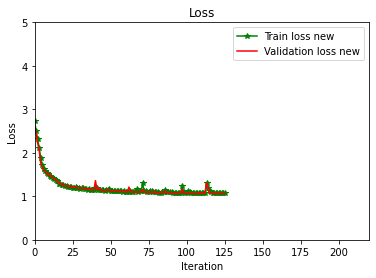

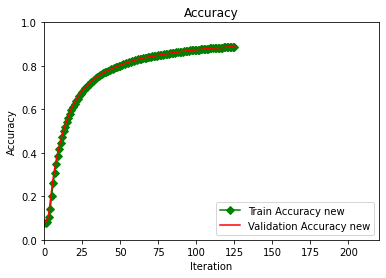

Iteration: 125, train loss: 1.0722, validation loss: 1.0644, train acc: 0.8887, validation acc: 0.8889
Step: 0 	Training Loss: 1.0181152 Training Acc: 0.889005
Step: 1 	Training Loss: 1.0439415 Training Acc: 0.88901246
Step: 2 	Training Loss: 1.0574439 Training Acc: 0.8890192
Step: 3 	Training Loss: 1.106859 Training Acc: 0.88902444
Step: 4 	Training Loss: 1.0305612 Training Acc: 0.8890341
Step: 5 	Training Loss: 1.0661409 Training Acc: 0.88904077
Step: 6 	Training Loss: 1.030875 Training Acc: 0.88904965
Step: 7 	Training Loss: 1.0420585 Training Acc: 0.8890586
Step: 8 	Training Loss: 1.0896318 Training Acc: 0.88906306
Step: 9 	Training Loss: 1.1280959 Training Acc: 0.8890669
Step: 10 	Training Loss: 1.0842466 Training Acc: 0.88907355
Step: 11 	Training Loss: 1.0715508 Training Acc: 0.8890803
Step: 12 	Training Loss: 1.1053541 Training Acc: 0.88908404
Step: 13 	Training Loss: 1.0634079 Training Acc: 0.8890922
Step: 14 	Training Loss: 1.0828271 Training Acc: 0.88909817
Step: 15 	Trainin

Step: 52 	Training Loss: 1.1561918 Training Acc: 0.88990265
Step: 53 	Training Loss: 1.1871805 Training Acc: 0.88990414
Step: 54 	Training Loss: 1.1667358 Training Acc: 0.889905
Step: 55 	Training Loss: 1.254888 Training Acc: 0.8899007
Step: 56 	Training Loss: 1.0910854 Training Acc: 0.88990796
Step: 57 	Training Loss: 1.1382933 Training Acc: 0.8899131
Step: 58 	Training Loss: 1.0888098 Training Acc: 0.88991964
Step: 59 	Training Loss: 1.0904036 Training Acc: 0.88992614
Step: 60 	Training Loss: 1.1136382 Training Acc: 0.88992983
Step: 61 	Training Loss: 1.07294 Training Acc: 0.8899371
Step: 62 	Training Loss: 1.0712872 Training Acc: 0.8899429
Step: 63 	Training Loss: 1.0881076 Training Acc: 0.889948
Step: 64 	Training Loss: 1.0910847 Training Acc: 0.8899531
Step: 65 	Training Loss: 1.1208372 Training Acc: 0.8899589
Step: 66 	Training Loss: 1.0919145 Training Acc: 0.8899655
Step: 67 	Training Loss: 1.0762677 Training Acc: 0.8899727
Step: 0 	Validation Loss: 1.1417902 Validation Acc: 0.8

Step: 21 	Training Loss: 1.0410368 Training Acc: 0.89073235
Step: 22 	Training Loss: 1.0814368 Training Acc: 0.89073807
Step: 23 	Training Loss: 1.0512776 Training Acc: 0.89074516
Step: 24 	Training Loss: 1.0322747 Training Acc: 0.89075226
Step: 25 	Training Loss: 1.0666301 Training Acc: 0.8907579
Step: 26 	Training Loss: 1.060462 Training Acc: 0.8907636
Step: 27 	Training Loss: 1.1401515 Training Acc: 0.89076644
Step: 28 	Training Loss: 1.0551234 Training Acc: 0.89077353
Step: 29 	Training Loss: 1.0952783 Training Acc: 0.8907792
Step: 30 	Training Loss: 1.1165295 Training Acc: 0.8907827
Step: 31 	Training Loss: 1.0306187 Training Acc: 0.89079195
Step: 32 	Training Loss: 1.0473795 Training Acc: 0.89079976
Step: 33 	Training Loss: 1.0615969 Training Acc: 0.8908054
Step: 34 	Training Loss: 1.0499544 Training Acc: 0.8908125
Step: 35 	Training Loss: 1.0651404 Training Acc: 0.8908196
Step: 36 	Training Loss: 1.0386019 Training Acc: 0.89082736
Step: 37 	Training Loss: 1.0464544 Training Acc:

Step: 10 	Validation Loss: 1.084269 Validation Acc: 0.89165837
Step: 11 	Validation Loss: 1.051275 Validation Acc: 0.89166594
Step: 12 	Validation Loss: 1.0288546 Validation Acc: 0.8916743
Step: 13 	Validation Loss: 1.0853674 Validation Acc: 0.8916812
Step: 14 	Validation Loss: 1.059413 Validation Acc: 0.89168745
Step: 15 	Validation Loss: 1.0360818 Validation Acc: 0.89169574
Step: 16 	Validation Loss: 1.0484521 Validation Acc: 0.89170337


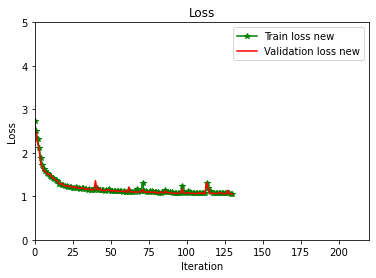

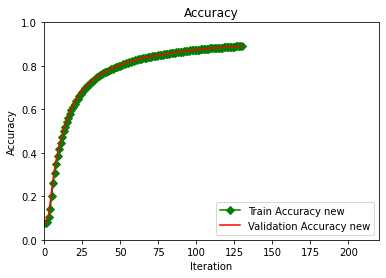

Iteration: 130, train loss: 1.0611, validation loss: 1.0543, train acc: 0.8914, validation acc: 0.8916
Step: 0 	Training Loss: 1.0175385 Training Acc: 0.8917124
Step: 1 	Training Loss: 1.0377941 Training Acc: 0.89171934
Step: 2 	Training Loss: 1.0257094 Training Acc: 0.8917276
Step: 3 	Training Loss: 1.0936778 Training Acc: 0.89173245
Step: 4 	Training Loss: 1.0261518 Training Acc: 0.89174145
Step: 5 	Training Loss: 1.0563467 Training Acc: 0.89174765
Step: 6 	Training Loss: 1.024115 Training Acc: 0.891756
Step: 7 	Training Loss: 1.0366489 Training Acc: 0.8917643
Step: 8 	Training Loss: 1.0882151 Training Acc: 0.8917684
Step: 9 	Training Loss: 1.1222088 Training Acc: 0.8917725
Step: 10 	Training Loss: 1.0705826 Training Acc: 0.8917787
Step: 11 	Training Loss: 1.0593011 Training Acc: 0.8917849
Step: 12 	Training Loss: 1.0973718 Training Acc: 0.891789
Step: 13 	Training Loss: 1.0245736 Training Acc: 0.89179665
Step: 14 	Training Loss: 1.0545537 Training Acc: 0.89180285
Step: 15 	Training 

Step: 53 	Training Loss: 1.0383178 Training Acc: 0.89259857
Step: 54 	Training Loss: 1.0693436 Training Acc: 0.8926053
Step: 55 	Training Loss: 1.1428657 Training Acc: 0.89260656
Step: 56 	Training Loss: 1.0360138 Training Acc: 0.89261395
Step: 57 	Training Loss: 1.08183 Training Acc: 0.89261866
Step: 58 	Training Loss: 1.0353937 Training Acc: 0.8926254
Step: 59 	Training Loss: 1.0446787 Training Acc: 0.8926315
Step: 60 	Training Loss: 1.0750012 Training Acc: 0.89263684
Step: 61 	Training Loss: 1.0327787 Training Acc: 0.89264494
Step: 62 	Training Loss: 1.0263331 Training Acc: 0.8926524
Step: 63 	Training Loss: 1.0643915 Training Acc: 0.89265776
Step: 64 	Training Loss: 1.0561873 Training Acc: 0.8926624
Step: 65 	Training Loss: 1.0810306 Training Acc: 0.8926685
Step: 66 	Training Loss: 1.0598942 Training Acc: 0.8926752
Step: 67 	Training Loss: 1.0324038 Training Acc: 0.8926826
Step: 0 	Validation Loss: 1.0629141 Validation Acc: 0.89268935
Step: 1 	Validation Loss: 1.0810571 Validation 

Step: 21 	Training Loss: 1.0348388 Training Acc: 0.89347494
Step: 22 	Training Loss: 1.0750977 Training Acc: 0.8934802
Step: 23 	Training Loss: 1.0486957 Training Acc: 0.89348674
Step: 24 	Training Loss: 1.0269783 Training Acc: 0.893494
Step: 25 	Training Loss: 1.0623991 Training Acc: 0.89349926
Step: 26 	Training Loss: 1.0544467 Training Acc: 0.89350516
Step: 27 	Training Loss: 1.1376739 Training Acc: 0.89350766
Step: 28 	Training Loss: 1.0520024 Training Acc: 0.8935142
Step: 29 	Training Loss: 1.08321 Training Acc: 0.89351946
Step: 30 	Training Loss: 1.1118406 Training Acc: 0.8935226
Step: 31 	Training Loss: 1.0251613 Training Acc: 0.89353126
Step: 32 	Training Loss: 1.0453346 Training Acc: 0.8935378
Step: 33 	Training Loss: 1.0553341 Training Acc: 0.89354306
Step: 34 	Training Loss: 1.0355725 Training Acc: 0.8935496
Step: 35 	Training Loss: 1.0572083 Training Acc: 0.89355624
Step: 36 	Training Loss: 1.0339367 Training Acc: 0.8935628
Step: 37 	Training Loss: 1.040592 Training Acc: 0.

Step: 9 	Validation Loss: 1.0123615 Validation Acc: 0.8943368
Step: 10 	Validation Loss: 1.0813131 Validation Acc: 0.8943426
Step: 11 	Validation Loss: 1.050992 Validation Acc: 0.8943497
Step: 12 	Validation Loss: 1.0266883 Validation Acc: 0.8943575
Step: 13 	Validation Loss: 1.0871066 Validation Acc: 0.89436394
Step: 14 	Validation Loss: 1.055186 Validation Acc: 0.8943697
Step: 15 	Validation Loss: 1.0346022 Validation Acc: 0.89437747
Step: 16 	Validation Loss: 1.0442498 Validation Acc: 0.8943846


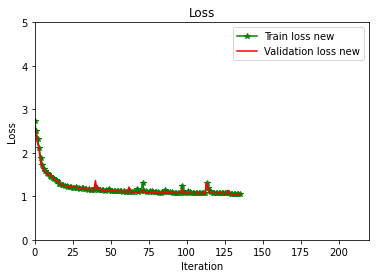

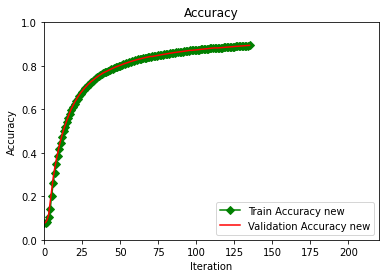

Iteration: 135, train loss: 1.0571, validation loss: 1.0521, train acc: 0.8941, validation acc: 0.8943
Step: 0 	Training Loss: 1.0146544 Training Acc: 0.894393
Step: 1 	Training Loss: 1.0375087 Training Acc: 0.89439946
Step: 2 	Training Loss: 1.0261023 Training Acc: 0.8944066
Step: 3 	Training Loss: 1.0924634 Training Acc: 0.89441097
Step: 4 	Training Loss: 1.0245376 Training Acc: 0.89441943
Step: 5 	Training Loss: 1.0540136 Training Acc: 0.8944252
Step: 6 	Training Loss: 1.0279741 Training Acc: 0.89443296
Step: 7 	Training Loss: 1.0376793 Training Acc: 0.89444077
Step: 8 	Training Loss: 1.0838451 Training Acc: 0.8944451
Step: 9 	Training Loss: 1.1238531 Training Acc: 0.8944482
Step: 10 	Training Loss: 1.0702974 Training Acc: 0.89445394
Step: 11 	Training Loss: 1.058248 Training Acc: 0.89445966
Step: 12 	Training Loss: 1.0973426 Training Acc: 0.8944641
Step: 13 	Training Loss: 1.0230265 Training Acc: 0.89447117
Step: 14 	Training Loss: 1.0492191 Training Acc: 0.8944769
Step: 15 	Traini

Step: 54 	Training Loss: 1.3515118 Training Acc: 0.89426285
Step: 55 	Training Loss: 1.3313229 Training Acc: 0.89425784
Step: 56 	Training Loss: 1.2194741 Training Acc: 0.89425886
Step: 57 	Training Loss: 1.2145126 Training Acc: 0.89425856
Step: 58 	Training Loss: 1.2437427 Training Acc: 0.89425755
Step: 59 	Training Loss: 1.2305442 Training Acc: 0.8942553
Step: 60 	Training Loss: 1.1875178 Training Acc: 0.8942563
Step: 61 	Training Loss: 1.2440732 Training Acc: 0.8942546
Step: 62 	Training Loss: 1.2783738 Training Acc: 0.89425164
Step: 63 	Training Loss: 1.3299625 Training Acc: 0.8942467
Step: 64 	Training Loss: 1.2166889 Training Acc: 0.894245
Step: 65 	Training Loss: 1.2992728 Training Acc: 0.8942414
Step: 66 	Training Loss: 1.2414868 Training Acc: 0.8942397
Step: 67 	Training Loss: 1.2124577 Training Acc: 0.8942401
Step: 0 	Validation Loss: 1.3371212 Validation Acc: 0.89423513
Step: 1 	Validation Loss: 1.2476746 Validation Acc: 0.8942328
Step: 2 	Validation Loss: 1.1952252 Validati

Step: 21 	Training Loss: 1.1936575 Training Acc: 0.8937937
Step: 22 	Training Loss: 1.2234967 Training Acc: 0.8937961
Step: 23 	Training Loss: 1.178714 Training Acc: 0.89379907
Step: 24 	Training Loss: 1.1405771 Training Acc: 0.89380014
Step: 25 	Training Loss: 1.1127651 Training Acc: 0.8938045
Step: 26 	Training Loss: 1.1193058 Training Acc: 0.8938069
Step: 27 	Training Loss: 1.1997967 Training Acc: 0.89380723
Step: 28 	Training Loss: 1.0997306 Training Acc: 0.89381295
Step: 29 	Training Loss: 1.2038109 Training Acc: 0.8938153
Step: 30 	Training Loss: 1.2108228 Training Acc: 0.89381504
Step: 31 	Training Loss: 1.07652 Training Acc: 0.8938207
Step: 32 	Training Loss: 1.1263244 Training Acc: 0.8938231
Step: 33 	Training Loss: 1.1427331 Training Acc: 0.8938228
Step: 34 	Training Loss: 1.1478281 Training Acc: 0.8938252
Step: 35 	Training Loss: 1.1419396 Training Acc: 0.89382684
Step: 36 	Training Loss: 1.1251198 Training Acc: 0.8938286
Step: 37 	Training Loss: 1.188352 Training Acc: 0.893

Step: 9 	Validation Loss: 1.0442681 Validation Acc: 0.894211
Step: 10 	Validation Loss: 1.1191032 Validation Acc: 0.89421463
Step: 11 	Validation Loss: 1.0856223 Validation Acc: 0.8942208
Step: 12 	Validation Loss: 1.0698755 Validation Acc: 0.8942277
Step: 13 	Validation Loss: 1.1113409 Validation Acc: 0.89423263
Step: 14 	Validation Loss: 1.1150099 Validation Acc: 0.8942362
Step: 15 	Validation Loss: 1.0599928 Validation Acc: 0.89424247
Step: 16 	Validation Loss: 1.0879192 Validation Acc: 0.89424866


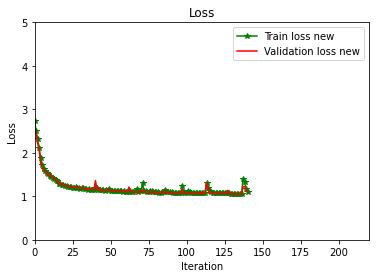

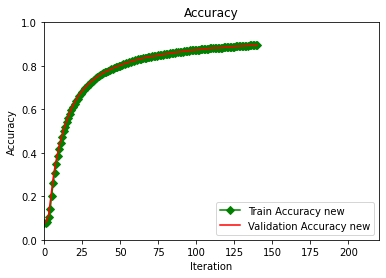

Iteration: 140, train loss: 1.1104, validation loss: 1.0950, train acc: 0.8940, validation acc: 0.8942
Step: 0 	Training Loss: 1.0476685 Training Acc: 0.89425683
Step: 1 	Training Loss: 1.0791726 Training Acc: 0.89426243
Step: 2 	Training Loss: 1.069856 Training Acc: 0.8942693
Step: 3 	Training Loss: 1.1509789 Training Acc: 0.8942722
Step: 4 	Training Loss: 1.0660406 Training Acc: 0.8942797
Step: 5 	Training Loss: 1.1099782 Training Acc: 0.894284
Step: 6 	Training Loss: 1.0513519 Training Acc: 0.89429086
Step: 7 	Training Loss: 1.0742911 Training Acc: 0.89429706
Step: 8 	Training Loss: 1.1161308 Training Acc: 0.8942994
Step: 9 	Training Loss: 1.1385072 Training Acc: 0.89430165
Step: 10 	Training Loss: 1.0912821 Training Acc: 0.8943072
Step: 11 	Training Loss: 1.0806707 Training Acc: 0.89431214
Step: 12 	Training Loss: 1.1083571 Training Acc: 0.8943164
Step: 13 	Training Loss: 1.072395 Training Acc: 0.8943219
Step: 14 	Training Loss: 1.0855032 Training Acc: 0.89432615
Step: 15 	Training

Step: 53 	Training Loss: 1.0470397 Training Acc: 0.894972
Step: 54 	Training Loss: 1.0851872 Training Acc: 0.8949768
Step: 55 	Training Loss: 1.1690795 Training Acc: 0.89497775
Step: 56 	Training Loss: 1.0441765 Training Acc: 0.8949845
Step: 57 	Training Loss: 1.0957189 Training Acc: 0.89498925
Step: 58 	Training Loss: 1.0400314 Training Acc: 0.89499533
Step: 59 	Training Loss: 1.0630486 Training Acc: 0.89500076
Step: 60 	Training Loss: 1.079066 Training Acc: 0.8950056
Step: 61 	Training Loss: 1.0388207 Training Acc: 0.8950136
Step: 62 	Training Loss: 1.0381143 Training Acc: 0.8950203
Step: 63 	Training Loss: 1.1132063 Training Acc: 0.8950244
Step: 64 	Training Loss: 1.0936407 Training Acc: 0.89502794
Step: 65 	Training Loss: 1.1086454 Training Acc: 0.8950321
Step: 66 	Training Loss: 1.073289 Training Acc: 0.8950382
Step: 67 	Training Loss: 1.0487182 Training Acc: 0.89504486
Step: 0 	Validation Loss: 1.0998492 Validation Acc: 0.8950503
Step: 1 	Validation Loss: 1.1059654 Validation Acc

Step: 22 	Training Loss: 1.0755153 Training Acc: 0.8957484
Step: 23 	Training Loss: 1.0497861 Training Acc: 0.8957537
Step: 24 	Training Loss: 1.0278962 Training Acc: 0.8957603
Step: 25 	Training Loss: 1.0617181 Training Acc: 0.8957656
Step: 26 	Training Loss: 1.0579197 Training Acc: 0.8957703
Step: 27 	Training Loss: 1.1409589 Training Acc: 0.8957724
Step: 28 	Training Loss: 1.0533606 Training Acc: 0.89577836
Step: 29 	Training Loss: 1.0858364 Training Acc: 0.895783
Step: 30 	Training Loss: 1.126544 Training Acc: 0.8957858
Step: 31 	Training Loss: 1.0284806 Training Acc: 0.8957937
Step: 32 	Training Loss: 1.0456166 Training Acc: 0.8957996
Step: 33 	Training Loss: 1.0607247 Training Acc: 0.8958043
Step: 34 	Training Loss: 1.0424949 Training Acc: 0.8958102
Step: 35 	Training Loss: 1.058326 Training Acc: 0.89581615
Step: 36 	Training Loss: 1.0355453 Training Acc: 0.8958227
Step: 37 	Training Loss: 1.0421327 Training Acc: 0.895828
Step: 38 	Training Loss: 1.0526613 Training Acc: 0.8958333

Step: 8 	Validation Loss: 1.0567291 Validation Acc: 0.89651114
Step: 9 	Validation Loss: 1.0085753 Validation Acc: 0.89651823
Step: 10 	Validation Loss: 1.0814657 Validation Acc: 0.8965234
Step: 11 	Validation Loss: 1.0488324 Validation Acc: 0.89652985
Step: 12 	Validation Loss: 1.0301594 Validation Acc: 0.89653695
Step: 13 	Validation Loss: 1.0908899 Validation Acc: 0.89654213
Step: 14 	Validation Loss: 1.0551869 Validation Acc: 0.8965473
Step: 15 	Validation Loss: 1.0342495 Validation Acc: 0.8965544
Step: 16 	Validation Loss: 1.0480733 Validation Acc: 0.89656085


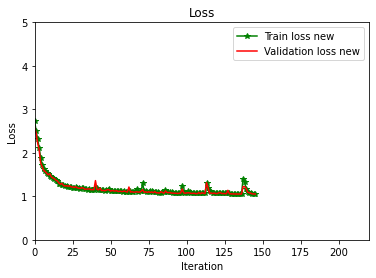

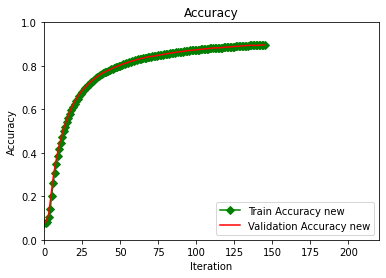

Iteration: 145, train loss: 1.0584, validation loss: 1.0524, train acc: 0.8963, validation acc: 0.8965
Step: 0 	Training Loss: 1.0144048 Training Acc: 0.8965686
Step: 1 	Training Loss: 1.036196 Training Acc: 0.8965744
Step: 2 	Training Loss: 1.0247159 Training Acc: 0.8965815
Step: 3 	Training Loss: 1.0921527 Training Acc: 0.8965854
Step: 4 	Training Loss: 1.0218449 Training Acc: 0.8965931
Step: 5 	Training Loss: 1.0558928 Training Acc: 0.8965983
Step: 6 	Training Loss: 1.0248346 Training Acc: 0.8966053
Step: 7 	Training Loss: 1.0438998 Training Acc: 0.8966124
Step: 8 	Training Loss: 1.0847723 Training Acc: 0.8966157
Step: 9 	Training Loss: 1.1211407 Training Acc: 0.89661896
Step: 10 	Training Loss: 1.070028 Training Acc: 0.89662415
Step: 11 	Training Loss: 1.0569055 Training Acc: 0.89662933
Step: 12 	Training Loss: 1.096647 Training Acc: 0.89663386
Step: 13 	Training Loss: 1.0209234 Training Acc: 0.8966403
Step: 14 	Training Loss: 1.0443538 Training Acc: 0.8966455
Step: 15 	Training Lo

Step: 52 	Training Loss: 1.0887378 Training Acc: 0.8973118
Step: 53 	Training Loss: 1.035583 Training Acc: 0.8973169
Step: 54 	Training Loss: 1.0694289 Training Acc: 0.89732194
Step: 55 	Training Loss: 1.163517 Training Acc: 0.89732265
Step: 56 	Training Loss: 1.0336711 Training Acc: 0.897329
Step: 57 	Training Loss: 1.0856817 Training Acc: 0.89733344
Step: 58 	Training Loss: 1.0329298 Training Acc: 0.8973391
Step: 59 	Training Loss: 1.0578396 Training Acc: 0.8973442
Step: 60 	Training Loss: 1.073276 Training Acc: 0.89734864
Step: 61 	Training Loss: 1.0327852 Training Acc: 0.89735615
Step: 62 	Training Loss: 1.0249692 Training Acc: 0.8973625
Step: 63 	Training Loss: 1.0630517 Training Acc: 0.89736694
Step: 64 	Training Loss: 1.05452 Training Acc: 0.89737076
Step: 65 	Training Loss: 1.0789925 Training Acc: 0.8973758
Step: 66 	Training Loss: 1.0613246 Training Acc: 0.8973815
Step: 67 	Training Loss: 1.0313503 Training Acc: 0.8973878
Step: 0 	Validation Loss: 1.0640069 Validation Acc: 0.8

Step: 20 	Training Loss: 1.0737195 Training Acc: 0.898036
Step: 21 	Training Loss: 1.0707065 Training Acc: 0.89804155
Step: 22 	Training Loss: 1.087017 Training Acc: 0.8980459
Step: 23 	Training Loss: 1.0576346 Training Acc: 0.89805084
Step: 24 	Training Loss: 1.0610306 Training Acc: 0.8980558
Step: 25 	Training Loss: 1.0747644 Training Acc: 0.89805955
Step: 26 	Training Loss: 1.0750636 Training Acc: 0.89806384
Step: 27 	Training Loss: 1.1473477 Training Acc: 0.89806515
Step: 28 	Training Loss: 1.0579929 Training Acc: 0.8980707
Step: 29 	Training Loss: 1.0986282 Training Acc: 0.89807504
Step: 30 	Training Loss: 1.1270585 Training Acc: 0.8980769
Step: 31 	Training Loss: 1.0288756 Training Acc: 0.8980837
Step: 32 	Training Loss: 1.044337 Training Acc: 0.8980893
Step: 33 	Training Loss: 1.057128 Training Acc: 0.898093
Step: 34 	Training Loss: 1.0348542 Training Acc: 0.8980985
Step: 35 	Training Loss: 1.0571239 Training Acc: 0.89810413
Step: 36 	Training Loss: 1.0338006 Training Acc: 0.898

Step: 9 	Validation Loss: 1.006976 Validation Acc: 0.89873654
Step: 10 	Validation Loss: 1.0792557 Validation Acc: 0.89874136
Step: 11 	Validation Loss: 1.0544376 Validation Acc: 0.89874685
Step: 12 	Validation Loss: 1.0299568 Validation Acc: 0.8987535
Step: 13 	Validation Loss: 1.0838137 Validation Acc: 0.89875895
Step: 14 	Validation Loss: 1.0560294 Validation Acc: 0.89876384
Step: 15 	Validation Loss: 1.0315676 Validation Acc: 0.89877045
Step: 16 	Validation Loss: 1.048713 Validation Acc: 0.89877653


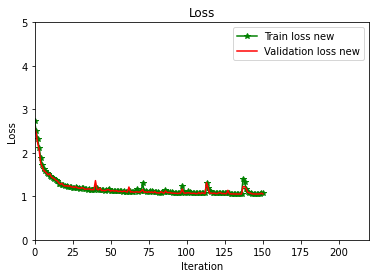

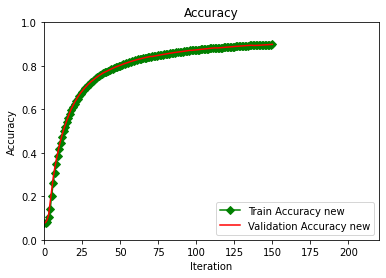

Iteration: 150, train loss: 1.0666, validation loss: 1.0536, train acc: 0.8985, validation acc: 0.8987
Step: 0 	Training Loss: 1.0178914 Training Acc: 0.8987838
Step: 1 	Training Loss: 1.0357621 Training Acc: 0.8987893
Step: 2 	Training Loss: 1.0285329 Training Acc: 0.8987953
Step: 3 	Training Loss: 1.0918118 Training Acc: 0.89879894
Step: 4 	Training Loss: 1.0226334 Training Acc: 0.8988062
Step: 5 	Training Loss: 1.0558302 Training Acc: 0.89881104
Step: 6 	Training Loss: 1.0374249 Training Acc: 0.8988177
Step: 7 	Training Loss: 1.0443755 Training Acc: 0.8988244
Step: 8 	Training Loss: 1.0950235 Training Acc: 0.8988274
Step: 9 	Training Loss: 1.1169319 Training Acc: 0.8988304
Step: 10 	Training Loss: 1.0752455 Training Acc: 0.89883524
Step: 11 	Training Loss: 1.0652322 Training Acc: 0.89884007
Step: 12 	Training Loss: 1.1063304 Training Acc: 0.8988431
Step: 13 	Training Loss: 1.0240371 Training Acc: 0.8988491
Step: 14 	Training Loss: 1.0586836 Training Acc: 0.89885336
Step: 15 	Trainin

Step: 52 	Training Loss: 1.0949786 Training Acc: 0.8994528
Step: 53 	Training Loss: 1.0406166 Training Acc: 0.8994576
Step: 54 	Training Loss: 1.0710068 Training Acc: 0.8994623
Step: 55 	Training Loss: 1.1388528 Training Acc: 0.8994628
Step: 56 	Training Loss: 1.0362384 Training Acc: 0.8994688
Step: 57 	Training Loss: 1.0883949 Training Acc: 0.8994723
Step: 58 	Training Loss: 1.0412593 Training Acc: 0.89947706
Step: 59 	Training Loss: 1.0543644 Training Acc: 0.8994818
Step: 60 	Training Loss: 1.0708063 Training Acc: 0.8994853
Step: 61 	Training Loss: 1.0525403 Training Acc: 0.89949125
Step: 62 	Training Loss: 1.0282155 Training Acc: 0.89949715
Step: 63 	Training Loss: 1.0620124 Training Acc: 0.8995013
Step: 64 	Training Loss: 1.0549953 Training Acc: 0.89950544
Step: 65 	Training Loss: 1.0810773 Training Acc: 0.89951015
Step: 66 	Training Loss: 1.0474844 Training Acc: 0.8995155
Step: 67 	Training Loss: 1.0300245 Training Acc: 0.8995214
Step: 0 	Validation Loss: 1.0593929 Validation Acc:

Step: 20 	Training Loss: 1.0389897 Training Acc: 0.9001411
Step: 21 	Training Loss: 1.0324433 Training Acc: 0.9001475
Step: 22 	Training Loss: 1.0699089 Training Acc: 0.90015155
Step: 23 	Training Loss: 1.050631 Training Acc: 0.9001568
Step: 24 	Training Loss: 1.0278959 Training Acc: 0.90016264
Step: 25 	Training Loss: 1.0728265 Training Acc: 0.9001673
Step: 26 	Training Loss: 1.0824493 Training Acc: 0.9001713
Step: 27 	Training Loss: 1.1339777 Training Acc: 0.90017295
Step: 28 	Training Loss: 1.0650034 Training Acc: 0.900177
Step: 29 	Training Loss: 1.1096799 Training Acc: 0.9001786
Step: 30 	Training Loss: 1.1733673 Training Acc: 0.9001749
Step: 31 	Training Loss: 1.0979716 Training Acc: 0.9001784
Step: 32 	Training Loss: 1.0862439 Training Acc: 0.90018123
Step: 33 	Training Loss: 1.1212137 Training Acc: 0.90018344
Step: 34 	Training Loss: 1.135285 Training Acc: 0.9001833
Step: 35 	Training Loss: 1.0941457 Training Acc: 0.9001838
Step: 36 	Training Loss: 1.0565679 Training Acc: 0.900

Step: 7 	Validation Loss: 1.1037434 Validation Acc: 0.9007445
Step: 8 	Validation Loss: 1.0771198 Validation Acc: 0.9007491
Step: 9 	Validation Loss: 1.0102055 Validation Acc: 0.90075594
Step: 10 	Validation Loss: 1.0980716 Validation Acc: 0.9007605
Step: 11 	Validation Loss: 1.0742495 Validation Acc: 0.90076506
Step: 12 	Validation Loss: 1.039822 Validation Acc: 0.9007713
Step: 13 	Validation Loss: 1.100271 Validation Acc: 0.9007753
Step: 14 	Validation Loss: 1.0724428 Validation Acc: 0.90077925
Step: 15 	Validation Loss: 1.0405846 Validation Acc: 0.90078557
Step: 16 	Validation Loss: 1.0717021 Validation Acc: 0.9007913


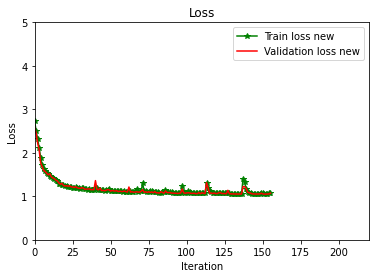

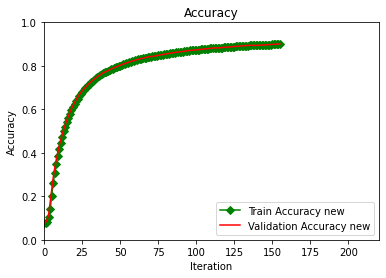

Iteration: 155, train loss: 1.0671, validation loss: 1.0717, train acc: 0.9006, validation acc: 0.9008
Step: 0 	Training Loss: 1.0177536 Training Acc: 0.90079814
Step: 1 	Training Loss: 1.037482 Training Acc: 0.90080327
Step: 2 	Training Loss: 1.0299824 Training Acc: 0.9008096
Step: 3 	Training Loss: 1.1105809 Training Acc: 0.9008135
Step: 4 	Training Loss: 1.0398854 Training Acc: 0.90082043
Step: 5 	Training Loss: 1.0772123 Training Acc: 0.90082437
Step: 6 	Training Loss: 1.0328023 Training Acc: 0.9008306
Step: 7 	Training Loss: 1.0471964 Training Acc: 0.90083635
Step: 8 	Training Loss: 1.1322412 Training Acc: 0.90083915
Step: 9 	Training Loss: 1.1357609 Training Acc: 0.9008419
Step: 10 	Training Loss: 1.0952325 Training Acc: 0.9008452
Step: 11 	Training Loss: 1.0688162 Training Acc: 0.90084976
Step: 12 	Training Loss: 1.1087586 Training Acc: 0.9008537
Step: 13 	Training Loss: 1.0312715 Training Acc: 0.9008594
Step: 14 	Training Loss: 1.0632019 Training Acc: 0.90086335
Step: 15 	Train

Step: 51 	Training Loss: 1.2203666 Training Acc: 0.9011101
Step: 52 	Training Loss: 1.1966102 Training Acc: 0.9011046
Step: 53 	Training Loss: 1.2105594 Training Acc: 0.90110385
Step: 54 	Training Loss: 1.1945553 Training Acc: 0.9011048
Step: 55 	Training Loss: 1.2436293 Training Acc: 0.9011017
Step: 56 	Training Loss: 1.1334603 Training Acc: 0.9011056
Step: 57 	Training Loss: 1.2038784 Training Acc: 0.901106
Step: 58 	Training Loss: 1.1565886 Training Acc: 0.9011081
Step: 59 	Training Loss: 1.2167389 Training Acc: 0.9011062
Step: 60 	Training Loss: 1.1843084 Training Acc: 0.90110654
Step: 61 	Training Loss: 1.190728 Training Acc: 0.90110403
Step: 62 	Training Loss: 1.1336943 Training Acc: 0.9011044
Step: 63 	Training Loss: 1.1886169 Training Acc: 0.90110534
Step: 64 	Training Loss: 1.1506045 Training Acc: 0.90110517
Step: 65 	Training Loss: 1.1663877 Training Acc: 0.9011079
Step: 66 	Training Loss: 1.1139655 Training Acc: 0.9011129
Step: 67 	Training Loss: 1.1482378 Training Acc: 0.90

Step: 20 	Training Loss: 1.0515769 Training Acc: 0.901523
Step: 21 	Training Loss: 1.0414089 Training Acc: 0.90152854
Step: 22 	Training Loss: 1.0791578 Training Acc: 0.90153295
Step: 23 	Training Loss: 1.0590647 Training Acc: 0.9015379
Step: 24 	Training Loss: 1.05683 Training Acc: 0.9015429
Step: 25 	Training Loss: 1.0722592 Training Acc: 0.90154725
Step: 26 	Training Loss: 1.0643032 Training Acc: 0.90155226
Step: 27 	Training Loss: 1.1652019 Training Acc: 0.90155315
Step: 28 	Training Loss: 1.0610299 Training Acc: 0.9015581
Step: 29 	Training Loss: 1.0912232 Training Acc: 0.9015619
Step: 30 	Training Loss: 1.1229093 Training Acc: 0.901564
Step: 31 	Training Loss: 1.0247359 Training Acc: 0.9015707
Step: 32 	Training Loss: 1.0450573 Training Acc: 0.9015751
Step: 33 	Training Loss: 1.0562905 Training Acc: 0.9015789
Step: 34 	Training Loss: 1.0458518 Training Acc: 0.90158325
Step: 35 	Training Loss: 1.0553181 Training Acc: 0.9015882
Step: 36 	Training Loss: 1.0315855 Training Acc: 0.901

Step: 5 	Validation Loss: 1.0369503 Validation Acc: 0.90214723
Step: 6 	Validation Loss: 1.0967312 Validation Acc: 0.9021509
Step: 7 	Validation Loss: 1.0526103 Validation Acc: 0.9021552
Step: 8 	Validation Loss: 1.0542922 Validation Acc: 0.9021601
Step: 9 	Validation Loss: 1.0102329 Validation Acc: 0.9021661
Step: 10 	Validation Loss: 1.079944 Validation Acc: 0.9021704
Step: 11 	Validation Loss: 1.0506744 Validation Acc: 0.90217584
Step: 12 	Validation Loss: 1.025387 Validation Acc: 0.90218186
Step: 13 	Validation Loss: 1.0856991 Validation Acc: 0.90218616
Step: 14 	Validation Loss: 1.0544317 Validation Acc: 0.90219045
Step: 15 	Validation Loss: 1.0351036 Validation Acc: 0.90219647
Step: 16 	Validation Loss: 1.0489845 Validation Acc: 0.9022019


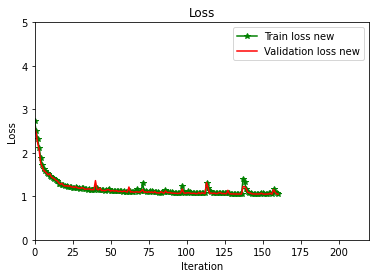

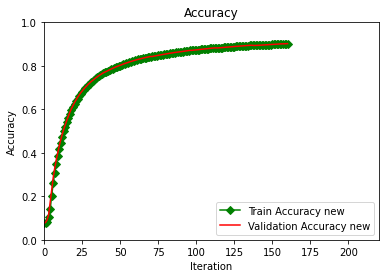

Iteration: 160, train loss: 1.0567, validation loss: 1.0519, train acc: 0.9020, validation acc: 0.9022
Step: 0 	Training Loss: 1.0133581 Training Acc: 0.90220845
Step: 1 	Training Loss: 1.0331923 Training Acc: 0.90221334
Step: 2 	Training Loss: 1.0230547 Training Acc: 0.90221936
Step: 3 	Training Loss: 1.0881008 Training Acc: 0.90222305
Step: 4 	Training Loss: 1.0233877 Training Acc: 0.9022296
Step: 5 	Training Loss: 1.0554314 Training Acc: 0.9022339
Step: 6 	Training Loss: 1.0203145 Training Acc: 0.9022399
Step: 7 	Training Loss: 1.0346398 Training Acc: 0.9022459
Step: 8 	Training Loss: 1.0953962 Training Acc: 0.9022485
Step: 9 	Training Loss: 1.1224734 Training Acc: 0.90225106
Step: 10 	Training Loss: 1.0693669 Training Acc: 0.90225536
Step: 11 	Training Loss: 1.0557623 Training Acc: 0.90225965
Step: 12 	Training Loss: 1.0848005 Training Acc: 0.90226334
Step: 13 	Training Loss: 1.0203795 Training Acc: 0.90226877
Step: 14 	Training Loss: 1.044644 Training Acc: 0.9022736
Step: 15 	Trai

Step: 53 	Training Loss: 1.0325133 Training Acc: 0.90283203
Step: 54 	Training Loss: 1.0640945 Training Acc: 0.9028368
Step: 55 	Training Loss: 1.1377958 Training Acc: 0.90283704
Step: 56 	Training Loss: 1.032121 Training Acc: 0.9028424
Step: 57 	Training Loss: 1.0782927 Training Acc: 0.90284604
Step: 58 	Training Loss: 1.0312034 Training Acc: 0.9028508
Step: 59 	Training Loss: 1.0418587 Training Acc: 0.902855
Step: 60 	Training Loss: 1.0689225 Training Acc: 0.90285915
Step: 61 	Training Loss: 1.0321791 Training Acc: 0.90286505
Step: 62 	Training Loss: 1.0246618 Training Acc: 0.9028704
Step: 63 	Training Loss: 1.0601063 Training Acc: 0.90287405
Step: 64 	Training Loss: 1.0508933 Training Acc: 0.9028771
Step: 65 	Training Loss: 1.0782276 Training Acc: 0.9028813
Step: 66 	Training Loss: 1.0458045 Training Acc: 0.90288603
Step: 67 	Training Loss: 1.028508 Training Acc: 0.9028914
Step: 0 	Validation Loss: 1.0599353 Validation Acc: 0.90289617
Step: 1 	Validation Loss: 1.0753118 Validation A

Step: 22 	Training Loss: 1.0838532 Training Acc: 0.90334165
Step: 23 	Training Loss: 1.0544622 Training Acc: 0.90334576
Step: 24 	Training Loss: 1.0387734 Training Acc: 0.9033505
Step: 25 	Training Loss: 1.0592833 Training Acc: 0.9033546
Step: 26 	Training Loss: 1.0534512 Training Acc: 0.90335816
Step: 27 	Training Loss: 1.150792 Training Acc: 0.90335834
Step: 28 	Training Loss: 1.0633684 Training Acc: 0.90336305
Step: 29 	Training Loss: 1.0912957 Training Acc: 0.90336657
Step: 30 	Training Loss: 1.1347674 Training Acc: 0.9033685
Step: 31 	Training Loss: 1.0501316 Training Acc: 0.9033737
Step: 32 	Training Loss: 1.061264 Training Acc: 0.90337783
Step: 33 	Training Loss: 1.0755601 Training Acc: 0.9033808
Step: 34 	Training Loss: 1.051926 Training Acc: 0.9033849
Step: 35 	Training Loss: 1.0579442 Training Acc: 0.90338963
Step: 36 	Training Loss: 1.0394235 Training Acc: 0.9033949
Step: 37 	Training Loss: 1.0395801 Training Acc: 0.9033995
Step: 38 	Training Loss: 1.0509644 Training Acc: 0.

Step: 9 	Validation Loss: 1.0025637 Validation Acc: 0.9039411
Step: 10 	Validation Loss: 1.0766797 Validation Acc: 0.90394515
Step: 11 	Validation Loss: 1.0437849 Validation Acc: 0.9039503
Step: 12 	Validation Loss: 1.0233148 Validation Acc: 0.903956
Step: 13 	Validation Loss: 1.0844841 Validation Acc: 0.90396005
Step: 14 	Validation Loss: 1.050179 Validation Acc: 0.90396404
Step: 15 	Validation Loss: 1.0279706 Validation Acc: 0.90396976
Step: 16 	Validation Loss: 1.0468692 Validation Acc: 0.9039749


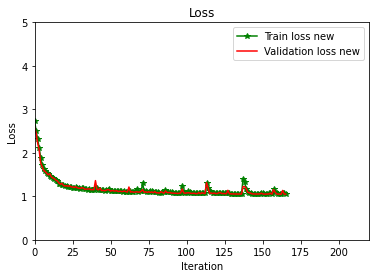

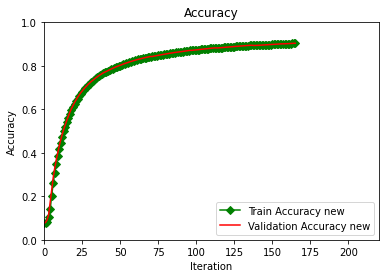

Iteration: 165, train loss: 1.0555, validation loss: 1.0498, train acc: 0.9038, validation acc: 0.9039
Step: 0 	Training Loss: 1.0119026 Training Acc: 0.90398115
Step: 1 	Training Loss: 1.0334399 Training Acc: 0.90398574
Step: 2 	Training Loss: 1.0335603 Training Acc: 0.90399146
Step: 3 	Training Loss: 1.074861 Training Acc: 0.9039949
Step: 4 	Training Loss: 1.0184711 Training Acc: 0.9040012
Step: 5 	Training Loss: 1.0574744 Training Acc: 0.9040052
Step: 6 	Training Loss: 1.0201529 Training Acc: 0.9040109
Step: 7 	Training Loss: 1.0291369 Training Acc: 0.9040166
Step: 8 	Training Loss: 1.0822723 Training Acc: 0.90401894
Step: 9 	Training Loss: 1.1082234 Training Acc: 0.9040213
Step: 10 	Training Loss: 1.0687724 Training Acc: 0.9040254
Step: 11 	Training Loss: 1.0573678 Training Acc: 0.90402937
Step: 12 	Training Loss: 1.0822289 Training Acc: 0.9040329
Step: 13 	Training Loss: 1.0202817 Training Acc: 0.904038
Step: 14 	Training Loss: 1.0444605 Training Acc: 0.9040426
Step: 15 	Training 

Step: 53 	Training Loss: 1.0307049 Training Acc: 0.9045728
Step: 54 	Training Loss: 1.065994 Training Acc: 0.9045768
Step: 55 	Training Loss: 1.1517658 Training Acc: 0.9045769
Step: 56 	Training Loss: 1.0310163 Training Acc: 0.9045819
Step: 57 	Training Loss: 1.079299 Training Acc: 0.9045853
Step: 58 	Training Loss: 1.030468 Training Acc: 0.90458983
Step: 59 	Training Loss: 1.0410423 Training Acc: 0.90459377
Step: 60 	Training Loss: 1.0692883 Training Acc: 0.90459776
Step: 61 	Training Loss: 1.0261478 Training Acc: 0.9046039
Step: 62 	Training Loss: 1.0218941 Training Acc: 0.9046089
Step: 63 	Training Loss: 1.0585825 Training Acc: 0.9046123
Step: 64 	Training Loss: 1.049422 Training Acc: 0.90461576
Step: 65 	Training Loss: 1.0768558 Training Acc: 0.9046197
Step: 66 	Training Loss: 1.0453022 Training Acc: 0.90462416
Step: 67 	Training Loss: 1.026858 Training Acc: 0.90462923
Step: 0 	Validation Loss: 1.0593588 Validation Acc: 0.9046337
Step: 1 	Validation Loss: 1.0812052 Validation Acc: 

Step: 20 	Training Loss: 1.0214078 Training Acc: 0.90515465
Step: 21 	Training Loss: 1.029698 Training Acc: 0.9051601
Step: 22 	Training Loss: 1.0673738 Training Acc: 0.905164
Step: 23 	Training Loss: 1.0457935 Training Acc: 0.9051685
Step: 24 	Training Loss: 1.0222399 Training Acc: 0.9051734
Step: 25 	Training Loss: 1.0521634 Training Acc: 0.9051773
Step: 26 	Training Loss: 1.0486357 Training Acc: 0.90518063
Step: 27 	Training Loss: 1.1295978 Training Acc: 0.90518177
Step: 28 	Training Loss: 1.0497153 Training Acc: 0.9051862
Step: 29 	Training Loss: 1.0750538 Training Acc: 0.9051895
Step: 30 	Training Loss: 1.1059878 Training Acc: 0.90519124
Step: 31 	Training Loss: 1.0166959 Training Acc: 0.90519726
Step: 32 	Training Loss: 1.0415547 Training Acc: 0.9052017
Step: 33 	Training Loss: 1.0497015 Training Acc: 0.905205
Step: 34 	Training Loss: 1.0306599 Training Acc: 0.9052094
Step: 35 	Training Loss: 1.0515215 Training Acc: 0.90521383
Step: 36 	Training Loss: 1.0283669 Training Acc: 0.90

Step: 5 	Validation Loss: 1.0328112 Validation Acc: 0.905718
Step: 6 	Validation Loss: 1.0864447 Validation Acc: 0.90572184
Step: 7 	Validation Loss: 1.0493653 Validation Acc: 0.9057256
Step: 8 	Validation Loss: 1.0499781 Validation Acc: 0.90572995
Step: 9 	Validation Loss: 1.0028638 Validation Acc: 0.9057354
Step: 10 	Validation Loss: 1.0720193 Validation Acc: 0.9057392
Step: 11 	Validation Loss: 1.0455235 Validation Acc: 0.905744
Step: 12 	Validation Loss: 1.0216966 Validation Acc: 0.90574944
Step: 13 	Validation Loss: 1.0775626 Validation Acc: 0.9057538
Step: 14 	Validation Loss: 1.0484369 Validation Acc: 0.9057576
Step: 15 	Validation Loss: 1.0262293 Validation Acc: 0.905763
Step: 16 	Validation Loss: 1.0392258 Validation Acc: 0.90576786


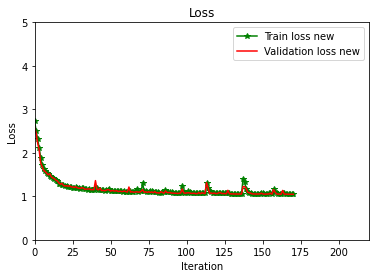

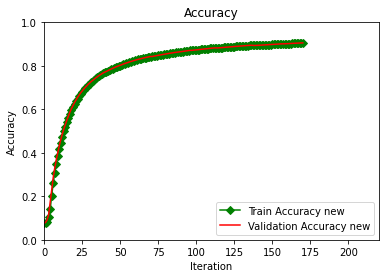

Iteration: 170, train loss: 1.0514, validation loss: 1.0461, train acc: 0.9056, validation acc: 0.9057
Step: 0 	Training Loss: 1.0090457 Training Acc: 0.9057738
Step: 1 	Training Loss: 1.0333818 Training Acc: 0.90577817
Step: 2 	Training Loss: 1.0178417 Training Acc: 0.90578353
Step: 3 	Training Loss: 1.0732043 Training Acc: 0.9057868
Step: 4 	Training Loss: 1.0173022 Training Acc: 0.9057928
Step: 5 	Training Loss: 1.050017 Training Acc: 0.9057965
Step: 6 	Training Loss: 1.017297 Training Acc: 0.90580195
Step: 7 	Training Loss: 1.0224773 Training Acc: 0.9058074
Step: 8 	Training Loss: 1.078304 Training Acc: 0.9058095
Step: 9 	Training Loss: 1.106729 Training Acc: 0.9058117
Step: 10 	Training Loss: 1.0662398 Training Acc: 0.9058155
Step: 11 	Training Loss: 1.0528159 Training Acc: 0.9058193
Step: 12 	Training Loss: 1.0758438 Training Acc: 0.9058225
Step: 13 	Training Loss: 1.0148766 Training Acc: 0.9058274
Step: 14 	Training Loss: 1.0369369 Training Acc: 0.90583116
Step: 15 	Training Los

Step: 53 	Training Loss: 1.0305 Training Acc: 0.9063304
Step: 54 	Training Loss: 1.0625155 Training Acc: 0.90633464
Step: 55 	Training Loss: 1.1509039 Training Acc: 0.90633464
Step: 56 	Training Loss: 1.0336146 Training Acc: 0.9063394
Step: 57 	Training Loss: 1.0968413 Training Acc: 0.90633994
Step: 58 	Training Loss: 1.1699634 Training Acc: 0.90633994
Step: 59 	Training Loss: 1.0846672 Training Acc: 0.90634155
Step: 60 	Training Loss: 1.080786 Training Acc: 0.90634525
Step: 61 	Training Loss: 1.0788763 Training Acc: 0.90634847
Step: 62 	Training Loss: 1.1322417 Training Acc: 0.90634686
Step: 63 	Training Loss: 1.2775315 Training Acc: 0.9063394
Step: 64 	Training Loss: 1.0945467 Training Acc: 0.90633935
Step: 65 	Training Loss: 1.3044449 Training Acc: 0.9063298
Step: 66 	Training Loss: 1.5971367 Training Acc: 0.9063101
Step: 67 	Training Loss: 1.542911 Training Acc: 0.9062915
Step: 0 	Validation Loss: 1.5960816 Validation Acc: 0.90627396
Step: 1 	Validation Loss: 1.5398152 Validation A

Step: 20 	Training Loss: 1.2009301 Training Acc: 0.9052895
Step: 21 	Training Loss: 1.1808283 Training Acc: 0.9052906
Step: 22 	Training Loss: 1.1982113 Training Acc: 0.9052896
Step: 23 	Training Loss: 1.1825049 Training Acc: 0.9052891
Step: 24 	Training Loss: 1.2544593 Training Acc: 0.90528655
Step: 25 	Training Loss: 1.2275997 Training Acc: 0.905284
Step: 26 	Training Loss: 1.1753235 Training Acc: 0.90528244
Step: 27 	Training Loss: 1.2386625 Training Acc: 0.90528095
Step: 28 	Training Loss: 1.2222273 Training Acc: 0.90527993
Step: 29 	Training Loss: 1.2994851 Training Acc: 0.90527475
Step: 30 	Training Loss: 1.3125336 Training Acc: 0.905269
Step: 31 	Training Loss: 1.3288867 Training Acc: 0.90526485
Step: 32 	Training Loss: 1.4567678 Training Acc: 0.905256
Step: 33 	Training Loss: 1.4649663 Training Acc: 0.9052455
Step: 34 	Training Loss: 1.3006307 Training Acc: 0.9052414
Step: 35 	Training Loss: 1.2035418 Training Acc: 0.90524143
Step: 36 	Training Loss: 1.2816298 Training Acc: 0.9

Step: 5 	Validation Loss: 1.0814556 Validation Acc: 0.90463877
Step: 6 	Validation Loss: 1.1118519 Validation Acc: 0.9046426
Step: 7 	Validation Loss: 1.1238277 Validation Acc: 0.9046447
Step: 8 	Validation Loss: 1.0873587 Validation Acc: 0.90464693
Step: 9 	Validation Loss: 1.0486033 Validation Acc: 0.9046502
Step: 10 	Validation Loss: 1.1483037 Validation Acc: 0.9046519
Step: 11 	Validation Loss: 1.122109 Validation Acc: 0.9046551
Step: 12 	Validation Loss: 1.0704272 Validation Acc: 0.9046594
Step: 13 	Validation Loss: 1.1172255 Validation Acc: 0.9046626
Step: 14 	Validation Loss: 1.1219016 Validation Acc: 0.9046638
Step: 15 	Validation Loss: 1.0681626 Validation Acc: 0.90466756
Step: 16 	Validation Loss: 1.0887005 Validation Acc: 0.9046713


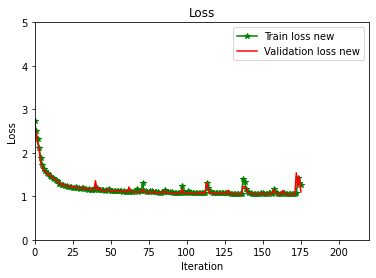

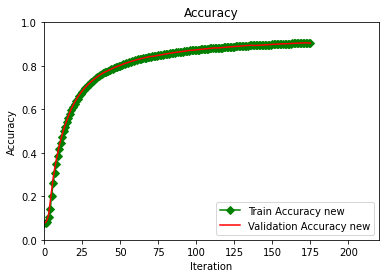

Iteration: 175, train loss: 1.2519, validation loss: 1.0989, train acc: 0.9046, validation acc: 0.9046
Step: 0 	Training Loss: 1.0644381 Training Acc: 0.9046756
Step: 1 	Training Loss: 1.087305 Training Acc: 0.9046783
Step: 2 	Training Loss: 1.1272252 Training Acc: 0.9046784
Step: 3 	Training Loss: 1.1927704 Training Acc: 0.904678
Step: 4 	Training Loss: 1.0954802 Training Acc: 0.9046807
Step: 5 	Training Loss: 1.087508 Training Acc: 0.9046834
Step: 6 	Training Loss: 1.0675373 Training Acc: 0.9046888
Step: 7 	Training Loss: 1.1167305 Training Acc: 0.90469044
Step: 8 	Training Loss: 1.2051342 Training Acc: 0.9046874
Step: 9 	Training Loss: 1.2178183 Training Acc: 0.904687
Step: 10 	Training Loss: 1.2288109 Training Acc: 0.9046845
Step: 11 	Training Loss: 1.1729822 Training Acc: 0.9046846
Step: 12 	Training Loss: 1.1454365 Training Acc: 0.9046852
Step: 13 	Training Loss: 1.0418452 Training Acc: 0.90468895
Step: 14 	Training Loss: 1.1115873 Training Acc: 0.9046901
Step: 15 	Training Loss:

Step: 52 	Training Loss: 1.0931743 Training Acc: 0.904546
Step: 53 	Training Loss: 1.0583429 Training Acc: 0.9045487
Step: 54 	Training Loss: 1.0726137 Training Acc: 0.904553
Step: 55 	Training Loss: 1.1695606 Training Acc: 0.9045526
Step: 56 	Training Loss: 1.047538 Training Acc: 0.9045568
Step: 57 	Training Loss: 1.0927577 Training Acc: 0.90455955
Step: 58 	Training Loss: 1.0435525 Training Acc: 0.9045638
Step: 59 	Training Loss: 1.0705156 Training Acc: 0.9045675
Step: 60 	Training Loss: 1.0795579 Training Acc: 0.9045702
Step: 61 	Training Loss: 1.0428073 Training Acc: 0.90457547
Step: 62 	Training Loss: 1.0314955 Training Acc: 0.90458024
Step: 63 	Training Loss: 1.0720555 Training Acc: 0.904584
Step: 64 	Training Loss: 1.0577972 Training Acc: 0.9045872
Step: 65 	Training Loss: 1.0805502 Training Acc: 0.9045909
Step: 66 	Training Loss: 1.0664508 Training Acc: 0.9045952
Step: 67 	Training Loss: 1.0499057 Training Acc: 0.9045999
Step: 0 	Validation Loss: 1.0684474 Validation Acc: 0.904

Step: 19 	Training Loss: 1.0737743 Training Acc: 0.9050721
Step: 20 	Training Loss: 1.0314724 Training Acc: 0.90507627
Step: 21 	Training Loss: 1.031466 Training Acc: 0.9050815
Step: 22 	Training Loss: 1.0710646 Training Acc: 0.90508515
Step: 23 	Training Loss: 1.0507159 Training Acc: 0.9050893
Step: 24 	Training Loss: 1.0251335 Training Acc: 0.905094
Step: 25 	Training Loss: 1.053498 Training Acc: 0.90509766
Step: 26 	Training Loss: 1.0650005 Training Acc: 0.90510035
Step: 27 	Training Loss: 1.1345747 Training Acc: 0.9051014
Step: 28 	Training Loss: 1.0575095 Training Acc: 0.9051056
Step: 29 	Training Loss: 1.1026293 Training Acc: 0.9051093
Step: 30 	Training Loss: 1.1530441 Training Acc: 0.90510935
Step: 31 	Training Loss: 1.0393859 Training Acc: 0.90511453
Step: 32 	Training Loss: 1.0644791 Training Acc: 0.90511817
Step: 33 	Training Loss: 1.076869 Training Acc: 0.9051203
Step: 34 	Training Loss: 1.0821308 Training Acc: 0.90512395
Step: 35 	Training Loss: 1.0676533 Training Acc: 0.9

Step: 4 	Validation Loss: 1.0300081 Validation Acc: 0.9055934
Step: 5 	Validation Loss: 1.0361068 Validation Acc: 0.9055975
Step: 6 	Validation Loss: 1.0934415 Validation Acc: 0.90560013
Step: 7 	Validation Loss: 1.0490704 Validation Acc: 0.9056037
Step: 8 	Validation Loss: 1.0567816 Validation Acc: 0.9056078
Step: 9 	Validation Loss: 1.002703 Validation Acc: 0.90561295
Step: 10 	Validation Loss: 1.0758568 Validation Acc: 0.9056165
Step: 11 	Validation Loss: 1.0562801 Validation Acc: 0.9056211
Step: 12 	Validation Loss: 1.0269947 Validation Acc: 0.90562624
Step: 13 	Validation Loss: 1.082339 Validation Acc: 0.90563035
Step: 14 	Validation Loss: 1.0506468 Validation Acc: 0.905634
Step: 15 	Validation Loss: 1.0298525 Validation Acc: 0.90563905
Step: 16 	Validation Loss: 1.048043 Validation Acc: 0.9056437


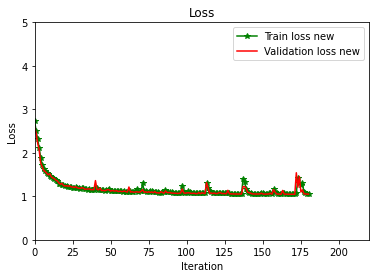

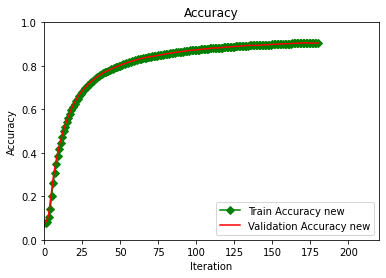

Iteration: 180, train loss: 1.0535, validation loss: 1.0506, train acc: 0.9054, validation acc: 0.9056
Step: 0 	Training Loss: 1.0107944 Training Acc: 0.9056493
Step: 1 	Training Loss: 1.0341003 Training Acc: 0.9056534
Step: 2 	Training Loss: 1.0341927 Training Acc: 0.90565854
Step: 3 	Training Loss: 1.089366 Training Acc: 0.9056611
Step: 4 	Training Loss: 1.0219464 Training Acc: 0.9056667
Step: 5 	Training Loss: 1.0526295 Training Acc: 0.90567034
Step: 6 	Training Loss: 1.022022 Training Acc: 0.9056754
Step: 7 	Training Loss: 1.0296609 Training Acc: 0.90568054
Step: 8 	Training Loss: 1.0832608 Training Acc: 0.9056826
Step: 9 	Training Loss: 1.1069546 Training Acc: 0.90568465
Step: 10 	Training Loss: 1.0674603 Training Acc: 0.9056883
Step: 11 	Training Loss: 1.0583252 Training Acc: 0.90569186
Step: 12 	Training Loss: 1.0914772 Training Acc: 0.90569496
Step: 13 	Training Loss: 1.0213549 Training Acc: 0.90569955
Step: 14 	Training Loss: 1.0451833 Training Acc: 0.9057026
Step: 15 	Trainin

Step: 53 	Training Loss: 1.030944 Training Acc: 0.9061735
Step: 54 	Training Loss: 1.0636603 Training Acc: 0.9061775
Step: 55 	Training Loss: 1.1447648 Training Acc: 0.9061775
Step: 56 	Training Loss: 1.0337553 Training Acc: 0.90618205
Step: 57 	Training Loss: 1.1027774 Training Acc: 0.9061826
Step: 58 	Training Loss: 1.1033359 Training Acc: 0.90618306
Step: 59 	Training Loss: 1.0779841 Training Acc: 0.9061836
Step: 60 	Training Loss: 1.1335088 Training Acc: 0.9061816
Step: 61 	Training Loss: 1.066858 Training Acc: 0.9061851
Step: 62 	Training Loss: 1.0894663 Training Acc: 0.9061861
Step: 63 	Training Loss: 1.0901357 Training Acc: 0.9061856
Step: 64 	Training Loss: 1.0722566 Training Acc: 0.90618813
Step: 65 	Training Loss: 1.1383638 Training Acc: 0.90619016
Step: 66 	Training Loss: 1.2107059 Training Acc: 0.90618914
Step: 67 	Training Loss: 1.2024963 Training Acc: 0.90618664
Step: 0 	Validation Loss: 1.2265761 Validation Acc: 0.9061821
Step: 1 	Validation Loss: 1.2973816 Validation Ac

Step: 21 	Training Loss: 1.0347159 Training Acc: 0.906469
Step: 22 	Training Loss: 1.0705693 Training Acc: 0.90647244
Step: 23 	Training Loss: 1.0489237 Training Acc: 0.90647644
Step: 24 	Training Loss: 1.0273627 Training Acc: 0.9064809
Step: 25 	Training Loss: 1.0529809 Training Acc: 0.90648437
Step: 26 	Training Loss: 1.0487975 Training Acc: 0.90648735
Step: 27 	Training Loss: 1.1326945 Training Acc: 0.90648836
Step: 28 	Training Loss: 1.0522994 Training Acc: 0.9064923
Step: 29 	Training Loss: 1.0814872 Training Acc: 0.9064953
Step: 30 	Training Loss: 1.1195935 Training Acc: 0.90649676
Step: 31 	Training Loss: 1.0217829 Training Acc: 0.90650225
Step: 32 	Training Loss: 1.0411289 Training Acc: 0.90650624
Step: 33 	Training Loss: 1.0515213 Training Acc: 0.90650916
Step: 34 	Training Loss: 1.0323409 Training Acc: 0.90651315
Step: 35 	Training Loss: 1.053984 Training Acc: 0.90651715
Step: 36 	Training Loss: 1.0424435 Training Acc: 0.9065216
Step: 37 	Training Loss: 1.0359304 Training Acc

Step: 7 	Validation Loss: 1.0466183 Validation Acc: 0.9069773
Step: 8 	Validation Loss: 1.0512133 Validation Acc: 0.9069812
Step: 9 	Validation Loss: 1.0014822 Validation Acc: 0.9069866
Step: 10 	Validation Loss: 1.0738842 Validation Acc: 0.90699005
Step: 11 	Validation Loss: 1.0437716 Validation Acc: 0.9069944
Step: 12 	Validation Loss: 1.0246834 Validation Acc: 0.90699935
Step: 13 	Validation Loss: 1.0777667 Validation Acc: 0.9070032
Step: 14 	Validation Loss: 1.0461795 Validation Acc: 0.9070066
Step: 15 	Validation Loss: 1.0289223 Validation Acc: 0.9070115
Step: 16 	Validation Loss: 1.0479801 Validation Acc: 0.9070159


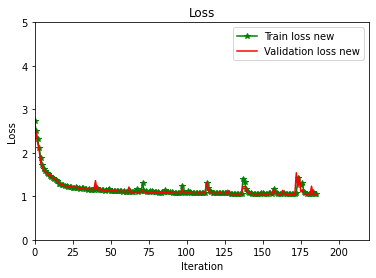

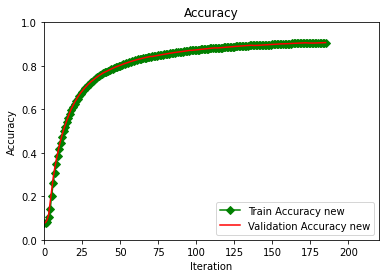

Iteration: 185, train loss: 1.0529, validation loss: 1.0475, train acc: 0.9068, validation acc: 0.9070
Step: 0 	Training Loss: 1.0087308 Training Acc: 0.90702134
Step: 1 	Training Loss: 1.0322912 Training Acc: 0.9070252
Step: 2 	Training Loss: 1.0212901 Training Acc: 0.9070301
Step: 3 	Training Loss: 1.0848607 Training Acc: 0.907033
Step: 4 	Training Loss: 1.0167966 Training Acc: 0.9070384
Step: 5 	Training Loss: 1.051549 Training Acc: 0.90704185
Step: 6 	Training Loss: 1.0176334 Training Acc: 0.90704674
Step: 7 	Training Loss: 1.0285683 Training Acc: 0.9070516
Step: 8 	Training Loss: 1.0820899 Training Acc: 0.90705353
Step: 9 	Training Loss: 1.1037465 Training Acc: 0.90705544
Step: 10 	Training Loss: 1.0657992 Training Acc: 0.90705884
Step: 11 	Training Loss: 1.054662 Training Acc: 0.90706223
Step: 12 	Training Loss: 1.0779645 Training Acc: 0.90706515
Step: 13 	Training Loss: 1.0165483 Training Acc: 0.90706956
Step: 14 	Training Loss: 1.0472765 Training Acc: 0.90707296
Step: 15 	Train

Step: 53 	Training Loss: 1.0328622 Training Acc: 0.90750986
Step: 54 	Training Loss: 1.0641425 Training Acc: 0.90751374
Step: 55 	Training Loss: 1.1355104 Training Acc: 0.9075136
Step: 56 	Training Loss: 1.0293386 Training Acc: 0.90751797
Step: 57 	Training Loss: 1.078952 Training Acc: 0.90752035
Step: 58 	Training Loss: 1.0311383 Training Acc: 0.90752417
Step: 59 	Training Loss: 1.0433241 Training Acc: 0.9075275
Step: 60 	Training Loss: 1.0714183 Training Acc: 0.90753037
Step: 61 	Training Loss: 1.0273274 Training Acc: 0.9075357
Step: 62 	Training Loss: 1.022446 Training Acc: 0.90754
Step: 63 	Training Loss: 1.0594563 Training Acc: 0.9075429
Step: 64 	Training Loss: 1.0477911 Training Acc: 0.90754575
Step: 65 	Training Loss: 1.0761187 Training Acc: 0.9075491
Step: 66 	Training Loss: 1.045615 Training Acc: 0.9075529
Step: 67 	Training Loss: 1.026343 Training Acc: 0.90755725
Step: 0 	Validation Loss: 1.0553586 Validation Acc: 0.90756106
Step: 1 	Validation Loss: 1.0719833 Validation Acc

Step: 21 	Training Loss: 1.0284059 Training Acc: 0.90800464
Step: 22 	Training Loss: 1.0658011 Training Acc: 0.9080084
Step: 23 	Training Loss: 1.0436935 Training Acc: 0.90801215
Step: 24 	Training Loss: 1.021563 Training Acc: 0.90801644
Step: 25 	Training Loss: 1.0622201 Training Acc: 0.9080197
Step: 26 	Training Loss: 1.0732852 Training Acc: 0.90802205
Step: 27 	Training Loss: 1.1262808 Training Acc: 0.9080229
Step: 28 	Training Loss: 1.0445337 Training Acc: 0.9080267
Step: 29 	Training Loss: 1.0964464 Training Acc: 0.9080295
Step: 30 	Training Loss: 1.1144236 Training Acc: 0.9080313
Step: 31 	Training Loss: 1.0163455 Training Acc: 0.90803653
Step: 32 	Training Loss: 1.053239 Training Acc: 0.9080403
Step: 33 	Training Loss: 1.0856884 Training Acc: 0.9080426
Step: 34 	Training Loss: 1.0445347 Training Acc: 0.90804636
Step: 35 	Training Loss: 1.0514653 Training Acc: 0.9080502
Step: 36 	Training Loss: 1.0299873 Training Acc: 0.9080544
Step: 37 	Training Loss: 1.0377619 Training Acc: 0.9

Step: 8 	Validation Loss: 1.0502844 Validation Acc: 0.9084902
Step: 9 	Validation Loss: 1.0017304 Validation Acc: 0.9084949
Step: 10 	Validation Loss: 1.0735797 Validation Acc: 0.9084981
Step: 11 	Validation Loss: 1.0452993 Validation Acc: 0.9085023
Step: 12 	Validation Loss: 1.0213242 Validation Acc: 0.908507
Step: 13 	Validation Loss: 1.0667849 Validation Acc: 0.9085107
Step: 14 	Validation Loss: 1.047774 Validation Acc: 0.9085139
Step: 15 	Validation Loss: 1.0274262 Validation Acc: 0.90851855
Step: 16 	Validation Loss: 1.0407708 Validation Acc: 0.9085228


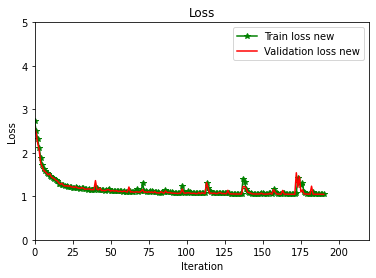

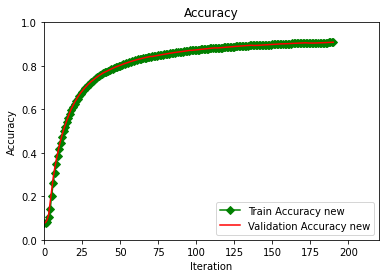

Iteration: 190, train loss: 1.0516, validation loss: 1.0445, train acc: 0.9083, validation acc: 0.9085
Step: 0 	Training Loss: 1.0112381 Training Acc: 0.9085279
Step: 1 	Training Loss: 1.031766 Training Acc: 0.9085316
Step: 2 	Training Loss: 1.0188849 Training Acc: 0.9085363
Step: 3 	Training Loss: 1.0726691 Training Acc: 0.90853906
Step: 4 	Training Loss: 1.0153731 Training Acc: 0.9085442
Step: 5 	Training Loss: 1.0475409 Training Acc: 0.9085474
Step: 6 	Training Loss: 1.0156901 Training Acc: 0.9085521
Step: 7 	Training Loss: 1.0221454 Training Acc: 0.90855676
Step: 8 	Training Loss: 1.0773323 Training Acc: 0.90855855
Step: 9 	Training Loss: 1.1047237 Training Acc: 0.90856034
Step: 10 	Training Loss: 1.0646954 Training Acc: 0.90856355
Step: 11 	Training Loss: 1.0514215 Training Acc: 0.9085668
Step: 12 	Training Loss: 1.0777061 Training Acc: 0.9085695
Step: 13 	Training Loss: 1.0138713 Training Acc: 0.9085737
Step: 14 	Training Loss: 1.0373802 Training Acc: 0.9085769
Step: 15 	Training

Step: 53 	Training Loss: 1.0303618 Training Acc: 0.9090049
Step: 54 	Training Loss: 1.0624638 Training Acc: 0.90900856
Step: 55 	Training Loss: 1.1577858 Training Acc: 0.90900844
Step: 56 	Training Loss: 1.0274037 Training Acc: 0.90901256
Step: 57 	Training Loss: 1.0765703 Training Acc: 0.90901476
Step: 58 	Training Loss: 1.0281116 Training Acc: 0.9090184
Step: 59 	Training Loss: 1.0535026 Training Acc: 0.90902156
Step: 60 	Training Loss: 1.0661013 Training Acc: 0.9090248
Step: 61 	Training Loss: 1.0225756 Training Acc: 0.90902984
Step: 62 	Training Loss: 1.0205009 Training Acc: 0.90903395
Step: 63 	Training Loss: 1.0539845 Training Acc: 0.90903664
Step: 64 	Training Loss: 1.0464993 Training Acc: 0.9090393
Step: 65 	Training Loss: 1.0714393 Training Acc: 0.9090425
Step: 66 	Training Loss: 1.0536946 Training Acc: 0.9090461
Step: 67 	Training Loss: 1.0285633 Training Acc: 0.9090503
Step: 0 	Validation Loss: 1.0533922 Validation Acc: 0.9090539
Step: 1 	Validation Loss: 1.0741788 Validatio

Step: 20 	Training Loss: 1.0579934 Training Acc: 0.90907955
Step: 21 	Training Loss: 1.0607686 Training Acc: 0.9090813
Step: 22 	Training Loss: 1.0891178 Training Acc: 0.90908253
Step: 23 	Training Loss: 1.080423 Training Acc: 0.90908426
Step: 24 	Training Loss: 1.0594764 Training Acc: 0.90908647
Step: 25 	Training Loss: 1.0750973 Training Acc: 0.9090872
Step: 26 	Training Loss: 1.0793214 Training Acc: 0.9090889
Step: 27 	Training Loss: 1.1385598 Training Acc: 0.9090892
Step: 28 	Training Loss: 1.072814 Training Acc: 0.90909094
Step: 29 	Training Loss: 1.1011765 Training Acc: 0.90909266
Step: 30 	Training Loss: 1.1494747 Training Acc: 0.9090906
Step: 31 	Training Loss: 1.032759 Training Acc: 0.9090947
Step: 32 	Training Loss: 1.0641696 Training Acc: 0.9090964
Step: 33 	Training Loss: 1.0733744 Training Acc: 0.9090986
Step: 34 	Training Loss: 1.0528097 Training Acc: 0.9091008
Step: 35 	Training Loss: 1.0711997 Training Acc: 0.9091044
Step: 36 	Training Loss: 1.0451162 Training Acc: 0.90

Step: 6 	Validation Loss: 1.1250231 Validation Acc: 0.90941066
Step: 7 	Validation Loss: 1.0654063 Validation Acc: 0.90941375
Step: 8 	Validation Loss: 1.0684247 Validation Acc: 0.90941733
Step: 9 	Validation Loss: 1.0204303 Validation Acc: 0.9094223
Step: 10 	Validation Loss: 1.0967598 Validation Acc: 0.90942353
Step: 11 	Validation Loss: 1.0685551 Validation Acc: 0.90942615
Step: 12 	Validation Loss: 1.0417056 Validation Acc: 0.90943015
Step: 13 	Validation Loss: 1.0970583 Validation Acc: 0.90943325
Step: 14 	Validation Loss: 1.069329 Validation Acc: 0.9094354
Step: 15 	Validation Loss: 1.0529182 Validation Acc: 0.90943897
Step: 16 	Validation Loss: 1.0716197 Validation Acc: 0.90944016


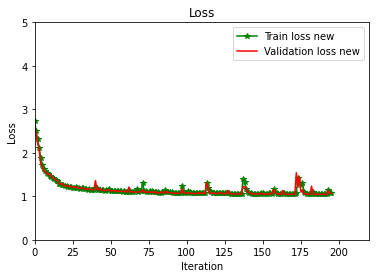

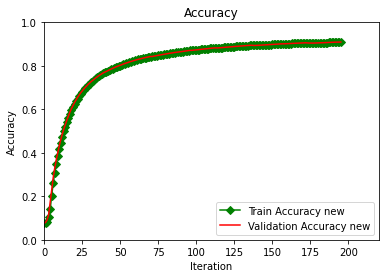

Iteration: 195, train loss: 1.0732, validation loss: 1.0683, train acc: 0.9093, validation acc: 0.9094
Step: 0 	Training Loss: 1.0346372 Training Acc: 0.9094428
Step: 1 	Training Loss: 1.049238 Training Acc: 0.9094454
Step: 2 	Training Loss: 1.0507603 Training Acc: 0.909449
Step: 3 	Training Loss: 1.1221783 Training Acc: 0.90945065
Step: 4 	Training Loss: 1.0439485 Training Acc: 0.9094552
Step: 5 	Training Loss: 1.0995532 Training Acc: 0.9094559
Step: 6 	Training Loss: 1.0475521 Training Acc: 0.90945995
Step: 7 	Training Loss: 1.0415542 Training Acc: 0.90946347
Step: 8 	Training Loss: 1.1054604 Training Acc: 0.9094652
Step: 9 	Training Loss: 1.1477903 Training Acc: 0.90946543
Step: 10 	Training Loss: 1.0925376 Training Acc: 0.90946853
Step: 11 	Training Loss: 1.0681658 Training Acc: 0.90947163
Step: 12 	Training Loss: 1.090199 Training Acc: 0.9094738
Step: 13 	Training Loss: 1.0233026 Training Acc: 0.9094778
Step: 14 	Training Loss: 1.072465 Training Acc: 0.9094804
Step: 15 	Training L

Step: 52 	Training Loss: 1.0882881 Training Acc: 0.90987396
Step: 53 	Training Loss: 1.0346389 Training Acc: 0.909877
Step: 54 	Training Loss: 1.0679094 Training Acc: 0.90988046
Step: 55 	Training Loss: 1.1370134 Training Acc: 0.9098803
Step: 56 	Training Loss: 1.0288264 Training Acc: 0.9098842
Step: 57 	Training Loss: 1.0788175 Training Acc: 0.90988684
Step: 58 	Training Loss: 1.0322098 Training Acc: 0.9098903
Step: 59 	Training Loss: 1.0452611 Training Acc: 0.90989333
Step: 60 	Training Loss: 1.0674455 Training Acc: 0.9098959
Step: 61 	Training Loss: 1.0367391 Training Acc: 0.9098999
Step: 62 	Training Loss: 1.026192 Training Acc: 0.9099039
Step: 63 	Training Loss: 1.0576493 Training Acc: 0.90990645
Step: 64 	Training Loss: 1.0470952 Training Acc: 0.909909
Step: 65 	Training Loss: 1.078042 Training Acc: 0.90991205
Step: 66 	Training Loss: 1.0437688 Training Acc: 0.9099155
Step: 67 	Training Loss: 1.0255995 Training Acc: 0.9099195
Step: 0 	Validation Loss: 1.0573325 Validation Acc: 0.

Step: 19 	Training Loss: 1.1819224 Training Acc: 0.9100292
Step: 20 	Training Loss: 1.1270127 Training Acc: 0.91002893
Step: 21 	Training Loss: 1.0942878 Training Acc: 0.9100315
Step: 22 	Training Loss: 1.1449828 Training Acc: 0.91003263
Step: 23 	Training Loss: 1.1269627 Training Acc: 0.9100361
Step: 24 	Training Loss: 1.0642626 Training Acc: 0.91004
Step: 25 	Training Loss: 1.1038119 Training Acc: 0.9100421
Step: 26 	Training Loss: 1.088228 Training Acc: 0.9100442
Step: 27 	Training Loss: 1.2035468 Training Acc: 0.91004395
Step: 28 	Training Loss: 1.0946226 Training Acc: 0.910047
Step: 29 	Training Loss: 1.1449075 Training Acc: 0.9100491
Step: 30 	Training Loss: 1.1516771 Training Acc: 0.9100493
Step: 31 	Training Loss: 1.0435696 Training Acc: 0.9100528
Step: 32 	Training Loss: 1.1020496 Training Acc: 0.9100539
Step: 33 	Training Loss: 1.1103456 Training Acc: 0.910056
Step: 34 	Training Loss: 1.0643437 Training Acc: 0.91005856
Step: 35 	Training Loss: 1.0728059 Training Acc: 0.910061

Step: 4 	Validation Loss: 1.0264814 Validation Acc: 0.9104155
Step: 5 	Validation Loss: 1.0344889 Validation Acc: 0.91041887
Step: 6 	Validation Loss: 1.0981108 Validation Acc: 0.9104214
Step: 7 	Validation Loss: 1.0501757 Validation Acc: 0.9104239
Step: 8 	Validation Loss: 1.0570008 Validation Acc: 0.91042686
Step: 9 	Validation Loss: 1.0045015 Validation Acc: 0.9104312
Step: 10 	Validation Loss: 1.078141 Validation Acc: 0.9104341
Step: 11 	Validation Loss: 1.0508368 Validation Acc: 0.910438
Step: 12 	Validation Loss: 1.0280209 Validation Acc: 0.91044235
Step: 13 	Validation Loss: 1.0892397 Validation Acc: 0.9104453
Step: 14 	Validation Loss: 1.0532038 Validation Acc: 0.91044825
Step: 15 	Validation Loss: 1.027483 Validation Acc: 0.9104526
Step: 16 	Validation Loss: 1.0503991 Validation Acc: 0.9104565


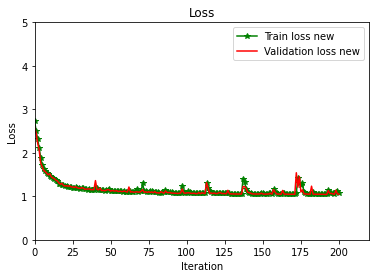

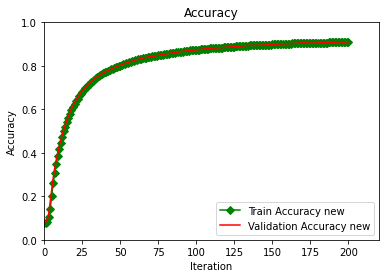

Iteration: 200, train loss: 1.0671, validation loss: 1.0501, train acc: 0.9103, validation acc: 0.9104
Step: 0 	Training Loss: 1.0154104 Training Acc: 0.91046125
Step: 1 	Training Loss: 1.0333506 Training Acc: 0.91046464
Step: 2 	Training Loss: 1.0188247 Training Acc: 0.910469
Step: 3 	Training Loss: 1.0928289 Training Acc: 0.910471
Step: 4 	Training Loss: 1.0162134 Training Acc: 0.9104758
Step: 5 	Training Loss: 1.0600449 Training Acc: 0.9104783
Step: 6 	Training Loss: 1.0161445 Training Acc: 0.9104826
Step: 7 	Training Loss: 1.0207473 Training Acc: 0.91048694
Step: 8 	Training Loss: 1.0816483 Training Acc: 0.9104885
Step: 9 	Training Loss: 1.1160301 Training Acc: 0.9104901
Step: 10 	Training Loss: 1.0677248 Training Acc: 0.910493
Step: 11 	Training Loss: 1.0548334 Training Acc: 0.910496
Step: 12 	Training Loss: 1.0928059 Training Acc: 0.91049755
Step: 13 	Training Loss: 1.0406396 Training Acc: 0.910501
Step: 14 	Training Loss: 1.0385804 Training Acc: 0.9105039
Step: 15 	Training Loss

Step: 51 	Training Loss: 1.0170405 Training Acc: 0.9108839
Step: 52 	Training Loss: 1.080477 Training Acc: 0.9108859
Step: 53 	Training Loss: 1.0290471 Training Acc: 0.9108888
Step: 54 	Training Loss: 1.0596336 Training Acc: 0.9108921
Step: 55 	Training Loss: 1.1456814 Training Acc: 0.9108919
Step: 56 	Training Loss: 1.0279369 Training Acc: 0.9108957
Step: 57 	Training Loss: 1.0748639 Training Acc: 0.91089815
Step: 58 	Training Loss: 1.0280616 Training Acc: 0.9109015
Step: 59 	Training Loss: 1.0380301 Training Acc: 0.9109044
Step: 60 	Training Loss: 1.0648303 Training Acc: 0.91090685
Step: 61 	Training Loss: 1.0233458 Training Acc: 0.91091114
Step: 62 	Training Loss: 1.0204915 Training Acc: 0.9109149
Step: 63 	Training Loss: 1.0590341 Training Acc: 0.9109169
Step: 64 	Training Loss: 1.0459433 Training Acc: 0.91091937
Step: 65 	Training Loss: 1.0736032 Training Acc: 0.9109223
Step: 66 	Training Loss: 1.0417354 Training Acc: 0.9109256
Step: 67 	Training Loss: 1.0245602 Training Acc: 0.91

Step: 18 	Training Loss: 1.0363944 Training Acc: 0.9113176
Step: 19 	Training Loss: 1.0574436 Training Acc: 0.91132003
Step: 20 	Training Loss: 1.0164583 Training Acc: 0.9113238
Step: 21 	Training Loss: 1.0259752 Training Acc: 0.911328
Step: 22 	Training Loss: 1.0632224 Training Acc: 0.9113313
Step: 23 	Training Loss: 1.0428544 Training Acc: 0.9113346
Step: 24 	Training Loss: 1.0195484 Training Acc: 0.9113384
Step: 25 	Training Loss: 1.0442319 Training Acc: 0.9113412
Step: 26 	Training Loss: 1.0460069 Training Acc: 0.91134363
Step: 27 	Training Loss: 1.1277496 Training Acc: 0.91134423
Step: 28 	Training Loss: 1.0511487 Training Acc: 0.9113475
Step: 29 	Training Loss: 1.075211 Training Acc: 0.91134995
Step: 30 	Training Loss: 1.1048443 Training Acc: 0.91135097
Step: 31 	Training Loss: 1.0119395 Training Acc: 0.9113557
Step: 32 	Training Loss: 1.0401087 Training Acc: 0.91135895
Step: 33 	Training Loss: 1.0500107 Training Acc: 0.91136134
Step: 34 	Training Loss: 1.0270799 Training Acc: 0.

Step: 7 	Validation Loss: 1.0442059 Validation Acc: 0.9117555
Step: 8 	Validation Loss: 1.0472369 Validation Acc: 0.9117587
Step: 9 	Validation Loss: 0.99634016 Validation Acc: 0.9117629
Step: 10 	Validation Loss: 1.0675366 Validation Acc: 0.9117657
Step: 11 	Validation Loss: 1.0402751 Validation Acc: 0.9117694
Step: 12 	Validation Loss: 1.0188065 Validation Acc: 0.91177356
Step: 13 	Validation Loss: 1.0688553 Validation Acc: 0.91177726
Step: 14 	Validation Loss: 1.0444233 Validation Acc: 0.91178006
Step: 15 	Validation Loss: 1.0252203 Validation Acc: 0.91178423
Step: 16 	Validation Loss: 1.0383329 Validation Acc: 0.9117879


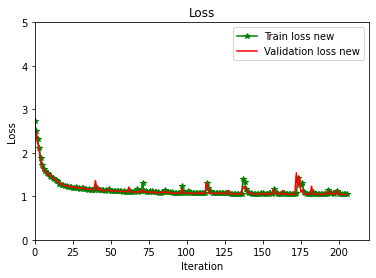

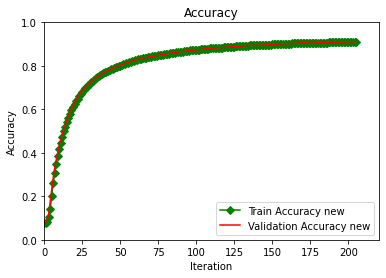

Iteration: 205, train loss: 1.0472, validation loss: 1.0418, train acc: 0.9116, validation acc: 0.9118
Step: 0 	Training Loss: 1.0060625 Training Acc: 0.9117925
Step: 1 	Training Loss: 1.0292069 Training Acc: 0.91179574
Step: 2 	Training Loss: 1.0146998 Training Acc: 0.9117999
Step: 3 	Training Loss: 1.0704297 Training Acc: 0.91180223
Step: 4 	Training Loss: 1.0135634 Training Acc: 0.9118068
Step: 5 	Training Loss: 1.0458598 Training Acc: 0.9118096
Step: 6 	Training Loss: 1.0137523 Training Acc: 0.9118138
Step: 7 	Training Loss: 1.0190241 Training Acc: 0.9118179
Step: 8 	Training Loss: 1.0741409 Training Acc: 0.9118194
Step: 9 	Training Loss: 1.1026546 Training Acc: 0.9118209
Step: 10 	Training Loss: 1.0629618 Training Acc: 0.9118237
Step: 11 	Training Loss: 1.0502605 Training Acc: 0.9118265
Step: 12 	Training Loss: 1.0748701 Training Acc: 0.9118288
Step: 13 	Training Loss: 1.0120568 Training Acc: 0.9118325
Step: 14 	Training Loss: 1.0340016 Training Acc: 0.9118353
Step: 15 	Training L

Step: 51 	Training Loss: 1.0159571 Training Acc: 0.9122102
Step: 52 	Training Loss: 1.0807116 Training Acc: 0.9122125
Step: 53 	Training Loss: 1.0263627 Training Acc: 0.9122153
Step: 54 	Training Loss: 1.0624373 Training Acc: 0.9122185
Step: 55 	Training Loss: 1.1354605 Training Acc: 0.9122177
Step: 56 	Training Loss: 1.0276153 Training Acc: 0.9122214
Step: 57 	Training Loss: 1.0737289 Training Acc: 0.91222364
Step: 58 	Training Loss: 1.0312924 Training Acc: 0.91222686
Step: 59 	Training Loss: 1.0381336 Training Acc: 0.9122296
Step: 60 	Training Loss: 1.067476 Training Acc: 0.9122324
Step: 61 	Training Loss: 1.0196848 Training Acc: 0.9122369
Step: 62 	Training Loss: 1.018903 Training Acc: 0.91224056
Step: 63 	Training Loss: 1.056734 Training Acc: 0.9122429
Step: 64 	Training Loss: 1.0448275 Training Acc: 0.9122452
Step: 65 	Training Loss: 1.0726047 Training Acc: 0.91224796
Step: 66 	Training Loss: 1.0416273 Training Acc: 0.9122511
Step: 67 	Training Loss: 1.0242298 Training Acc: 0.9122

Step: 21 	Training Loss: 1.1710504 Training Acc: 0.9126078
Step: 22 	Training Loss: 1.1994935 Training Acc: 0.9126048
Step: 23 	Training Loss: 1.2248943 Training Acc: 0.9125987
Step: 24 	Training Loss: 1.1811304 Training Acc: 0.91259795
Step: 25 	Training Loss: 1.1545801 Training Acc: 0.9125971
Step: 26 	Training Loss: 1.0837928 Training Acc: 0.91259897
Step: 27 	Training Loss: 1.1864734 Training Acc: 0.9125986
Step: 28 	Training Loss: 1.0897352 Training Acc: 0.91260135
Step: 29 	Training Loss: 1.116703 Training Acc: 0.9126036
Step: 30 	Training Loss: 1.2181389 Training Acc: 0.9126015
Step: 31 	Training Loss: 1.1422324 Training Acc: 0.9126029
Step: 32 	Training Loss: 1.0704913 Training Acc: 0.9126056
Step: 33 	Training Loss: 1.1151748 Training Acc: 0.91260743
Step: 34 	Training Loss: 1.2087846 Training Acc: 0.91260535
Step: 35 	Training Loss: 1.3744475 Training Acc: 0.91259795
Step: 36 	Training Loss: 1.4569926 Training Acc: 0.9125844
Step: 37 	Training Loss: 1.7068462 Training Acc: 0.

Step: 9 	Validation Loss: 1.0062611 Validation Acc: 0.91251636
Step: 10 	Validation Loss: 1.0883288 Validation Acc: 0.9125191
Step: 11 	Validation Loss: 1.048188 Validation Acc: 0.9125222
Step: 12 	Validation Loss: 1.0249922 Validation Acc: 0.91252625
Step: 13 	Validation Loss: 1.0812881 Validation Acc: 0.91252893
Step: 14 	Validation Loss: 1.0586157 Validation Acc: 0.9125316
Step: 15 	Validation Loss: 1.0307128 Validation Acc: 0.9125356
Step: 16 	Validation Loss: 1.0397861 Validation Acc: 0.9125392


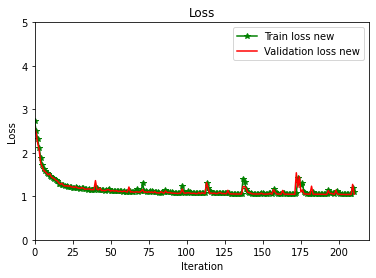

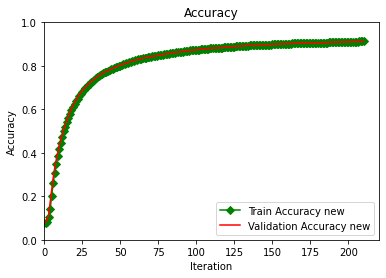

Iteration: 210, train loss: 1.0956, validation loss: 1.0495, train acc: 0.9124, validation acc: 0.9125
Step: 0 	Training Loss: 1.0090383 Training Acc: 0.91254365
Step: 1 	Training Loss: 1.0353801 Training Acc: 0.91254675
Step: 2 	Training Loss: 1.0185 Training Acc: 0.9125508
Step: 3 	Training Loss: 1.079715 Training Acc: 0.9125531
Step: 4 	Training Loss: 1.021461 Training Acc: 0.9125575
Step: 5 	Training Loss: 1.0533998 Training Acc: 0.91255975
Step: 6 	Training Loss: 1.021982 Training Acc: 0.91256374
Step: 7 	Training Loss: 1.0259659 Training Acc: 0.91256773
Step: 8 	Training Loss: 1.0862944 Training Acc: 0.91256917
Step: 9 	Training Loss: 1.104852 Training Acc: 0.9125701
Step: 10 	Training Loss: 1.0671217 Training Acc: 0.9125728
Step: 11 	Training Loss: 1.0530477 Training Acc: 0.9125755
Step: 12 	Training Loss: 1.084367 Training Acc: 0.91257733
Step: 13 	Training Loss: 1.0191153 Training Acc: 0.91258085
Step: 14 	Training Loss: 1.0558093 Training Acc: 0.9125831
Step: 15 	Training Los

Step: 52 	Training Loss: 1.0826079 Training Acc: 0.9129308
Step: 53 	Training Loss: 1.0295396 Training Acc: 0.91293347
Step: 54 	Training Loss: 1.0613067 Training Acc: 0.91293657
Step: 55 	Training Loss: 1.1327162 Training Acc: 0.91293615
Step: 56 	Training Loss: 1.0296595 Training Acc: 0.9129397
Step: 57 	Training Loss: 1.0759057 Training Acc: 0.91294193
Step: 58 	Training Loss: 1.0282825 Training Acc: 0.91294503
Step: 59 	Training Loss: 1.0464816 Training Acc: 0.91294765
Step: 60 	Training Loss: 1.0665412 Training Acc: 0.91295034
Step: 61 	Training Loss: 1.0254502 Training Acc: 0.9129543
Step: 62 	Training Loss: 1.019993 Training Acc: 0.9129578
Step: 63 	Training Loss: 1.0598872 Training Acc: 0.91296
Step: 64 	Training Loss: 1.0462792 Training Acc: 0.9129618
Step: 65 	Training Loss: 1.0719328 Training Acc: 0.91296446
Step: 66 	Training Loss: 1.0455401 Training Acc: 0.9129675
Step: 67 	Training Loss: 1.0277236 Training Acc: 0.912971
Step: 0 	Validation Loss: 1.0545455 Validation Acc: 

Step: 20 	Training Loss: 1.0501484 Training Acc: 0.9132886
Step: 21 	Training Loss: 1.0596693 Training Acc: 0.91329247
Step: 22 	Training Loss: 1.078275 Training Acc: 0.9132955
Step: 23 	Training Loss: 1.0668752 Training Acc: 0.913299
Step: 24 	Training Loss: 1.0464381 Training Acc: 0.9133025
Step: 25 	Training Loss: 1.0708895 Training Acc: 0.9133055
Step: 26 	Training Loss: 1.0534978 Training Acc: 0.91330814
Step: 27 	Training Loss: 1.1700006 Training Acc: 0.9133086
Step: 28 	Training Loss: 1.0594705 Training Acc: 0.91331166
Step: 29 	Training Loss: 1.0879425 Training Acc: 0.91331387
Step: 30 	Training Loss: 1.1367118 Training Acc: 0.9133143
Step: 31 	Training Loss: 1.0374286 Training Acc: 0.91331863
Step: 32 	Training Loss: 1.0779932 Training Acc: 0.91332126
Step: 33 	Training Loss: 1.0689732 Training Acc: 0.91332346
Step: 34 	Training Loss: 1.0352281 Training Acc: 0.913326
Step: 35 	Training Loss: 1.0556074 Training Acc: 0.91332906
Step: 36 	Training Loss: 1.0332348 Training Acc: 0.

Step: 6 	Validation Loss: 1.1030374 Validation Acc: 0.91366017
Step: 7 	Validation Loss: 1.0743998 Validation Acc: 0.91366273
Step: 8 	Validation Loss: 1.085924 Validation Acc: 0.91366404
Step: 9 	Validation Loss: 1.0315009 Validation Acc: 0.913667
Step: 10 	Validation Loss: 1.0943077 Validation Acc: 0.91366875
Step: 11 	Validation Loss: 1.0505506 Validation Acc: 0.9136722
Step: 12 	Validation Loss: 1.0372949 Validation Acc: 0.9136756
Step: 13 	Validation Loss: 1.0918686 Validation Acc: 0.91367775
Step: 14 	Validation Loss: 1.0738585 Validation Acc: 0.9136799
Step: 15 	Validation Loss: 1.0578692 Validation Acc: 0.91368294
Step: 16 	Validation Loss: 1.0568194 Validation Acc: 0.9136855


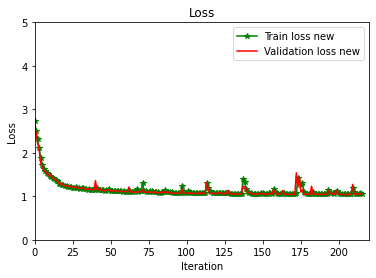

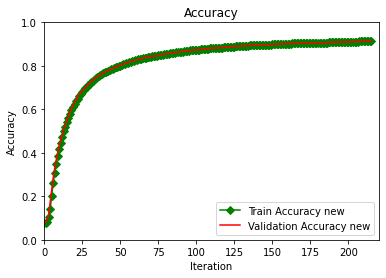

Iteration: 215, train loss: 1.0530, validation loss: 1.0699, train acc: 0.9136, validation acc: 0.9137
Step: 0 	Training Loss: 1.0178022 Training Acc: 0.9136898
Step: 1 	Training Loss: 1.0376804 Training Acc: 0.9136928
Step: 2 	Training Loss: 1.0252072 Training Acc: 0.9136966
Step: 3 	Training Loss: 1.0960003 Training Acc: 0.9136983
Step: 4 	Training Loss: 1.0246729 Training Acc: 0.9137026
Step: 5 	Training Loss: 1.0586 Training Acc: 0.91370517
Step: 6 	Training Loss: 1.019108 Training Acc: 0.91370904
Step: 7 	Training Loss: 1.0396676 Training Acc: 0.91371286
Step: 8 	Training Loss: 1.093924 Training Acc: 0.9137142
Step: 9 	Training Loss: 1.106209 Training Acc: 0.9137155
Step: 10 	Training Loss: 1.0649006 Training Acc: 0.91371804
Step: 11 	Training Loss: 1.0557237 Training Acc: 0.9137206
Step: 12 	Training Loss: 1.0819353 Training Acc: 0.91372234
Step: 13 	Training Loss: 1.0315202 Training Acc: 0.91372573
Step: 14 	Training Loss: 1.0446028 Training Acc: 0.9137283
Step: 15 	Training Los

Step: 53 	Training Loss: 1.0259633 Training Acc: 0.91407305
Step: 54 	Training Loss: 1.0575073 Training Acc: 0.91407603
Step: 55 	Training Loss: 1.1456522 Training Acc: 0.9140756
Step: 56 	Training Loss: 1.0262444 Training Acc: 0.91407895
Step: 57 	Training Loss: 1.0736473 Training Acc: 0.9140811
Step: 58 	Training Loss: 1.0254817 Training Acc: 0.914084
Step: 59 	Training Loss: 1.0508741 Training Acc: 0.9140866
Step: 60 	Training Loss: 1.0658267 Training Acc: 0.9140891
Step: 61 	Training Loss: 1.0210667 Training Acc: 0.9140933
Step: 62 	Training Loss: 1.0192997 Training Acc: 0.9140967
Step: 63 	Training Loss: 1.0522752 Training Acc: 0.9140988
Step: 64 	Training Loss: 1.0462666 Training Acc: 0.91410005
Step: 65 	Training Loss: 1.0736115 Training Acc: 0.9141026
Step: 66 	Training Loss: 1.052712 Training Acc: 0.91410553
Step: 67 	Training Loss: 1.0226511 Training Acc: 0.91410893
Step: 0 	Validation Loss: 1.0648398 Validation Acc: 0.91411185
Step: 1 	Validation Loss: 1.0765874 Validation A

Step: 21 	Training Loss: 1.0261302 Training Acc: 0.9144603
Step: 22 	Training Loss: 1.060447 Training Acc: 0.9144632
Step: 23 	Training Loss: 1.0453658 Training Acc: 0.91446614
Step: 24 	Training Loss: 1.0220075 Training Acc: 0.9144695
Step: 25 	Training Loss: 1.0479835 Training Acc: 0.914472
Step: 26 	Training Loss: 1.0601076 Training Acc: 0.9144744
Step: 27 	Training Loss: 1.1256009 Training Acc: 0.91447484
Step: 28 	Training Loss: 1.0489146 Training Acc: 0.91447777
Step: 29 	Training Loss: 1.0737026 Training Acc: 0.91447985
Step: 30 	Training Loss: 1.1044905 Training Acc: 0.91448104
Step: 31 	Training Loss: 1.0152185 Training Acc: 0.9144852
Step: 32 	Training Loss: 1.0487136 Training Acc: 0.91448814
Step: 33 	Training Loss: 1.062232 Training Acc: 0.9144898
Step: 34 	Training Loss: 1.038366 Training Acc: 0.9144927
Step: 35 	Training Loss: 1.0468236 Training Acc: 0.91449565
Step: 36 	Training Loss: 1.0241678 Training Acc: 0.9144989
Step: 37 	Training Loss: 1.0295491 Training Acc: 0.91

In [59]:

#%% (3) Initialize and train the model.
import tensorflow.compat.v1 as tf

session = tf.Session()

# The input has 2 dimensions: dimension 0 is reserved for the first term and dimension 1 is reverved for the second term
input_dimensions = 1662 #features
classes=13
batch_size =128
hidden_size = 128
time_size =30  #window size
lr = 1e-4
epochs = 220
# Initialize a session

# Create a new instance of the GRU model
gru = MYGRU(input_dimensions, hidden_size)

# Add an additional layer on top of each of the hidden state outputs
W_output = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(hidden_size*time_size, classes), mean=0, stddev=1.0))
b_output = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(classes,), mean=0, stddev=1.0))
output = tf.map_fn(lambda h_t: tf.nn.softsign(tf.matmul(tf.reshape(h_t,(1,hidden_size*time_size)), W_output) + b_output), gru.h_t)
output = tf.reshape(output,((batch_size, classes)))
# Create a placeholder for the expected output
expected_output = tf.placeholder(dtype=tf.float32, shape=(batch_size, classes), name='expected_output')

# Just use quadratic loss
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(expected_output,output))/float(batch_size)
print(expected_output,W_output,b_output,output,loss)
accs = tf.metrics.accuracy(labels=tf.argmax(expected_output, axis=1), predictions=tf.argmax(output,axis=1))[1]
# loss = tf.reduce_sum(0.5 * tf.pow(output - expected_output, 2)) / float(batch_size)

# Use the Adam optimizer for training
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

# Initialize all the variables
init_variables = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()

session.run(init_variables)
session.run(init_l)

# saved_path = 'drive/MyDrive/GRU/gru/gru-9'
# saver.restore(session, saved_path)

# Initialize the losses
train_losses = []
validation_losses = []

train_accs = []
validation_accs = []

for epoch in range(epochs):
    train_acc = 0
    train_loss=0
    validation_loss = 0
    validation_acc = 0

    for i in range(len(X_)):
        _, train_loss_, train_acc_ = session.run([train_step, loss, accs], feed_dict={gru.input_layer: X_[i], expected_output: Y_[i]})
        train_loss += train_loss_
        train_acc += train_acc_
        print("Step:",i,"\tTraining Loss:",train_loss_, "Training Acc:",train_acc_)

    train_loss = train_loss/len(X_)
    train_losses += [train_loss]
    train_acc = train_acc/len(X_)
    train_accs += [train_acc]

    for j in range(len(X_val_)):
        validation_loss_, validation_acc_= session.run([loss,accs], feed_dict={gru.input_layer: X_val_[j], expected_output: Y_val_[j]})
        validation_loss += validation_loss_
        validation_acc += validation_acc_
        print("Step:",j,"\tValidation Loss:",validation_loss_, "Validation Acc:",validation_acc_)

    validation_loss = validation_loss/len(X_val_)
    validation_losses += [validation_loss]
    validation_acc = validation_acc/len(X_val_)
    validation_accs += [validation_acc]
    # Display an update every 5 iterations
    if epoch % 5 == 0:
        plt.plot(train_losses, '-g*', label='Train loss new')
        plt.plot(validation_losses, '-r', label='Validation loss new')
        plt.legend(loc=0)
        plt.title('Loss')
        plt.xlim([0, epochs])
        plt.ylim([0, 5])

        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()

        plt.plot(train_accs, '-gD', label='Train Accuracy new')
        plt.plot(validation_accs, '-r', label='Validation Accuracy new')
        plt.legend(loc=0)
        plt.title('Accuracy')
        plt.xlim([0, epochs])
        plt.ylim([0, 1])

        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.show()
        print('Iteration: %d, train loss: %.4f, validation loss: %.4f, train acc: %.4f, validation acc: %.4f' % (epoch, train_loss,validation_loss,train_acc,validation_acc))

In [60]:
saver1 = tf.compat.v1.train.Saver()


In [61]:
saved_path = saver1.save(session, 'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru', global_step=epoch)

In [62]:
import tensorflow.compat.v1 as tf

with tf.compat.v1.Session() as sess:
    saver1.restore(sess, saved_path)


INFO:tensorflow:Restoring parameters from C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru-219


In [63]:
saved_path

'C:/Users/Lab/Desktop/Barathi/ActionDetectionforSignLanguage/GRU modified/GRU/gru/gru-219'

In [64]:
#%% (4) Manually evaluate the model.

# Make a prediction by using the model
y_predicted = session.run(output, feed_dict={gru.input_layer: X_val_[0]})
y_predicted = np.argmax(y_predicted,axis=-1)
print(y_predicted)

y_actual1 = Y_val_[0]
y_actual1 = np.argmax(y_actual,axis=-1)
print(y_actual)

print('\nPredictions: \n',le.inverse_transform(y_predicted))
print('\nActual: \n',le.inverse_transform(y_actual))

[12  0 10  1  2  0 11 12  4  4  2  7  9 11 11  9  6 10  3  6  2 11  9 10
  3  5  2 12  0 12  6  3  8  7  2  7  3  9  4  3  2  0  3 11  7  2  6  7
  5  9  5 10 11  9  6  0  7  1  1 12 11  7  8  4  9  5  6  2  5  6  9  5
  3  2 11  5  7  2  5  7  5  6  9  3  6  7  2  6  5 12  8  4  3  8  0  0
  1  9 11  9 12 12  5 12 12  8  6  2 12  7 11  2 12  2  3  3  6  4 12  8
  1  7 10 10  3 11  1 10]
[12  0 10  1  2  0 11 12  4  4  2  7  9 11 11  9  6 10 10  6  2 11  9 10
  3  5  2 12  0 12  6  3  8  7  2  7 10  9  4  3  2  0  3 11  7  2  6  7
  5  9  5 10 11  9  6  0  7  1  1 12 11  7  8  4  9  5  6  2  5  6  9  5
  3  2 11  5  7  2  5  7  5  6  9  3  6  7  2  6  5 12  8  4 10  8  0  0
  1  9 11  9  4 12  5 12 12  8  6  2 12  7 11  2 12  2  3  3  6  4 12  8
  1  7 10 10  3 11  1 10]

Predictions: 
 ['you' 'fail' 'thanks' 'friend' 'good' 'fail' 'think' 'you' 'iloveyou'
 'iloveyou' 'good' 'meet' 'takecare' 'think' 'think' 'takecare' 'location'
 'thanks' 'hello' 'location' 'good' 'think' 'takecare' '

In [65]:
accuracy_score(y_actual,y_predicted)

0.96875

In [66]:
from sklearn import metrics

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(f"Classification report for Sign Gestures \n"
      f"{metrics.classification_report(y_actual,y_predicted)}\n")

Classification report for Sign Gestures 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        14
           3       0.75      1.00      0.86         9
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        11
          10       1.00      0.70      0.82        10
          11       1.00      1.00      1.00        11
          12       0.92      1.00      0.96        12

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.98      0.97      0.97       128




# Mean absolute error

In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
mean_absolute_error(y_actual,y_predicted)

0.2265625

# Mean squared error


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error(y_actual,y_predicted)

1.6484375

# R² score, the coefficient of determination

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_actual,y_predicted)

0.8782370338310611

Confusion matrix:
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12]]


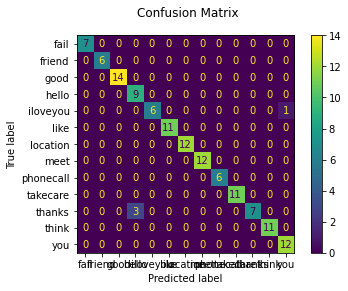

In [75]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(le.inverse_transform(y_actual), le.inverse_transform(y_predicted))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [76]:
from sklearn.metrics import multilabel_confusion_matrix

In [77]:
multilabel_confusion_matrix(y_actual,y_predicted)

array([[[121,   0],
        [  0,   7]],

       [[122,   0],
        [  0,   6]],

       [[114,   0],
        [  0,  14]],

       [[116,   3],
        [  0,   9]],

       [[121,   0],
        [  1,   6]],

       [[117,   0],
        [  0,  11]],

       [[116,   0],
        [  0,  12]],

       [[116,   0],
        [  0,  12]],

       [[122,   0],
        [  0,   6]],

       [[117,   0],
        [  0,  11]],

       [[118,   0],
        [  3,   7]],

       [[117,   0],
        [  0,  11]],

       [[115,   1],
        [  0,  12]]], dtype=int64)